### Goal: Predict a Profitable DraftKings Fantasy Basketball Lineup.

<img src='DraftKings_logo.jpg' width="50%" height="50%"/>  

### Data collected from FantasyCruncher, RotoGuru and ESPN.  Two regression models (simple linear regression and Keras) have been created.

### Assumption is that past performance will determine the highest scoring players on a daily basis.



# EDA 

In [3932]:
# Bring in Imports

import pandas as pd
import numpy as np
import re

# A data legend and other notes about this file can be found in rotoguru1.com/hoop/nba-dhd-2018-notes.txt

# Data obtained from RotoGuru for 2017-2018 Season for Fantasy Basketball Players.

# Data is separated by ':'

# Use delimiter=':' to separate into columns.


# use pd.read_csv to load the previous DraftKings data and assign to variable 'nba_2017'

nba_2017 = pd.read_csv('DK_2017-2018.csv', delimiter=':')



In [3933]:
# view the columns in nba_2017

nba_2017.columns

Index(['GID', 'Last, First', 'First  Last', 'Date', 'Team', 'Opp', 'H/A',
       'GameID', 'GTime(ET)', 'Team pts', 'Opp pts', 'Start', 'Minutes', 'GP',
       'active', 'FDP', 'DKP', 'DDP', 'YHP', 'Stats', 'DoubleD', 'TripleD',
       'FD Sal', 'FD Change', 'DK Sal', 'DK Change', 'DD Sal', 'DD Change',
       'YH Sal', 'YH Change', 'FD pos', 'DK pos', 'DD pos', 'YH pos',
       'Unnamed: 34'],
      dtype='object')

In [3934]:
# view the data in nba_2017

nba_2017

GID           Last, First          First  Last      Date Team  Opp  \
0      3816       Williams, Louis       Louis Williams  20171211  lac  tor   
1      3816       Williams, Louis       Louis Williams  20171209  lac  was   
2      3816       Williams, Louis       Louis Williams  20171206  lac  min   
3      3816       Williams, Louis       Louis Williams  20171203  lac  min   
4      3816       Williams, Louis       Louis Williams  20171202  lac  dal   
5      3816       Williams, Louis       Louis Williams  20171130  lac  uta   
6      3816       Williams, Louis       Louis Williams  20171127  lac  lal   
7      3816       Williams, Louis       Louis Williams  20171125  lac  sac   
8      3816       Williams, Louis       Louis Williams  20171122  lac  atl   
9      3816       Williams, Louis       Louis Williams  20171120  lac  nyk   
10     3816       Williams, Louis       Louis Williams  20171118  lac  cha   
11     3816       Williams, Louis       Louis Williams  20171117  lac  cle   
12     3816       Williams, Louis       Louis Williams  20171113  lac  phi   
13     3816       Williams, Louis       Louis Williams  20171111  lac  nor   
14     3816       Williams, Louis       Louis Williams  20171110  lac  okc   
15     3816       Williams, Louis       Louis Williams  20171107  lac  sas   
16     3816       Williams, Louis       Louis Williams  20171105  lac  mia   
17     3816       Williams, Louis       Louis Williams  20171104  lac  mem   
18     3816       Williams, Louis       Louis Williams  20171101  lac  dal   
19     3816       Williams, Louis       Louis Williams  20171030  lac  gsw   
20     3816       Williams, Louis       Louis Williams  20171028  lac  det   
21     3816       Williams, Louis       Louis Williams  20171026  lac  por   
22     3816       Williams, Louis       Louis Williams  20171024  lac  uta   
23     3816       Williams, Louis       Louis Williams  20171021  lac  pho   
24     3816       Williams, Louis       Louis Williams  20171019  lac  lal   
25     5153      Mason III, Frank      Frank Mason III  20171212  sac  pho   
26     5153      Mason III, Frank      Frank Mason III  20171210  sac  tor   
27     5153      Mason III, Frank      Frank Mason III  20171208  sac  nor   
28     5153      Mason III, Frank      Frank Mason III  20171206  sac  cle   
29     5153      Mason III, Frank      Frank Mason III  20171202  sac  mil   
...     ...                   ...                  ...       ...  ...  ...   
13396  5130         Jackson, Josh         Josh Jackson  20171021  pho  lac   
13397  5130         Jackson, Josh         Josh Jackson  20171020  pho  lal   
13398  5130         Jackson, Josh         Josh Jackson  20171018  pho  por   
13399  4817  Cauley-Stein, Willie  Willie Cauley-Stein  20171212  sac  pho   
13400  4817  Cauley-Stein, Willie  Willie Cauley-Stein  20171210  sac  tor   
13401  4817  Cauley-Stein, Willie  Willie Cauley-Stein  20171208  sac  nor   
13402  4817  Cauley-Stein, Willie  Willie Cauley-Stein  20171206  sac  cle   
13403  4817  Cauley-Stein, Willie  Willie Cauley-Stein  20171202  sac  mil   
13404  4817  Cauley-Stein, Willie  Willie Cauley-Stein  20171201  sac  chi   
13405  4817  Cauley-Stein, Willie  Willie Cauley-Stein  20171128  sac  mil   
13406  4817  Cauley-Stein, Willie  Willie Cauley-Stein  20171127  sac  gsw   
13407  4817  Cauley-Stein, Willie  Willie Cauley-Stein  20171125  sac  lac   
13408  4817  Cauley-Stein, Willie  Willie Cauley-Stein  20171122  sac  lal   
13409  4817  Cauley-Stein, Willie  Willie Cauley-Stein  20171120  sac  den   
13410  4817  Cauley-Stein, Willie  Willie Cauley-Stein  20171118  sac  por   
13411  4817  Cauley-Stein, Willie  Willie Cauley-Stein  20171117  sac  por   
13412  4817  Cauley-Stein, Willie  Willie Cauley-Stein  20171115  sac  atl   
13413  4817  Cauley-Stein, Willie  Willie Cauley-Stein  20171113  sac  was   
13414  4817  Cauley-Stein, Willie  Willie Cauley-Stein  20171111  sac  nyk   
13415  4817  Cauley-Stein, Wil

In [3935]:
# See how many columns and rows in the DataFrame.

nba_2017.shape

(13426, 35)

In [3936]:
# Locate a single game day to see if the columns are what you need.

nba_2017.loc[nba_2017['Date']== 20171212,:].sort_values('DKP', ascending=False)


GID                Last, First               First  Last      Date  \
25     5153           Mason III, Frank           Frank Mason III  20171212   
52     5006                 Baker, Ron                 Ron Baker  20171212   
136    4628          Hardaway Jr., Tim          Tim Hardaway Jr.  20171212   
163    4564                Curry, Seth                Seth Curry  20171212   
198    4932       Finney-Smith, Dorian       Dorian Finney-Smith  20171212   
279    4963           Murray, Dejounte           Dejounte Murray  20171212   
333    2448              Carter, Vince              Vince Carter  20171212   
439    4893          Marjanovic, Boban          Boban Marjanovic  20171212   
466    4717               Frazier, Tim               Tim Frazier  20171212   
518    4384              Thomas, Lance              Lance Thomas  20171212   
623    4926      Papagiannis, Georgios      Georgios Papagiannis  20171212   
650    5148             White, Derrick             Derrick White  20171212   
678    5167               Giles, Harry               Harry Giles  20171212   
756    5135            Jackson, Justin            Justin Jackson  20171212   
837    4969        Richardson, Malachi        Malachi Richardson  20171212   
864    4980          Satoransky, Tomas          Tomas Satoransky  20171212   
917    3541              James, LeBron              LeBron James  20171212   
970    5214                Reed, Davon                Davon Reed  20171212   
999    4836             Okafor, Jahlil             Jahlil Okafor  20171212   
1025   4729               Ennis, Tyler               Tyler Ennis  20171212   
1051   5112        Cleveland, Antonius        Antonius Cleveland  20171212   
1064   4913             Bender, Dragan             Dragan Bender  20171212   
1093   4810   Hollis-Jefferson, Rondae   Rondae Hollis-Jefferson  20171212   
1174   4507             Bazemore, Kent             Kent Bazemore  20171212   
1226   4519              Wayns, Maalik              Maalik Wayns  20171212   
1227   5174              Clavell, Gian              Gian Clavell  20171212   
1243   3571               Wade, Dwyane               Dwyane Wade  20171212   
1297   4397             Shumpert, Iman             Iman Shumpert  20171212   
1325   3992                Green, Jeff                Jeff Green  20171212   
1353   4321                 Wall, John                 John Wall  20171212   
...     ...                        ...                       ...       ...   
12160  3882                Barea, Jose                Jose Barea  20171212   
12214  4762               Embiid, Joel               Joel Embiid  20171212   
12268  4203           Carroll, DeMarre           DeMarre Carroll  20171212   
12319  4967           Delaney, Malcolm           Malcolm Delaney  20171212   
12373  5199           Cavanaugh, Tyler           Tyler Cavanaugh  20171212   
12417  4420             Thomas, Isaiah             Isaiah Thomas  20171212   
12473  4616  Caldwell-Pope, Kentavious  Kentavious Caldwell-Pope  20171212   
12554  4798               Nance, Larry               Larry Nance  20171212   
12580  5158              Dorsey, Tyler              Tyler Dorsey  20171212   
12636  3637              Harris, Devin              Devin Harris  20171212   
12664  4529              O'Quinn, Kyle              Kyle O'Quinn  20171212   
12691  4970              Ferrell, Yogi              Yogi Ferrell  20171212   
12719  4632              Dieng, Gorgui              Gorgui Dieng  20171212   
12773  5193            Mathews, Jordan            Jordan Mathews  20171212   
12774  5175               Lydon, Tyler               Tyler Lydon  20171212   
12801  4315             Smith, Ishmael             Ishmael Smith  20171212   
12854  5191              Morris, Monte              Monte Morris  20171212   
12960  4278              Evans, Jeremy              Jeremy Evans  20171212   
12961  4572            Dedmon, Dewayne            Dewayne Dedmon  20171212   
13013  4678               Harr

In [3937]:
# Import the 2017-2018 DraftKings perfect lineups from https://www.fantasycruncher.com/lineup-rewind/draftkings/NBA/

# Read it as a DataFrame

# Assign it to "perfectlineup"

perfectlineup = pd.read_csv('NBA 2017-2018.csv')

In [3938]:
# view the head of perfectlineup
perfectlineup.tail()

Date                   PG                  SG  \
50   12/8/2017  Emmanuel Mudiay (0)       Kris Dunn (0)   
51   12/9/2017     Shelvin Mack (0)   Kent Bazemore (0)   
52  12/10/2017     Jrue Holiday (0)  Victor Oladipo (0)   
53  12/11/2017     James Harden (0)      Chris Paul (0)   
54  12/12/2017                  NaN                 NaN   

                            SF                   PF                      C  \
50         Marvin Williams (0)     Kevin Durant (0)      Dwight Howard (0)   
51            Tyreke Evans (0)       Mike Scott (0)     Nikola Vucevic (0)   
52              Trey Lyles (0)  Wilson Chandler (0)       Myles Turner (0)   
53  Michael Kidd-Gilchrist (0)   Nikola Mirotic (0)  Jonas Valanciunas (0)   
54                         NaN                  NaN                    NaN   

                       G                   F                       UTIL  
50   Wesley Matthews (0)   Zach Randolph (0)         Nikola Vucevic (0)  
51  Jonathon Simmons (0)     Otto Porter (0)  Giannis Antetokounmpo (0)  
52       Rajon Rondo (0)  Ersan Ilyasova (0)     Kristaps Porzingis (0)  
53      Jrue Holiday (0)   E'Twaun Moore (0)            Rajon Rondo (0)  
54                   NaN                 NaN                        NaN

In [3939]:
# Use regex to replace the (0)'s with '' in each perfectlineup cell.
# reassign to their columns.

perfectlineup['PG'] = perfectlineup['PG'].replace('[(0)]', '',regex=True)
perfectlineup['SG'] = perfectlineup['SG'].replace('[(0)]', '',regex=True)
perfectlineup['SF'] = perfectlineup['SF'].replace('[(0)]', '',regex=True)
perfectlineup['PF'] = perfectlineup['PF'].replace('[(0)]', '',regex=True)
perfectlineup['C'] = perfectlineup['C'].replace('[(0)]', '',regex=True)
perfectlineup['G'] = perfectlineup['G'].replace('[(0)]', '',regex=True)
perfectlineup['F'] = perfectlineup['F'].replace('[(0)]', '',regex=True)
perfectlineup['UTIL'] = perfectlineup['UTIL'].replace('[(0)]', '',regex=True)

# Use regex to replace the space at the end of each name with '' in each perfectlineup cell.
# reassign to perfectlineup.

perfectlineup = perfectlineup.replace('\s+$', '',regex=True)

# convert the Date column to timeseries
# reassign to perfectlineup['Date']
# Sort the values of perfectlineup in ascending order by the date.

perfectlineup['Date'] = pd.to_datetime(perfectlineup.Date)
perfectlineup.sort_values('Date')

# View "perfectlineup"
perfectlineup


Date                     PG                        SG  \
0  2017-10-17           Kyrie Irving              Jaylen Brown   
1  2017-10-18        Darren Collison             Dillon Brooks   
2  2017-10-19      Russell Westbrook                C.J. Miles   
3  2017-10-20      Spencer Dinwiddie             Evan Fournier   
4  2017-10-21         Victor Oladipo             D.J. Augustin   
5  2017-10-22       D'Angelo Russell           Jordan Clarkson   
6  2017-10-23        Dejounte Murray               Eric Gordon   
7  2017-10-24            Cory Joseph             Evan Fournier   
8  2017-10-25         T.J. McConnell         Spencer Dinwiddie   
9  2017-10-26  Giannis Antetokounmpo          Denzel Valentine   
10 2017-10-27            Jeff Teague           Kelly Oubre Jr.   
11 2017-10-28           Jrue Holiday             Austin Rivers   
12 2017-10-29           Kemba Walker          Tim Hardaway Jr.   
13 2017-10-30            Jeff Teague              Dion Waiters   
14 2017-10-31       D'Angelo Russell              Devin Booker   
15 2017-11-01         Damian Lillard              Tyreke Evans   
16 2017-11-02        Jordan Clarkson             Kyle Anderson   
17 2017-11-03       Donovan Mitchell               J.J. Redick   
18 2017-11-04          Jameer Nelson            Justin Holiday   
19 2017-11-05           James Harden               Dwyane Wade   
20 2017-11-06           Kyrie Irving           Marco Belinelli   
21 2017-11-07          C.J. McCollum           Khris Middleton   
22 2017-11-08          Elfrid Payton                Nick Young   
23 2017-11-09           James Harden              Jrue Holiday   
24 2017-11-10            Cory Joseph             Kent Bazemore   
25 2017-11-11       Dennis Smith Jr.              Devin Booker   
26 2017-11-12           James Harden              Luke Kennard   
27 2017-11-13       Donovan Mitchell          Tim Hardaway Jr.   
28 2017-11-14           James Harden         Spencer Dinwiddie   
29 2017-11-15             Kyle Lowry               Rodney Hood   
30 2017-11-16           James Harden              Troy Daniels   
31 2017-11-17            Dwyane Wade         Spencer Dinwiddie   
32 2017-11-18          Stephen Curry               Rodney Hood   
33 2017-11-19          Stephen Curry              Allen Crabbe   
34 2017-11-20      Russell Westbrook            Victor Oladipo   
35 2017-11-22      Russell Westbrook               Jeremy Lamb   
36 2017-11-24             Kyle Lowry              Terry Rozier   
37 2017-11-25          Elfrid Payton              James Harden   
38 2017-11-26             Mike James              Jimmy Butler   
39 2017-11-27           James Harden  Kentavious Caldwell-Pope   
40 2017-11-28             Tyler Ulis              Jimmy Butler   
41 2017-11-29            Ben Simmons           Kelly Oubre Jr.   
42 2017-11-30             Alec Burks               Will Barton   
43 2017-12-01            Rajon Rondo            Victor Oladipo   
44 2017-12-02           Jamal Murray              Devin Booker   
45 2017-12-03      Russell Westbrook             Austin Rivers   
46 2017-12-04             Alec Burks              Jrue Holiday   
47 2017-12-05      Russell Westbrook          Donovan Mitchell   
48 2017-12-06           Jarrett Jack               Buddy Hield   
49 2017-12-07             Lonzo Ball            Brandon Ingram   
50 2017-12-08        Emmanuel Mudiay                 Kris Dunn   
51 2017-12-09           Shelvin Mack             Kent Bazemore   
52 2017-12-10           Jrue Holiday            Victor Oladipo   
53 2017-12-11           James Harden                Chris Paul   
54 2017-12-12                    NaN                       NaN   

                        SF                  PF                   C  \
0             LeBron James        Jayson Tatum      Draymond Green   
1            Tobias Harris      Thaddeus Young    Hassan Whiteside   
2          Larry Nance Jr.  Kristaps Porzingis   Jonas Valanciunas   
3              Otto Porter     A

In [3940]:
# View the unique dates in perfectlineup

perfectlineup['Date'].unique()


array(['2017-10-17T00:00:00.000000000', '2017-10-18T00:00:00.000000000',
       '2017-10-19T00:00:00.000000000', '2017-10-20T00:00:00.000000000',
       '2017-10-21T00:00:00.000000000', '2017-10-22T00:00:00.000000000',
       '2017-10-23T00:00:00.000000000', '2017-10-24T00:00:00.000000000',
       '2017-10-25T00:00:00.000000000', '2017-10-26T00:00:00.000000000',
       '2017-10-27T00:00:00.000000000', '2017-10-28T00:00:00.000000000',
       '2017-10-29T00:00:00.000000000', '2017-10-30T00:00:00.000000000',
       '2017-10-31T00:00:00.000000000', '2017-11-01T00:00:00.000000000',
       '2017-11-02T00:00:00.000000000', '2017-11-03T00:00:00.000000000',
       '2017-11-04T00:00:00.000000000', '2017-11-05T00:00:00.000000000',
       '2017-11-06T00:00:00.000000000', '2017-11-07T00:00:00.000000000',
       '2017-11-08T00:00:00.000000000', '2017-11-09T00:00:00.000000000',
       '2017-11-10T00:00:00.000000000', '2017-11-11T00:00:00.000000000',
       '2017-11-12T00:00:00.000000000', '2017-11-13

In [3941]:
# Perform value counts for the Point Guard position.

perfectlineup['PG'].value_counts(normalize=False, sort=True, ascending=False, bins=None, dropna=True)

James Harden             7
Russell Westbrook        5
Stephen Curry            2
Donovan Mitchell         2
Kyle Lowry               2
Jeff Teague              2
Alec Burks               2
Kyrie Irving             2
Cory Joseph              2
D'Angelo Russell         2
Elfrid Payton            2
Jrue Holiday             2
Victor Oladipo           1
Giannis Antetokounmpo    1
Dennis Smith Jr.         1
Shelvin Mack             1
Ben Simmons              1
Rajon Rondo              1
Tyler Ulis               1
Dwyane Wade              1
Jameer Nelson            1
Lonzo Ball               1
C.J. McCollum            1
T.J. McConnell           1
Kemba Walker             1
Jordan Clarkson          1
Spencer Dinwiddie        1
Jamal Murray             1
Dejounte Murray          1
Mike James               1
Jarrett Jack             1
Emmanuel Mudiay          1
Damian Lillard           1
Darren Collison          1
Name: PG, dtype: int64

In [3942]:
# Perform value counts for the Shooting Guard position.

perfectlineup['SG'].value_counts(normalize=False, sort=True, ascending=False, bins=None, dropna=True)

Victor Oladipo              3
Devin Booker                3
Spencer Dinwiddie           3
Rodney Hood                 2
Austin Rivers               2
Tim Hardaway Jr.            2
Evan Fournier               2
Jimmy Butler                2
Kent Bazemore               2
Jrue Holiday                2
Kelly Oubre Jr.             2
Tyreke Evans                1
Luke Kennard                1
Terry Rozier                1
Donovan Mitchell            1
Nick Young                  1
Marco Belinelli             1
Denzel Valentine            1
Dwyane Wade                 1
Kris Dunn                   1
Allen Crabbe                1
J.J. Redick                 1
Justin Holiday              1
Will Barton                 1
Chris Paul                  1
Eric Gordon                 1
Brandon Ingram              1
Jaylen Brown                1
D.J. Augustin               1
Kyle Anderson               1
Dillon Brooks               1
Troy Daniels                1
Buddy Hield                 1
Khris Midd

In [3943]:
# Perform value counts for the Small Forward position.

perfectlineup['SF'].value_counts(normalize=False, sort=True, ascending=False, bins=None, dropna=True)

Khris Middleton           3
Devin Booker              3
LeBron James              3
Tyreke Evans              3
Kent Bazemore             2
Will Barton               2
Tobias Harris             2
T.J. Warren               2
Giannis Antetokounmpo     2
Kevin Durant              2
DeMar DeRozan             1
Michael Kidd-Gilchrist    1
Ben Simmons               1
Chandler Parsons          1
Marvin Williams           1
Trevor Ariza              1
Lance Stephenson          1
Ersan Ilyasova            1
Paul George               1
Denzel Valentine          1
Jaylen Brown              1
Davis Bertans             1
Evan Fournier             1
Larry Nance Jr.           1
Trey Lyles                1
Al-Farouq Aminu           1
Otto Porter               1
Marcus Smart              1
Bojan Bogdanovic          1
Caris LeVert              1
Kyle Kuzma                1
Wayne Ellington           1
Courtney Lee              1
Wesley Matthews           1
Harrison Barnes           1
Markieff Morris     

In [3944]:
# Perform value counts for the Power Forward position.

perfectlineup['PF'].value_counts(normalize=False, sort=True, ascending=False, bins=None, dropna=True)

Greg Monroe           3
Otto Porter           3
Kevin Love            2
Aaron Gordon          2
Derrick Favors        2
LeBron James          2
Enes Kanter           2
Jayson Tatum          2
LaMarcus Aldridge     2
Serge Ibaka           2
James Johnson         2
Markieff Morris       1
Julius Randle         1
Mike Scott            1
Nikola Mirotic        1
Wesley Johnson        1
John Collins          1
Al Horford            1
Lauri Markkanen       1
Noah Vonleh           1
DeMarcus Cousins      1
Kevin Durant          1
Larry Nance Jr.       1
Robert Covington      1
Domantas Sabonis      1
Al-Farouq Aminu       1
T.J. Warren           1
Kristaps Porzingis    1
Thaddeus Young        1
Jerami Grant          1
Dirk Nowitzki         1
Draymond Green        1
Harrison Barnes       1
Jeff Green            1
Kyle O'Quinn          1
Gorgui Dieng          1
Alex Len              1
Taj Gibson            1
Dario Saric           1
Wilson Chandler       1
Zach Randolph         1
Name: PF, dtype:

In [3945]:
# Perform value counts for the Guard position.

perfectlineup['G'].value_counts(normalize=False, sort=True, ascending=False, bins=None, dropna=True)

Jimmy Butler             3
Kyle Lowry               3
Juan Jose Barea          2
Jeff Teague              2
Lonzo Ball               2
Stephen Curry            2
Tyler Johnson            1
Kemba Walker             1
James Harden             1
Tyus Jones               1
Kyrie Irving             1
Klay Thompson            1
Dennis Smith Jr.         1
Jeremy Lamb              1
Yogi Ferrell             1
Ben Simmons              1
Giannis Antetokounmpo    1
Louis Williams           1
Gary Harris              1
Justin Holiday           1
Bradley Beal             1
Jerian Grant             1
Jameer Nelson            1
Alec Burks               1
T.J. McConnell           1
Jonathon Simmons         1
Goran Dragic             1
Wesley Matthews          1
Danny Green              1
Delon Wright             1
Emmanuel Mudiay          1
Chris Paul               1
Caris LeVert             1
D'Angelo Russell         1
Raymond Felton           1
Tim Hardaway Jr.         1
Rajon Rondo              1
K

In [3946]:
# Perform value counts for the Forward position.

perfectlineup['F'].value_counts(normalize=False, sort=True, ascending=False, bins=None, dropna=True)

Zach Randolph            3
Brandon Ingram           3
Thabo Sefolosha          3
Kevin Durant             2
E'Twaun Moore            2
LeBron James             2
Robert Covington         2
Devin Booker             2
Anthony Davis            2
Kyle Kuzma               2
James Johnson            1
Otto Porter              1
Derrick Favors           1
Jarell Martin            1
DeMarre Carroll          1
Wesley Matthews          1
Bobby Portis             1
Patrick McCaw            1
C.J. Miles               1
Andrew Wiggins           1
P.J. Tucker              1
Marquese Chriss          1
Giannis Antetokounmpo    1
Paul George              1
J.R. Smith               1
Tim Hardaway Jr.         1
Julius Randle            1
Blake Griffin            1
Ersan Ilyasova           1
Draymond Green           1
Maxi Kleber              1
Paul Millsap             1
Alex Len                 1
Ryan Anderson            1
Jordan Bell              1
Jonathon Simmons         1
Jeff Green               1
M

In [3947]:
# Perform value counts for the Center position.

perfectlineup['C'].value_counts(normalize=False, sort=True, ascending=False, bins=None, dropna=True)


Andre Drummond        6
Jusuf Nurkic          4
Dwight Howard         4
Nikola Vucevic        4
Clint Capela          2
DeMarcus Cousins      2
Marc Gasol            2
Karl-Anthony Towns    2
Tyson Chandler        2
Jonas Valanciunas     2
Myles Turner          2
Ryan Anderson         2
Joel Embiid           2
Hassan Whiteside      1
Mike Muscala          1
Greg Monroe           1
Paul Millsap          1
Draymond Green        1
Salah Mejri           1
Steven Adams          1
DeAndre Jordan        1
John Collins          1
Domantas Sabonis      1
Kristaps Porzingis    1
Alex Len              1
Dewayne Dedmon        1
Kevin Love            1
Kyle O'Quinn          1
Nikola Jokic          1
LaMarcus Aldridge     1
Gorgui Dieng          1
Name: C, dtype: int64

In [3948]:
# Perform value counts for the Utility position.

perfectlineup['UTIL'].value_counts(normalize=False, sort=True, ascending=False, bins=None, dropna=True)

Nikola Jokic             3
Brook Lopez              2
Kris Dunn                2
DeMarcus Cousins         2
Damian Lillard           2
Kristaps Porzingis       2
Willie Cauley-Stein      2
Giannis Antetokounmpo    2
Karl-Anthony Towns       1
Louis Williams           1
Mike Scott               1
Pascal Siakam            1
John Henson              1
Nick Young               1
Rajon Rondo              1
Donovan Mitchell         1
Al Horford               1
T.J. Warren              1
Patrick Mills            1
Jamal Crawford           1
Dejounte Murray          1
Reggie Jackson           1
Rudy Gobert              1
Josh Jackson             1
Robert Covington         1
Jeff Teague              1
Jimmy Butler             1
Brandon Ingram           1
Paul George              1
Joel Embiid              1
Anthony Davis            1
Chris Paul               1
Jusuf Nurkic             1
Dirk Nowitzki            1
Khris Middleton          1
Mike James               1
Tyus Jones               1
R

In [3949]:
# Import the 2017-2018 Defensive Real Plus Minus from http://www.espn.com/nba/statistics/rpm/_/year/2018/sort/DRPM

# Read it as a DataFrame

# Assign it to "drpm"

drpm = pd.read_csv('drpm.csv', delimiter=',')

In [3950]:
# print the head of drpm

drpm.head()

RK                NAME TEAM    GP   MPG  ORPM  DRPM   RPM  WINS
0  1    Vince Carter, SG  SAC  12.0  12.0 -1.82  0.16 -1.66  0.10
1  2  Jamal Crawford, SG  MIN  22.0  17.4 -0.04 -2.12 -2.16  0.22
2  3   Manu Ginobili, SG   SA  18.0  20.1 -0.97 -0.83 -1.80  0.27
3  4   Dirk Nowitzki, PF  DAL  22.0  24.9  0.17  0.59  0.76  1.20
4  5     Jason Terry, SG  MIL   7.0   8.4 -1.33 -0.58 -1.91  0.03

In [3951]:
# Use replace to strip out everything from the "," on in the 'NAME' column.

drpm['NAME'] = drpm['NAME'].str.replace('\,.*', "")

# print the head of drpm

drpm.head()

RK            NAME TEAM    GP   MPG  ORPM  DRPM   RPM  WINS
0  1    Vince Carter  SAC  12.0  12.0 -1.82  0.16 -1.66  0.10
1  2  Jamal Crawford  MIN  22.0  17.4 -0.04 -2.12 -2.16  0.22
2  3   Manu Ginobili   SA  18.0  20.1 -0.97 -0.83 -1.80  0.27
3  4   Dirk Nowitzki  DAL  22.0  24.9  0.17  0.59  0.76  1.20
4  5     Jason Terry  MIL   7.0   8.4 -1.33 -0.58 -1.91  0.03

In [3952]:
# Revise nba_2017 to only include the data you need.

# Reassign it to "nba_2017_revised"

nba_2017_revised = nba_2017[['Date', 'First  Last', 'Stats', 'Minutes', 'DKP', 'Team', 'Opp']]

In [3953]:
# View "nba_2017_revised" head

nba_2017_revised.head()

# 'Stats' needs to be stripped and new columns created with pertinent data.

Date     First  Last                                    Stats  \
0  20171211  Louis Williams  17pt 5rb 5as 1st 2to 3trey 6-18fg 2-2ft   
1  20171209  Louis Williams    35pt 2rb 8as 1to 4trey 11-20fg 9-10ft   
2  20171206  Louis Williams  23pt 3rb 8as 1st 1to 4trey 9-20fg 1-2ft   
3  20171203  Louis Williams     23pt 5rb 10as 4to 3trey 8-14fg 4-4ft   
4  20171202  Louis Williams         18pt 6as 1to 1trey 4-16fg 9-10ft   

     Minutes    DKP Team  Opp  
0  35.750000  33.25  lac  tor  
1  37.033333  51.00  lac  was  
2  36.566667  42.25  lac  min  
3  35.050000  45.25  lac  min  
4  32.950000  27.00  lac  dal

In [3954]:
# Locate a single day and sort by highest DKP (DraftKing Points) and sanity check the amounts.

nba_2017_revised.loc[nba_2017_revised['Date']== 20171211,:].sort_values('DKP', ascending=False).head(25)

Date             First  Last  \
360    20171211            James Harden   
385    20171211            Jrue Holiday   
5381   20171211        DeMarcus Cousins   
9532   20171211          Damian Lillard   
783    20171211            Kevin Durant   
4823   20171211       Russell Westbrook   
1459   20171211              Chris Paul   
2287   20171211             Rajon Rondo   
1969   20171211          DeAndre Jordan   
1537   20171211            Clint Capela   
10282  20171211           E'Twaun Moore   
9801   20171211       Jonas Valanciunas   
2235   20171211           DeMar DeRozan   
12188  20171211  Michael Kidd-Gilchrist   
11538  20171211          Nikola Mirotic   
9345   20171211           Dwight Howard   
9209   20171211            Kemba Walker   
11055  20171211           Klay Thompson   
0      20171211          Louis Williams   
7323   20171211            Bobby Portis   
10525  20171211             Eric Gordon   
4394   20171211             Serge Ibaka   
4555   20171211            Goran Dragic   
11999  20171211         Marvin Williams   
10363  20171211             Bam Adebayo   

                                              Stats    Minutes    DKP Team  \
360        26pt 1rb 17as 6st 3to 4trey 8-16fg 6-9ft  34.950000  66.75  hou   
385    37pt 4rb 5as 4st 1bl 2to 4trey 16-21fg 1-2ft  41.483333  60.50  nor   
5381      24pt 14rb 8as 1st 4to 2trey 8-17fg 6-11ft  33.216667  56.00  nor   
9532         39pt 4rb 2as 2st 5trey 12-28fg 10-11ft  41.933333  53.50  por   
783        28pt 9rb 5as 3bl 4to 2trey 11-21fg 4-4ft  36.250000  51.75  gsw   
4823       30pt 4rb 7as 3st 2to 1trey 10-22fg 9-9ft  36.183333  51.00  okc   
1459    20pt 9rb 6as 3st 1bl 2to 3trey 8-16fg 1-2ft  32.500000  48.75  hou   
2287                13pt 12rb 12as 8to 3trey 5-12fg  42.050000  48.00  nor   
1969          14pt 17rb 4as 1st 2bl 2to 6-9fg 2-2ft  32.666667  47.75  lac   
1537                 28pt 8rb 5bl 1to 13-14fg 2-4ft  23.916667  47.50  hou   
10282                36pt 3rb 3as 3to 6trey 15-20fg  41.766667  45.75  nor   
9801                   23pt 15rb 1trey 8-10fg 6-6ft  27.733333  43.75  tor   
2235             17pt 5rb 8as 2st 2to 5-13fg 7-10ft  36.133333  38.25  tor   
12188              17pt 4rb 4as 4st 1bl 8-9fg 1-3ft  34.350000  38.00  cha   
11538               24pt 8rb 1bl 3trey 9-14fg 3-6ft  31.583333  37.50  chi   
9345              23pt 7rb 1as 2bl 1to 9-13fg 5-7ft  30.150000  36.75  cha   
9209            19pt 3rb 9as 4to 3trey 6-13fg 4-4ft  38.816667  35.75  cha   
11055       24pt 3rb 3as 1st 4to 4trey 9-21fg 2-2ft  37.166667  34.25  gsw   
0           17pt 5rb 5as 1st 2to 3trey 6-18fg 2-2ft  35.750000  33.25  lac   
7323           23pt 4rb 1as 1st 3trey 10-15fg 0-1ft  23.000000  33.00  chi   
10525           27pt 2rb 1as 1to 5trey 9-12fg 4-4ft  35.683333  33.00  hou   
4394        17pt 6rb 1as 3bl 1to 2trey 7-17fg 1-2ft  32.966667  32.50  tor   
4555            19pt 5rb 5as 2to 1trey 7-12fg 4-4ft  25.416667  32.25  mia   
11999            18pt 7rb 2as 1to 4trey 5-8fg 4-5ft  31.933333  31.25  cha   
10363              14pt 4rb 2as 2st 2bl 5-6fg 4-5ft  22.916667  30.00  mia   

       Opp  
360    nor  
385    hou  
5381   hou  
9532   gsw  
783    por  
4823   cha  
1459   nor  
2287   hou  
1969   tor  
1537   nor  
10282  hou  
9801   lac  
2235   lac  
12188  okc  
11538  bos  
9345   okc  
9209   okc  
11055  por  
0      tor  
7323   bos  
10525  nor  
4394   lac  
4555   mem  
11999  okc  
10363  mem

In [3955]:
# Inner join nba_2017 and drpm on the respective columns that hold the names of each player.

# Reassign to "nba_2017_2"

nba_2017_2=pd.merge(nba_2017,drpm,left_on='First  Last',right_on='NAME')

In [3956]:
# View  the tail of "nba_2017_2"

nba_2017_2.tail()

GID           Last, First          First  Last      Date Team  Opp  \
11166  4817  Cauley-Stein, Willie  Willie Cauley-Stein  20171026  sac  nor   
11167  4817  Cauley-Stein, Willie  Willie Cauley-Stein  20171023  sac  pho   
11168  4817  Cauley-Stein, Willie  Willie Cauley-Stein  20171021  sac  den   
11169  4817  Cauley-Stein, Willie  Willie Cauley-Stein  20171020  sac  dal   
11170  4817  Cauley-Stein, Willie  Willie Cauley-Stein  20171018  sac  hou   

      H/A            GameID  GTime(ET)  Team pts  ...   Unnamed: 34   RK  \
11166   H  20171026-nor-sac       22.5     106.0  ...           NaN  302   
11167   A  20171023-sac-pho       22.0     115.0  ...           NaN  302   
11168   A  20171021-sac-den       21.0      79.0  ...           NaN  302   
11169   A  20171020-sac-dal       20.5      93.0  ...           NaN  302   
11170   H  20171018-hou-sac       22.0     100.0  ...           NaN  302   

                      NAME  TEAM  GP_y   MPG  ORPM  DRPM   RPM  WINS  
11166  Willie Cauley-Stein   SAC  21.0  25.4 -1.97  0.55 -1.42  0.51  
11167  Willie Cauley-Stein   SAC  21.0  25.4 -1.97  0.55 -1.42  0.51  
11168  Willie Cauley-Stein   SAC  21.0  25.4 -1.97  0.55 -1.42  0.51  
11169  Willie Cauley-Stein   SAC  21.0  25.4 -1.97  0.55 -1.42  0.51  
11170  Willie Cauley-Stein   SAC  21.0  25.4 -1.97  0.55 -1.42  0.51  

[5 rows x 44 columns]

In [3957]:
# Select a single game day and view the columns.

nba_2017_2.columns

Index(['GID', 'Last, First', 'First  Last', 'Date', 'Team', 'Opp', 'H/A',
       'GameID', 'GTime(ET)', 'Team pts', 'Opp pts', 'Start', 'Minutes',
       'GP_x', 'active', 'FDP', 'DKP', 'DDP', 'YHP', 'Stats', 'DoubleD',
       'TripleD', 'FD Sal', 'FD Change', 'DK Sal', 'DK Change', 'DD Sal',
       'DD Change', 'YH Sal', 'YH Change', 'FD pos', 'DK pos', 'DD pos',
       'YH pos', 'Unnamed: 34', 'RK', 'NAME', 'TEAM', 'GP_y', 'MPG', 'ORPM',
       'DRPM', 'RPM', 'WINS'],
      dtype='object')

In [3958]:
# Setup columns in the order I would like to see them in. Stats still needs to be stripped.

nba_2017_2 = nba_2017_2[['First  Last', 'Date', 'DK Sal', 'GID', 'Team', 'Opp', 'Start', 'H/A', 'Minutes', 'DKP', 'Team pts','Stats', 'DoubleD', 'TripleD', 'DK pos', 'MPG', 'ORPM', 'DRPM', 'RPM', 'WINS']]

In [3959]:
# Import re

import re

# Strip out "Stats" and assign each individual stat to its own column.

# Credit to piRSquared for guiding me through the process:
# https://stackoverflow.com/questions/46996602/pandas-dataframe-add-a-column-based-on-a-string

pat = lambda x: re.match('^(.+?)([a-z]+)$', x).groups()
prs = lambda s: pd.Series(*zip(*[pat(x) for x in s.split()]))

# Reassign to nba2017strip

nba2017strip = nba_2017_2.drop('Stats', 1).join(nba_2017_2.Stats.fillna('').apply(prs))

# View "nba2017strip"

nba2017strip.head(25)

First  Last      Date  DK Sal   GID Team  Opp  Start H/A    Minutes  \
0   Frank Mason III  20171212  3900.0  5153  sac  pho    NaN   H        NaN   
1   Frank Mason III  20171210  3900.0  5153  sac  tor    0.0   H  24.633333   
2   Frank Mason III  20171208  3700.0  5153  sac  nor    0.0   A  25.516667   
3   Frank Mason III  20171206  3700.0  5153  sac  cle    0.0   A  19.166667   
4   Frank Mason III  20171202  3700.0  5153  sac  mil    0.0   A  23.383333   
5   Frank Mason III  20171201  3700.0  5153  sac  chi    0.0   A  15.733333   
6   Frank Mason III  20171128  3000.0  5153  sac  mil    0.0   H  24.033333   
7   Frank Mason III  20171127  3000.0  5153  sac  gsw    0.0   A  24.933333   
8   Frank Mason III  20171125  3000.0  5153  sac  lac    0.0   H   9.900000   
9   Frank Mason III  20171122  3000.0  5153  sac  lal    0.0   H  26.166667   
10  Frank Mason III  20171120  3000.0  5153  sac  den    0.0   H  21.183333   
11  Frank Mason III  20171118  3000.0  5153  sac  por    0.0   A  19.533333   
12  Frank Mason III  20171117  3000.0  5153  sac  por    0.0   H  21.450000   
13  Frank Mason III  20171115  3000.0  5153  sac  atl    0.0   A   9.516667   
14  Frank Mason III  20171113  3000.0  5153  sac  was    0.0   A   0.000000   
15  Frank Mason III  20171111  3000.0  5153  sac  nyk    0.0   A  12.033333   
16  Frank Mason III  20171109  3000.0  5153  sac  phi    0.0   H   0.000000   
17  Frank Mason III  20171107  3000.0  5153  sac  okc    0.0   H   0.000000   
18  Frank Mason III  20171104  3000.0  5153  sac  det    0.0   A  21.150000   
19  Frank Mason III  20171101  3000.0  5153  sac  bos    0.0   A   6.983333   
20  Frank Mason III  20171031  3000.0  5153  sac  ind    0.0   A   4.916667   
21  Frank Mason III  20171029  3000.0  5153  sac  was    0.0   H  21.633333   
22  Frank Mason III  20171026  3000.0  5153  sac  nor    0.0   H   0.000000   
23  Frank Mason III  20171023  3000.0  5153  sac  pho    0.0   A   0.000000   
24  Frank Mason III  20171021  3000.0  5153  sac  den    0.0   A  17.100000   

      DKP ...   WINS   as   bl    fg    ft   pt   rb   st   to trey  
0     NaN ...   0.09  NaN  NaN   NaN   NaN  NaN  NaN  NaN  NaN  NaN  
1   13.00 ...   0.09    3  NaN  1-10   4-5    6    2  NaN  NaN  NaN  
2   23.25 ...   0.09    3  NaN  4-10   3-4   12    5    1    4    1  
3   26.00 ...   0.09    2  NaN   4-6  6-10   15    2    3    2    1  
4   18.75 ...   0.09    3  NaN   4-6   4-4   13    1  NaN    1    1  
5   12.25 ...   0.09    4  NaN   1-6   2-2    5    1  NaN    1    1  
6   21.50 ...   0.09    7  NaN   3-9   2-2    8    2    1    3  NaN  
7   24.75 ...   0.09    4  NaN  5-10   2-2   14    3  NaN  NaN    2  
8    7.50 ...   0.09    1  NaN   2-2   1-1    5    2  NaN    3  NaN  
9   27.75 ...   0.09    7  NaN   4-7   1-1   11    5  NaN    2    2  
10  25.25 ...   0.09    6  NaN   5-7   NaN   11    3    1    2    1  
11  17.50 ...   0.09    2  NaN  5-10   2-3   13    2  NaN    3    1  
12  12.25 ...   0.09    3  NaN   1-6   2-2    4    3  NaN  NaN  NaN  
13   4.25 ...   0.09    1  NaN   0-2   2-2    2    1  NaN    1  NaN  
14   0.00 ...   0.09  NaN  NaN   NaN   NaN  NaN  NaN  NaN  NaN  NaN  
15  11.00 ...   0.09    2  NaN   1-2   3-4    6  NaN    1    1    1  
16   0.00 ...   0.09  NaN  NaN   NaN   NaN  NaN  NaN  NaN  NaN  NaN  
17   0.00 ...   0.09  NaN  NaN   NaN   NaN  NaN  NaN  NaN  NaN  NaN  
18  15.75 ...   0.09    6  NaN   3-9   1-2    7    1  NaN    3  NaN  
19   4.00 ...   0.09    3  NaN   0-3   NaN    0  NaN  NaN    1  NaN  
20   8.75 ...   0.09    1  NaN   2-4   2-4    6    1  NaN  NaN  NaN  
21  14.00 ...   0.09    1  NaN  5-10   NaN   11  NaN    1    2    1  
22   0.00 ...   0.09  NaN  NaN   NaN   NaN  NaN  NaN  NaN  NaN  NaN  
23   0.00 ...   0.09  NaN  NaN   NaN   NaN  NaN  NaN  NaN  NaN  NaN  
24  11.00 ...   0.09    1  NaN   2-9   2-3    7    2  NaN    1    1  

[25 rows x 28 columns]

In [3960]:
# view the datatypes in nba2017strip

nba2017strip.dtypes

First  Last     object
Date             int64
DK Sal         float64
GID              int64
Team            object
Opp             object
Start          float64
H/A             object
Minutes        float64
DKP            float64
Team pts       float64
DoubleD        float64
TripleD        float64
DK pos         float64
MPG            float64
ORPM           float64
DRPM           float64
RPM            float64
WINS           float64
as              object
bl              object
fg              object
ft              object
pt              object
rb              object
st              object
to              object
trey            object
dtype: object

In [3961]:
# Fill in NA's with 0's.

nba2017strip = nba2017strip.fillna(0)

In [3962]:
# Use .astype to convert string columns that you want to make into possible features into integers

nba2017strip['as'] = nba2017strip['as'].astype(int)
nba2017strip['bl'] = nba2017strip['bl'].astype(int)

nba2017strip['pt'] = nba2017strip['pt'].astype(int)
nba2017strip['rb'] = nba2017strip['rb'].astype(int)
nba2017strip['st'] = nba2017strip['st'].astype(int)
nba2017strip['to'] = nba2017strip['to'].astype(int)
nba2017strip['trey'] = nba2017strip['trey'].astype(int)
nba2017strip['GID'] = nba2017strip['GID'].astype(int)


In [3963]:
# Use .str.extract to create new column for field goal attempts and field goals made.
# Use .str.extract to create new column for free throw attempts and freet throws made.


nba2017strip[['ftm', 'fta']] = nba2017strip['ft'].str.extract('(\d+)-(\d+)', expand=True)
nba2017strip[['fgm', 'fga']] = nba2017strip['fg'].str.extract('(\d+)-(\d+)', expand=True)


In [3964]:
# Use pandas to_datetime to convert 'Date' to time series.

nba2017strip['Date'] = pd.to_datetime(nba2017strip['Date'], format='%Y%m%d', errors='ignore')

In [3965]:
# nba2017strip['Date'] = pd.to_datetime(nba2017strip.Date)
# Sort by date
nba2017strip.sort_values('Date')

First  Last       Date   DK Sal   GID Team  Opp  Start H/A  \
5070       Andre Iguodala 2017-10-17   3600.0  3641  gsw  hou    0.0   H   
2608        Marcus Morris 2017-10-17   4000.0  4407  bos  cle    0.0   A   
296          James Harden 2017-10-17  10000.0  4224  hou  gsw    1.0   A   
2334        Ryan Anderson 2017-10-17   4100.0  4085  hou  gsw    1.0   A   
3426         Trevor Ariza 2017-10-17   4500.0  3621  hou  gsw    1.0   A   
4826         JaVale McGee 2017-10-17   3200.0  4114  gsw  hou    0.0   H   
10045         Jae Crowder 2017-10-17   4300.0  4472  cle  bos    1.0   H   
618          Kevin Durant 2017-10-17   9600.0  3986  gsw  hou    1.0   H   
2309       Gordon Hayward 2017-10-17   6700.0  4285  bos  cle    1.0   A   
5582          Abdel Nader 2017-10-17   3000.0  5127  bos  cle    0.0   A   
7614        Jose Calderon 2017-10-17   3500.0  3740  cle  bos    0.0   H   
4882           Al Horford 2017-10-17   6000.0  3998  bos  cle    1.0   A   
3108        Stephen Curry 2017-10-17   8800.0  4173  gsw  hou    1.0   H   
537           Bobby Brown 2017-10-17   3800.0  4087  hou  gsw    0.0   A   
7430          Kyle Korver 2017-10-17   3300.0  3547  cle  bos    0.0   H   
2280          Omri Casspi 2017-10-17   3300.0  4209  gsw  hou    0.0   H   
3806       Draymond Green 2017-10-17   7000.0  4504  gsw  hou    1.0   H   
4156           Ante Zizic 2017-10-17   3000.0  5119  cle  bos    0.0   H   
1313         Clint Capela 2017-10-17   5600.0  4766  hou  gsw    1.0   A   
4989         Marcus Smart 2017-10-17   4800.0  4677  bos  cle    0.0   A   
5526           Kevin Love 2017-10-17   7800.0  4074  cle  bos    1.0   H   
1102        Iman Shumpert 2017-10-17   3000.0  4397  cle  bos    0.0   H   
10515        Jaylen Brown 2017-10-17   3700.0  5017  bos  cle    1.0   A   
4128         Shane Larkin 2017-10-17   3000.0  4655  bos  cle    0.0   A   
4045              Zhou Qi 2017-10-17   3000.0  5121  hou  gsw    0.0   A   
1130           Jeff Green 2017-10-17   3000.0  3992  cle  bos    0.0   H   
7349        Troy Williams 2017-10-17   3000.0  4908  hou  gsw    0.0   A   
82           Kyrie Irving 2017-10-17   8300.0  4379  bos  cle    1.0   A   
2362         Kevon Looney 2017-10-17   3000.0  4820  gsw  hou    0.0   H   
4716        Zaza Pachulia 2017-10-17   3400.0  3553  gsw  hou    1.0   H   
...                   ...        ...      ...   ...  ...  ...    ...  ..   
7615      Jordan Clarkson 2017-12-12   4900.0  4668  lal  nyk    0.0   A   
3325         Nik Stauskas 2017-12-12   3600.0  4703  bkn  was    0.0   H   
7587        Jose Calderon 2017-12-12   3000.0  3740  cle  atl    0.0   H   
3614        Zach Randolph 2017-12-12   7100.0  3314  sac  pho    0.0   H   
7561           Jeremy Lin 2017-12-12   3000.0  4297  bkn  was    0.0   H   
3641         Kosta Koufos 2017-12-12   3300.0  4109  sac  pho    0.0   H   
3668   Kristaps Porzingis 2017-12-12   8500.0  4871  nyk  lal    0.0   H   
3695        Matt Costello 2017-12-12   3000.0  5187  sas  dal    0.0   A   
3696        Matt Costello 2017-12-12      0.0  4940  sas  dal    0.0   A   
3562      Sean Kilpatrick 2017-12-12      0.0  4770  bkn  was    0.0   H   
3297           Taj Gibson 2017-12-12   6000.0  4167  min  phi    0.0   H   
3271         Andrew Bogut 2017-12-12   3000.0  3736  lal  nyk    0.0   A   
10815      Dewayne Dedmon 2017-12-12   5200.0  4572  atl  cle    0.0   A   
10259         Joel Embiid 2017-12-12  10100.0  4762  phi  min    0.0   A   
10869         Enes Kanter 2017-12-12   6400.0  4442  nyk  lal    0.0   H   
2762     Nicolas Brussino 2017-12-12      0.0  4964  atl  cle    0.0   A   
2787    LaMarcus Aldridge 2017-12-12   8300.0  3860  sas  dal    0.0   A   
8070          Patty Mills 2017-12-12   4200.0  4245  sas  dal    0.0   A   
2815        Tobias Harris 2017-12-12   6600.0  4412  det  den    0.0   H   
2922         Cole Aldrich 2017-12-12   3000.0  4260  min  phi    0.0   H   
10842         Gary Harris 2017-12-12   6700.0  4678  den  det 

In [3966]:
# Fill in NaN's with 0's.

nba2017strip = nba2017strip.fillna(0)

# Drop 'fg' and 'ft' columns
nba2017strip.drop('fg', axis=1)
nba2017strip.drop('ft', axis=1)

First  Last       Date  DK Sal   GID Team  Opp  Start H/A  \
0          Frank Mason III 2017-12-12  3900.0  5153  sac  pho    0.0   H   
1          Frank Mason III 2017-12-10  3900.0  5153  sac  tor    0.0   H   
2          Frank Mason III 2017-12-08  3700.0  5153  sac  nor    0.0   A   
3          Frank Mason III 2017-12-06  3700.0  5153  sac  cle    0.0   A   
4          Frank Mason III 2017-12-02  3700.0  5153  sac  mil    0.0   A   
5          Frank Mason III 2017-12-01  3700.0  5153  sac  chi    0.0   A   
6          Frank Mason III 2017-11-28  3000.0  5153  sac  mil    0.0   H   
7          Frank Mason III 2017-11-27  3000.0  5153  sac  gsw    0.0   A   
8          Frank Mason III 2017-11-25  3000.0  5153  sac  lac    0.0   H   
9          Frank Mason III 2017-11-22  3000.0  5153  sac  lal    0.0   H   
10         Frank Mason III 2017-11-20  3000.0  5153  sac  den    0.0   H   
11         Frank Mason III 2017-11-18  3000.0  5153  sac  por    0.0   A   
12         Frank Mason III 2017-11-17  3000.0  5153  sac  por    0.0   H   
13         Frank Mason III 2017-11-15  3000.0  5153  sac  atl    0.0   A   
14         Frank Mason III 2017-11-13  3000.0  5153  sac  was    0.0   A   
15         Frank Mason III 2017-11-11  3000.0  5153  sac  nyk    0.0   A   
16         Frank Mason III 2017-11-09  3000.0  5153  sac  phi    0.0   H   
17         Frank Mason III 2017-11-07  3000.0  5153  sac  okc    0.0   H   
18         Frank Mason III 2017-11-04  3000.0  5153  sac  det    0.0   A   
19         Frank Mason III 2017-11-01  3000.0  5153  sac  bos    0.0   A   
20         Frank Mason III 2017-10-31  3000.0  5153  sac  ind    0.0   A   
21         Frank Mason III 2017-10-29  3000.0  5153  sac  was    0.0   H   
22         Frank Mason III 2017-10-26  3000.0  5153  sac  nor    0.0   H   
23         Frank Mason III 2017-10-23  3000.0  5153  sac  pho    0.0   A   
24         Frank Mason III 2017-10-21  3000.0  5153  sac  den    0.0   A   
25         Frank Mason III 2017-10-20  3000.0  5153  sac  dal    0.0   A   
26         Frank Mason III 2017-10-18  3000.0  5153  sac  hou    0.0   H   
27               Ron Baker 2017-12-12  3300.0  5006  nyk  lal    0.0   H   
28               Ron Baker 2017-12-10  3000.0  5006  nyk  atl    0.0   H   
29               Ron Baker 2017-12-09  3000.0  5006  nyk  chi    0.0   A   
...                    ...        ...     ...   ...  ...  ...    ...  ..   
11141         Josh Jackson 2017-10-21  4700.0  5130  pho  lac    1.0   A   
11142         Josh Jackson 2017-10-20  4700.0  5130  pho  lal    1.0   H   
11143         Josh Jackson 2017-10-18  4900.0  5130  pho  por    1.0   H   
11144  Willie Cauley-Stein 2017-12-12  5300.0  4817  sac  pho    0.0   H   
11145  Willie Cauley-Stein 2017-12-10  5300.0  4817  sac  tor    0.0   H   
11146  Willie Cauley-Stein 2017-12-08  5200.0  4817  sac  nor    0.0   A   
11147  Willie Cauley-Stein 2017-12-06  5200.0  4817  sac  cle    0.0   A   
11148  Willie Cauley-Stein 2017-12-02  5200.0  4817  sac  mil    1.0   A   
11149  Willie Cauley-Stein 2017-12-01  5400.0  4817  sac  chi    0.0   A   
11150  Willie Cauley-Stein 2017-11-28  5100.0  4817  sac  mil    0.0   H   
11151  Willie Cauley-Stein 2017-11-27  5100.0  4817  sac  gsw    0.0   A   
11152  Willie Cauley-Stein 2017-11-25  4900.0  4817  sac  lac    0.0   H   
11153  Willie Cauley-Stein 2017-11-22  4700.0  4817  sac  lal    0.0   H   
11154  Willie Cauley-Stein 2017-11-20  4500.0  4817  sac  den    0.0   H   
11155  Willie Cauley-Stein 2017-11-18  4200.0  4817  sac  por    0.0   A   
11156  Willie Cauley-Stein 2017-11-17  4300.0  4817  sac  por    0.0   H   
11157  Willie Cauley-Stein 2017-11-15  4500.0  4817  sac  atl    1.0   A   
11158  Willie Cauley-Stein 2017-11-13  4600.0  4817  sac  was    1.0   A   
11159  Willie Cauley-Stein 2017-11-11  4600.0  4817  sac  nyk    1.0   A   
11160  Willie Cauley-Stein 2017-11-09  4300.0  4817  sac  phi    1.0   H   
11161  Willie Cauley-Stein 2017-11-07  4600.0  4817  sac  okc  

In [3967]:
# View the head of nba2017strip

nba2017strip.head()

First  Last       Date  DK Sal   GID Team  Opp  Start H/A    Minutes  \
0  Frank Mason III 2017-12-12  3900.0  5153  sac  pho    0.0   H   0.000000   
1  Frank Mason III 2017-12-10  3900.0  5153  sac  tor    0.0   H  24.633333   
2  Frank Mason III 2017-12-08  3700.0  5153  sac  nor    0.0   A  25.516667   
3  Frank Mason III 2017-12-06  3700.0  5153  sac  cle    0.0   A  19.166667   
4  Frank Mason III 2017-12-02  3700.0  5153  sac  mil    0.0   A  23.383333   

     DKP ...     ft  pt  rb  st  to  trey  ftm  fta  fgm  fga  
0   0.00 ...      0   0   0   0   0     0    0    0    0    0  
1  13.00 ...    4-5   6   2   0   0     0    4    5    1   10  
2  23.25 ...    3-4  12   5   1   4     1    3    4    4   10  
3  26.00 ...   6-10  15   2   3   2     1    6   10    4    6  
4  18.75 ...    4-4  13   1   0   1     1    4    4    4    6  

[5 rows x 32 columns]

In [3968]:
# Reassign "nba2017strip" to just the columns you want to see.

nba2017strip = nba2017strip[['GID', 'Date', 'First  Last', 'DK Sal', 'Team', 'Opp', 'Team pts', 'Start', 'H/A', 'Minutes', 'DKP', 'as', 'bl', 'fga', 'fgm', 'fta', 'ftm', 'pt', 'rb', 'st', 'to', 'trey', 'DoubleD', 'TripleD', 'DRPM', 'ORPM', 'RPM', 'WINS', 'DK pos']] 


In [3969]:
# View the columns to make sure they are the ones you want.

nba2017strip.columns

Index(['GID', 'Date', 'First  Last', 'DK Sal', 'Team', 'Opp', 'Team pts',
       'Start', 'H/A', 'Minutes', 'DKP', 'as', 'bl', 'fga', 'fgm', 'fta',
       'ftm', 'pt', 'rb', 'st', 'to', 'trey', 'DoubleD', 'TripleD', 'DRPM',
       'ORPM', 'RPM', 'WINS', 'DK pos'],
      dtype='object')

In [3970]:
# View the head of nba2017strip

nba2017strip.head()


GID       Date      First  Last  DK Sal Team  Opp  Team pts  Start H/A  \
0  5153 2017-12-12  Frank Mason III  3900.0  sac  pho       0.0    0.0   H   
1  5153 2017-12-10  Frank Mason III  3900.0  sac  tor      87.0    0.0   H   
2  5153 2017-12-08  Frank Mason III  3700.0  sac  nor     116.0    0.0   A   
3  5153 2017-12-06  Frank Mason III  3700.0  sac  cle      95.0    0.0   A   
4  5153 2017-12-02  Frank Mason III  3700.0  sac  mil     104.0    0.0   A   

     Minutes   ...    st  to  trey DoubleD TripleD DRPM  ORPM   RPM  WINS  \
0   0.000000   ...     0   0     0     0.0     0.0 -1.7 -0.63 -2.33  0.09   
1  24.633333   ...     0   0     0     0.0     0.0 -1.7 -0.63 -2.33  0.09   
2  25.516667   ...     1   4     1     0.0     0.0 -1.7 -0.63 -2.33  0.09   
3  19.166667   ...     3   2     1     0.0     0.0 -1.7 -0.63 -2.33  0.09   
4  23.383333   ...     0   1     1     0.0     0.0 -1.7 -0.63 -2.33  0.09   

   DK pos  
0    12.0  
1    12.0  
2    12.0  
3    12.0  
4    12.0  

[5 rows x 29 columns]

In [3971]:
# View a single day and reassign to "nba2017loc2" and sanity check.

nba2017loc2 = nba2017strip.loc[nba2017strip['Date']=='2017-12-11',:].sort_values('DKP', ascending=False)
nba2017loc2                                                                                                           
                                                                                                                      

GID       Date             First  Last   DK Sal Team  Opp  Team pts  \
272    4224 2017-12-11            James Harden  11600.0  hou  nor     130.0   
297    4212 2017-12-11            Jrue Holiday   6600.0  nor  hou     123.0   
4717   4274 2017-12-11        DeMarcus Cousins  10700.0  nor  hou     123.0   
8044   4523 2017-12-11          Damian Lillard   9200.0  por  gsw     104.0   
591    3986 2017-12-11            Kevin Durant  10900.0  gsw  por     111.0   
4184   4079 2017-12-11       Russell Westbrook  11000.0  okc  cha     103.0   
1237   3786 2017-12-11              Chris Paul   8100.0  hou  nor     130.0   
2036   3872 2017-12-11             Rajon Rondo   5800.0  nor  hou     123.0   
1719   4107 2017-12-11          DeAndre Jordan   7300.0  lac  tor      96.0   
1289   4766 2017-12-11            Clint Capela   6500.0  hou  nor     130.0   
8709   4364 2017-12-11           E'Twaun Moore   4500.0  nor  hou     123.0   
8257   4497 2017-12-11       Jonas Valanciunas   4400.0  tor  lac      91.0   
1984   4211 2017-12-11           DeMar DeRozan   8200.0  tor  lac      91.0   
10233  4532 2017-12-11  Michael Kidd-Gilchrist   4100.0  cha  okc     116.0   
7882   3639 2017-12-11           Dwight Howard   7500.0  cha  okc     116.0   
7774   4440 2017-12-11            Kemba Walker   7700.0  cha  okc     116.0   
9401   4367 2017-12-11           Klay Thompson   7100.0  gsw  por     111.0   
6332   4841 2017-12-11            Bobby Portis   4400.0  chi  bos     108.0   
8951   4077 2017-12-11             Eric Gordon   4700.0  hou  nor     130.0   
3807   4104 2017-12-11             Serge Ibaka   5600.0  tor  lac      91.0   
3968   4092 2017-12-11            Goran Dragic   6200.0  mia  mem     107.0   
10072  3817 2017-12-11         Marvin Williams   4700.0  cha  okc     116.0   
8578   4574 2017-12-11            Steven Adams   5900.0  okc  cha     103.0   
8789   5159 2017-12-11             Bam Adebayo   3800.0  mia  mem     107.0   
4585   4873 2017-12-11            Jerian Grant   4200.0  chi  bos     108.0   
10710  4283 2017-12-11             Paul George   8000.0  okc  cha     103.0   
325    4788 2017-12-11         Josh Richardson   4600.0  mia  mem     107.0   
5739   3990 2017-12-11              Marc Gasol   7800.0  mem  mia      82.0   
4854   3998 2017-12-11              Al Horford   7300.0  bos  chi      85.0   
8843   4948 2017-12-11         Andrew Harrison   3500.0  mem  mia      82.0   
...     ...        ...                     ...      ...  ...  ...       ...   
2172   5209 2017-12-11           Charles Cooke   3000.0  nor  hou     123.0   
1744   5227 2017-12-11         Lauri Markkanen   5200.0  chi  bos     108.0   
1559   4759 2017-12-11          Lucas Nogueira   3400.0  tor  lac      91.0   
1314   4988 2017-12-11             Okaro White   3000.0  mia  mem     107.0   
699    4086 2017-12-11           Nicolas Batum   6100.0  cha  okc     116.0   
538    5198 2017-12-11      Derrick Walton Jr.   3000.0  mia  mem     107.0   
513    4087 2017-12-11             Bobby Brown   3100.0  hou  nor     130.0   
432    5228 2017-12-11        Antonio Blakeney   3100.0  chi  bos     108.0   
3586   4482 2017-12-11           Anthony Davis  10000.0  nor  hou     123.0   
3832   4034 2017-12-11          Brandan Wright   3200.0  mem  mia      82.0   
7536   4082 2017-12-11        Danilo Gallinari   5300.0  lac  tor      96.0   
4021   5121 2017-12-11                 Zhou Qi   3000.0  hou  nor     130.0   
7482   4530 2017-12-11        Maurice Harkless   3400.0  por  gsw     104.0   
7325   4908 2017-12-11           Troy Williams   3000.0  hou  nor     130.0   
7297   4226 2017-12-11        Dante Cunningham   3500.0  nor  hou     123.0   
7218   4681 2017-12-11            Jusuf Nurkic   6900.0  por  gsw     104.0   
7138   3619 2017-12-11              Tony Allen   3100.0  nor  hou     123.0   
7087   5224 2017-12-11         Daniel Hamilton   3000.0  okc  cha     103.0   
7061   4324 2017-12-11        Hassan Whiteside   7400.0  m

In [3972]:
# View the columns of nba2017strip

nba2017strip.columns

Index(['GID', 'Date', 'First  Last', 'DK Sal', 'Team', 'Opp', 'Team pts',
       'Start', 'H/A', 'Minutes', 'DKP', 'as', 'bl', 'fga', 'fgm', 'fta',
       'ftm', 'pt', 'rb', 'st', 'to', 'trey', 'DoubleD', 'TripleD', 'DRPM',
       'ORPM', 'RPM', 'WINS', 'DK pos'],
      dtype='object')

In [3973]:
# Use a lambda function to convert Home games to 1 and Away games to 0.

nba2017strip['H/A'] = nba2017strip['H/A'].map(lambda x: 1 if x == 'H' else 0)

In [3974]:
# Use .astype to convert specific columns containing string to integer columns.

nba2017strip['DK Sal'] = nba2017strip['DK Sal'].astype(int)
nba2017strip['Start'] = nba2017strip['Start'].astype(int)
nba2017strip['fga'] = nba2017strip['fga'].astype(int)
nba2017strip['fgm'] = nba2017strip['fgm'].astype(int)
nba2017strip['fta'] = nba2017strip['fta'].astype(int)
nba2017strip['ftm'] = nba2017strip['ftm'].astype(int)

nba2017strip['DoubleD'] = nba2017strip['DoubleD'].astype(int)
nba2017strip['TripleD'] = nba2017strip['TripleD'].astype(int)
nba2017strip['DK pos'] = nba2017strip['DK pos'].astype(int)

In [3975]:
# View the head of nba2017strip

nba2017strip.head()

GID       Date      First  Last  DK Sal Team  Opp  Team pts  Start  H/A  \
0  5153 2017-12-12  Frank Mason III    3900  sac  pho       0.0      0    1   
1  5153 2017-12-10  Frank Mason III    3900  sac  tor      87.0      0    1   
2  5153 2017-12-08  Frank Mason III    3700  sac  nor     116.0      0    0   
3  5153 2017-12-06  Frank Mason III    3700  sac  cle      95.0      0    0   
4  5153 2017-12-02  Frank Mason III    3700  sac  mil     104.0      0    0   

     Minutes   ...    st  to  trey  DoubleD  TripleD  DRPM  ORPM   RPM  WINS  \
0   0.000000   ...     0   0     0        0        0  -1.7 -0.63 -2.33  0.09   
1  24.633333   ...     0   0     0        0        0  -1.7 -0.63 -2.33  0.09   
2  25.516667   ...     1   4     1        0        0  -1.7 -0.63 -2.33  0.09   
3  19.166667   ...     3   2     1        0        0  -1.7 -0.63 -2.33  0.09   
4  23.383333   ...     0   1     1        0        0  -1.7 -0.63 -2.33  0.09   

   DK pos  
0      12  
1      12  
2      12  
3      12  
4      12  

[5 rows x 29 columns]

In [3976]:
# View the data types of nba2017strip

nba2017strip.dtypes


GID                     int64
Date           datetime64[ns]
First  Last            object
DK Sal                  int64
Team                   object
Opp                    object
Team pts              float64
Start                   int64
H/A                     int64
Minutes               float64
DKP                   float64
as                      int64
bl                      int64
fga                     int64
fgm                     int64
fta                     int64
ftm                     int64
pt                      int64
rb                      int64
st                      int64
to                      int64
trey                    int64
DoubleD                 int64
TripleD                 int64
DRPM                  float64
ORPM                  float64
RPM                   float64
WINS                  float64
DK pos                  int64
dtype: object

In [3977]:
# Rename 'First  Last' column to 'Name' in nba2017strip.

nba2017strip = nba2017strip.rename(columns={'First  Last': 'Name'})

In [3978]:
# Create a new column that puts in the opponent's DRPM score.
# E.G. if PG Stephen Curry is facing PG Russell Westbrook, put Russell Westbrook's DRPM score in Stephen Curry's 
#     row in a new column called Opp_DRPM.

# Credit to Wen for guiding me through the process.
# https://stackoverflow.com/questions/47447358/i-want-to-put-the-opponents-information-into-a-new-column-in-a-pandas-dataframe

nba2017strip['Opp_DRPM'] = nba2017strip.groupby(['Date','DK pos',list(map(''.join,(np.sort(nba2017strip[['Opp','Team']].values,1))))]).DRPM.transform(lambda x : x.iloc[::-1])

In [3979]:
# Do the same for ORPM

nba2017strip['Opp_ORPM'] = nba2017strip.groupby(['Date','DK pos',list(map(''.join,(np.sort(nba2017strip[['Opp','Team']].values,1))))]).ORPM.transform(lambda x : x.iloc[::-1])

In [3980]:
# Do the same for RPM

nba2017strip['Opp_RPM'] = nba2017strip.groupby(['Date','DK pos',list(map(''.join,(np.sort(nba2017strip[['Opp','Team']].values,1))))]).RPM.transform(lambda x : x.iloc[::-1])

In [3981]:
# Do the same for WINS

nba2017strip['Opp_WINS'] = nba2017strip.groupby(['Date','DK pos',list(map(''.join,(np.sort(nba2017strip[['Opp','Team']].values,1))))]).WINS.transform(lambda x : x.iloc[::-1])

In [3982]:
# View a single day and sanity check the new columns by see if opponents match up with corresponding scores.


nba2017loc2 = nba2017strip.loc[nba2017strip['Date']=='2017-12-11',:].sort_values('DKP', ascending=False)
nba2017loc2[['Date', 'Name','Team', 'Opp', 'DRPM', 'Opp_DRPM', 'DK pos']]   

Date                    Name Team  Opp  DRPM  Opp_DRPM  DK pos
272   2017-12-11            James Harden  hou  nor -0.26     -2.64      12
297   2017-12-11            Jrue Holiday  nor  hou  0.01     -1.17      12
4717  2017-12-11        DeMarcus Cousins  nor  hou  2.74      1.72      45
8044  2017-12-11          Damian Lillard  por  gsw -0.41     -0.41       1
591   2017-12-11            Kevin Durant  gsw  por  0.18      0.41      34
4184  2017-12-11       Russell Westbrook  okc  cha  1.10     -0.70       1
1237  2017-12-11              Chris Paul  hou  nor  0.28      0.28      12
2036  2017-12-11             Rajon Rondo  nor  hou -0.94     -0.96       1
1719  2017-12-11          DeAndre Jordan  lac  tor  1.11     -0.09       5
1289  2017-12-11            Clint Capela  hou  nor  2.12      1.93       5
8709  2017-12-11           E'Twaun Moore  nor  hou -1.53      0.59      23
8257  2017-12-11       Jonas Valanciunas  tor  lac -0.09      1.11       5
1984  2017-12-11           DeMar DeRozan  tor  lac -1.19      1.14      23
10233 2017-12-11  Michael Kidd-Gilchrist  cha  okc  0.93      0.93       3
7882  2017-12-11           Dwight Howard  cha  okc  1.33      0.71       5
7774  2017-12-11            Kemba Walker  cha  okc -1.16     -0.49       1
9401  2017-12-11           Klay Thompson  gsw  por -0.68     -0.56       2
6332  2017-12-11            Bobby Portis  chi  bos -1.51      0.47       4
8951  2017-12-11             Eric Gordon  hou  nor -0.68     -0.30       2
3807  2017-12-11             Serge Ibaka  tor  lac -0.01     -1.15      45
3968  2017-12-11            Goran Dragic  mia  mem -1.10     -0.59       1
10072 2017-12-11         Marvin Williams  cha  okc  0.71      0.91      34
8578  2017-12-11            Steven Adams  okc  cha  1.75      1.49       5
8789  2017-12-11             Bam Adebayo  mia  mem  0.13      0.51      45
4585  2017-12-11            Jerian Grant  chi  bos -1.77      0.21      12
10710 2017-12-11             Paul George  okc  cha  1.81     -0.48       3
325   2017-12-11         Josh Richardson  mia  mem  1.49     -0.37      23
5739  2017-12-11              Marc Gasol  mem  mia  0.82      3.42       5
4854  2017-12-11              Al Horford  bos  chi  2.16      0.46      45
8843  2017-12-11         Andrew Harrison  mem  mia -0.75     -0.81      12
...          ...                     ...  ...  ...   ...       ...     ...
2172  2017-12-11           Charles Cooke  nor  hou -0.30     -0.68       2
1744  2017-12-11         Lauri Markkanen  chi  bos  0.47     -1.51       4
1559  2017-12-11          Lucas Nogueira  tor  lac  1.62      0.25       5
1314  2017-12-11             Okaro White  mia  mem -0.09      0.09      34
699   2017-12-11           Nicolas Batum  cha  okc -0.11      0.58      23
538   2017-12-11      Derrick Walton Jr.  mia  mem -0.81     -0.75      12
513   2017-12-11             Bobby Brown  hou  nor -1.06     -0.36       1
432   2017-12-11        Antonio Blakeney  chi  bos -1.18     -0.74       1
3586  2017-12-11           Anthony Davis  nor  hou  1.72      2.74      45
3832  2017-12-11          Brandan Wright  mem  mia  0.91      0.88      45
7536  2017-12-11        Danilo Gallinari  lac  tor  0.35      0.70      34
4021  2017-12-11                 Zhou Qi  hou  nor -0.25     -0.25      45
7482  2017-12-11        Maurice Harkless  por  gsw  0.41      0.18      34
7325  2017-12-11           Troy Williams  hou  nor -0.12     -0.12       2
7297  2017-12-11        Dante Cunningham  nor  hou  0.07      2.48      34
7218  2017-12-11            Jusuf Nurkic  por  gsw  2.00      3.14       5
7138  2017-12-11              Tony Allen  nor  hou  0.41      0.41      23
7087  2017-12-11         Daniel Hamilton  okc  cha -0.48      1.81       3
7061  2017-12-11        Hassan Whiteside  mia  mem  3.42      0.82       5
6843  2017-12-11           Jarell Martin  mem  mia  1.16      0.77      45
6709  2017-12-11          Andre Roberson  okc  cha  1.63     -0.64      23
6008  2017-12-11             Cody Zel

In [3983]:
# View nba2017strip columns

nba2017strip.columns

Index(['GID', 'Date', 'Name', 'DK Sal', 'Team', 'Opp', 'Team pts', 'Start',
       'H/A', 'Minutes', 'DKP', 'as', 'bl', 'fga', 'fgm', 'fta', 'ftm', 'pt',
       'rb', 'st', 'to', 'trey', 'DoubleD', 'TripleD', 'DRPM', 'ORPM', 'RPM',
       'WINS', 'DK pos', 'Opp_DRPM', 'Opp_ORPM', 'Opp_RPM', 'Opp_WINS'],
      dtype='object')

In [3984]:
# View info of nba2017strip. Make sure you have no null values.

nba2017strip.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11171 entries, 0 to 11170
Data columns (total 33 columns):
GID         11171 non-null int64
Date        11171 non-null datetime64[ns]
Name        11171 non-null object
DK Sal      11171 non-null int64
Team        11171 non-null object
Opp         11171 non-null object
Team pts    11171 non-null float64
Start       11171 non-null int64
H/A         11171 non-null int64
Minutes     11171 non-null float64
DKP         11171 non-null float64
as          11171 non-null int64
bl          11171 non-null int64
fga         11171 non-null int64
fgm         11171 non-null int64
fta         11171 non-null int64
ftm         11171 non-null int64
pt          11171 non-null int64
rb          11171 non-null int64
st          11171 non-null int64
to          11171 non-null int64
trey        11171 non-null int64
DoubleD     11171 non-null int64
TripleD     11171 non-null int64
DRPM        11171 non-null float64
ORPM        11171 non-null float64
RPM        

In [3985]:
# Inner join nba2017strip and perfectlineup by the 'Date' columns.

nba2017strip = pd.merge(nba2017strip, perfectlineup, left_on='Date',right_on='Date').sort_values('Date')


In [3986]:
# View the head of nba2017strip

nba2017strip.head()

GID       Date              Name  DK Sal Team  Opp  Team pts  Start  \
10302  4556 2017-10-17       Aron Baynes    3300  bos  cle      99.0      0   
10272  4073 2017-10-17      Derrick Rose    5000  cle  bos     102.0      1   
10271  4504 2017-10-17    Draymond Green    7000  gsw  hou     121.0      1   
10270  3621 2017-10-17      Trevor Ariza    4500  hou  gsw     122.0      1   
10269  4113 2017-10-17  Luc Mbah a Moute    3100  hou  gsw     122.0      0   

       H/A    Minutes     ...      Opp_RPM  Opp_WINS            PG  \
10302    0  19.116667     ...         3.94      2.70  Kyrie Irving   
10272    1  31.250000     ...        -1.55      0.16  Kyrie Irving   
10271    1  27.650000     ...        -0.69      0.20  Kyrie Irving   
10270    0  37.650000     ...         2.96      2.27  Kyrie Irving   
10269    0  23.383333     ...         1.12      0.63  Kyrie Irving   

                 SG            SF            PF               C             G  \
10302  Jaylen Brown  LeBron James  Jayson Tatum  Draymond Green  James Harden   
10272  Jaylen Brown  LeBron James  Jayson Tatum  Draymond Green  James Harden   
10271  Jaylen Brown  LeBron James  Jayson Tatum  Draymond Green  James Harden   
10270  Jaylen Brown  LeBron James  Jayson Tatum  Draymond Green  James Harden   
10269  Jaylen Brown  LeBron James  Jayson Tatum  Draymond Green  James Harden   

                 F        UTIL  
10302  P.J. Tucker  Nick Young  
10272  P.J. Tucker  Nick Young  
10271  P.J. Tucker  Nick Young  
10270  P.J. Tucker  Nick Young  
10269  P.J. Tucker  Nick Young  

[5 rows x 41 columns]

In [3987]:
# Find unique player names in the 'Names' column. 
# Assign them to the new variable "playernames"

playernames = nba2017strip['Name']

In [3988]:
# Use np.where to look up a name in 'Name' and see if it exists in each position column.
# Assign to 'perfect_x' where x = the position they play.

# Credit to Dark for guiding me through the process.
# https://stackoverflow.com/questions/47439545/loc-in-pandas-looking-up-a-name-in-one-column-and-seeing-if-it-exists-in-anothe

nba2017strip['perfect_pg'] = np.where(nba2017strip['Name'] == nba2017strip['PG'],1,0)
nba2017strip['perfect_sg'] = np.where(nba2017strip['Name'] == nba2017strip['SG'],1,0)
nba2017strip['perfect_sf'] = np.where(nba2017strip['Name'] == nba2017strip['SF'],1,0)
nba2017strip['perfect_pf'] = np.where(nba2017strip['Name'] == nba2017strip['PF'],1,0)
nba2017strip['perfect_c'] = np.where(nba2017strip['Name'] == nba2017strip['C'],1,0)
nba2017strip['perfect_g'] = np.where(nba2017strip['Name'] == nba2017strip['G'],1,0)
nba2017strip['perfect_f'] = np.where(nba2017strip['Name'] == nba2017strip['F'],1,0)
nba2017strip['perfect_util'] = np.where(nba2017strip['Name'] == nba2017strip['UTIL'],1,0)

# Create a column called 'perfect_player', which combines the individual perfect position columns.

nba2017strip['perfect_player'] = nba2017strip['perfect_pg'] + nba2017strip['perfect_sg'] \
+ nba2017strip['perfect_sf'] + nba2017strip['perfect_pf'] + nba2017strip['perfect_c'] \
+ nba2017strip['perfect_g'] + nba2017strip['perfect_f'] + nba2017strip['perfect_util']


In [3989]:
# view the 'Name' and 'perfect_player' columns and assign to the variable "perfect".

perfect = nba2017strip[['Name', 'perfect_player']]

# view the head of perfect.

perfect.head()

Name  perfect_player
10302       Aron Baynes               0
10272      Derrick Rose               0
10271    Draymond Green               1
10270      Trevor Ariza               0
10269  Luc Mbah a Moute               0

In [3990]:
# sort by value counts and assign to "perfect_names"

perfect_names = perfect.sort_values('perfect_player', ascending=False).head()
perfect_names.groupby('Name')['perfect_player']
perfect_names





Name  perfect_player
1387    Derrick Favors               1
7617      Jusuf Nurkic               1
2389  Bojan Bogdanovic               1
5965     Anthony Davis               1
9702      Luke Kennard               1

In [3991]:
# View a particuar player's season and sort by DK Points.

nba2017strip.loc[nba2017strip['Name']== 'Andre Drummond',:].sort_values('DKP', ascending=False).head()

GID       Date            Name  DK Sal Team  Opp  Team pts  Start  H/A  \
1524  4489 2017-11-27  Andre Drummond    8400  det  bos     118.0      1    0   
666   4489 2017-12-06  Andre Drummond    9100  det  mil     100.0      1    0   
1163  4489 2017-12-01  Andre Drummond    8800  det  was      91.0      1    0   
9778  4489 2017-11-10  Andre Drummond    8800  det  atl     111.0      1    1   
4477  4489 2017-11-04  Andre Drummond    8100  det  sac     108.0      1    1   

        Minutes       ...                       UTIL  perfect_pg  perfect_sg  \
1524  39.833333       ...        Willie Cauley-Stein           0           0   
666   37.233333       ...           DeMarcus Cousins           0           0   
1163  36.733333       ...           Donovan Mitchell           0           0   
9778  37.466667       ...                John Henson           0           0   
4477  36.350000       ...         Karl-Anthony Towns           0           0   

      perfect_sf  perfect_pf  perfect_c  perfect_g  perfect_f  perfect_util  \
1524           0           0          1          0          0             0   
666            0           0          0          0          0             0   
1163           0           0          1          0          0             0   
9778           0           0          1          0          0             0   
4477           0           0          1          0          0             0   

      perfect_player  
1524               1  
666                0  
1163               1  
9778               1  
4477               1  

[5 rows x 50 columns]

In [3992]:
# View the head of nba2017strip

nba2017strip.head()

GID       Date              Name  DK Sal Team  Opp  Team pts  Start  \
10302  4556 2017-10-17       Aron Baynes    3300  bos  cle      99.0      0   
10272  4073 2017-10-17      Derrick Rose    5000  cle  bos     102.0      1   
10271  4504 2017-10-17    Draymond Green    7000  gsw  hou     121.0      1   
10270  3621 2017-10-17      Trevor Ariza    4500  hou  gsw     122.0      1   
10269  4113 2017-10-17  Luc Mbah a Moute    3100  hou  gsw     122.0      0   

       H/A    Minutes       ...              UTIL  perfect_pg  perfect_sg  \
10302    0  19.116667       ...        Nick Young           0           0   
10272    1  31.250000       ...        Nick Young           0           0   
10271    1  27.650000       ...        Nick Young           0           0   
10270    0  37.650000       ...        Nick Young           0           0   
10269    0  23.383333       ...        Nick Young           0           0   

       perfect_sf  perfect_pf  perfect_c  perfect_g  perfect_f  perfect_util  \
10302           0           0          0          0          0             0   
10272           0           0          0          0          0             0   
10271           0           0          1          0          0             0   
10270           0           0          0          0          0             0   
10269           0           0          0          0          0             0   

       perfect_player  
10302               0  
10272               0  
10271               1  
10270               0  
10269               0  

[5 rows x 50 columns]

In [3993]:
# Create 'player_rolling_avg' by using itertuples.

players_rolling_pts = {}
player_rolling_avg = []


for row in nba2017strip.itertuples():
    # get previous pts and game counts
    player_pts = players_rolling_pts.get(row.Name,(0, 0.))


    # calc a rolling average
    player_avg = np.nan if player_pts[1] == 0 \
        else player_pts[0] / player_pts[1]


    # save the averages for the row
    player_rolling_avg.append(player_avg)


    # accum rolling points/games count
    players_rolling_pts[row.Name] = (
        player_pts[0] + int(row.DKP), player_pts[1] + 1)


    print(row.Name, player_rolling_avg[-1])

    # save the results
nba2017strip['player_rolling_avg'] = player_rolling_avg



Aron Baynes nan
Derrick Rose nan
Draymond Green nan
Trevor Ariza nan
Luc Mbah a Moute nan
Jayson Tatum nan
Stephen Curry nan
Daniel Theis nan
Marcus Morris nan
Channing Frye nan
Nick Young nan
Jabari Bird nan
Ryan Anderson nan
Gordon Hayward nan
Omri Casspi nan
Patrick McCaw nan
Clint Capela nan
Chris Paul nan
Jeff Green nan
Iman Shumpert nan
Dwyane Wade nan
LeBron James nan
Kevin Durant nan
Bobby Brown nan
James Harden nan
Kyrie Irving nan
Zhou Qi nan
Shane Larkin nan
Kevon Looney nan
Demetrius Jackson nan
Ante Zizic nan
Jaylen Brown nan
Tarik Black nan
Shaun Livingston nan
Jae Crowder nan
Cedi Osman nan
Semi Ojeleye nan
Klay Thompson nan
John Holland nan
Eric Gordon nan
Nene Hilario nan
Guerschon Yabusele nan
Terry Rozier nan
Jordan Bell nan
Zaza Pachulia nan
Jose Calderon nan
JaVale McGee nan
Al Horford nan
Marcus Smart nan
Kevin Love nan
Andre Iguodala nan
David West nan
Tristan Thompson nan
Troy Williams nan
Kyle Korver nan
Abdel Nader nan
Jack Cooley nan
Elfrid Payton nan
Cory Jo

Nicolas Batum 0.0
LeBron James 66.0
DeAndre Liggins 0.0
Jahlil Okafor 0.0
Tyler Ennis 9.0
Lance Stephenson 26.0
Patrick McCaw 13.0
Alex Len 0.0
Bismack Biyombo 17.0
JaKarr Sampson 0.0
Marcus Morris 0.0
Channing Frye 0.0
Ben Simmons 45.0
Nick Young 28.0
Robert Covington 46.0
Jabari Bird 0.0
Kevon Looney 5.0
Gordon Hayward 1.5
Omri Casspi 3.0
Joe Ingles 31.0
Charles Cooke 0.0
De'Aaron Fox 25.0
Jonas Jerebko 0.0
Andrew Wiggins 35.0
Rajon Rondo 0.0
Rudy Gobert 32.0
Al-Farouq Aminu 25.0
Thabo Sefolosha 16.0
Jamal Crawford 22.0
Avery Bradley 18.0
Tony Bradley 0.0
Corey Brewer 6.0
Spencer Dinwiddie 10.0
Domantas Sabonis 25.0
Nemanja Bjelica 14.0
Jalen Jones 0.0
Bojan Bogdanovic 13.0
Stanley Johnson 16.0
George Hill 22.0
Lonzo Ball 23.0
Victor Oladipo 41.0
Reggie Jackson 33.0
Dirk Nowitzki 18.0
Cody Zeller 20.0
Henry Ellenson 22.0
Semi Ojeleye 2.0
Cheick Diallo 0.0
Treveon Graham 12.0
Tony Snell 12.0
Greg Monroe 19.0
Alec Peters 9.0
Rashad Vaughn 0.0
Thaddeus Young 44.0
Dario Saric 11.0
Josh M

Tony Bradley 0.0
Domantas Sabonis 26.666666666666668
Victor Oladipo 40.0
Nemanja Bjelica 11.333333333333334
DeAndre Jordan 35.0
Lauri Markkanen 29.5
Jalen Jones 0.0
Bojan Bogdanovic 12.0
Denzel Valentine 12.5
Rudy Gobert 34.666666666666664
Michael Beasley 8.0
Rajon Rondo 0.0
Andrew Wiggins 36.0
Jonas Jerebko 0.0
Thabo Sefolosha 16.333333333333332
Al-Farouq Aminu 29.333333333333332
Bismack Biyombo 12.333333333333334
Quincy Acy 8.666666666666666
Ron Baker 14.5
Kyrie Irving 39.333333333333336
Tim Hardaway Jr. 13.5
Robin Lopez 32.5
Cristiano Felicio 8.5
Jrue Holiday 27.0
Lance Thomas 3.0
Charles Cooke 0.0
Antonio Blakeney 1.5
Rondae Hollis-Jefferson 25.0
Shelvin Mack 8.666666666666666
Damien Wilkins 3.0
Dwyane Wade 13.666666666666666
Noah Vonleh 0.0
Iman Shumpert 16.333333333333332
Jeff Green 9.666666666666666
LeBron James 48.0
DeMarre Carroll 30.333333333333332
Joe Ingles 30.0
Jabari Bird 1.3333333333333333
Kristaps Porzingis 48.5
Doug McDermott 14.5
Jonathon Simmons 18.0
Derrick Rose 13.

Frank Ntilikina 5.25
Garrett Temple 19.4
Terrence Ross 17.4
Alex Poythress 0.2
Aaron Gordon 25.4
Chris McCullough 0.0
Manu Ginobili 15.8
Bryn Forbes 3.6
David West 15.833333333333334
Ersan Ilyasova 11.166666666666666
D.J. Augustin 26.0
Reggie Bullock 0.3333333333333333
Joe Harris 10.5
Markieff Morris 0.0
Ian Mahinmi 10.4
Damyean Dotson 0.5
Marcin Gortat 31.2
Myles Turner 10.2
Evan Fournier 37.6
Mirza Teletovic 10.8
Malcolm Brogdon 22.6
Tristan Thompson 15.5
Jarrett Jack 8.75
Jarrett Allen 10.333333333333334
Kyle Korver 15.5
Doug McDermott 15.75
Anthony Tolliver 8.333333333333334
Jeremy Lin 3.8333333333333335
Allen Crabbe 19.333333333333332
Michael Carter-Williams 0.0
Derrick Rose 6.666666666666667
Wilson Chandler 17.4
Langston Galloway 12.5
Taurean Prince 24.5
Ante Zizic 2.6666666666666665
Darrell Arthur 0.0
Timofey Mozgov 10.833333333333334
Brandon Paul 4.6
Tyler Zeller 1.1666666666666667
Jacob Wiley 0.0
John Henson 12.2
Thon Maker 11.6
Jonathan Isaac 15.6
Zaza Pachulia 12.66666666666

Alfonzo McKinnie 1.8571428571428572
Stanley Johnson 18.25
LaMarcus Aldridge 41.75
Jahlil Okafor 3.0
Tyler Ennis 1.875
Dragan Bender 14.875
Rondae Hollis-Jefferson 26.625
Shelvin Mack 13.375
Damien Wilkins 2.375
Kent Bazemore 26.0
D.J. Wilson 0.75
Gian Clavell 3.3333333333333335
Dwyane Wade 15.0
Iman Shumpert 8.5
Jeff Green 16.25
John Wall 43.42857142857143
Quincy Acy 8.0
Jeremy Lamb 29.25
Chris Paul 4.0
Justin Anderson 5.0
DeAndre Liggins 3.5
Clint Capela 34.55555555555556
LeBron James 51.75
Tomas Satoransky 4.428571428571429
Tim Hardaway Jr. 26.0
Dorian Finney-Smith 2.888888888888889
Lance Stephenson 13.375
Robin Lopez 28.666666666666668
Dejounte Murray 22.875
Cristiano Felicio 9.666666666666666
James Harden 49.77777777777778
Jrue Holiday 32.25
Josh Richardson 21.285714285714285
Boban Marjanovic 0.5
Tim Frazier 13.285714285714286
Lance Thomas 4.428571428571429
Antonio Blakeney 0.5
Derrick White 1.75
Bobby Brown 4.0
Derrick Walton Jr. 0.0
Carmelo Anthony 35.57142857142857
Nicolas Batum

Raul Neto 3.1
Brandon Paul 9.5
Tyler Zeller 5.6
Richaun Holmes 1.4444444444444444
Jacob Wiley 0.3
Dakari Johnson 2.4444444444444446
Wayne Selden 0.0
Jonas Jerebko 3.7
Jameer Nelson 18.0
Darrell Arthur 0.8
Nikola Jokic 40.1
Ante Zizic 2.1
Brice Johnson 2.111111111111111
Charles Cooke 0.4
Alex Abrines 8.333333333333334
Kyle Anderson 21.9
Richard Jefferson 1.0
Joe Ingles 25.4
Blake Griffin 43.44444444444444
Robert Covington 29.333333333333332
Trey Lyles 3.5
Channing Frye 5.2
JaKarr Sampson 1.4444444444444444
Pat Connaughton 12.0
Spencer Dinwiddie 24.2
Ben Simmons 46.55555555555556
Jack Cooley 0.0
Royce O'Neale 1.9
Dwight Powell 13.727272727272727
Donovan Mitchell 22.7
Nik Stauskas 0.7777777777777778
Montrezl Harrell 4.777777777777778
Patrick Beverley 27.444444444444443
Jakob Poeltl 18.333333333333332
Cory Joseph 18.2
Alfonzo McKinnie 1.4444444444444444
LaMarcus Aldridge 39.8
Zach Collins 0.4
Kyle Kuzma 26.7
Jayson Tatum 28.181818181818183
Stephen Curry 45.09090909090909
Cory Joseph 18.0
E

Dillon Brooks 19.076923076923077
Brandan Wright 14.0
Serge Ibaka 21.384615384615383
Bryn Forbes 9.642857142857142
Doug McDermott 13.76923076923077
Matt Costello 0.8571428571428571
Kristaps Porzingis 41.92307692307692
Kosta Koufos 16.0
Jonathon Simmons 23.142857142857142
Pat Connaughton 11.461538461538462
JaKarr Sampson 1.0
Tyler Johnson 17.53846153846154
Mike Scott 14.615384615384615
Pau Gasol 28.785714285714285
Al Jefferson 11.785714285714286
Dwight Howard 34.666666666666664
Mike Conley 26.23076923076923
Damian Lillard 44.15384615384615
Patty Mills 18.142857142857142
Ricky Rubio 29.357142857142858
Kemba Walker 37.583333333333336
Marcus Paige 0.16666666666666666
Fred VanVleet 10.076923076923077
Jonas Valanciunas 14.923076923076923
Ed Davis 18.46153846153846
Ekpe Udoh 10.214285714285714
Jerryd Bayless 13.384615384615385
Ramon Sessions 4.769230769230769
Luke Babbitt 13.785714285714286
Deyonta Davis 0.7692307692307693
Khem Birch 0.42857142857142855
Caleb Swanigan 6.846153846153846
Jacob P

Nemanja Bjelica 13.8125
DeAndre Jordan 32.06666666666667
Jalen Jones 0.4375
Bojan Bogdanovic 22.11764705882353
Stanley Johnson 13.5
George Hill 15.9375
Rudy Gobert 24.470588235294116
Michael Beasley 7.733333333333333
Rajon Rondo 3.0625
Andrew Wiggins 30.1875
Jonas Jerebko 7.352941176470588
De'Aaron Fox 22.25
Alex Abrines 8.333333333333334
Al-Farouq Aminu 13.3125
Derrick Favors 24.058823529411764
Sterling Brown 0.8
Michael Carter-Williams 2.8666666666666667
James Michael McAdoo 0.3333333333333333
E'Twaun Moore 21.25
Abdel Nader 1.8235294117647058
T.J. McConnell 19.533333333333335
Alec Burks 11.588235294117647
Steven Adams 23.4
Darrun Hilliard 0.375
Raymond Felton 14.666666666666666
Tyus Jones 8.5625
Miles Plumlee 0.0
Deyonta Davis 1.0666666666666667
Luke Babbitt 14.375
Ramon Sessions 4.533333333333333
Jerryd Bayless 11.6
Ekpe Udoh 10.058823529411764
Davis Bertans 4.25
Ed Davis 17.5625
Andrew Harrison 6.666666666666667
Marreese Speights 9.6875
Josh Magette 0.625
Malik Monk 13.93333333333

T.J. McConnell 21.77777777777778
James Michael McAdoo 0.2777777777777778
Davis Bertans 4.2631578947368425
Courtney Lee 24.736842105263158
Marreese Speights 10.9
Damian Lillard 44.15
Eric Gordon 26.157894736842106
Wesley Johnson 18.0
Guerschon Yabusele 1.3333333333333333
Jarrett Allen 6.7894736842105265
Kyle Korver 16.94736842105263
Sam Dekker 5.166666666666667
Maurice Harkless 14.0
Dirk Nowitzki 22.7
Danilo Gallinari 12.222222222222221
Jeremy Lin 1.2105263157894737
Jose Calderon 3.1052631578947367
Jordan Clarkson 23.61111111111111
Jacob Pullen 0.0
Terry Rozier 21.285714285714285
Sindarius Thornwell 8.277777777777779
Caleb Swanigan 5.05
Pau Gasol 28.94736842105263
Al Jefferson 8.25
D'Angelo Russell 22.789473684210527
Nikola Vucevic 35.25
John Holland 0.10526315789473684
Jordan Bell 7.25
Meyers Leonard 2.8
Kentavious Caldwell-Pope 23.055555555555557
Shabazz Napier 10.7
Jaylen Brown 27.19047619047619
Aron Baynes 15.142857142857142
Devin Harris 10.35
Kyle Kuzma 27.61111111111111
Yogi Ferre

Pat Connaughton 11.590909090909092
JaKarr Sampson 0.5909090909090909
Marcus Morris 13.521739130434783
Channing Frye 8.636363636363637
Ben Simmons 43.904761904761905
Trey Lyles 6.9523809523809526
Robert Covington 29.761904761904763
Frank Mason III 9.636363636363637
Kyrie Irving 36.91304347826087
Dorian Finney-Smith 1.9090909090909092
Vince Carter 3.9545454545454546
Jrue Holiday 31.363636363636363
Boban Marjanovic 1.4761904761904763
Georgios Papagiannis 0.8636363636363636
Justin Jackson 7.181818181818182
Malachi Richardson 3.590909090909091
LeBron James 56.0
DeAndre Liggins 6.25
Jahlil Okafor 1.1904761904761905
Tyler Ennis 2.25
Jack Cooley 0.18181818181818182
Juan Hernangomez 4.333333333333333
Evan Turner 17.90909090909091
Furkan Korkmaz 0.47619047619047616
Jamil Wilson 0.4
Kenneth Faried 10.380952380952381
Semi Ojeleye 5.739130434782608
Cheick Diallo 3.5454545454545454
Mason Plumlee 15.904761904761905
Tony Snell 16.85
Greg Monroe 11.428571428571429
Alec Peters 0.4782608695652174
Malik B

Nick Collison 0.5217391304347826
Terrance Ferguson 1.0869565217391304
Allen Crabbe 18.52173913043478
Ryan Anderson 21.227272727272727
Joe Ingles 24.32
Alex Abrines 6.826086956521739
Jonas Jerebko 10.68
Rudy Gobert 18.32
Lonzo Ball 31.40909090909091
Corey Brewer 7.2727272727272725
Tony Bradley 0.52
Thabo Sefolosha 16.92
Patrick Patterson 6.304347826086956
Alex Len 19.576923076923077
Clint Capela 34.40909090909091
Justin Anderson 4.173913043478261
Chris Paul 13.5
Quincy Acy 9.434782608695652
John Wall 27.875
Rondae Hollis-Jefferson 22.91304347826087
Dragan Bender 12.615384615384615
Tyler Ennis 2.227272727272727
Jahlil Okafor 1.0869565217391304
Tomas Satoransky 7.666666666666667
Carmelo Anthony 30.52173913043478
Bobby Brown 2.9545454545454546
Robert Covington 30.52173913043478
Ben Simmons 43.52173913043478
Spencer Dinwiddie 27.130434782608695
Briante Weber 0.3333333333333333
Josh Hart 6.136363636363637
Derrick Favors 26.72
Luol Deng 0.22727272727272727
Jodie Meeks 10.625
Jason Smith 2.083

In [3994]:
# Create 'player_rolling_pg_avg' by using itertuples.


players_rolling_pg = {}
player_rolling_pg_avg = []


for row in nba2017strip.itertuples():
   
    
    # get previous perfect PG and game counts
    player_pg_pts = players_rolling_pg.get(row.Name, (0, 0.))


    # calc a rolling average
    player_pg_avg = np.nan if player_pg_pts[1] == 0 \
        else player_pg_pts[0] / player_pg_pts[1]


    # save the averages for the row
    player_rolling_pg_avg.append(player_pg_avg)


    # accum rolling perfect PG/games count
    players_rolling_pg[row.Name] = (
        player_pg_pts[0] + int(row.perfect_pg), player_pg_pts[1] + 1)


    print(row.Name, player_rolling_pg_avg[-1])

    # save the results
nba2017strip['player_rolling_pg_avg'] = player_rolling_pg_avg
nba2017strip['player_pg_pts'] = player_pg_pts

Aron Baynes nan
Derrick Rose nan
Draymond Green nan
Trevor Ariza nan
Luc Mbah a Moute nan
Jayson Tatum nan
Stephen Curry nan
Daniel Theis nan
Marcus Morris nan
Channing Frye nan
Nick Young nan
Jabari Bird nan
Ryan Anderson nan
Gordon Hayward nan
Omri Casspi nan
Patrick McCaw nan
Clint Capela nan
Chris Paul nan
Jeff Green nan
Iman Shumpert nan
Dwyane Wade nan
LeBron James nan
Kevin Durant nan
Bobby Brown nan
James Harden nan
Kyrie Irving nan
Zhou Qi nan
Shane Larkin nan
Kevon Looney nan
Demetrius Jackson nan
Ante Zizic nan
Jaylen Brown nan
Tarik Black nan
Shaun Livingston nan
Jae Crowder nan
Cedi Osman nan
Semi Ojeleye nan
Klay Thompson nan
John Holland nan
Eric Gordon nan
Nene Hilario nan
Guerschon Yabusele nan
Terry Rozier nan
Jordan Bell nan
Zaza Pachulia nan
Jose Calderon nan
JaVale McGee nan
Al Horford nan
Marcus Smart nan
Kevin Love nan
Andre Iguodala nan
David West nan
Tristan Thompson nan
Troy Williams nan
Kyle Korver nan
Abdel Nader nan
Jack Cooley nan
Elfrid Payton nan
Cory Jo

Justin Jackson 0.0
Kevin Durant 0.0
Malachi Richardson 0.0
Tomas Satoransky 0.0
Nicolas Batum 0.0
LeBron James 0.0
DeAndre Liggins 0.0
Jahlil Okafor 0.0
Tyler Ennis 0.0
Lance Stephenson 0.0
Patrick McCaw 0.0
Alex Len 0.0
Bismack Biyombo 0.0
JaKarr Sampson 0.0
Marcus Morris 0.0
Channing Frye 0.0
Ben Simmons 0.0
Nick Young 0.0
Robert Covington 0.0
Jabari Bird 0.0
Kevon Looney 0.0
Gordon Hayward 0.0
Omri Casspi 0.0
Joe Ingles 0.0
Charles Cooke 0.0
De'Aaron Fox 0.0
Jonas Jerebko 0.0
Andrew Wiggins 0.0
Rajon Rondo 0.0
Rudy Gobert 0.0
Al-Farouq Aminu 0.0
Thabo Sefolosha 0.0
Jamal Crawford 0.0
Avery Bradley 0.0
Tony Bradley 0.0
Corey Brewer 0.0
Spencer Dinwiddie 0.0
Domantas Sabonis 0.0
Nemanja Bjelica 0.0
Jalen Jones 0.0
Bojan Bogdanovic 0.0
Stanley Johnson 0.0
George Hill 0.0
Lonzo Ball 0.0
Victor Oladipo 0.0
Reggie Jackson 0.0
Dirk Nowitzki 0.0
Cody Zeller 0.0
Henry Ellenson 0.0
Semi Ojeleye 0.0
Cheick Diallo 0.0
Treveon Graham 0.0
Tony Snell 0.0
Greg Monroe 0.0
Alec Peters 0.0
Rashad Vaug

Ekpe Udoh 0.0
Jerryd Bayless 0.0
Deyonta Davis 0.0
Al Jefferson 0.0
Ivica Zubac 0.0
Raymond Felton 0.0
Darrun Hilliard 0.0
Steven Adams 0.0
Caris LeVert 0.0
Alec Burks 0.0
T.J. McConnell 0.0
James Michael McAdoo 0.0
OG Anunoby 0.0
Bam Adebayo 0.0
Davis Bertans 0.0
Andrew Harrison 0.0
Kelly Olynyk 0.0
Nerlens Noel 0.0
John Holland 0.0
Tyus Jones 0.0
Reggie Bullock 0.0
Pau Gasol 0.0
Kemba Walker 0.0
Joe Harris 0.0
Markieff Morris 0.0
Shabazz Muhammad 0.0
Brandon Ingram 0.0
Ian Mahinmi 0.0
Andre Roberson 0.0
Marcin Gortat 0.0
Jerami Grant 0.0
Salah Mejri 0.0
Jarell Martin 0.0
Amir Johnson 0.0
Markelle Fultz 0.0
Tyler Ulis 0.0
Rodney Hood 0.0
Mike Scott 0.0
Brook Lopez 0.0
Hassan Whiteside 0.0
Daniel Hamilton 0.0
Pascal Siakam 0.0
Chandler Parsons 0.0
Tristan Thompson 0.0
Troy Williams 0.0
Jarrett Allen 0.0
Kyle Korver 0.0
Frank Kaminsky 0.0
Dirk Nowitzki 0.0
Jeremy Lin 0.0
Jose Calderon 0.0
Jordan Clarkson 0.0
Jacob Pullen 0.0
Myles Turner 0.0
Josh Jackson 0.0
Thaddeus Young 0.0
Dario Sar

Allen Crabbe 0.0
Michael Carter-Williams 0.0
Derrick Rose 0.0
Wilson Chandler 0.0
Langston Galloway 0.0
Taurean Prince 0.0
Ante Zizic 0.0
Darrell Arthur 0.0
Timofey Mozgov 0.0
Brandon Paul 0.0
Tyler Zeller 0.0
Jacob Wiley 0.0
John Henson 0.0
Thon Maker 0.0
Jonathan Isaac 0.0
Zaza Pachulia 0.0
Isaiah Taylor 0.0
Danny Green 0.0
John Collins 0.0
Bradley Beal 0.0
Jason Terry 0.0
Emmanuel Mudiay 0.0
Andre Iguodala 0.0
Skal Labissiere 0.0
Jamal Murray 0.0
Buddy Hield 0.0
Sterling Brown 0.0
Rudy Gay 0.0
Jason Smith 0.0
Dennis Schroder 0.0
Jodie Meeks 0.0
Kevin Love 0.0
JaVale McGee 0.0
Jose Calderon 0.0
Kemba Walker 0.0
Mike Scott 0.0
Tony Snell 0.0
Treveon Graham 0.0
Mason Plumlee 0.0
Kenneth Faried 0.0
Henry Ellenson 0.0
Cedi Osman 0.0
Jae Crowder 0.0
Marvin Williams 0.0
Shaun Livingston 0.0
Luke Kennard 0.0
Paul Millsap 0.0
Michael Kidd-Gilchrist 0.0
Ike Anigbogu 0.0
DeMarre Carroll 0.0
Greg Monroe 0.0
Malcolm Delaney 0.0
Kyle O'Quinn 0.0
Tyler Lydon 0.0
Darren Collison 0.2
Matthew Dellave

DeAndre Liggins 0.0
Clint Capela 0.0
LeBron James 0.0
Tomas Satoransky 0.0
Tim Hardaway Jr. 0.0
Dorian Finney-Smith 0.0
Lance Stephenson 0.0
Robin Lopez 0.0
Dejounte Murray 0.125
Cristiano Felicio 0.0
James Harden 0.0
Jrue Holiday 0.125
Josh Richardson 0.0
Boban Marjanovic 0.0
Tim Frazier 0.0
Lance Thomas 0.0
Antonio Blakeney 0.0
Derrick White 0.0
Bobby Brown 0.0
Derrick Walton Jr. 0.0
Carmelo Anthony 0.0
Nicolas Batum 0.0
Tobias Harris 0.0
Okaro White 0.0
Bismack Biyombo 0.0
Charles Cooke 0.0
Richard Jefferson 0.0
Joe Ingles 0.0
Gordon Hayward 0.0
Ryan Anderson 0.0
Jabari Bird 0.0
Jordan Mickey 0.0
Robert Covington 0.0
Trey Lyles 0.0
Ben Simmons 0.0
Channing Frye 0.0
Marcus Morris 0.0
Tyler Johnson 0.0
Spencer Dinwiddie 0.125
Briante Weber 0.0
Royce O'Neale 0.0
Nicolas Brussino 0.0
Alex Abrines 0.0
Alex Len 0.0
Jonas Jerebko 0.0
Michael Beasley 0.0
Patrick Patterson 0.0
Thabo Sefolosha 0.0
Avery Bradley 0.0
Lucas Nogueira 0.0
Tony Bradley 0.0
Corey Brewer 0.0
Domantas Sabonis 0.0
Vict

Frank Ntilikina 0.0
Jake Layman 0.0
Cody Zeller 0.0
Ben McLemore 0.0
Joffrey Lauvergne 0.0
Furkan Korkmaz 0.0
Darius Miller 0.0
Nick Collison 0.0
Ryan Arcidiacono 0.0
Terrance Ferguson 0.0
Marc Gasol 0.0
Austin Rivers 0.0
Allen Crabbe 0.0
C.J. Williams 0.0
Michael Carter-Williams 0.0
Derrick Favors 0.0
Juan Hernangomez 0.0
Mike Scott 0.0
Jawun Evans 0.0
Al Jefferson 0.0
Jeff Withey 0.0
Delon Wright 0.0
Paul Millsap 0.0
Marvin Williams 0.0
Kris Dunn 0.0
Jae Crowder 0.0
Cedi Osman 0.0
Jamil Wilson 0.0
Kyle Singler 0.0
Kenneth Faried 0.0
Norman Powell 0.0
Cheick Diallo 0.0
Mason Plumlee 0.0
Treveon Graham 0.0
Tony Snell 0.0
Malik Beasley 0.0
Rashad Vaughn 0.0
Michael Kidd-Gilchrist 0.0
Joel Embiid 0.0
DeMarre Carroll 0.0
Meyers Leonard 0.0
Jerian Grant 0.0
Willie Cauley-Stein 0.0
Isaiah Whitehead 0.0
Joe Johnson 0.0
Julyan Stone 0.0
Bogdan Bogdanovic 0.0
Dennis Smith Jr. 0.0
Enes Kanter 0.0
Will Barton 0.0
Gary Harris 0.0
Eric Bledsoe 0.0
Darren Collison 0.1
Paul George 0.0
Tyler Lydon 0.

Jaylen Brown 0.0
Tarik Black 0.0
Ike Anigbogu 0.0
Jeff Withey 0.0
Delon Wright 0.0
Luke Kennard 0.0
Henry Ellenson 0.0
Kyle Singler 0.0
Semi Ojeleye 0.0
Norman Powell 0.0
Thaddeus Young 0.0
Daniel Hamilton 0.0
Hassan Whiteside 0.0
Kyle Lowry 0.0
Salah Mejri 0.0
Serge Ibaka 0.0
Andre Drummond 0.0
Trevor Ariza 0.0
Dion Waiters 0.0
Luc Mbah a Moute 0.0
Dwight Powell 0.0
Jayson Tatum 0.0
Justise Winslow 0.0
Cory Joseph 0.15384615384615385
Daniel Theis 0.0
Alfonzo McKinnie 0.0
Tobias Harris 0.0
Briante Weber 0.0
Tyler Johnson 0.0
Marcus Morris 0.0
Myles Turner 0.0
Wayne Ellington 0.0
Goran Dragic 0.0
Jakob Poeltl 0.0
Langston Galloway 0.0
Jerami Grant 0.0
Zhou Qi 0.0
Andre Roberson 0.0
Anthony Tolliver 0.0
Reggie Bullock 0.0
Alex Poythress 0.0
Reggie Jackson 0.0
Terrance Ferguson 0.0
Abdel Nader 0.0
Nick Collison 0.0
Udonis Haslem 0.0
Shane Larkin 0.0
Dakari Johnson 0.0
Demetrius Jackson 0.0
Russell Westbrook 0.08333333333333333
Josh Huestis 0.0
Marcus Smart 0.0
Al Horford 0.0
Bismack Biyom

Brandan Wright 0.0
Draymond Green 0.0
Kosta Koufos 0.0
Arron Afflalo 0.0
Montrezl Harrell 0.0
Trevor Ariza 0.0
Patrick Beverley 0.0
Nik Stauskas 0.0
Luc Mbah a Moute 0.0
Dwight Powell 0.0
Jayson Tatum 0.0
Donovan Mitchell 0.125
Jack Cooley 0.0
Stephen Curry 0.0
Shane Larkin 0.0
Brice Johnson 0.0
Raul Neto 0.0
Jason Terry 0.0
Wayne Selden 0.0
Abdel Nader 0.0
Derrick Favors 0.0
Evan Turner 0.0
Tyreke Evans 0.0
Dennis Schroder 0.0
JaMychal Green 0.0
Sterling Brown 0.0
Buddy Hield 0.0
Mario Chalmers 0.0
Skal Labissiere 0.0
Andre Iguodala 0.0
Marcus Smart 0.0
Zach Collins 0.0
Al Horford 0.0
John Collins 0.0
JaVale McGee 0.0
Zaza Pachulia 0.0
Jonathan Isaac 0.0
Thon Maker 0.0
Demetrius Jackson 0.0
John Henson 0.0
Richaun Holmes 0.0
Elfrid Payton 0.06666666666666667
Blake Griffin 0.0
Nicolas Brussino 0.0
Justin Anderson 0.0
Chris Paul 0.0
Jeremy Lamb 0.0
Ivan Rabb 0.0
Noah Vonleh 0.0
D.J. Wilson 0.0
Kent Bazemore 0.0
Shelvin Mack 0.0
Antonius Cleveland 0.0
Jahlil Okafor 0.0
Clint Capela 0.0
D

Bobby Brown 0.0
Derrick White 0.0
Georgios Papagiannis 0.0
Tomas Satoransky 0.0
Garrett Temple 0.0
Josh Richardson 0.0
Aaron Gordon 0.0
Salah Mejri 0.0
Jarell Martin 0.0
Amir Johnson 0.0
Markelle Fultz 0.0
Tyler Ulis 0.0
Rodney Hood 0.0
Evan Fournier 0.0
Hassan Whiteside 0.0
Jerami Grant 0.0
Daniel Hamilton 0.0
Tony Allen 0.0
Mirza Teletovic 0.0
Chandler Parsons 0.0
Jusuf Nurkic 0.0
Malcolm Brogdon 0.0
Terrence Ross 0.0
Tristan Thompson 0.0
Dante Cunningham 0.0
Pascal Siakam 0.0
Marcin Gortat 0.0
Brook Lopez 0.0
Damyean Dotson 0.0
Tyson Chandler 0.0
Aaron Brooks 0.0
Julius Randle 0.0
Chris McCullough 0.0
Bobby Portis 0.0
Manu Ginobili 0.0
Dwayne Bacon 0.0
David West 0.0
Ersan Ilyasova 0.0
Troy Williams 0.0
Karl-Anthony Towns 0.0
Joe Harris 0.0
Markieff Morris 0.0
Shabazz Muhammad 0.0
Brandon Ingram 0.0
Kay Felder 0.0
Ian Mahinmi 0.0
Andre Roberson 0.0
David West 0.0
Terrence Ross 0.0
Alex Poythress 0.0
Aaron Brooks 0.0
Tyson Chandler 0.0
Bobby Portis 0.0
Frank Ntilikina 0.0
Aaron Gordo

Skal Labissiere 0.0
Malcolm Brogdon 0.0
Hassan Whiteside 0.0
Rodney Hood 0.0
Tyler Ulis 0.0
Marcin Gortat 0.0
Ian Mahinmi 0.0
Shabazz Muhammad 0.0
Mirza Teletovic 0.0
Frank Mason III 0.0
Antonio Blakeney 0.0
Tyler Ulis 0.045454545454545456
Jerryd Bayless 0.0
Ramon Sessions 0.0
Deyonta Davis 0.0
Ivica Zubac 0.0
Tyus Jones 0.0
Raymond Felton 0.0
Darrun Hilliard 0.0
Steven Adams 0.0
Caris LeVert 0.0
T.J. McConnell 0.05263157894736842
Jonas Valanciunas 0.0
E'Twaun Moore 0.0
OG Anunoby 0.0
Bam Adebayo 0.0
Davis Bertans 0.0
Andrew Harrison 0.0
Kelly Olynyk 0.0
Courtney Lee 0.0
Marreese Speights 0.0
Eric Gordon 0.0
Nikola Vucevic 0.0
Nerlens Noel 0.0
James Michael McAdoo 0.0
Jordan Bell 0.0
Harrison Barnes 0.0
Fred VanVleet 0.0
Chandler Parsons 0.0
Dante Cunningham 0.0
Troy Williams 0.0
Jarrett Jack 0.0
Jarrett Allen 0.0
Frank Kaminsky 0.0
Dirk Nowitzki 0.0
Jeremy Lin 0.0
Jordan Clarkson 0.05263157894736842
Jacob Pullen 0.0
Elfrid Payton 0.09523809523809523
Kemba Walker 0.05263157894736842
Pa

Shelvin Mack 0.0
Chris Paul 0.0
Okaro White 0.0
Patrick McCaw 0.0
Bismack Biyombo 0.0
Patrick Patterson 0.0
Jamal Crawford 0.0
Luc Mbah a Moute 0.0
Andrew Bogut 0.0
Alex Abrines 0.0
Dion Waiters 0.0
JaVale McGee 0.0
Josh Huestis 0.0
Andre Iguodala 0.0
Udonis Haslem 0.0
Rudy Gay 0.0
Luol Deng 0.0
Josh Hart 0.0
C.J. Williams 0.0
Austin Rivers 0.0
Terrance Ferguson 0.0
D.J. Augustin 0.0
Nick Collison 0.0
Joffrey Lauvergne 0.0
Taj Gibson 0.0
Milos Teodosic 0.0
Terrence Ross 0.0
Aaron Gordon 0.0
Aaron Brooks 0.0
Julius Randle 0.0
Danny Green 0.0
Alex Caruso 0.0
Frank Ntilikina 0.0
Jonathan Isaac 0.0
Zaza Pachulia 0.0
Patrick Beverley 0.0
Trevor Ariza 0.0
Brice Johnson 0.0
Arron Afflalo 0.0
Kristaps Porzingis 0.0
Matt Costello 0.0
Doug McDermott 0.0
Bryn Forbes 0.0
Draymond Green 0.0
Kyle Anderson 0.0
Brandon Paul 0.0
Jonathon Simmons 0.0
Dakari Johnson 0.0
Jimmy Butler 0.0
Russell Westbrook 0.14285714285714285
Demetrius Jackson 0.0
Goran Dragic 0.0
Justise Winslow 0.0
Zhou Qi 0.0
Michael Be

Darren Collison 0.04
Eric Bledsoe 0.0
Matthew Dellavedova 0.0
Treveon Graham 0.0
Harrison Barnes 0.0
Tony Snell 0.0
Rashad Vaughn 0.0
Mario Chalmers 0.0
Darrun Hilliard 0.0
Giannis Antetokounmpo 0.043478260869565216
E'Twaun Moore 0.0
OG Anunoby 0.0
Davis Bertans 0.0
Andrew Harrison 0.0
Marreese Speights 0.0
Joel Bolomboy 0.0
Nikola Vucevic 0.0
Nerlens Noel 0.0
Malik Beasley 0.0
John Holland 0.0
Khris Middleton 0.0
Mangok Mathiang 0.0
Eric Moreland 0.0
Jon Leuer 0.0
Kyle Lowry 0.09090909090909091
Ian Clark 0.0
Klay Thompson 0.0
Malik Monk 0.0
Bruno Caboclo 0.0
Thaddeus Young 0.0
Will Barton 0.0
Jordan Bell 0.0
Deyonta Davis 0.0
Jarell Martin 0.0
Jerami Grant 0.0
Lonzo Ball 0.043478260869565216
Channing Frye 0.0
Ben Simmons 0.041666666666666664
Robert Covington 0.0
Jordan Mickey 0.0
Blake Griffin 0.0
Ryan Anderson 0.0
Joe Ingles 0.0
Alex Abrines 0.0
Jonas Jerebko 0.0
Michael Beasley 0.0
Rudy Gobert 0.0
Denzel Valentine 0.0
James Johnson 0.0
Lauri Markkanen 0.0
DeAndre Jordan 0.0
Corey Br

ValueError: Length of values does not match length of index

In [3995]:
# Create 'player_rolling_sg_avg' by using itertuples.

players_rolling_sg = {}
player_rolling_sg_avg = []


for row in nba2017strip.itertuples():
   

    
    # get previous perfect sg and game counts
    player_sg_pts = players_rolling_sg.get(row.Name, (0, 0.))


    # calc a rolling average
    player_sg_avg = np.nan if player_sg_pts[1] == 0 \
        else player_sg_pts[0] / player_sg_pts[1]


    # save the averages for the row
    player_rolling_sg_avg.append(player_sg_avg)


    # accum rolling perfect sg/games count
    players_rolling_sg[row.Name] = (
        player_sg_pts[0] + int(row.perfect_sg), player_sg_pts[1] + 1)


    print(row.Name, player_rolling_sg_avg[-1])

    # save the results
nba2017strip['player_rolling_sg_avg'] = player_rolling_sg_avg
nba2017strip['player_sg_pts'] = player_sg_pts

Aron Baynes nan
Derrick Rose nan
Draymond Green nan
Trevor Ariza nan
Luc Mbah a Moute nan
Jayson Tatum nan
Stephen Curry nan
Daniel Theis nan
Marcus Morris nan
Channing Frye nan
Nick Young nan
Jabari Bird nan
Ryan Anderson nan
Gordon Hayward nan
Omri Casspi nan
Patrick McCaw nan
Clint Capela nan
Chris Paul nan
Jeff Green nan
Iman Shumpert nan
Dwyane Wade nan
LeBron James nan
Kevin Durant nan
Bobby Brown nan
James Harden nan
Kyrie Irving nan
Zhou Qi nan
Shane Larkin nan
Kevon Looney nan
Demetrius Jackson nan
Ante Zizic nan
Jaylen Brown nan
Tarik Black nan
Shaun Livingston nan
Jae Crowder nan
Cedi Osman nan
Semi Ojeleye nan
Klay Thompson nan
John Holland nan
Eric Gordon nan
Nene Hilario nan
Guerschon Yabusele nan
Terry Rozier nan
Jordan Bell nan
Zaza Pachulia nan
Jose Calderon nan
JaVale McGee nan
Al Horford nan
Marcus Smart nan
Kevin Love nan
Andre Iguodala nan
David West nan
Tristan Thompson nan
Troy Williams nan
Kyle Korver nan
Abdel Nader nan
Jack Cooley nan
Elfrid Payton nan
Cory Jo

Jonathan Isaac 0.0
Zaza Pachulia 0.0
DeMarcus Cousins 0.0
Richaun Holmes 0.0
Alex Caruso 0.0
John Collins 0.0
Al Horford 0.0
Bradley Beal 0.0
Jason Terry 0.0
Marcus Smart 0.0
Andre Iguodala 0.0
JaVale McGee 0.0
Royce O'Neale 0.0
Noah Vonleh 0.0
Pat Connaughton 0.0
Jeremy Lamb 0.0
Quincy Acy 0.0
John Wall 0.0
Jeff Green 0.0
Iman Shumpert 0.0
D.J. Augustin 0.0
Dwyane Wade 0.0
Gian Clavell 0.0
D.J. Wilson 0.0
Kent Bazemore 0.0
Damien Wilkins 0.0
Shelvin Mack 0.0
Frank Mason III 0.0
Kyrie Irving 0.0
Justin Anderson 0.0
Dorian Finney-Smith 0.0
Vince Carter 0.0
Jrue Holiday 0.0
Boban Marjanovic 0.0
Tim Frazier 0.0
Georgios Papagiannis 0.0
Justin Jackson 0.0
Kevin Durant 0.0
Malachi Richardson 0.0
Tomas Satoransky 0.0
Nicolas Batum 0.0
LeBron James 0.0
DeAndre Liggins 0.0
Jahlil Okafor 0.0
Tyler Ennis 0.0
Lance Stephenson 0.0
Patrick McCaw 0.0
Alex Len 0.0
Bismack Biyombo 0.0
JaKarr Sampson 0.0
Marcus Morris 0.0
Channing Frye 0.0
Ben Simmons 0.0
Nick Young 0.0
Robert Covington 0.0
Jabari Bird

Stephen Curry 0.0
Jack Cooley 0.0
Dwight Powell 0.0
Luc Mbah a Moute 0.0
Nik Stauskas 0.0
Alfonzo McKinnie 0.0
Dion Waiters 0.0
Andre Drummond 0.0
Kyle Anderson 0.0
Nikola Jokic 0.0
Zach Randolph 0.0
Kosta Koufos 0.0
Matt Costello 0.0
Bryn Forbes 0.0
Trevor Ariza 0.0
Alex Len 0.0
Tobias Harris 0.0
Nicolas Brussino 0.0
Lucas Nogueira 0.0
James Johnson 0.0
Stanley Johnson 0.0
George Hill 0.0
DeMar DeRozan 0.0
De'Aaron Fox 0.0
Richard Jefferson 0.0
LaMarcus Aldridge 0.0
Omri Casspi 0.0
Jordan Mickey 0.0
Robert Covington 0.0
Trey Lyles 0.0
Nick Young 0.0
Ben Simmons 0.0
Tyler Johnson 0.0
JaKarr Sampson 0.0
Kevon Looney 0.0
Will Barton 0.0
Josh Jackson 0.0
Lance Stephenson 0.0
Kay Felder 0.0
Karl-Anthony Towns 0.0
Joe Harris 0.0
Shabazz Muhammad 0.0
Damyean Dotson 0.0
Rodney Hood 0.0
Myles Turner 0.0
Evan Fournier 0.3333333333333333
Tony Allen 0.0
Jusuf Nurkic 0.0
Tristan Thompson 0.0
Dante Cunningham 0.0
Jarrett Jack 0.0
Jarrett Allen 0.0
Kyle Korver 0.0
Bobby Portis 0.0
Sam Dekker 0.0
Aar

Henry Ellenson 0.0
Kelly Olynyk 0.0
Eric Gordon 0.16666666666666666
Nerlens Noel 0.0
Eric Moreland 0.0
Willie Reed 0.0
Jon Leuer 0.0
Ian Clark 0.0
John Holland 0.0
Jawun Evans 0.0
Marquese Chriss 0.0
Dario Saric 0.0
Alec Peters 0.0
Cheick Diallo 0.0
Semi Ojeleye 0.0
Kyle Singler 0.0
Omri Casspi 0.0
Richard Jefferson 0.0
De'Aaron Fox 0.0
Michael Beasley 0.0
George Hill 0.0
Victor Oladipo 0.0
Bojan Bogdanovic 0.0
Avery Bradley 0.0
Domantas Sabonis 0.0
Bismack Biyombo 0.0
Kevon Looney 0.0
Stanley Johnson 0.0
Trey Lyles 0.0
Cory Joseph 0.0
Channing Frye 0.0
JaKarr Sampson 0.0
Spencer Dinwiddie 0.16666666666666666
Nicolas Brussino 0.0
LaMarcus Aldridge 0.0
Tobias Harris 0.0
Elfrid Payton 0.0
Stephen Curry 0.0
Jack Cooley 0.0
Andre Drummond 0.0
Kyle Anderson 0.0
Nikola Jokic 0.0
Patrick McCaw 0.0
Nick Young 0.0
Jeremy Lamb 0.0
Jonathon Simmons 0.0
John Wall 0.0
Arron Afflalo 0.0
Frank Mason III 0.0
Ron Baker 0.0
Tim Hardaway Jr. 0.0
Lance Stephenson 0.0
Dejounte Murray 0.0
Vince Carter 0.0
B

Bryn Forbes 0.0
Goran Dragic 0.0
Doug McDermott 0.0
Serge Ibaka 0.0
Jonathon Simmons 0.0
Justise Winslow 0.0
Derrick Rose 0.0
Wilson Chandler 0.0
Shane Larkin 0.0
Langston Galloway 0.0
Taurean Prince 0.0
Ante Zizic 0.0
Darrell Arthur 0.0
Russell Westbrook 0.0
Matt Costello 0.0
Timofey Mozgov 0.0
Zhou Qi 0.0
Kristaps Porzingis 0.0
Kyle Kuzma 0.0
Sean Kilpatrick 0.0
Raul Neto 0.0
Wayne Ellington 0.0
Elfrid Payton 0.0
Cory Joseph 0.0
Jakob Poeltl 0.0
Donovan Mitchell 0.0
Jayson Tatum 0.0
Dwight Powell 0.0
Luc Mbah a Moute 0.0
Andrew Bogut 0.0
Nik Stauskas 0.0
Dion Waiters 0.14285714285714285
Trevor Ariza 0.0
Andre Drummond 0.0
Kyle Anderson 0.125
Nikola Jokic 0.0
Arron Afflalo 0.0
Anthony Davis 0.0
Jared Dudley 0.0
Sterling Brown 0.0
Tyler Zeller 0.0
Emmanuel Mudiay 0.0
Udonis Haslem 0.0
Jamal Murray 0.0
Daniel Theis 0.0
Rudy Gay 0.0
Jason Smith 0.0
Dennis Schroder 0.0
Justin Holiday 0.0
Jodie Meeks 0.0
Luol Deng 0.0
Darius Miller 0.0
Kevin Love 0.0
Derrick Favors 0.0
Abdel Nader 0.0
Josh

Jarrett Jack 0.0
Hassan Whiteside 0.0
Evan Fournier 0.2
Karl-Anthony Towns 0.0
Myles Turner 0.0
Tyler Ulis 0.0
Damyean Dotson 0.0
Brandon Ingram 0.0
Shabazz Muhammad 0.0
Anthony Tolliver 0.0
Brook Lopez 0.0
Vince Carter 0.0
Frank Mason III 0.0
James Harden 0.0
Alex Abrines 0.0
Tim Frazier 0.0
Terrance Ferguson 0.0
Juan Hernangomez 0.0
Nick Collison 0.0
Furkan Korkmaz 0.0
Garrett Temple 0.0
Julius Randle 0.0
Chris McCullough 0.0
Markieff Morris 0.0
Josh Hart 0.0
Brandon Ingram 0.0
Andre Roberson 0.0
Marcin Gortat 0.0
Jerami Grant 0.0
Amir Johnson 0.0
Markelle Fultz 0.0
Brook Lopez 0.0
Daniel Hamilton 0.0
Pascal Siakam 0.0
Ian Mahinmi 0.0
Tony Allen 0.0
Kevin Love 0.0
Luol Deng 0.0
Ante Zizic 0.0
Darrell Arthur 0.0
Russell Westbrook 0.0
Richaun Holmes 0.0
Dakari Johnson 0.0
Jameer Nelson 0.0
Omer Asik 0.0
Demetrius Jackson 0.0
Darius Miller 0.0
DeMarcus Cousins 0.0
Josh Huestis 0.0
Bradley Beal 0.0
Emmanuel Mudiay 0.0
Skal Labissiere 0.0
Jamal Murray 0.0
Buddy Hield 0.0
Jason Smith 0.0
J

Garrett Temple 0.0
Frank Ntilikina 0.0
Jake Layman 0.0
Chris McCullough 0.0
Brandon Ingram 0.0
Ian Mahinmi 0.0
Andre Roberson 0.0
Tristan Thompson 0.0
Malcolm Brogdon 0.0
Jusuf Nurkic 0.0
Chandler Parsons 0.0
Mirza Teletovic 0.0
Tony Allen 0.0
Pascal Siakam 0.0
Daniel Hamilton 0.0
Hassan Whiteside 0.0
Evan Fournier 0.14285714285714285
Myles Turner 0.0
Brook Lopez 0.0
Rodney Hood 0.0
Markelle Fultz 0.0
Amir Johnson 0.0
Jarell Martin 0.0
Jerami Grant 0.0
Marcin Gortat 0.0
Damyean Dotson 0.0
Cody Zeller 0.0
Miles Plumlee 0.0
Ben McLemore 0.0
Furkan Korkmaz 0.0
Mario Chalmers 0.0
Skal Labissiere 0.0
Udonis Haslem 0.0
Justin Holiday 0.09090909090909091
Jason Terry 0.0
Bradley Beal 0.0
Josh Huestis 0.0
John Collins 0.0
Buddy Hield 0.0
Danny Green 0.0
DeMarcus Cousins 0.0
Jonathan Isaac 0.0
Thon Maker 0.0
Jerian Grant 0.0
John Henson 0.0
Paul Zipser 0.0
Omer Asik 0.0
Jameer Nelson 0.0
Alex Caruso 0.0
Sterling Brown 0.0
Rudy Gay 0.0
Jason Smith 0.0
Nick Collison 0.0
Reggie Jackson 0.0
D.J. Aug

Enes Kanter 0.0
Tyler Cavanaugh 0.0
Gary Harris 0.0
Eric Bledsoe 0.0
Paul George 0.0
Tyler Lydon 0.0
Gorgui Dieng 0.0
Yogi Ferrell 0.0
Kyle O'Quinn 0.0
Devin Harris 0.0
Aron Baynes 0.0
Tyler Dorsey 0.0
Shabazz Napier 0.0
Kentavious Caldwell-Pope 0.0
Dewayne Dedmon 0.0
Matthew Dellavedova 0.0
D.J. Augustin 0.058823529411764705
Mason Plumlee 0.0
Nicolas Brussino 0.0
Royce O'Neale 0.0
Briante Weber 0.0
Spencer Dinwiddie 0.1875
Pat Connaughton 0.0
JaKarr Sampson 0.0
Tyler Johnson 0.0
Marcus Morris 0.0
Channing Frye 0.0
Ben Simmons 0.0
Nick Young 0.058823529411764705
Trey Lyles 0.0
Robert Covington 0.0
Jordan Mickey 0.0
Blake Griffin 0.0
Jabari Bird 0.0
Kevon Looney 0.0
LaMarcus Aldridge 0.0
Alfonzo McKinnie 0.0
Daniel Theis 0.0
Wayne Ellington 0.0
Trevor Ariza 0.0
Patrick Beverley 0.0
Dion Waiters 0.0625
Nik Stauskas 0.0
Taj Gibson 0.0
Andrew Bogut 0.0
Luc Mbah a Moute 0.0
Dwight Powell 0.0
Ryan Anderson 0.0
Kyle Kuzma 0.0
Donovan Mitchell 0.0
Jack Cooley 0.0
Stephen Curry 0.0
Montrezl Har

Cristiano Felicio 0.0
Shabazz Muhammad 0.0
Jarell Martin 0.0
Tyler Ulis 0.0
Hassan Whiteside 0.0
Chandler Parsons 0.0
Jarrett Allen 0.0
Jeremy Lin 0.0
Quincy Pondexter 0.0
Robin Lopez 0.0
Joe Harris 0.0
Victor Oladipo 0.05
Domantas Sabonis 0.0
Omri Casspi 0.0
Bojan Bogdanovic 0.0
Stephen Curry 0.0
Corey Brewer 0.0
Montrezl Harrell 0.0
Zach Collins 0.0
Cory Joseph 0.0
Elfrid Payton 0.0
Daniel Theis 0.0
Tobias Harris 0.0
LaMarcus Aldridge 0.0
Briante Weber 0.0
Spencer Dinwiddie 0.15789473684210525
Pat Connaughton 0.0
JaKarr Sampson 0.0
DeAndre Jordan 0.0
Marcus Morris 0.0
Ben Simmons 0.0
Nick Young 0.05
Robert Covington 0.0
Blake Griffin 0.0
Jabari Bird 0.0
Kevon Looney 0.0
Ryan Anderson 0.0
Gordon Hayward 0.0
De'Aaron Fox 0.0
Michael Beasley 0.0
Lonzo Ball 0.0
George Hill 0.0
Stanley Johnson 0.0
Channing Frye 0.0
Avery Bradley 0.0
Lance Stephenson 0.0
Bismack Biyombo 0.0
Bobby Brown 0.0
Derrick White 0.0
Georgios Papagiannis 0.0
Lance Thomas 0.0
Boban Marjanovic 0.0
James Harden 0.05263

Russell Westbrook 0.0
Raul Neto 0.0
Jimmy Butler 0.09090909090909091
Brandon Paul 0.0
Dakari Johnson 0.0
Wayne Selden 0.0
Jameer Nelson 0.0
Omer Asik 0.0
Paul Zipser 0.0
Zaza Pachulia 0.0
DeMarcus Cousins 0.0
Danny Green 0.0
JaVale McGee 0.0
Josh Huestis 0.0
Bradley Beal 0.0
Willie Cauley-Stein 0.0
Mario Hezonja 0.0
Joe Johnson 0.0
Brandan Wright 0.0
Serge Ibaka 0.0
Draymond Green 0.0
Bryn Forbes 0.0
Nick Young 0.045454545454545456
Tyler Johnson 0.0
JaKarr Sampson 0.0
Royce O'Neale 0.0
LaMarcus Aldridge 0.0
Tobias Harris 0.0
Alfonzo McKinnie 0.0
Wayne Ellington 0.0
Cole Aldrich 0.0
Elfrid Payton 0.0
Cory Joseph 0.0
Kevon Looney 0.0
Jakob Poeltl 0.0
Jack Cooley 0.0
Donovan Mitchell 0.0
Taj Gibson 0.0
Dion Waiters 0.047619047619047616
Andre Drummond 0.0
Kyle Anderson 0.047619047619047616
Arron Afflalo 0.0
Anthony Davis 0.0
Zach Randolph 0.0
Kosta Koufos 0.0
Matt Costello 0.0
Stephen Curry 0.0
Justin Holiday 0.05263157894736842
Mike Conley 0.0
John Collins 0.0
Richaun Holmes 0.0
Tyler Zel

Derrick Favors 0.0
Luol Deng 0.0
Jodie Meeks 0.0
Jason Smith 0.0
Josh Huestis 0.0
Alex Caruso 0.0
Demetrius Jackson 0.0
Dakari Johnson 0.0
Jacob Wiley 0.0
Richaun Holmes 0.0
Josh Jackson 0.0
Tyler Zeller 0.0
Raul Neto 0.0
Timofey Mozgov 0.0
Russell Westbrook 0.0
Zhou Qi 0.0
Trevor Ariza 0.0
Nik Stauskas 0.0
Andrew Bogut 0.0
Luc Mbah a Moute 0.0
Kyle Kuzma 0.0
Donovan Mitchell 0.04
Royce O'Neale 0.0
Jared Dudley 0.0
Tim Frazier 0.0
James Harden 0.045454545454545456
Sterling Brown 0.0
Derrick Rose 0.0
Jonathon Simmons 0.0
Dillon Brooks 0.041666666666666664
Brandan Wright 0.0
Serge Ibaka 0.0
Draymond Green 0.0
Bryn Forbes 0.0
Matt Costello 0.0
Kosta Koufos 0.0
Zach Randolph 0.0
Anthony Davis 0.0
Wilson Chandler 0.0
Arron Afflalo 0.0
Kyle Anderson 0.04
Andre Drummond 0.0
Dwight Powell 0.0
Jayson Tatum 0.0
Jack Cooley 0.0
Stephen Curry 0.0
Jakob Poeltl 0.0
Cory Joseph 0.0
Elfrid Payton 0.0
Daniel Theis 0.0
Alfonzo McKinnie 0.0
Nikola Jokic 0.0
Tobias Harris 0.0
Langston Galloway 0.0
Ante Zi

Dewayne Dedmon 0.0
Tyler Lydon 0.0
Gorgui Dieng 0.0
Will Barton 0.038461538461538464
Malik Beasley 0.0
Alec Peters 0.0
Greg Monroe 0.0
Mason Plumlee 0.0
Kenneth Faried 0.0
Henry Ellenson 0.0
Cedi Osman 0.0
Jae Crowder 0.0
Luke Kennard 0.038461538461538464
Paul Millsap 0.0
Jeff Withey 0.0
Joel Embiid 0.0
DeMarre Carroll 0.0
Malcolm Delaney 0.0
Tyler Cavanaugh 0.0
Kentavious Caldwell-Pope 0.041666666666666664
Tyler Dorsey 0.0
Devin Harris 0.0
Kyle O'Quinn 0.0
Yogi Ferrell 0.0
James Michael McAdoo 0.0
T.J. McConnell 0.0
Caris LeVert 0.0
Darrun Hilliard 0.0
Marcin Gortat 0.0
Damyean Dotson 0.0
Ian Mahinmi 0.0
Brandon Ingram 0.041666666666666664
Shabazz Muhammad 0.0
Markieff Morris 0.0
Joe Harris 0.0
Anthony Tolliver 0.0
Reggie Bullock 0.0
Karl-Anthony Towns 0.0
Ersan Ilyasova 0.0
Manu Ginobili 0.0
Chris McCullough 0.0
Julius Randle 0.0
Aaron Brooks 0.0
Tyson Chandler 0.0
Garrett Temple 0.0
Frank Ntilikina 0.0
Joffrey Lauvergne 0.0
Furkan Korkmaz 0.0
Reggie Jackson 0.0
Salah Mejri 0.0
Allen

ValueError: Length of values does not match length of index

In [3996]:
# Create 'player_rolling_sf_avg' by using itertuples.

players_rolling_sf = {}
player_rolling_sf_avg = []


for row in nba2017strip.itertuples():
   
    
    # get previous perfect sf and game counts
    player_sf_pts = players_rolling_sf.get(row.Name, (0, 0.))


    # calc a rolling average
    player_sf_avg = np.nan if player_sf_pts[1] == 0 \
        else player_sf_pts[0] / player_sf_pts[1]


    # save the averages for the row
    player_rolling_sf_avg.append(player_sf_avg)


    # accum rolling perfect sf/games count
    players_rolling_sf[row.Name] = (
        player_sf_pts[0] + int(row.perfect_sf), player_sf_pts[1] + 1)


    print(row.Name, player_rolling_sf_avg[-1])

    # save the results
nba2017strip['player_rolling_sf_avg'] = player_rolling_sf_avg
nba2017strip['player_sf_pts'] = player_sf_pts

Aron Baynes nan
Derrick Rose nan
Draymond Green nan
Trevor Ariza nan
Luc Mbah a Moute nan
Jayson Tatum nan
Stephen Curry nan
Daniel Theis nan
Marcus Morris nan
Channing Frye nan
Nick Young nan
Jabari Bird nan
Ryan Anderson nan
Gordon Hayward nan
Omri Casspi nan
Patrick McCaw nan
Clint Capela nan
Chris Paul nan
Jeff Green nan
Iman Shumpert nan
Dwyane Wade nan
LeBron James nan
Kevin Durant nan
Bobby Brown nan
James Harden nan
Kyrie Irving nan
Zhou Qi nan
Shane Larkin nan
Kevon Looney nan
Demetrius Jackson nan
Ante Zizic nan
Jaylen Brown nan
Tarik Black nan
Shaun Livingston nan
Jae Crowder nan
Cedi Osman nan
Semi Ojeleye nan
Klay Thompson nan
John Holland nan
Eric Gordon nan
Nene Hilario nan
Guerschon Yabusele nan
Terry Rozier nan
Jordan Bell nan
Zaza Pachulia nan
Jose Calderon nan
JaVale McGee nan
Al Horford nan
Marcus Smart nan
Kevin Love nan
Andre Iguodala nan
David West nan
Tristan Thompson nan
Troy Williams nan
Kyle Korver nan
Abdel Nader nan
Jack Cooley nan
Elfrid Payton nan
Cory Jo

Lauri Markkanen 0.0
Jalen Jones 0.0
Bojan Bogdanovic 0.0
Denzel Valentine 0.0
Rudy Gobert 0.0
Michael Beasley 0.0
Rajon Rondo 0.0
Andrew Wiggins 0.0
Jonas Jerebko 0.0
Thabo Sefolosha 0.0
Al-Farouq Aminu 0.0
Bismack Biyombo 0.0
Quincy Acy 0.0
Ron Baker 0.0
Kyrie Irving 0.0
Tim Hardaway Jr. 0.0
Robin Lopez 0.0
Cristiano Felicio 0.0
Jrue Holiday 0.0
Lance Thomas 0.0
Charles Cooke 0.0
Antonio Blakeney 0.0
Rondae Hollis-Jefferson 0.0
Shelvin Mack 0.0
Damien Wilkins 0.0
Dwyane Wade 0.0
Noah Vonleh 0.0
Iman Shumpert 0.0
Jeff Green 0.0
LeBron James 0.3333333333333333
DeMarre Carroll 0.0
Joe Ingles 0.0
Jabari Bird 0.0
Kristaps Porzingis 0.0
Doug McDermott 0.0
Jonathon Simmons 0.0
Derrick Rose 0.0
Shane Larkin 0.0
Ante Zizic 0.0
Timofey Mozgov 0.0
Raul Neto 0.0
Jimmy Butler 0.0
Tyler Zeller 0.0
Jacob Wiley 0.0
Jameer Nelson 0.0
Omer Asik 0.0
Paul Zipser 0.0
Jerian Grant 0.0
Anthony Davis 0.0
Sean Kilpatrick 0.0
Arron Afflalo 0.0
Brice Johnson 0.0
Blake Griffin 0.0
Channing Frye 0.0
Marcus Morris

Bryn Forbes 0.0
David West 0.0
Ersan Ilyasova 0.0
D.J. Augustin 0.0
Reggie Bullock 0.0
Joe Harris 0.0
Markieff Morris 0.0
Ian Mahinmi 0.0
Damyean Dotson 0.0
Marcin Gortat 0.0
Myles Turner 0.0
Evan Fournier 0.0
Mirza Teletovic 0.0
Malcolm Brogdon 0.0
Tristan Thompson 0.0
Jarrett Jack 0.0
Jarrett Allen 0.0
Kyle Korver 0.0
Doug McDermott 0.0
Anthony Tolliver 0.0
Jeremy Lin 0.0
Allen Crabbe 0.0
Michael Carter-Williams 0.0
Derrick Rose 0.0
Wilson Chandler 0.0
Langston Galloway 0.0
Taurean Prince 0.0
Ante Zizic 0.0
Darrell Arthur 0.0
Timofey Mozgov 0.0
Brandon Paul 0.0
Tyler Zeller 0.0
Jacob Wiley 0.0
John Henson 0.0
Thon Maker 0.0
Jonathan Isaac 0.0
Zaza Pachulia 0.0
Isaiah Taylor 0.0
Danny Green 0.0
John Collins 0.0
Bradley Beal 0.0
Jason Terry 0.0
Emmanuel Mudiay 0.0
Andre Iguodala 0.0
Skal Labissiere 0.0
Jamal Murray 0.0
Buddy Hield 0.0
Sterling Brown 0.0
Rudy Gay 0.0
Jason Smith 0.0
Dennis Schroder 0.0
Jodie Meeks 0.0
Kevin Love 0.0
JaVale McGee 0.0
Jose Calderon 0.0
Kemba Walker 0.0
Mi

Tony Snell 0.0
Treveon Graham 0.0
Mason Plumlee 0.0
Will Barton 0.0
Eric Moreland 0.0
Mangok Mathiang 0.0
Mike Muscala 0.0
Giannis Antetokounmpo 0.125
E'Twaun Moore 0.0
James Michael McAdoo 0.0
OG Anunoby 0.0
Bam Adebayo 0.0
Davis Bertans 0.0
Kelly Olynyk 0.0
Courtney Lee 0.0
Marreese Speights 0.0
Eric Gordon 0.0
Joel Bolomboy 0.0
Nikola Vucevic 0.0
Nerlens Noel 0.0
Marco Belinelli 0.0
John Holland 0.0
Trevor Booker 0.0
Khris Middleton 0.25
Cheick Diallo 0.0
Norman Powell 0.0
Semi Ojeleye 0.0
Kenneth Faried 0.0
Kyle O'Quinn 0.0
Yogi Ferrell 0.0
Tyler Lydon 0.0
Paul George 0.0
Darren Collison 0.0
Eric Bledsoe 0.0
Matthew Dellavedova 0.0
Dewayne Dedmon 0.0
Gary Harris 0.0
Enes Kanter 0.0
Troy Daniels 0.0
Dennis Smith Jr. 0.0
Julyan Stone 0.0
Joe Johnson 0.0
Isaiah Whitehead 0.0
Mario Hezonja 0.0
Josh Jackson 0.0
Devin Harris 0.0
T.J. McConnell 0.0
Aron Baynes 0.0
Jaylen Brown 0.0
Kyle Singler 0.0
Henry Ellenson 0.0
Cedi Osman 0.0
Jae Crowder 0.0
Kris Dunn 0.0
Marvin Williams 0.0
Luke Ken

Shabazz Muhammad 0.0
Anthony Tolliver 0.0
Brook Lopez 0.0
Vince Carter 0.0
Frank Mason III 0.0
James Harden 0.0
Alex Abrines 0.0
Tim Frazier 0.0
Terrance Ferguson 0.0
Juan Hernangomez 0.0
Nick Collison 0.0
Furkan Korkmaz 0.0
Garrett Temple 0.0
Julius Randle 0.0
Chris McCullough 0.0
Markieff Morris 0.0
Josh Hart 0.0
Brandon Ingram 0.0
Andre Roberson 0.0
Marcin Gortat 0.0
Jerami Grant 0.0
Amir Johnson 0.0
Markelle Fultz 0.0
Brook Lopez 0.0
Daniel Hamilton 0.0
Pascal Siakam 0.0
Ian Mahinmi 0.0
Tony Allen 0.0
Kevin Love 0.0
Luol Deng 0.0
Ante Zizic 0.0
Darrell Arthur 0.0
Russell Westbrook 0.0
Richaun Holmes 0.0
Dakari Johnson 0.0
Jameer Nelson 0.0
Omer Asik 0.0
Demetrius Jackson 0.0
Darius Miller 0.0
DeMarcus Cousins 0.0
Josh Huestis 0.0
Bradley Beal 0.0
Emmanuel Mudiay 0.0
Skal Labissiere 0.0
Jamal Murray 0.0
Buddy Hield 0.0
Jason Smith 0.0
Jodie Meeks 0.0
Alex Caruso 0.0
Zhou Qi 0.0
Tristan Thompson 0.0
Troy Williams 0.0
Will Barton 0.09090909090909091
Malik Beasley 0.0
Mason Plumlee 0.0

Zaza Pachulia 0.0
DeMarcus Cousins 0.0
Alex Caruso 0.0
JaVale McGee 0.0
John Collins 0.0
Bradley Beal 0.0
Evan Turner 0.0
Jason Terry 0.0
Andre Iguodala 0.0
Skal Labissiere 0.0
Jamal Murray 0.0
Mario Chalmers 0.0
Buddy Hield 0.0
Sterling Brown 0.0
Jason Smith 0.0
JaMychal Green 0.0
Dennis Schroder 0.0
Jodie Meeks 0.0
Emmanuel Mudiay 0.0
Dante Cunningham 0.0
Pascal Siakam 0.0
Dennis Smith Jr. 0.0
Daniel Theis 0.0
Jakob Poeltl 0.0
Jayson Tatum 0.0
Dwight Powell 0.0
Luc Mbah a Moute 0.07142857142857142
Trevor Ariza 0.0
Kyle Anderson 0.0
Sean Kilpatrick 0.0
Matt Costello 0.0
Bryn Forbes 0.0
Serge Ibaka 0.0
Zhou Qi 0.0
Shane Larkin 0.0
Timofey Mozgov 0.0
Brandon Paul 0.0
Tyler Zeller 0.0
Jacob Wiley 0.0
Alfonzo McKinnie 0.0
Demetrius Jackson 0.0
LaMarcus Aldridge 0.0
Spencer Dinwiddie 0.0
Kyrie Irving 0.0
Dorian Finney-Smith 0.0
Dejounte Murray 0.0
James Harden 0.0
Derrick White 0.0
Bobby Brown 0.0
Rondae Hollis-Jefferson 0.0
Gian Clavell 0.0
Quincy Acy 0.0
Chris Paul 0.0
Clint Capela 0.0
L

Tyler Ulis 0.0
Brook Lopez 0.0
Myles Turner 0.0
Markieff Morris 0.0
Hassan Whiteside 0.0
Jarrett Allen 0.0
Jeremy Lin 0.0
Jordan Clarkson 0.0
Quincy Pondexter 0.0
Mike Scott 0.0
Al Jefferson 0.0
Devin Booker 0.0
Pascal Siakam 0.0
Fred VanVleet 0.0
Joe Harris 0.0
Reggie Bullock 0.0
David Nwaba 0.0
Luol Deng 0.0
Josh Hart 0.0
Allen Crabbe 0.0
Ryan Arcidiacono 0.0
Juan Hernangomez 0.0
Reggie Jackson 0.0
Anthony Tolliver 0.0
Alex Poythress 0.0
Aaron Brooks 0.0
Julius Randle 0.0
Chris McCullough 0.0
Bobby Portis 0.0
David West 0.0
Kay Felder 0.0
Karl-Anthony Towns 0.0
Tyson Chandler 0.0
Jodie Meeks 0.0
Jonas Valanciunas 0.0
Tyus Jones 0.0
Henry Ellenson 0.0
Kris Dunn 0.0
Shaun Livingston 0.0
Luke Kennard 0.0
Paul Millsap 0.0
Delon Wright 0.0
Ike Anigbogu 0.0
Kenneth Faried 0.0
DeMarre Carroll 0.0
Gorgui Dieng 0.0
Tyler Lydon 0.0
Gary Harris 0.0
Troy Daniels 0.0
Jeff Teague 0.0
Isaiah Whitehead 0.0
Josh Jackson 0.0
Kentavious Caldwell-Pope 0.0
Ivica Zubac 0.0
Norman Powell 0.0
Greg Monroe 0.

Luke Babbitt 0.0
Ramon Sessions 0.0
Ed Davis 0.0
Jonas Valanciunas 0.0
Fred VanVleet 0.0
Khem Birch 0.0
Marcus Paige 0.0
Damian Lillard 0.0
Miles Plumlee 0.0
Mike Conley 0.0
D'Angelo Russell 0.0
Guerschon Yabusele 0.0
Dwight Howard 0.0
Al Jefferson 0.0
Kemba Walker 0.0
Caleb Swanigan 0.0
Terry Rozier 0.0
Quincy Pondexter 0.0
Jose Calderon 0.0
Devin Booker 0.0
Josh Magette 0.0
Tyus Jones 0.0
Steven Adams 0.0
Klay Thompson 0.0
Ian Clark 0.0
Kyle Lowry 0.0
Jon Leuer 0.0
Eric Moreland 0.0
Mangok Mathiang 0.0
Mike Muscala 0.0
Trevor Booker 0.0
Jordan Bell 0.0
Raymond Felton 0.0
John Holland 0.0
Nikola Vucevic 0.0
Marreese Speights 0.0
Courtney Lee 0.0
Kelly Olynyk 0.0
Andrew Harrison 0.0
Bam Adebayo 0.0
OG Anunoby 0.0
E'Twaun Moore 0.0
Caris LeVert 0.058823529411764705
Marco Belinelli 0.0
Serge Ibaka 0.0
Malik Monk 0.0
Doug McDermott 0.0
Noah Vonleh 0.0
Iman Shumpert 0.0
Jeff Green 0.0
Quincy Acy 0.0
Ivan Rabb 0.0
Jeremy Lamb 0.0
Okaro White 0.0
Patrick McCaw 0.0
Dwyane Wade 0.0
Alex Len 0.

Aaron Brooks 0.0
Jason Smith 0.0
JaMychal Green 0.0
Jodie Meeks 0.0
Tyreke Evans 0.05263157894736842
Luol Deng 0.0
Darius Miller 0.0
Josh Hart 0.0
Michael Carter-Williams 0.0
Allen Crabbe 0.0
Marc Gasol 0.0
Terrance Ferguson 0.0
D.J. Augustin 0.0
Reggie Jackson 0.0
Nick Collison 0.0
Furkan Korkmaz 0.0
Joffrey Lauvergne 0.0
Ben McLemore 0.0
Cody Zeller 0.0
Frank Ntilikina 0.0
Terrence Ross 0.0
Alex Poythress 0.0
Aaron Gordon 0.0
Tyson Chandler 0.0
Tyler Johnson 0.0
Jakob Poeltl 0.0
Ben Simmons 0.05263157894736842
Robert Covington 0.0
Ivan Rabb 0.0
Quincy Acy 0.0
John Wall 0.0
Damien Wilkins 0.0
Shelvin Mack 0.0
Rondae Hollis-Jefferson 0.0
Nick Young 0.0
Dragan Bender 0.0
Antonius Cleveland 0.0
Tyler Ennis 0.0
Jahlil Okafor 0.0
Nicolas Batum 0.0
Tomas Satoransky 0.0
Jeremy Lamb 0.0
Carmelo Anthony 0.0
Derrick Walton Jr. 0.0
Bobby Brown 0.0
Derrick White 0.0
Lance Thomas 0.0
Tim Frazier 0.0
Boban Marjanovic 0.0
Josh Richardson 0.0
Jrue Holiday 0.0
James Harden 0.0
Dejounte Murray 0.0
Lanc

E'Twaun Moore 0.0
Giannis Antetokounmpo 0.09523809523809523
T.J. McConnell 0.0
Alec Burks 0.0
Caris LeVert 0.045454545454545456
Darrun Hilliard 0.0
Tyus Jones 0.0
Miles Plumlee 0.0
Deyonta Davis 0.0
Luke Babbitt 0.0
Jon Leuer 0.0
Mirza Teletovic 0.0
Mangok Mathiang 0.0
Evan Fournier 0.041666666666666664
David Nwaba 0.0
Tyreke Evans 0.09090909090909091
Jodie Meeks 0.0
Dennis Schroder 0.0
JaMychal Green 0.0
Jason Smith 0.0
Rudy Gay 0.0
Sterling Brown 0.0
Mario Chalmers 0.0
Jamal Murray 0.0
Andre Iguodala 0.0
Emmanuel Mudiay 0.0
Justin Holiday 0.0
Marcus Smart 0.041666666666666664
Jason Terry 0.0
Bradley Beal 0.0
Al Horford 0.0
John Collins 0.0
JaVale McGee 0.0
Darius Miller 0.0
Kevin Love 0.0
Malcolm Brogdon 0.0
Abdel Nader 0.0
Bobby Portis 0.0
Chris McCullough 0.0
Aaron Brooks 0.0
Tyson Chandler 0.0
Aaron Gordon 0.0
Alex Poythress 0.0
Terrence Ross 0.0
Frank Ntilikina 0.0
Cody Zeller 0.0
Danny Green 0.0
Ben McLemore 0.0
Furkan Korkmaz 0.0
Reggie Jackson 0.0
Juan Hernangomez 0.0
D.J. Aug

Danny Green 0.0
Alex Caruso 0.0
Jonathan Isaac 0.0
Thon Maker 0.0
Demetrius Jackson 0.0
Jerian Grant 0.0
Bradley Beal 0.0
Tyler Ulis 0.0
Josh Richardson 0.0
Brook Lopez 0.0
Treveon Graham 0.0
Tony Snell 0.0
Greg Monroe 0.0
Alec Peters 0.0
Rashad Vaughn 0.0
Dario Saric 0.0
Josh Magette 0.0
Marquese Chriss 0.0
Malik Monk 0.0
Jawun Evans 0.0
Willie Reed 0.0
Kyle Singler 0.0
Mangok Mathiang 0.0
Khris Middleton 0.125
Trevor Booker 0.0
John Holland 0.0
Marco Belinelli 0.0
Nikola Vucevic 0.0
Joel Bolomboy 0.0
Eric Gordon 0.0
Marreese Speights 0.0
Courtney Lee 0.041666666666666664
Kelly Olynyk 0.0
Andrew Harrison 0.0
Mike Muscala 0.0
Davis Bertans 0.038461538461538464
Jamil Wilson 0.0
Jae Crowder 0.0
Josh Jackson 0.0
Mario Hezonja 0.0
Isaiah Whitehead 0.0
Joe Johnson 0.0
Julyan Stone 0.0
Troy Daniels 0.0
Enes Kanter 0.0
Dewayne Dedmon 0.0
Matthew Dellavedova 0.0
Eric Bledsoe 0.0
Paul George 0.041666666666666664
Cedi Osman 0.0
Kyle O'Quinn 0.0
Shabazz Napier 0.0
Kentavious Caldwell-Pope 0.0
Mey

ValueError: Length of values does not match length of index

In [3997]:
# Create 'player_rolling_pf_avg' by using itertuples.

players_rolling_pf = {}
player_rolling_pf_avg = []


for row in nba2017strip.itertuples():
   
    
    # get previous perfect pf and game counts
    player_pf_pts = players_rolling_pf.get(row.Name, (0, 0.))


    # calc a rolling average
    player_pf_avg = np.nan if player_pf_pts[1] == 0 \
        else player_pf_pts[0] / player_pf_pts[1]


    # save the averages for the row
    player_rolling_pf_avg.append(player_pf_avg)


    # accum rolling perfect pf/games count
    players_rolling_pf[row.Name] = (
        player_pf_pts[0] + int(row.perfect_pf), player_pf_pts[1] + 1)


    print(row.Name, player_rolling_pf_avg[-1])

    # save the results
nba2017strip['player_rolling_pf_avg'] = player_rolling_pf_avg
nba2017strip['player_pf_pts'] = player_pf_pts

Aron Baynes nan
Derrick Rose nan
Draymond Green nan
Trevor Ariza nan
Luc Mbah a Moute nan
Jayson Tatum nan
Stephen Curry nan
Daniel Theis nan
Marcus Morris nan
Channing Frye nan
Nick Young nan
Jabari Bird nan
Ryan Anderson nan
Gordon Hayward nan
Omri Casspi nan
Patrick McCaw nan
Clint Capela nan
Chris Paul nan
Jeff Green nan
Iman Shumpert nan
Dwyane Wade nan
LeBron James nan
Kevin Durant nan
Bobby Brown nan
James Harden nan
Kyrie Irving nan
Zhou Qi nan
Shane Larkin nan
Kevon Looney nan
Demetrius Jackson nan
Ante Zizic nan
Jaylen Brown nan
Tarik Black nan
Shaun Livingston nan
Jae Crowder nan
Cedi Osman nan
Semi Ojeleye nan
Klay Thompson nan
John Holland nan
Eric Gordon nan
Nene Hilario nan
Guerschon Yabusele nan
Terry Rozier nan
Jordan Bell nan
Zaza Pachulia nan
Jose Calderon nan
JaVale McGee nan
Al Horford nan
Marcus Smart nan
Kevin Love nan
Andre Iguodala nan
David West nan
Tristan Thompson nan
Troy Williams nan
Kyle Korver nan
Abdel Nader nan
Jack Cooley nan
Elfrid Payton nan
Cory Jo

Zaza Pachulia 0.0
DeMarcus Cousins 0.0
Richaun Holmes 0.0
Alex Caruso 0.0
John Collins 0.0
Al Horford 0.0
Bradley Beal 0.0
Jason Terry 0.0
Marcus Smart 0.0
Andre Iguodala 0.0
JaVale McGee 0.0
Royce O'Neale 0.0
Noah Vonleh 0.0
Pat Connaughton 0.0
Jeremy Lamb 0.0
Quincy Acy 0.0
John Wall 0.0
Jeff Green 0.0
Iman Shumpert 0.0
D.J. Augustin 0.0
Dwyane Wade 0.0
Gian Clavell 0.0
D.J. Wilson 0.0
Kent Bazemore 0.0
Damien Wilkins 0.0
Shelvin Mack 0.0
Frank Mason III 0.0
Kyrie Irving 0.0
Justin Anderson 0.0
Dorian Finney-Smith 0.0
Vince Carter 0.0
Jrue Holiday 0.0
Boban Marjanovic 0.0
Tim Frazier 0.0
Georgios Papagiannis 0.0
Justin Jackson 0.0
Kevin Durant 0.0
Malachi Richardson 0.0
Tomas Satoransky 0.0
Nicolas Batum 0.0
LeBron James 0.0
DeAndre Liggins 0.0
Jahlil Okafor 0.0
Tyler Ennis 0.0
Lance Stephenson 0.0
Patrick McCaw 0.0
Alex Len 0.0
Bismack Biyombo 0.0
JaKarr Sampson 0.0
Marcus Morris 0.0
Channing Frye 0.0
Ben Simmons 0.0
Nick Young 0.0
Robert Covington 0.0
Jabari Bird 0.0
Kevon Looney 0

Timofey Mozgov 0.0
Raul Neto 0.0
Jimmy Butler 0.0
Tyler Zeller 0.0
Jacob Wiley 0.0
Jameer Nelson 0.0
Omer Asik 0.0
Paul Zipser 0.0
Jerian Grant 0.0
Anthony Davis 0.0
Sean Kilpatrick 0.0
Arron Afflalo 0.0
Brice Johnson 0.0
Blake Griffin 0.0
Channing Frye 0.0
Marcus Morris 0.0
Pat Connaughton 0.0
Spencer Dinwiddie 0.0
Royce O'Neale 0.0
Daniel Theis 0.0
Gordon Hayward 0.0
Cole Aldrich 0.0
Cory Joseph 0.0
Zach Collins 0.0
Montrezl Harrell 0.0
Donovan Mitchell 0.0
Jayson Tatum 0.3333333333333333
Taj Gibson 0.0
Patrick Beverley 0.0
Elfrid Payton 0.0
Meyers Leonard 0.0
Jake Layman 0.0
Jaylen Brown 0.0
Mario Hezonja 0.0
Isaiah Whitehead 0.0
Joe Johnson 0.0
Jeff Teague 0.0
Shabazz Napier 0.0
Darren Collison 0.0
Gorgui Dieng 0.0
Kyle O'Quinn 0.0
Aron Baynes 0.0
Enes Kanter 0.0
Andrew Wiggins 0.0
Jonas Jerebko 0.0
Alex Abrines 0.0
Richard Jefferson 0.0
Joe Ingles 0.0
Omri Casspi 0.0
Kevon Looney 0.0
Jordan Mickey 0.0
Robert Covington 0.0
DeMar DeRozan 0.0
Trey Lyles 0.0
Nick Young 0.0
Ryan Anders

Quincy Acy 0.0
Sean Kilpatrick 0.0
Zach Randolph 0.0
Kosta Koufos 0.0
Juan Hernangomez 0.0
Reggie Jackson 0.0
Joffrey Lauvergne 0.0
Cody Zeller 0.0
Frank Ntilikina 0.0
Garrett Temple 0.0
Terrence Ross 0.0
Alex Poythress 0.0
Aaron Gordon 0.2
Chris McCullough 0.0
Manu Ginobili 0.0
Bryn Forbes 0.0
David West 0.0
Ersan Ilyasova 0.0
D.J. Augustin 0.0
Reggie Bullock 0.0
Joe Harris 0.0
Markieff Morris 0.0
Ian Mahinmi 0.0
Damyean Dotson 0.0
Marcin Gortat 0.0
Myles Turner 0.0
Evan Fournier 0.0
Mirza Teletovic 0.0
Malcolm Brogdon 0.0
Tristan Thompson 0.0
Jarrett Jack 0.0
Jarrett Allen 0.0
Kyle Korver 0.0
Doug McDermott 0.0
Anthony Tolliver 0.0
Jeremy Lin 0.0
Allen Crabbe 0.0
Michael Carter-Williams 0.0
Derrick Rose 0.0
Wilson Chandler 0.0
Langston Galloway 0.0
Taurean Prince 0.0
Ante Zizic 0.0
Darrell Arthur 0.0
Timofey Mozgov 0.0
Brandon Paul 0.0
Tyler Zeller 0.0
Jacob Wiley 0.0
John Henson 0.0
Thon Maker 0.0
Jonathan Isaac 0.0
Zaza Pachulia 0.0
Isaiah Taylor 0.0
Danny Green 0.0
John Collins 0.

Miles Plumlee 0.0
Ivica Zubac 0.0
Raymond Felton 0.0
Darrun Hilliard 0.0
D'Angelo Russell 0.0
Mirza Teletovic 0.0
Guerschon Yabusele 0.0
Al Jefferson 0.0
Tristan Thompson 0.0
Dante Cunningham 0.0
Troy Williams 0.0
Jarrett Jack 0.0
Jarrett Allen 0.0
Kyle Korver 0.0
Frank Kaminsky 0.0
Dirk Nowitzki 0.0
Jeremy Lin 0.0
Jose Calderon 0.0
Jordan Clarkson 0.0
Quincy Pondexter 0.0
Jacob Pullen 0.0
Terry Rozier 0.0
Kemba Walker 0.0
Mike Scott 0.0
Pau Gasol 0.0
Dwight Howard 0.0
Ron Baker 0.0
Rodney Hood 0.0
Garrett Temple 0.0
Cole Aldrich 0.0
Montrezl Harrell 0.0
Stephen Curry 0.0
Jack Cooley 0.0
Dwight Powell 0.0
Taj Gibson 0.0
Patrick Beverley 0.0
Andre Drummond 0.0
Brice Johnson 0.0
Nikola Jokic 0.0
Anthony Davis 0.0
Zach Randolph 0.0
Kosta Koufos 0.0
Draymond Green 0.0
Tobias Harris 0.0
Brandan Wright 0.0
Wilson Chandler 0.0
Langston Galloway 0.0
Darrell Arthur 0.0
Jimmy Butler 0.0
Wayne Selden 0.0
Jameer Nelson 0.0
Omer Asik 0.0
Paul Zipser 0.0
Jerian Grant 0.0
Zaza Pachulia 0.0
DeMarcus C

Tyler Ulis 0.0
Damyean Dotson 0.0
Brandon Ingram 0.0
Shabazz Muhammad 0.0
Anthony Tolliver 0.0
Brook Lopez 0.0
Vince Carter 0.0
Frank Mason III 0.0
James Harden 0.0
Alex Abrines 0.0
Tim Frazier 0.0
Terrance Ferguson 0.0
Juan Hernangomez 0.0
Nick Collison 0.0
Furkan Korkmaz 0.0
Garrett Temple 0.0
Julius Randle 0.09090909090909091
Chris McCullough 0.0
Markieff Morris 0.0
Josh Hart 0.0
Brandon Ingram 0.0
Andre Roberson 0.0
Marcin Gortat 0.0
Jerami Grant 0.0
Amir Johnson 0.0
Markelle Fultz 0.0
Brook Lopez 0.0
Daniel Hamilton 0.0
Pascal Siakam 0.0
Ian Mahinmi 0.0
Tony Allen 0.0
Kevin Love 0.09090909090909091
Luol Deng 0.0
Ante Zizic 0.0
Darrell Arthur 0.0
Russell Westbrook 0.0
Richaun Holmes 0.0
Dakari Johnson 0.0
Jameer Nelson 0.0
Omer Asik 0.0
Demetrius Jackson 0.0
Darius Miller 0.0
DeMarcus Cousins 0.09090909090909091
Josh Huestis 0.0
Bradley Beal 0.0
Emmanuel Mudiay 0.0
Skal Labissiere 0.0
Jamal Murray 0.0
Buddy Hield 0.0
Jason Smith 0.0
Jodie Meeks 0.0
Alex Caruso 0.0
Zhou Qi 0.0
Trist

Jack Cooley 0.0
Kyle Anderson 0.0
Zach Collins 0.0
Cory Joseph 0.0
Elfrid Payton 0.0
Cole Aldrich 0.0
Wayne Ellington 0.0
Alfonzo McKinnie 0.0
Tobias Harris 0.0
LaMarcus Aldridge 0.07142857142857142
Nicolas Brussino 0.0
Jakob Poeltl 0.0
Royce O'Neale 0.0
Arron Afflalo 0.0
Zach Randolph 0.0
Jimmy Butler 0.0
Raul Neto 0.0
Russell Westbrook 0.0
Ante Zizic 0.0
Taurean Prince 0.0
Langston Galloway 0.0
Goran Dragic 0.0
Derrick Rose 0.0
Anthony Davis 0.0
Justise Winslow 0.0
Dillon Brooks 0.0
Brandan Wright 0.0
Serge Ibaka 0.07692307692307693
Bryn Forbes 0.0
Doug McDermott 0.0
Matt Costello 0.0
Kristaps Porzingis 0.07692307692307693
Kosta Koufos 0.0
Jonathon Simmons 0.0
Pat Connaughton 0.0
JaKarr Sampson 0.0
Tyler Johnson 0.0
Mike Scott 0.0
Pau Gasol 0.0
Al Jefferson 0.0
Dwight Howard 0.0
Mike Conley 0.0
Damian Lillard 0.0
Patty Mills 0.0
Ricky Rubio 0.0
Kemba Walker 0.0
Marcus Paige 0.0
Fred VanVleet 0.0
Jonas Valanciunas 0.0
Ed Davis 0.0
Ekpe Udoh 0.0
Jerryd Bayless 0.0
Ramon Sessions 0.0
Lu

Jonathon Simmons 0.0
Dillon Brooks 0.0
Bryn Forbes 0.0
Langston Galloway 0.0
Derrick Rose 0.0
Amir Johnson 0.0
Jimmy Butler 0.0
Kristaps Porzingis 0.06666666666666667
Kosta Koufos 0.0
Zach Randolph 0.0
Anthony Davis 0.0
Arron Afflalo 0.0
Nikola Jokic 0.0
Kyle Anderson 0.0
Brice Johnson 0.0
Andre Drummond 0.0
Patrick Beverley 0.0
Nik Stauskas 0.0
Taj Gibson 0.0625
Dwight Powell 0.0
Matt Costello 0.0
Brandon Paul 0.0
Josh Huestis 0.0
Dakari Johnson 0.0
Darius Miller 0.0
Evan Turner 0.0
Tyreke Evans 0.0
Jodie Meeks 0.0
Dennis Schroder 0.0
JaMychal Green 0.0
Jason Smith 0.0
Rudy Gay 0.0
Jarell Martin 0.0
Buddy Hield 0.0
Mario Chalmers 0.0
Jamal Murray 0.0
Skal Labissiere 0.0
Richaun Holmes 0.0
Emmanuel Mudiay 0.0
Jason Terry 0.0
Bradley Beal 0.0
Jayson Tatum 0.11764705882352941
Al Horford 0.058823529411764705
John Collins 0.0625
Danny Green 0.0
DeMarcus Cousins 0.0625
Jonathan Isaac 0.0
Thon Maker 0.0
John Henson 0.0
Omer Asik 0.0
Jameer Nelson 0.0
Wayne Selden 0.0
Marcus Smart 0.0
Kevin L

Dewayne Dedmon 0.0
Tyler Lydon 0.0
Gorgui Dieng 0.05555555555555555
Kyle O'Quinn 0.058823529411764705
Aron Baynes 0.0
Tyler Dorsey 0.0
Jaylen Brown 0.0
Shabazz Napier 0.0
Meyers Leonard 0.0
Tyler Cavanaugh 0.0
Paul George 0.0
Maurice Harkless 0.0
Bruno Caboclo 0.0
Marquese Chriss 0.0
Deyonta Davis 0.0
Luke Babbitt 0.0
Ramon Sessions 0.0
Ed Davis 0.0
Jonas Valanciunas 0.0
Fred VanVleet 0.0
Khem Birch 0.0
Marcus Paige 0.0
Damian Lillard 0.0
Miles Plumlee 0.0
Mike Conley 0.0
D'Angelo Russell 0.0
Guerschon Yabusele 0.0
Dwight Howard 0.0
Al Jefferson 0.0
Kemba Walker 0.0
Caleb Swanigan 0.0
Terry Rozier 0.0
Quincy Pondexter 0.0
Jose Calderon 0.0
Devin Booker 0.0
Josh Magette 0.0
Tyus Jones 0.0
Steven Adams 0.0
Klay Thompson 0.0
Ian Clark 0.0
Kyle Lowry 0.0
Jon Leuer 0.0
Eric Moreland 0.0
Mangok Mathiang 0.0
Mike Muscala 0.0
Trevor Booker 0.0
Jordan Bell 0.0
Raymond Felton 0.0
John Holland 0.0
Nikola Vucevic 0.0
Marreese Speights 0.0
Courtney Lee 0.0
Kelly Olynyk 0.0
Andrew Harrison 0.0
Bam A

Cody Zeller 0.0
Frank Ntilikina 0.0
Terrence Ross 0.0
Alex Poythress 0.0
Aaron Gordon 0.047619047619047616
Tyson Chandler 0.0
Tyler Johnson 0.0
Jakob Poeltl 0.0
Ben Simmons 0.0
Robert Covington 0.0
Ivan Rabb 0.0
Quincy Acy 0.0
John Wall 0.0
Damien Wilkins 0.0
Shelvin Mack 0.0
Rondae Hollis-Jefferson 0.0
Nick Young 0.0
Dragan Bender 0.0
Antonius Cleveland 0.0
Tyler Ennis 0.0
Jahlil Okafor 0.0
Nicolas Batum 0.0
Tomas Satoransky 0.0
Jeremy Lamb 0.0
Carmelo Anthony 0.0
Derrick Walton Jr. 0.0
Bobby Brown 0.0
Derrick White 0.0
Lance Thomas 0.0
Tim Frazier 0.0
Boban Marjanovic 0.0
Josh Richardson 0.0
Jrue Holiday 0.0
James Harden 0.0
Dejounte Murray 0.0
Lance Stephenson 0.0
Dorian Finney-Smith 0.0
Tim Hardaway Jr. 0.0
Kevin Durant 0.0
Chris Paul 0.0
Cory Joseph 0.0
Clint Capela 0.0
Avery Bradley 0.0
Lucas Nogueira 0.0
Corey Brewer 0.0
Domantas Sabonis 0.047619047619047616
Victor Oladipo 0.0
Nemanja Bjelica 0.0
Jalen Jones 0.0
James Johnson 0.1
Bojan Bogdanovic 0.0
Stanley Johnson 0.0
Lonzo Ba

Dwayne Bacon 0.0
David West 0.0
Ersan Ilyasova 0.0
Damyean Dotson 0.0
Tony Allen 0.0
Salah Mejri 0.0
Jarell Martin 0.0
Amir Johnson 0.0
Markelle Fultz 0.0
Tyler Ulis 0.0
Rodney Hood 0.0
Marcin Gortat 0.0
Ian Mahinmi 0.0
Myles Turner 0.0
Karl-Anthony Towns 0.0
Reggie Bullock 0.0
Kay Felder 0.0
Joe Harris 0.0
Markieff Morris 0.045454545454545456
Shabazz Muhammad 0.0
Anthony Tolliver 0.0
Jonas Valanciunas 0.0
Fred VanVleet 0.0
Ricky Rubio 0.0
Damian Lillard 0.0
Devin Booker 0.0
Mike Scott 0.0
Maurice Harkless 0.0
Jusuf Nurkic 0.0
Daniel Hamilton 0.0
Rodney Hood 0.0
Tyler Ulis 0.0
Ed Davis 0.0
Caleb Swanigan 0.0
Ekpe Udoh 0.0
Alec Peters 0.0
Steven Adams 0.0
Troy Daniels 0.0
Paul George 0.0
Shabazz Napier 0.0
Meyers Leonard 0.0
Delon Wright 0.0
Kyle Singler 0.0
Raymond Felton 0.0
Norman Powell 0.0
Jerami Grant 0.045454545454545456
Bruno Caboclo 0.0
Marquese Chriss 0.0
Kyle Lowry 0.0
OG Anunoby 0.0
Alec Burks 0.0
Greg Monroe 0.08695652173913043
Marcin Gortat 0.0
Tyson Chandler 0.0
Ian Mahin

Serge Ibaka 0.08695652173913043
Taurean Prince 0.0
Dorian Finney-Smith 0.0
Langston Galloway 0.0
Paul George 0.0
Kyrie Irving 0.0
Ben McLemore 0.0
Cody Zeller 0.0
Jake Layman 0.0
Milos Teodosic 0.0
Bobby Portis 0.0
Dwayne Bacon 0.0
David West 0.0
Kay Felder 0.0
Andre Roberson 0.0
Jerami Grant 0.04
Jarell Martin 0.0
Hassan Whiteside 0.0
Daniel Hamilton 0.0
Pascal Siakam 0.0
Tony Allen 0.0
Chandler Parsons 0.0
Jusuf Nurkic 0.0
Dante Cunningham 0.0
Troy Williams 0.0
Frank Kaminsky 0.0
Sam Dekker 0.0
Nick Collison 0.0
Ryan Arcidiacono 0.0
Terrance Ferguson 0.0
Marc Gasol 0.0
Paul Zipser 0.0
Jerian Grant 0.0
Demetrius Jackson 0.0
Zaza Pachulia 0.0
DeMarcus Cousins 0.037037037037037035
JaVale McGee 0.0
Al Horford 0.03571428571428571
Josh Huestis 0.0
Marcus Smart 0.0
Justin Holiday 0.0
Maurice Harkless 0.0
Andre Iguodala 0.0
Mario Chalmers 0.0
JaMychal Green 0.0
Tyreke Evans 0.0
Evan Turner 0.0
David Nwaba 0.0
Darius Miller 0.0
Abdel Nader 0.0
Michael Carter-Williams 0.0
C.J. Williams 0.0
Aus

ValueError: Length of values does not match length of index

In [3998]:
# Create 'player_rolling_c_avg' by using itertuples.

players_rolling_c = {}
player_rolling_c_avg = []


for row in nba2017strip.itertuples():
   
    
    # get previous perfect c and game counts
    player_c_pts = players_rolling_c.get(row.Name, (0, 0.))


    # calc a rolling average
    player_c_avg = np.nan if player_c_pts[1] == 0 \
        else player_c_pts[0] / player_c_pts[1]


    # save the averages for the row
    player_rolling_c_avg.append(player_c_avg)


    # accum rolling perfect c/games count
    players_rolling_c[row.Name] = (
        player_c_pts[0] + int(row.perfect_c), player_c_pts[1] + 1)


    print(row.Name, player_rolling_c_avg[-1])

    # save the results
nba2017strip['player_rolling_c_avg'] = player_rolling_c_avg
nba2017strip['player_c_pts'] = player_c_pts

Aron Baynes nan
Derrick Rose nan
Draymond Green nan
Trevor Ariza nan
Luc Mbah a Moute nan
Jayson Tatum nan
Stephen Curry nan
Daniel Theis nan
Marcus Morris nan
Channing Frye nan
Nick Young nan
Jabari Bird nan
Ryan Anderson nan
Gordon Hayward nan
Omri Casspi nan
Patrick McCaw nan
Clint Capela nan
Chris Paul nan
Jeff Green nan
Iman Shumpert nan
Dwyane Wade nan
LeBron James nan
Kevin Durant nan
Bobby Brown nan
James Harden nan
Kyrie Irving nan
Zhou Qi nan
Shane Larkin nan
Kevon Looney nan
Demetrius Jackson nan
Ante Zizic nan
Jaylen Brown nan
Tarik Black nan
Shaun Livingston nan
Jae Crowder nan
Cedi Osman nan
Semi Ojeleye nan
Klay Thompson nan
John Holland nan
Eric Gordon nan
Nene Hilario nan
Guerschon Yabusele nan
Terry Rozier nan
Jordan Bell nan
Zaza Pachulia nan
Jose Calderon nan
JaVale McGee nan
Al Horford nan
Marcus Smart nan
Kevin Love nan
Andre Iguodala nan
David West nan
Tristan Thompson nan
Troy Williams nan
Kyle Korver nan
Abdel Nader nan
Jack Cooley nan
Elfrid Payton nan
Cory Jo

Kyrie Irving 0.0
Justin Anderson 0.0
Dorian Finney-Smith 0.0
Vince Carter 0.0
Jrue Holiday 0.0
Boban Marjanovic 0.0
Tim Frazier 0.0
Georgios Papagiannis 0.0
Justin Jackson 0.0
Kevin Durant 0.0
Malachi Richardson 0.0
Tomas Satoransky 0.0
Nicolas Batum 0.0
LeBron James 0.0
DeAndre Liggins 0.0
Jahlil Okafor 0.0
Tyler Ennis 0.0
Lance Stephenson 0.0
Patrick McCaw 0.0
Alex Len 0.0
Bismack Biyombo 0.0
JaKarr Sampson 0.0
Marcus Morris 0.0
Channing Frye 0.0
Ben Simmons 0.0
Nick Young 0.0
Robert Covington 0.0
Jabari Bird 0.0
Kevon Looney 0.0
Gordon Hayward 0.0
Omri Casspi 0.0
Joe Ingles 0.0
Charles Cooke 0.0
De'Aaron Fox 0.0
Jonas Jerebko 0.0
Andrew Wiggins 0.0
Rajon Rondo 0.0
Rudy Gobert 0.0
Al-Farouq Aminu 0.0
Thabo Sefolosha 0.0
Jamal Crawford 0.0
Avery Bradley 0.0
Tony Bradley 0.0
Corey Brewer 0.0
Spencer Dinwiddie 0.0
Domantas Sabonis 0.0
Nemanja Bjelica 0.0
Jalen Jones 0.0
Bojan Bogdanovic 0.0
Stanley Johnson 0.0
George Hill 0.0
Lonzo Ball 0.0
Victor Oladipo 0.0
Reggie Jackson 0.0
Dirk Now

Milos Teodosic 0.0
Terrence Ross 0.0
Aaron Gordon 0.0
Maurice Harkless 0.0
Danilo Gallinari 0.0
Jeremy Lin 0.0
Marreese Speights 0.0
Nikola Vucevic 0.3333333333333333
John Holland 0.0
Trevor Booker 0.0
Willie Reed 0.0
Ian Clark 0.0
Jawun Evans 0.0
Thaddeus Young 0.0
Cheick Diallo 0.0
Semi Ojeleye 0.0
Jamil Wilson 0.0
Cedi Osman 0.0
Jae Crowder 0.0
Kris Dunn 0.0
Ike Anigbogu 0.0
Courtney Lee 0.0
E'Twaun Moore 0.0
Alec Burks 0.0
Caris LeVert 0.0
Jose Calderon 0.0
Quincy Pondexter 0.0
Terry Rozier 0.0
Sindarius Thornwell 0.0
Caleb Swanigan 0.0
Al Jefferson 0.0
Guerschon Yabusele 0.0
Marcus Smart 0.0
D'Angelo Russell 0.0
Damian Lillard 0.0
Ricky Rubio 0.0
Khem Birch 0.0
Ed Davis 0.0
Ekpe Udoh 0.0
Ramon Sessions 0.0
Tyus Jones 0.0
Wesley Johnson 0.0
Al Horford 0.0
DeMarcus Cousins 0.0
Jonathan Isaac 0.0
Jamal Crawford 0.0
Tony Bradley 0.0
Domantas Sabonis 0.0
Victor Oladipo 0.0
Nemanja Bjelica 0.0
DeAndre Jordan 0.0
Lauri Markkanen 0.0
Jalen Jones 0.0
Bojan Bogdanovic 0.0
Denzel Valentine 0

Cody Zeller 0.0
Frank Ntilikina 0.0
Garrett Temple 0.0
Terrence Ross 0.0
Alex Poythress 0.0
Aaron Gordon 0.0
Chris McCullough 0.0
Manu Ginobili 0.0
Bryn Forbes 0.0
David West 0.0
Ersan Ilyasova 0.0
D.J. Augustin 0.0
Reggie Bullock 0.0
Joe Harris 0.0
Markieff Morris 0.0
Ian Mahinmi 0.0
Damyean Dotson 0.0
Marcin Gortat 0.0
Myles Turner 0.0
Evan Fournier 0.0
Mirza Teletovic 0.0
Malcolm Brogdon 0.0
Tristan Thompson 0.0
Jarrett Jack 0.0
Jarrett Allen 0.0
Kyle Korver 0.0
Doug McDermott 0.0
Anthony Tolliver 0.0
Jeremy Lin 0.0
Allen Crabbe 0.0
Michael Carter-Williams 0.0
Derrick Rose 0.0
Wilson Chandler 0.0
Langston Galloway 0.0
Taurean Prince 0.0
Ante Zizic 0.0
Darrell Arthur 0.0
Timofey Mozgov 0.0
Brandon Paul 0.0
Tyler Zeller 0.0
Jacob Wiley 0.0
John Henson 0.0
Thon Maker 0.0
Jonathan Isaac 0.0
Zaza Pachulia 0.0
Isaiah Taylor 0.0
Danny Green 0.0
John Collins 0.0
Bradley Beal 0.0
Jason Terry 0.0
Emmanuel Mudiay 0.0
Andre Iguodala 0.0
Skal Labissiere 0.0
Jamal Murray 0.0
Buddy Hield 0.0
Sterl

Lance Stephenson 0.0
Robin Lopez 0.0
Dejounte Murray 0.0
Cristiano Felicio 0.0
James Harden 0.0
Jrue Holiday 0.0
Josh Richardson 0.0
Boban Marjanovic 0.0
Tim Frazier 0.0
Lance Thomas 0.0
Antonio Blakeney 0.0
Derrick White 0.0
Bobby Brown 0.0
Derrick Walton Jr. 0.0
Carmelo Anthony 0.0
Nicolas Batum 0.0
Tobias Harris 0.0
Okaro White 0.0
Bismack Biyombo 0.0
Charles Cooke 0.0
Richard Jefferson 0.0
Joe Ingles 0.0
Gordon Hayward 0.0
Ryan Anderson 0.1111111111111111
Jabari Bird 0.0
Jordan Mickey 0.0
Robert Covington 0.0
Trey Lyles 0.0
Ben Simmons 0.0
Channing Frye 0.0
Marcus Morris 0.0
Tyler Johnson 0.0
Spencer Dinwiddie 0.0
Briante Weber 0.0
Royce O'Neale 0.0
Nicolas Brussino 0.0
Alex Abrines 0.0
Alex Len 0.0
Jonas Jerebko 0.0
Michael Beasley 0.0
Patrick Patterson 0.0
Thabo Sefolosha 0.0
Avery Bradley 0.0
Lucas Nogueira 0.0
Tony Bradley 0.0
Corey Brewer 0.0
Domantas Sabonis 0.125
Victor Oladipo 0.0
Lauri Markkanen 0.0
Jalen Jones 0.0
James Johnson 0.0
Bojan Bogdanovic 0.0
Isaiah Taylor 0.0
D

Dion Waiters 0.0
Jabari Bird 0.0
Lance Thomas 0.0
Gordon Hayward 0.0
Alex Caruso 0.0
Ron Baker 0.0
Kyrie Irving 0.0
Tim Hardaway Jr. 0.0
Lance Stephenson 0.0
Josh Richardson 0.0
Boban Marjanovic 0.0
Derrick Walton Jr. 0.0
Kevin Durant 0.0
Tyler Ennis 0.0
Dragan Bender 0.0
Shelvin Mack 0.0
Damien Wilkins 0.0
Okaro White 0.0
Kevon Looney 0.0
Patrick McCaw 0.0
Bismack Biyombo 0.0
Jamal Crawford 0.0
Avery Bradley 0.0
Corey Brewer 0.0
Domantas Sabonis 0.09090909090909091
Victor Oladipo 0.0
Nemanja Bjelica 0.0
James Johnson 0.0
Bojan Bogdanovic 0.0
Stanley Johnson 0.0
Lonzo Ball 0.0
Michael Beasley 0.0
Andrew Wiggins 0.0
Omri Casspi 0.0
Alex Len 0.0
JaVale McGee 0.0
Shaun Livingston 0.0
Marcus Smart 0.0
Ivica Zubac 0.0
Tyus Jones 0.0
Bam Adebayo 0.0
Kelly Olynyk 0.0
Courtney Lee 0.0
Marreese Speights 0.0
Nikola Vucevic 0.1
Jordan Bell 0.0
Eric Moreland 0.0
Jon Leuer 0.0
Klay Thompson 0.0
Marquese Chriss 0.0
Thaddeus Young 0.0
Alec Peters 0.0
Al Horford 0.0
Greg Monroe 0.0
Henry Ellenson 0.0


OG Anunoby 0.0
Davis Bertans 0.0
Eric Gordon 0.0
Nerlens Noel 0.0
Trevor Booker 0.0
Kyle Lowry 0.0
Bruno Caboclo 0.0
Norman Powell 0.0
Semi Ojeleye 0.0
Delon Wright 0.0
Jeff Withey 0.0
DeMarre Carroll 0.0
Tarik Black 0.0
Jaylen Brown 0.0
Aron Baynes 0.0
Devin Harris 0.0
Yogi Ferrell 0.0
Caris LeVert 0.0
Darrun Hilliard 0.0
Jonas Valanciunas 0.08333333333333333
Harrison Barnes 0.0
Rudy Gay 0.0
Abdel Nader 0.0
Allen Crabbe 0.0
Joffrey Lauvergne 0.0
Manu Ginobili 0.0
Joe Harris 0.0
Salah Mejri 0.07142857142857142
Troy Williams 0.0
Isaiah Whitehead 0.0
Jarrett Allen 0.0
Jeremy Lin 0.0
Terry Rozier 0.0
Pau Gasol 0.0
Guerschon Yabusele 0.0
D'Angelo Russell 0.0
Patty Mills 0.0
Nene Hilario 0.0
Fred VanVleet 0.0
Dirk Nowitzki 0.0
George Hill 0.0
Denzel Valentine 0.0
Isaiah Taylor 0.0
Andre Drummond 0.3076923076923077
Dion Waiters 0.0
Nik Stauskas 0.0
Taj Gibson 0.0
Andrew Bogut 0.0
Kyle Kuzma 0.0
Donovan Mitchell 0.0
Jack Cooley 0.0
Kyle Anderson 0.0
Zach Collins 0.0
Cory Joseph 0.0
Elfrid Pay

Jeff Withey 0.0
Aron Baynes 0.0
C.J. Williams 0.0
T.J. McConnell 0.0
Miles Plumlee 0.0
Jusuf Nurkic 0.13333333333333333
Chandler Parsons 0.0
Mirza Teletovic 0.0
Evan Fournier 0.0
Rodney Hood 0.0
Markelle Fultz 0.0
Amir Johnson 0.0
Jarell Martin 0.0
Salah Mejri 0.0625
Ersan Ilyasova 0.0
David West 0.0
Dwayne Bacon 0.0
Terrence Ross 0.0
Garrett Temple 0.0
Milos Teodosic 0.0
Jake Layman 0.0
Cody Zeller 0.0
Ben McLemore 0.0
Furkan Korkmaz 0.0
D.J. Augustin 0.0
Marc Gasol 0.14285714285714285
Troy Williams 0.0
Frank Kaminsky 0.0
Sam Dekker 0.0
Maurice Harkless 0.0
Deyonta Davis 0.0
Luke Babbitt 0.0
Jerryd Bayless 0.0
Ekpe Udoh 0.0
Ed Davis 0.0
Harrison Barnes 0.0
Khem Birch 0.0
Marcus Paige 0.0
Nene Hilario 0.0
Ricky Rubio 0.0
Alec Burks 0.0
Damian Lillard 0.0
Wesley Johnson 0.0
Guerschon Yabusele 0.0
Dwight Howard 0.07142857142857142
Kemba Walker 0.0
Caleb Swanigan 0.0
Sindarius Thornwell 0.0
Terry Rozier 0.0
Jacob Pullen 0.0
Danilo Gallinari 0.0
Dirk Nowitzki 0.0
Mike Conley 0.0
Malcolm Br

John Wall 0.0
Jeff Green 0.0
Iman Shumpert 0.0
Noah Vonleh 0.0
Jamal Crawford 0.0
Lucas Nogueira 0.0
Tony Bradley 0.0
Corey Brewer 0.0
Richard Jefferson 0.0
Charles Cooke 0.0
Alex Abrines 0.0
De'Aaron Fox 0.0
Jonas Jerebko 0.0
Andrew Wiggins 0.0
Rajon Rondo 0.0
Michael Beasley 0.0
Omri Casspi 0.0
DeMar DeRozan 0.0
Lonzo Ball 0.0
Denzel Valentine 0.0
George Hill 0.0
James Johnson 0.0
Jalen Jones 0.0
Lauri Markkanen 0.0
DeAndre Jordan 0.0625
Nemanja Bjelica 0.0
Rudy Gobert 0.0
Kyle Anderson 0.0
Nikola Jokic 0.058823529411764705
Arron Afflalo 0.0
Sterling Brown 0.0
Buddy Hield 0.0
Mario Chalmers 0.0
Jamal Murray 0.0
Skal Labissiere 0.0
Udonis Haslem 0.0
Andre Iguodala 0.0
Emmanuel Mudiay 0.0
Justin Holiday 0.0
Marcus Smart 0.0
Jason Terry 0.0
Bradley Beal 0.0
Josh Huestis 0.0
Al Horford 0.0
John Collins 0.0
JaVale McGee 0.0
Danny Green 0.0
Rudy Gay 0.0
Jason Smith 0.0
JaMychal Green 0.0
Dennis Schroder 0.0
Ryan Arcidiacono 0.0
Terrance Ferguson 0.0
Marc Gasol 0.125
Austin Rivers 0.0
Allen

Demetrius Jackson 0.0
Jonathan Isaac 0.0
Zaza Pachulia 0.0
Alex Caruso 0.0
Danny Green 0.0
JaVale McGee 0.0
Al Horford 0.0
Zhou Qi 0.0
Derrick Rose 0.0
Jonathon Simmons 0.0
Draymond Green 0.05
Tristan Thompson 0.0
Luc Mbah a Moute 0.0
Andrew Bogut 0.0
Nik Stauskas 0.0
Patrick Beverley 0.0
Andre Drummond 0.2222222222222222
Brice Johnson 0.0
Marcus Smart 0.0
Kyle Anderson 0.0
Sean Kilpatrick 0.0
Zach Randolph 0.0
Kosta Koufos 0.0
Kristaps Porzingis 0.05263157894736842
Matt Costello 0.0
Doug McDermott 0.0
Bryn Forbes 0.0
Arron Afflalo 0.0
Andre Iguodala 0.0
Trevor Ariza 0.0
Skal Labissiere 0.0
Alex Poythress 0.0
Aaron Gordon 0.0
Julius Randle 0.0
Manu Ginobili 0.0
David West 0.0
Reggie Bullock 0.0
Anthony Tolliver 0.0
Joe Harris 0.0
Brandon Ingram 0.0
Damyean Dotson 0.0
Salah Mejri 0.05
Amir Johnson 0.0
Brook Lopez 0.0
Myles Turner 0.05
Evan Fournier 0.0
Terrence Ross 0.0
Garrett Temple 0.0
Markelle Fultz 0.0
Frank Ntilikina 0.0
Milos Teodosic 0.0
Rudy Gay 0.0
Luol Deng 0.0
Buddy Hield 0.

Sam Dekker 0.0
Ivica Zubac 0.0
Miles Plumlee 0.0
Deyonta Davis 0.0
Luke Babbitt 0.0
Jerryd Bayless 0.0
Ed Davis 0.0
Harrison Barnes 0.0
Damian Lillard 0.0
Wesley Johnson 0.0
Caris LeVert 0.0
D'Angelo Russell 0.0
Devin Booker 0.0
Dirk Nowitzki 0.0
Jeremy Lin 0.0
Jose Calderon 0.0
Jordan Clarkson 0.0
Danilo Gallinari 0.0
Terry Rozier 0.0
Sindarius Thornwell 0.0
Caleb Swanigan 0.0
Guerschon Yabusele 0.0
Jacob Pullen 0.0
Ivica Zubac 0.0
Tyus Jones 0.0
Jordan Clarkson 0.0
Ramon Sessions 0.0
Khem Birch 0.0
Nene Hilario 0.0
Patty Mills 0.0
Wesley Johnson 0.0
Pau Gasol 0.0
Sindarius Thornwell 0.0
Danilo Gallinari 0.0
Evan Fournier 0.0
Jarrett Jack 0.0
Troy Williams 0.0
Daniel Hamilton 0.0
Hassan Whiteside 0.045454545454545456
Brook Lopez 0.0
Jerami Grant 0.0
Damyean Dotson 0.0
Andre Roberson 0.0
Brandon Ingram 0.0
Raymond Felton 0.0
Sam Dekker 0.0
Darrun Hilliard 0.0
Tyler Johnson 0.0
Bam Adebayo 0.0
Shabazz Muhammad 0.0
Mario Hezonja 0.0
Jeff Teague 0.0
Enes Kanter 0.0
Paul George 0.0
Gorgui 

Trey Lyles 0.0
Jabari Bird 0.0
Kevon Looney 0.0
Gordon Hayward 0.0
Omri Casspi 0.0
Richard Jefferson 0.0
Charles Cooke 0.0
De'Aaron Fox 0.0
Rajon Rondo 0.0
Ivan Rabb 0.0
DeMar DeRozan 0.0
George Hill 0.0
Stanley Johnson 0.0
Bojan Bogdanovic 0.0
Jalen Jones 0.0
Lauri Markkanen 0.0
Victor Oladipo 0.0
Domantas Sabonis 0.04
Lucas Nogueira 0.0
Avery Bradley 0.0
Bismack Biyombo 0.0
Patrick McCaw 0.0
Denzel Valentine 0.0
Buddy Hield 0.0
Bogdan Bogdanovic 0.0
Gary Harris 0.0
Jarell Martin 0.0
Myles Turner 0.04
Evan Fournier 0.0
Pascal Siakam 0.0
Tony Allen 0.0
Mirza Teletovic 0.0
Chandler Parsons 0.0
Malcolm Brogdon 0.0
Tristan Thompson 0.0
Dante Cunningham 0.0
Kyle Korver 0.0
Salah Mejri 0.04
Frank Kaminsky 0.0
Jose Calderon 0.0
Quincy Pondexter 0.0
Terry Rozier 0.0
Kemba Walker 0.0
Pau Gasol 0.0
Al Jefferson 0.0
Dwight Howard 0.13043478260869565
Guerschon Yabusele 0.0
Mike Conley 0.0
Patty Mills 0.0
Marcus Paige 0.0
Dirk Nowitzki 0.0
Khem Birch 0.0
Anthony Tolliver 0.0
Kay Felder 0.0
Rudy Ga

ValueError: Length of values does not match length of index

In [3999]:
# Create 'player_rolling_g_avg' by using itertuples.

players_rolling_g = {}
player_rolling_g_avg = []


for row in nba2017strip.itertuples():
   
    
    # get previous perfect g and game counts
    player_g_pts = players_rolling_g.get(row.Name, (0, 0.))


    # calc a rolling average
    player_g_avg = np.nan if player_g_pts[1] == 0 \
        else player_g_pts[0] / player_g_pts[1]


    # save the averages for the row
    player_rolling_g_avg.append(player_g_avg)


    # accum rolling perfect g/games count
    players_rolling_g[row.Name] = (
        player_g_pts[0] + int(row.perfect_g), player_g_pts[1] + 1)


    print(row.Name, player_rolling_g_avg[-1])

    # save the results
nba2017strip['player_rolling_g_avg'] = player_rolling_g_avg
nba2017strip['player_g_pts'] = player_g_pts

Aron Baynes nan
Derrick Rose nan
Draymond Green nan
Trevor Ariza nan
Luc Mbah a Moute nan
Jayson Tatum nan
Stephen Curry nan
Daniel Theis nan
Marcus Morris nan
Channing Frye nan
Nick Young nan
Jabari Bird nan
Ryan Anderson nan
Gordon Hayward nan
Omri Casspi nan
Patrick McCaw nan
Clint Capela nan
Chris Paul nan
Jeff Green nan
Iman Shumpert nan
Dwyane Wade nan
LeBron James nan
Kevin Durant nan
Bobby Brown nan
James Harden nan
Kyrie Irving nan
Zhou Qi nan
Shane Larkin nan
Kevon Looney nan
Demetrius Jackson nan
Ante Zizic nan
Jaylen Brown nan
Tarik Black nan
Shaun Livingston nan
Jae Crowder nan
Cedi Osman nan
Semi Ojeleye nan
Klay Thompson nan
John Holland nan
Eric Gordon nan
Nene Hilario nan
Guerschon Yabusele nan
Terry Rozier nan
Jordan Bell nan
Zaza Pachulia nan
Jose Calderon nan
JaVale McGee nan
Al Horford nan
Marcus Smart nan
Kevin Love nan
Andre Iguodala nan
David West nan
Tristan Thompson nan
Troy Williams nan
Kyle Korver nan
Abdel Nader nan
Jack Cooley nan
Elfrid Payton nan
Cory Jo

Shelvin Mack 0.0
Damien Wilkins 0.0
Dwyane Wade 0.0
Noah Vonleh 0.0
Iman Shumpert 0.3333333333333333
Jeff Green 0.0
LeBron James 0.0
DeMarre Carroll 0.0
Joe Ingles 0.0
Jabari Bird 0.0
Kristaps Porzingis 0.0
Doug McDermott 0.0
Jonathon Simmons 0.0
Derrick Rose 0.0
Shane Larkin 0.0
Ante Zizic 0.0
Timofey Mozgov 0.0
Raul Neto 0.0
Jimmy Butler 0.0
Tyler Zeller 0.0
Jacob Wiley 0.0
Jameer Nelson 0.0
Omer Asik 0.0
Paul Zipser 0.0
Jerian Grant 0.0
Anthony Davis 0.0
Sean Kilpatrick 0.0
Arron Afflalo 0.0
Brice Johnson 0.0
Blake Griffin 0.0
Channing Frye 0.0
Marcus Morris 0.0
Pat Connaughton 0.0
Spencer Dinwiddie 0.0
Royce O'Neale 0.0
Daniel Theis 0.0
Gordon Hayward 0.0
Cole Aldrich 0.0
Cory Joseph 0.0
Zach Collins 0.0
Montrezl Harrell 0.0
Donovan Mitchell 0.0
Jayson Tatum 0.0
Taj Gibson 0.0
Patrick Beverley 0.0
Elfrid Payton 0.0
Meyers Leonard 0.0
Jake Layman 0.0
Jaylen Brown 0.0
Mario Hezonja 0.0
Isaiah Whitehead 0.0
Joe Johnson 0.0
Jeff Teague 0.3333333333333333
Shabazz Napier 0.0
Darren Colli

Jacob Wiley 0.0
John Henson 0.0
Thon Maker 0.0
Jonathan Isaac 0.0
Zaza Pachulia 0.0
Isaiah Taylor 0.0
Danny Green 0.2
John Collins 0.0
Bradley Beal 0.0
Jason Terry 0.0
Emmanuel Mudiay 0.0
Andre Iguodala 0.0
Skal Labissiere 0.0
Jamal Murray 0.0
Buddy Hield 0.0
Sterling Brown 0.0
Rudy Gay 0.0
Jason Smith 0.0
Dennis Schroder 0.0
Jodie Meeks 0.0
Kevin Love 0.0
JaVale McGee 0.0
Jose Calderon 0.0
Kemba Walker 0.0
Mike Scott 0.0
Tony Snell 0.0
Treveon Graham 0.0
Mason Plumlee 0.0
Kenneth Faried 0.0
Henry Ellenson 0.0
Cedi Osman 0.0
Jae Crowder 0.0
Marvin Williams 0.0
Shaun Livingston 0.0
Luke Kennard 0.0
Paul Millsap 0.0
Michael Kidd-Gilchrist 0.0
Ike Anigbogu 0.0
DeMarre Carroll 0.0
Greg Monroe 0.0
Malcolm Delaney 0.0
Kyle O'Quinn 0.0
Tyler Lydon 0.0
Darren Collison 0.2
Matthew Dellavedova 0.0
Dewayne Dedmon 0.0
Gary Harris 0.0
Enes Kanter 0.0
Bogdan Bogdanovic 0.0
Julyan Stone 0.0
Isaiah Whitehead 0.0
Mario Hezonja 0.0
Willie Cauley-Stein 0.0
Matt Costello 0.0
Kristaps Porzingis 0.0
Tyler D

Steven Adams 0.0
Joe Harris 0.0
Markieff Morris 0.0
Brandon Ingram 0.0
Ian Mahinmi 0.0
Kyrie Irving 0.0
Damyean Dotson 0.0
Marcin Gortat 0.0
Jerami Grant 0.0
Salah Mejri 0.0
Amir Johnson 0.0
Markelle Fultz 0.0
Tyler Ulis 0.0
Brook Lopez 0.0
Myles Turner 0.0
Evan Fournier 0.0
Hassan Whiteside 0.0
Daniel Hamilton 0.0
Anthony Tolliver 0.0
Pascal Siakam 0.0
Reggie Bullock 0.0
Ersan Ilyasova 0.0
D.J. Augustin 0.0
Juan Hernangomez 0.0
Reggie Jackson 0.0
Nick Collison 0.0
Furkan Korkmaz 0.0
Joffrey Lauvergne 0.0
Cody Zeller 0.0
Frank Ntilikina 0.0
Terrence Ross 0.0
Alex Poythress 0.0
Aaron Gordon 0.0
Tyson Chandler 0.0
Julius Randle 0.0
Chris McCullough 0.0
Bobby Portis 0.0
Manu Ginobili 0.0
Dwayne Bacon 0.0
Kay Felder 0.0
Terrance Ferguson 0.0
Tony Allen 0.0
Malcolm Brogdon 0.0
Devin Booker 0.0
Patty Mills 0.0
Ricky Rubio 0.0
Nene Hilario 0.0
Marcus Paige 0.0
Khem Birch 0.0
Fred VanVleet 0.0
Harrison Barnes 0.0
Jonas Valanciunas 0.0
Ekpe Udoh 0.0
Jerryd Bayless 0.0
Ramon Sessions 0.0
Luke Ba

Nick Collison 0.0
Furkan Korkmaz 0.0
Garrett Temple 0.0
Julius Randle 0.0
Chris McCullough 0.0
Markieff Morris 0.0
Josh Hart 0.0
Brandon Ingram 0.0
Andre Roberson 0.0
Marcin Gortat 0.0
Jerami Grant 0.0
Amir Johnson 0.0
Markelle Fultz 0.0
Brook Lopez 0.0
Daniel Hamilton 0.0
Pascal Siakam 0.0
Ian Mahinmi 0.0
Tony Allen 0.0
Kevin Love 0.0
Luol Deng 0.0
Ante Zizic 0.0
Darrell Arthur 0.0
Russell Westbrook 0.1
Richaun Holmes 0.0
Dakari Johnson 0.0
Jameer Nelson 0.1111111111111111
Omer Asik 0.0
Demetrius Jackson 0.0
Darius Miller 0.0
DeMarcus Cousins 0.0
Josh Huestis 0.0
Bradley Beal 0.0
Emmanuel Mudiay 0.0
Skal Labissiere 0.0
Jamal Murray 0.0
Buddy Hield 0.0
Jason Smith 0.0
Jodie Meeks 0.0
Alex Caruso 0.0
Zhou Qi 0.0
Tristan Thompson 0.0
Troy Williams 0.0
Will Barton 0.0
Malik Beasley 0.0
Mason Plumlee 0.0
Cheick Diallo 0.0
Norman Powell 0.0
Kenneth Faried 0.0
Kyle Singler 0.0
Cedi Osman 0.0
Dario Saric 0.0
Jae Crowder 0.0
Delon Wright 0.1
Tarik Black 0.0
Kentavious Caldwell-Pope 0.0
Tyler L

Jamal Murray 0.0
Mario Chalmers 0.0
Buddy Hield 0.0
Sterling Brown 0.0
Jason Smith 0.0
JaMychal Green 0.0
Dennis Schroder 0.0
Jodie Meeks 0.0
Emmanuel Mudiay 0.07692307692307693
Dante Cunningham 0.0
Pascal Siakam 0.0
Dennis Smith Jr. 0.07142857142857142
Daniel Theis 0.0
Jakob Poeltl 0.0
Jayson Tatum 0.0
Dwight Powell 0.0
Luc Mbah a Moute 0.0
Trevor Ariza 0.0
Kyle Anderson 0.0
Sean Kilpatrick 0.0
Matt Costello 0.0
Bryn Forbes 0.0
Serge Ibaka 0.0
Zhou Qi 0.0
Shane Larkin 0.0
Timofey Mozgov 0.0
Brandon Paul 0.0
Tyler Zeller 0.0
Jacob Wiley 0.0
Alfonzo McKinnie 0.0
Demetrius Jackson 0.0
LaMarcus Aldridge 0.0
Spencer Dinwiddie 0.07692307692307693
Kyrie Irving 0.0
Dorian Finney-Smith 0.0
Dejounte Murray 0.0
James Harden 0.07142857142857142
Derrick White 0.0
Bobby Brown 0.0
Rondae Hollis-Jefferson 0.0
Gian Clavell 0.0
Quincy Acy 0.0
Chris Paul 0.0
Clint Capela 0.0
Lucas Nogueira 0.0
DeMar DeRozan 0.0
Gordon Hayward 0.0
Ryan Anderson 0.0
Jabari Bird 0.0
Marcus Morris 0.0
Briante Weber 0.0
Dann

Josh Jackson 0.0
Kentavious Caldwell-Pope 0.0
Ivica Zubac 0.0
Norman Powell 0.0
Greg Monroe 0.0
Caris LeVert 0.0
OG Anunoby 0.0
Bam Adebayo 0.0
Kelly Olynyk 0.0
Jordan Bell 0.0
Trevor Booker 0.0
Eric Moreland 0.0
Mason Plumlee 0.0
Jon Leuer 0.0
Klay Thompson 0.0625
Marquese Chriss 0.0
Bruno Caboclo 0.0
Thaddeus Young 0.0
Will Barton 0.0
Malik Beasley 0.0
Alec Peters 0.0
Kyle Lowry 0.13333333333333333
Jason Smith 0.0
D'Angelo Russell 0.06666666666666667
Udonis Haslem 0.0
James Johnson 0.0
Bojan Bogdanovic 0.0
Stanley Johnson 0.0
Denzel Valentine 0.0
Lonzo Ball 0.125
DeMar DeRozan 0.0
Andrew Wiggins 0.0
Richard Jefferson 0.0
Omri Casspi 0.0
Kevon Looney 0.0
Lauri Markkanen 0.0
Jordan Mickey 0.0
Nick Young 0.0
Tyler Johnson 0.0
Spencer Dinwiddie 0.06666666666666667
Tobias Harris 0.0
Alfonzo McKinnie 0.0
Wayne Ellington 0.0
Cole Aldrich 0.0
Cory Joseph 0.0
Jakob Poeltl 0.0
Stephen Curry 0.0625
Trey Lyles 0.0
Kyle Kuzma 0.0
Nemanja Bjelica 0.0
Domantas Sabonis 0.0
Robin Lopez 0.0
Cristiano 

Jeremy Lamb 0.058823529411764705
Okaro White 0.0
Patrick McCaw 0.0
Dwyane Wade 0.0
Alex Len 0.0
Al-Farouq Aminu 0.0
Patrick Patterson 0.0
Jamal Crawford 0.0
Avery Bradley 0.0
Lucas Nogueira 0.0
Domantas Sabonis 0.0
Victor Oladipo 0.0
Nemanja Bjelica 0.0
Bismack Biyombo 0.0
Lauri Markkanen 0.0
Kent Bazemore 0.0
Shelvin Mack 0.0
Draymond Green 0.0
Ron Baker 0.0
Kyrie Irving 0.05263157894736842
Tim Hardaway Jr. 0.058823529411764705
Lance Stephenson 0.0
Robin Lopez 0.0
Cristiano Felicio 0.0
Jrue Holiday 0.0
Damien Wilkins 0.0
Josh Richardson 0.0
Antonio Blakeney 0.0
Derrick Walton Jr. 0.0
Kevin Durant 0.0
Carmelo Anthony 0.0
Nicolas Batum 0.0
LeBron James 0.0
Dragan Bender 0.0
Rondae Hollis-Jefferson 0.0
Lance Thomas 0.0
Jalen Jones 0.0
Boban Marjanovic 0.0
Bojan Bogdanovic 0.0
Alfonzo McKinnie 0.0
Daniel Theis 0.0
Wayne Ellington 0.0
Cole Aldrich 0.0
Elfrid Payton 0.0
Cory Joseph 0.0
Jakob Poeltl 0.0
Zach Collins 0.0
Tobias Harris 0.0
Stephen Curry 0.05555555555555555
Taj Gibson 0.0
Dion 

Tyler Johnson 0.0
Jakob Poeltl 0.0
Ben Simmons 0.05263157894736842
Robert Covington 0.0
Ivan Rabb 0.0
Quincy Acy 0.0
John Wall 0.0
Damien Wilkins 0.0
Shelvin Mack 0.0
Rondae Hollis-Jefferson 0.0
Nick Young 0.0
Dragan Bender 0.0
Antonius Cleveland 0.0
Tyler Ennis 0.0
Jahlil Okafor 0.0
Nicolas Batum 0.0
Tomas Satoransky 0.0
Jeremy Lamb 0.05263157894736842
Carmelo Anthony 0.0
Derrick Walton Jr. 0.0
Bobby Brown 0.0
Derrick White 0.0
Lance Thomas 0.0
Tim Frazier 0.0
Boban Marjanovic 0.0
Josh Richardson 0.0
Jrue Holiday 0.0
James Harden 0.05
Dejounte Murray 0.0
Lance Stephenson 0.0
Dorian Finney-Smith 0.0
Tim Hardaway Jr. 0.05
Kevin Durant 0.0
Chris Paul 0.05
Cory Joseph 0.0
Clint Capela 0.0
Avery Bradley 0.0
Lucas Nogueira 0.0
Corey Brewer 0.0
Domantas Sabonis 0.0
Victor Oladipo 0.0
Nemanja Bjelica 0.0
Jalen Jones 0.0
James Johnson 0.0
Bojan Bogdanovic 0.0
Stanley Johnson 0.0
Lonzo Ball 0.10526315789473684
DeMar DeRozan 0.0
Michael Beasley 0.0
Justin Anderson 0.0
Andrew Wiggins 0.0
Rajon Ro

Tony Allen 0.0
Salah Mejri 0.0
Jarell Martin 0.0
Amir Johnson 0.0
Markelle Fultz 0.0
Tyler Ulis 0.0
Rodney Hood 0.0
Marcin Gortat 0.0
Ian Mahinmi 0.0
Myles Turner 0.0
Karl-Anthony Towns 0.0
Reggie Bullock 0.0
Kay Felder 0.0
Joe Harris 0.0
Markieff Morris 0.0
Shabazz Muhammad 0.0
Anthony Tolliver 0.0
Jonas Valanciunas 0.0
Fred VanVleet 0.047619047619047616
Ricky Rubio 0.0
Damian Lillard 0.0
Devin Booker 0.0
Mike Scott 0.0
Maurice Harkless 0.0
Jusuf Nurkic 0.0
Daniel Hamilton 0.0
Rodney Hood 0.0
Tyler Ulis 0.0
Ed Davis 0.0
Caleb Swanigan 0.0
Ekpe Udoh 0.0
Alec Peters 0.0
Steven Adams 0.0
Troy Daniels 0.0
Paul George 0.0
Shabazz Napier 0.0
Meyers Leonard 0.0
Delon Wright 0.047619047619047616
Kyle Singler 0.0
Raymond Felton 0.045454545454545456
Norman Powell 0.0
Jerami Grant 0.0
Bruno Caboclo 0.0
Marquese Chriss 0.0
Kyle Lowry 0.14285714285714285
OG Anunoby 0.0
Alec Burks 0.041666666666666664
Greg Monroe 0.0
Marcin Gortat 0.0
Tyson Chandler 0.0
Ian Mahinmi 0.0
Joe Ingles 0.0
Alex Abrines 0

Milos Teodosic 0.0
Bobby Portis 0.0
Dwayne Bacon 0.0
David West 0.0
Kay Felder 0.0
Andre Roberson 0.0
Jerami Grant 0.0
Jarell Martin 0.0
Hassan Whiteside 0.0
Daniel Hamilton 0.0
Pascal Siakam 0.0
Tony Allen 0.0
Chandler Parsons 0.0
Jusuf Nurkic 0.0
Dante Cunningham 0.0
Troy Williams 0.0
Frank Kaminsky 0.0
Sam Dekker 0.0
Nick Collison 0.0
Ryan Arcidiacono 0.0
Terrance Ferguson 0.0
Marc Gasol 0.0
Paul Zipser 0.0
Jerian Grant 0.041666666666666664
Demetrius Jackson 0.0
Zaza Pachulia 0.0
DeMarcus Cousins 0.0
JaVale McGee 0.0
Al Horford 0.0
Josh Huestis 0.0
Marcus Smart 0.0
Justin Holiday 0.041666666666666664
Maurice Harkless 0.0
Andre Iguodala 0.0
Mario Chalmers 0.0
JaMychal Green 0.0
Tyreke Evans 0.0
Evan Turner 0.0
David Nwaba 0.0
Darius Miller 0.0
Abdel Nader 0.0
Michael Carter-Williams 0.0
C.J. Williams 0.0
Austin Rivers 0.0
Udonis Haslem 0.0
Omer Asik 0.0
Danilo Gallinari 0.0
Terry Rozier 0.0
Ian Clark 0.0
Julyan Stone 0.0
Klay Thompson 0.037037037037037035
Malik Monk 0.0
Bruno Caboclo

ValueError: Length of values does not match length of index

In [4000]:
# Create 'player_rolling_f_avg' by using itertuples.

players_rolling_f = {}
player_rolling_f_avg = []


for row in nba2017strip.itertuples():
   
    
    # get previous perfect f and game counts
    player_f_pts = players_rolling_f.get(row.Name, (0, 0.))


    # calc a rolling average
    player_f_avg = np.nan if player_f_pts[1] == 0 \
        else player_f_pts[0] / player_f_pts[1]


    # save the averages for the row
    player_rolling_f_avg.append(player_f_avg)


    # accum rolling perfect f/games count
    players_rolling_f[row.Name] = (
        player_f_pts[0] + int(row.perfect_f), player_f_pts[1] + 1)


    print(row.Name, player_rolling_f_avg[-1])

    # save the results
nba2017strip['player_rolling_f_avg'] = player_rolling_f_avg
nba2017strip['player_f_pts'] = player_f_pts

Aron Baynes nan
Derrick Rose nan
Draymond Green nan
Trevor Ariza nan
Luc Mbah a Moute nan
Jayson Tatum nan
Stephen Curry nan
Daniel Theis nan
Marcus Morris nan
Channing Frye nan
Nick Young nan
Jabari Bird nan
Ryan Anderson nan
Gordon Hayward nan
Omri Casspi nan
Patrick McCaw nan
Clint Capela nan
Chris Paul nan
Jeff Green nan
Iman Shumpert nan
Dwyane Wade nan
LeBron James nan
Kevin Durant nan
Bobby Brown nan
James Harden nan
Kyrie Irving nan
Zhou Qi nan
Shane Larkin nan
Kevon Looney nan
Demetrius Jackson nan
Ante Zizic nan
Jaylen Brown nan
Tarik Black nan
Shaun Livingston nan
Jae Crowder nan
Cedi Osman nan
Semi Ojeleye nan
Klay Thompson nan
John Holland nan
Eric Gordon nan
Nene Hilario nan
Guerschon Yabusele nan
Terry Rozier nan
Jordan Bell nan
Zaza Pachulia nan
Jose Calderon nan
JaVale McGee nan
Al Horford nan
Marcus Smart nan
Kevin Love nan
Andre Iguodala nan
David West nan
Tristan Thompson nan
Troy Williams nan
Kyle Korver nan
Abdel Nader nan
Jack Cooley nan
Elfrid Payton nan
Cory Jo

Derrick Favors 0.0
Kevin Love 0.0
Darius Miller 0.0
Luol Deng 0.0
Evan Turner 0.0
Jodie Meeks 0.0
Dennis Schroder 0.0
Jason Smith 0.0
Sterling Brown 0.0
Buddy Hield 0.0
Skal Labissiere 0.0
Omer Asik 0.0
John Henson 0.0
Thon Maker 0.0
Jonathan Isaac 0.0
Zaza Pachulia 0.0
DeMarcus Cousins 0.0
Richaun Holmes 0.0
Alex Caruso 0.0
John Collins 0.0
Al Horford 0.0
Bradley Beal 0.0
Jason Terry 0.0
Marcus Smart 0.0
Andre Iguodala 0.0
JaVale McGee 0.0
Royce O'Neale 0.0
Noah Vonleh 0.0
Pat Connaughton 0.0
Jeremy Lamb 0.0
Quincy Acy 0.0
John Wall 0.0
Jeff Green 0.0
Iman Shumpert 0.0
D.J. Augustin 0.0
Dwyane Wade 0.0
Gian Clavell 0.0
D.J. Wilson 0.0
Kent Bazemore 0.0
Damien Wilkins 0.0
Shelvin Mack 0.0
Frank Mason III 0.0
Kyrie Irving 0.0
Justin Anderson 0.0
Dorian Finney-Smith 0.0
Vince Carter 0.0
Jrue Holiday 0.0
Boban Marjanovic 0.0
Tim Frazier 0.0
Georgios Papagiannis 0.0
Justin Jackson 0.0
Kevin Durant 0.0
Malachi Richardson 0.0
Tomas Satoransky 0.0
Nicolas Batum 0.0
LeBron James 0.0
DeAndre Li

Meyers Leonard 0.0
Jake Layman 0.0
Jaylen Brown 0.0
Mario Hezonja 0.0
Isaiah Whitehead 0.0
Joe Johnson 0.0
Jeff Teague 0.0
Shabazz Napier 0.0
Darren Collison 0.0
Gorgui Dieng 0.0
Kyle O'Quinn 0.0
Aron Baynes 0.0
Enes Kanter 0.0
Andrew Wiggins 0.25
Jonas Jerebko 0.0
Alex Abrines 0.0
Richard Jefferson 0.0
Joe Ingles 0.0
Omri Casspi 0.0
Kevon Looney 0.0
Jordan Mickey 0.0
Robert Covington 0.25
DeMar DeRozan 0.0
Trey Lyles 0.0
Nick Young 0.0
Ryan Anderson 0.0
Rudy Gobert 0.0
Victor Oladipo 0.0
Stanley Johnson 0.0
Bojan Bogdanovic 0.0
James Johnson 0.0
Nemanja Bjelica 0.0
Ben Simmons 0.0
Domantas Sabonis 0.0
Corey Brewer 0.0
Tony Bradley 0.0
Lucas Nogueira 0.0
Avery Bradley 0.0
Jamal Crawford 0.0
Thabo Sefolosha 0.25
Patrick Patterson 0.0
Alex Len 0.0
Lonzo Ball 0.0
Channing Frye 0.0
Tobias Harris 0.0
Spencer Dinwiddie 0.0
Jon Leuer 0.0
Kyle Lowry 0.0
Klay Thompson 0.0
Matt Costello 0.0
Malik Monk 0.0
Marquese Chriss 0.0
Bruno Caboclo 0.0
Sean Kilpatrick 0.0
Nikola Jokic 0.0
Kyle Anderson 0.

Paul George 0.0
Eric Bledsoe 0.0
Troy Daniels 0.0
Dennis Smith Jr. 0.0
Jaylen Brown 0.0
Cedi Osman 0.0
Devin Harris 0.0
Jamil Wilson 0.0
Henry Ellenson 0.0
Kelly Olynyk 0.0
Eric Gordon 0.0
Nerlens Noel 0.0
Eric Moreland 0.0
Willie Reed 0.0
Jon Leuer 0.0
Ian Clark 0.0
John Holland 0.0
Jawun Evans 0.0
Marquese Chriss 0.0
Dario Saric 0.0
Alec Peters 0.0
Cheick Diallo 0.0
Semi Ojeleye 0.0
Kyle Singler 0.0
Omri Casspi 0.0
Richard Jefferson 0.0
De'Aaron Fox 0.0
Michael Beasley 0.0
George Hill 0.0
Victor Oladipo 0.0
Bojan Bogdanovic 0.0
Avery Bradley 0.0
Domantas Sabonis 0.0
Bismack Biyombo 0.0
Kevon Looney 0.0
Stanley Johnson 0.0
Trey Lyles 0.0
Cory Joseph 0.0
Channing Frye 0.0
JaKarr Sampson 0.0
Spencer Dinwiddie 0.0
Nicolas Brussino 0.0
LaMarcus Aldridge 0.0
Tobias Harris 0.0
Elfrid Payton 0.0
Stephen Curry 0.0
Jack Cooley 0.0
Andre Drummond 0.0
Kyle Anderson 0.0
Nikola Jokic 0.0
Patrick McCaw 0.0
Nick Young 0.0
Jeremy Lamb 0.0
Jonathon Simmons 0.0
John Wall 0.0
Arron Afflalo 0.0
Frank Mas

Kosta Koufos 0.0
Draymond Green 0.0
Tobias Harris 0.0
Brandan Wright 0.0
Wilson Chandler 0.0
Langston Galloway 0.0
Darrell Arthur 0.0
Jimmy Butler 0.0
Wayne Selden 0.0
Jameer Nelson 0.0
Omer Asik 0.0
Paul Zipser 0.0
Jerian Grant 0.0
Zaza Pachulia 0.0
DeMarcus Cousins 0.0
JaVale McGee 0.0
Justin Holiday 0.0
Emmanuel Mudiay 0.0
Dillon Brooks 0.0
Nick Young 0.0
Trey Lyles 0.0
Blake Griffin 0.14285714285714285
Frank Mason III 0.0
Dorian Finney-Smith 0.0
Robin Lopez 0.0
Cristiano Felicio 0.0
Vince Carter 0.0
Jrue Holiday 0.0
Boban Marjanovic 0.0
Antonio Blakeney 0.0
Georgios Papagiannis 0.0
Justin Jackson 0.0
Kevin Durant 0.2222222222222222
Malachi Richardson 0.0
Gian Clavell 0.0
Ivan Rabb 0.0
Patrick McCaw 0.0
Jamal Crawford 0.0
Avery Bradley 0.0
Kevon Looney 0.0
Omri Casspi 0.0
Richard Jefferson 0.0
Charles Cooke 0.0
De'Aaron Fox 0.0
Andrew Wiggins 0.125
Andre Iguodala 0.0
Rajon Rondo 0.0
George Hill 0.0
Stanley Johnson 0.0
Jalen Jones 0.0
Lauri Markkanen 0.0
DeAndre Jordan 0.0
Nemanja Bj

Ed Davis 0.0
Marcus Paige 0.0
Ricky Rubio 0.0
Patty Mills 0.0
Wesley Johnson 0.0
Devin Booker 0.08333333333333333
D'Angelo Russell 0.0
Guerschon Yabusele 0.0
Dwight Howard 0.0
Khem Birch 0.0
Andre Roberson 0.0
Damian Lillard 0.0
Anthony Tolliver 0.0
Isaiah Taylor 0.0
Michael Carter-Williams 0.0
Abdel Nader 0.0
Derrick Favors 0.0
David Nwaba 0.0
Evan Turner 0.0
Dennis Schroder 0.0
Rudy Gay 0.0
C.J. Williams 0.0
Sterling Brown 0.0
Marcus Smart 0.08333333333333333
Jason Terry 0.0
Josh Huestis 0.0
Al Horford 0.0
John Collins 0.0
Danny Green 0.0
Joe Harris 0.0
Jonathan Isaac 0.0
Udonis Haslem 0.0
Allen Crabbe 0.0
Justin Holiday 0.0
Terrance Ferguson 0.0
Kay Felder 0.0
Reggie Bullock 0.0
Austin Rivers 0.0
Ersan Ilyasova 0.0
Dwayne Bacon 0.0
Manu Ginobili 0.0
Tyson Chandler 0.0
Aaron Gordon 0.0
Alex Poythress 0.0
Terrence Ross 0.0
Bobby Portis 0.1111111111111111
Jake Layman 0.0
Cody Zeller 0.0
Ryan Arcidiacono 0.0
Joffrey Lauvergne 0.0
Nick Collison 0.0
Reggie Jackson 0.0
D.J. Augustin 0.0
Mi

Raul Neto 0.0
Jared Dudley 0.0
Jimmy Butler 0.0
Brandon Paul 0.0
Tyler Zeller 0.0
Jacob Wiley 0.0
Dakari Johnson 0.0
Jameer Nelson 0.0
Omer Asik 0.0
Paul Zipser 0.0
Jerian Grant 0.0
DeMarcus Cousins 0.0
Danny Green 0.0
Frank Ntilikina 0.0
Milos Teodosic 0.0
Garrett Temple 0.0
Ekpe Udoh 0.0
Ramon Sessions 0.0
Ivica Zubac 0.0
Tyus Jones 0.0
Raymond Felton 0.0
Darrun Hilliard 0.0
Steven Adams 0.0
Caris LeVert 0.0
Alec Burks 0.0
E'Twaun Moore 0.0
OG Anunoby 0.0
Bam Adebayo 0.0
Davis Bertans 0.0
Kelly Olynyk 0.0
Courtney Lee 0.0
Nerlens Noel 0.0
John Holland 0.0
Trevor Booker 0.0
Mangok Mathiang 0.0
Eric Moreland 0.0
Willie Reed 0.0
Jon Leuer 0.0
Kyle Lowry 0.0
Ian Clark 0.0
Jawun Evans 0.0
Malik Monk 0.0
Marquese Chriss 0.0625
Ed Davis 0.0
Jonas Valanciunas 0.0
Harrison Barnes 0.0
Fred VanVleet 0.0
Alex Poythress 0.0
Marcin Gortat 0.0
Damyean Dotson 0.0
Andre Roberson 0.0
Ian Mahinmi 0.0
Brandon Ingram 0.13333333333333333
Shabazz Muhammad 0.0
Markieff Morris 0.0
Joe Harris 0.0
Anthony Toll

Andrew Wiggins 0.058823529411764705
Rajon Rondo 0.0
Michael Beasley 0.0
Omri Casspi 0.0
DeMar DeRozan 0.0
Lonzo Ball 0.0
Denzel Valentine 0.0
George Hill 0.0
James Johnson 0.0625
Jalen Jones 0.0
Lauri Markkanen 0.0
DeAndre Jordan 0.0
Nemanja Bjelica 0.0
Rudy Gobert 0.0
Kyle Anderson 0.0
Nikola Jokic 0.0
Arron Afflalo 0.0
Sterling Brown 0.0
Buddy Hield 0.0
Mario Chalmers 0.0
Jamal Murray 0.0
Skal Labissiere 0.0
Udonis Haslem 0.0
Andre Iguodala 0.0
Emmanuel Mudiay 0.0
Justin Holiday 0.0
Marcus Smart 0.05555555555555555
Jason Terry 0.0
Bradley Beal 0.0
Josh Huestis 0.0
Al Horford 0.0
John Collins 0.0
JaVale McGee 0.0
Danny Green 0.0
Rudy Gay 0.0
Jason Smith 0.0
JaMychal Green 0.0
Dennis Schroder 0.0
Ryan Arcidiacono 0.0
Terrance Ferguson 0.0
Marc Gasol 0.0
Austin Rivers 0.0
Allen Crabbe 0.0
C.J. Williams 0.0
Isaiah Taylor 0.0
Michael Carter-Williams 0.0
Alex Caruso 0.0
Josh Hart 0.0
Derrick Favors 0.0
Kevin Love 0.0
Darius Miller 0.0
Luol Deng 0.0
David Nwaba 0.0
Evan Turner 0.0
Tyreke Ev

Cedi Osman 0.0
Jae Crowder 0.0
Shaun Livingston 0.0
Luke Kennard 0.0
Jeff Withey 0.0
Semi Ojeleye 0.0
Troy Williams 0.0
Kyle O'Quinn 0.0
Jusuf Nurkic 0.0
Langston Galloway 0.0
Shane Larkin 0.0
Ante Zizic 0.0
Timofey Mozgov 0.0
Brandon Paul 0.0
Tyler Zeller 0.0
Richaun Holmes 0.0
Jacob Wiley 0.0
Demetrius Jackson 0.0
Jonathan Isaac 0.0
Zaza Pachulia 0.0
Alex Caruso 0.0
Danny Green 0.0
JaVale McGee 0.0
Al Horford 0.0
Zhou Qi 0.0
Derrick Rose 0.0
Jonathon Simmons 0.05
Draymond Green 0.05
Tristan Thompson 0.0
Luc Mbah a Moute 0.0
Andrew Bogut 0.0
Nik Stauskas 0.0
Patrick Beverley 0.0
Andre Drummond 0.0
Brice Johnson 0.0
Marcus Smart 0.047619047619047616
Kyle Anderson 0.0
Sean Kilpatrick 0.0
Zach Randolph 0.05263157894736842
Kosta Koufos 0.0
Kristaps Porzingis 0.0
Matt Costello 0.0
Doug McDermott 0.0
Bryn Forbes 0.0
Arron Afflalo 0.0
Andre Iguodala 0.0
Trevor Ariza 0.0
Skal Labissiere 0.0
Alex Poythress 0.0
Aaron Gordon 0.0
Julius Randle 0.05555555555555555
Manu Ginobili 0.0
David West 0.0


Gary Harris 0.0
Dewayne Dedmon 0.0
Matthew Dellavedova 0.0
Eric Bledsoe 0.0
Tyler Lydon 0.0
Yogi Ferrell 0.0
Devin Harris 0.0
Aron Baynes 0.0
Tyler Dorsey 0.0
Jaylen Brown 0.0
Shabazz Napier 0.0
Kentavious Caldwell-Pope 0.0
Meyers Leonard 0.0
Tyler Cavanaugh 0.0
Malcolm Delaney 0.0
DeMarre Carroll 0.047619047619047616
Joel Embiid 0.0
Jeff Withey 0.0
Paul Millsap 0.047619047619047616
Jae Crowder 0.0
Andrew Harrison 0.0
Jon Leuer 0.0
E'Twaun Moore 0.0
Dante Cunningham 0.0
Tristan Thompson 0.0
Malcolm Brogdon 0.0
Jusuf Nurkic 0.0
Chandler Parsons 0.0
Mirza Teletovic 0.0
Tony Allen 0.0
Brook Lopez 0.0
James Michael McAdoo 0.0
Markelle Fultz 0.0
Amir Johnson 0.0
Jarrett Allen 0.0
Jarell Martin 0.047619047619047616
Brandon Ingram 0.15
Joe Harris 0.0
Anthony Tolliver 0.0
Reggie Bullock 0.0
Ersan Ilyasova 0.0
Julius Randle 0.05
Tyson Chandler 0.0
Garrett Temple 0.0
Milos Teodosic 0.0
Jake Layman 0.0
Ben McLemore 0.0
Salah Mejri 0.0
Kyle Korver 0.0
Tyler Ulis 0.0
Maurice Harkless 0.0
Giannis An

Shane Larkin 0.0
Danny Green 0.0
Zaza Pachulia 0.0
Jonathan Isaac 0.0
Thon Maker 0.0
Jerian Grant 0.0
John Henson 0.0
Paul Zipser 0.0
Omer Asik 0.0
Jameer Nelson 0.0
Wayne Selden 0.0
Brandon Paul 0.0
Darrell Arthur 0.0
DeMarcus Cousins 0.0
Julyan Stone 0.0
LaMarcus Aldridge 0.0
Marcus Morris 0.0
Dwyane Wade 0.0
D.J. Wilson 0.0
Damien Wilkins 0.0
Shelvin Mack 0.0
Antonius Cleveland 0.0
DeAndre Liggins 0.0
LeBron James 0.08
Nicolas Batum 0.0
Malachi Richardson 0.0
Kevin Durant 0.07692307692307693
Justin Jackson 0.0
Iman Shumpert 0.0
Derrick White 0.0
Antonio Blakeney 0.0
Boban Marjanovic 0.0
Jrue Holiday 0.0
Vince Carter 0.0
Cristiano Felicio 0.0
Dejounte Murray 0.0
Robin Lopez 0.0
Lance Stephenson 0.0
Dorian Finney-Smith 0.0
Kyrie Irving 0.0
Frank Mason III 0.0
Georgios Papagiannis 0.0
JaKarr Sampson 0.0
Jeff Green 0.04
Jeremy Lamb 0.0
Channing Frye 0.0
Nick Young 0.0
Trey Lyles 0.0
Jabari Bird 0.0
Kevon Looney 0.0
Gordon Hayward 0.0
Omri Casspi 0.0
Richard Jefferson 0.0
Charles Cooke 0

ValueError: Length of values does not match length of index

In [4001]:
# Create 'player_rolling_util_avg' by using itertuples.

players_rolling_util = {}
player_rolling_util_avg = []


for row in nba2017strip.itertuples():
   
    
    # get previous perfect util and game counts
    player_util_pts = players_rolling_util.get(row.Name, (0, 0.))


    # calc a rolling average
    player_util_avg = np.nan if player_util_pts[1] == 0 \
        else player_util_pts[0] / player_util_pts[1]


    # save the averages for the row
    player_rolling_util_avg.append(player_util_avg)


    # accum rolling perfect util/games count
    players_rolling_util[row.Name] = (
        player_util_pts[0] + int(row.perfect_util), player_util_pts[1] + 1)


    print(row.Name, player_rolling_util_avg[-1])

    # save the results
nba2017strip['player_rolling_util_avg'] = player_rolling_util_avg
nba2017strip['player_util_pts'] = player_util_pts

Aron Baynes nan
Derrick Rose nan
Draymond Green nan
Trevor Ariza nan
Luc Mbah a Moute nan
Jayson Tatum nan
Stephen Curry nan
Daniel Theis nan
Marcus Morris nan
Channing Frye nan
Nick Young nan
Jabari Bird nan
Ryan Anderson nan
Gordon Hayward nan
Omri Casspi nan
Patrick McCaw nan
Clint Capela nan
Chris Paul nan
Jeff Green nan
Iman Shumpert nan
Dwyane Wade nan
LeBron James nan
Kevin Durant nan
Bobby Brown nan
James Harden nan
Kyrie Irving nan
Zhou Qi nan
Shane Larkin nan
Kevon Looney nan
Demetrius Jackson nan
Ante Zizic nan
Jaylen Brown nan
Tarik Black nan
Shaun Livingston nan
Jae Crowder nan
Cedi Osman nan
Semi Ojeleye nan
Klay Thompson nan
John Holland nan
Eric Gordon nan
Nene Hilario nan
Guerschon Yabusele nan
Terry Rozier nan
Jordan Bell nan
Zaza Pachulia nan
Jose Calderon nan
JaVale McGee nan
Al Horford nan
Marcus Smart nan
Kevin Love nan
Andre Iguodala nan
David West nan
Tristan Thompson nan
Troy Williams nan
Kyle Korver nan
Abdel Nader nan
Jack Cooley nan
Elfrid Payton nan
Cory Jo

Troy Williams 0.0
Jarrett Allen 0.0
Kyle Korver 0.0
Frank Kaminsky 0.0
Dirk Nowitzki 0.0
Jeremy Lin 0.0
Jose Calderon 0.0
Jordan Clarkson 0.0
Jacob Pullen 0.0
Myles Turner 0.0
Josh Jackson 0.0
Thaddeus Young 0.0
Dario Saric 0.0
Kay Felder 0.0
Maurice Harkless 0.0
Dirk Nowitzki 0.0
Danilo Gallinari 0.0
Quincy Pondexter 0.0
Terry Rozier 0.0
Sindarius Thornwell 0.0
Caleb Swanigan 0.0
Guerschon Yabusele 0.0
Wesley Johnson 0.0
Mike Conley 0.0
Damian Lillard 0.0
Harrison Barnes 0.0
Ed Davis 0.0
Sam Dekker 0.0
Luke Babbitt 0.0
Dante Cunningham 0.0
Jusuf Nurkic 0.0
C.J. Williams 0.0
Austin Rivers 0.0
Marc Gasol 0.0
Ben McLemore 0.0
Jake Layman 0.0
Milos Teodosic 0.0
Malcolm Brogdon 0.0
Garrett Temple 0.0
Ersan Ilyasova 0.0
Salah Mejri 0.0
Jarell Martin 0.0
Tony Allen 0.0
Mirza Teletovic 0.0
Chandler Parsons 0.0
Bobby Portis 0.0
Deyonta Davis 0.0
Miles Plumlee 0.0
Giannis Antetokounmpo 0.0
Jeff Withey 0.0
Malcolm Delaney 0.0
Meyers Leonard 0.0
Shabazz Napier 0.0
Jaylen Brown 0.0
Tyler Dorsey 0.

Shelvin Mack 0.0
Damien Wilkins 0.0
Kent Bazemore 0.0
D.J. Wilson 0.0
LeBron James 0.0
Gian Clavell 0.0
Noah Vonleh 0.0
Iman Shumpert 0.0
Jeff Green 0.0
John Wall 0.0
Ivan Rabb 0.0
Jeremy Lamb 0.0
Chris Paul 0.0
Dwyane Wade 0.0
Nicolas Batum 0.0
Tomas Satoransky 0.0
Malachi Richardson 0.0
Kyrie Irving 0.0
Tim Hardaway Jr. 0.0
Dorian Finney-Smith 0.0
Lance Stephenson 0.0
Robin Lopez 0.2
Cristiano Felicio 0.0
Vince Carter 0.0
James Harden 0.0
Jrue Holiday 0.0
Josh Richardson 0.0
Tim Frazier 0.0
Lance Thomas 0.0
Antonio Blakeney 0.0
Georgios Papagiannis 0.0
Bobby Brown 0.0
Derrick Walton Jr. 0.0
Justin Jackson 0.0
Justin Anderson 0.0
Clint Capela 0.125
Okaro White 0.0
Alex Len 0.0
Jonas Jerebko 0.0
De'Aaron Fox 0.0
Charles Cooke 0.0
Richard Jefferson 0.0
Joe Ingles 0.0
Gordon Hayward 0.0
Ryan Anderson 0.0
Jabari Bird 0.0
Blake Griffin 0.0
Jordan Mickey 0.0
Robert Covington 0.0
Trey Lyles 0.0
Ben Simmons 0.0
Channing Frye 0.0
Marcus Morris 0.0
Tyler Johnson 0.0
JaKarr Sampson 0.0
Andrew Wi

E'Twaun Moore 0.0
Giannis Antetokounmpo 0.0
T.J. McConnell 0.0
Joel Bolomboy 0.0
John Henson 0.0
Ike Anigbogu 0.0
Omer Asik 0.0
Noah Vonleh 0.0
Iman Shumpert 0.0
Jeff Green 0.0
John Wall 0.0
Quincy Acy 0.0
Ivan Rabb 0.0
Jeremy Lamb 0.0
Justin Anderson 0.0
Al-Farouq Aminu 0.0
Patrick Patterson 0.0
Thabo Sefolosha 0.0
Lucas Nogueira 0.0
Tony Bradley 0.0
Domantas Sabonis 0.1
Victor Oladipo 0.0
DeAndre Jordan 0.0
Lauri Markkanen 0.0
Jalen Jones 0.0
Bojan Bogdanovic 0.0
George Hill 0.0
Denzel Valentine 0.0
Rudy Gobert 0.1
DeMar DeRozan 0.0
Dwyane Wade 0.0
Gian Clavell 0.0
D.J. Wilson 0.0
Damien Wilkins 0.0
Paul Zipser 0.0
Frank Mason III 0.0
Ron Baker 0.0
Tim Hardaway Jr. 0.0
Dorian Finney-Smith 0.0
Lance Stephenson 0.0
Robin Lopez 0.125
Dejounte Murray 0.0
Cristiano Felicio 0.0
Vince Carter 0.0
Jrue Holiday 0.0
Michael Beasley 0.0
Tim Frazier 0.0
Antonio Blakeney 0.0
Georgios Papagiannis 0.0
Derrick White 0.0
Justin Jackson 0.0
Carmelo Anthony 0.0
Malachi Richardson 0.0
Tomas Satoransky 0.

Pascal Siakam 0.08333333333333333
Dennis Smith Jr. 0.0
Daniel Theis 0.0
Jakob Poeltl 0.0
Jayson Tatum 0.0
Dwight Powell 0.0
Luc Mbah a Moute 0.0
Trevor Ariza 0.0
Kyle Anderson 0.0
Sean Kilpatrick 0.0
Matt Costello 0.0
Bryn Forbes 0.0
Serge Ibaka 0.0
Zhou Qi 0.0
Shane Larkin 0.0
Timofey Mozgov 0.0
Brandon Paul 0.0
Tyler Zeller 0.0
Jacob Wiley 0.0
Alfonzo McKinnie 0.0
Demetrius Jackson 0.0
LaMarcus Aldridge 0.0
Spencer Dinwiddie 0.0
Kyrie Irving 0.0
Dorian Finney-Smith 0.0
Dejounte Murray 0.0
James Harden 0.0
Derrick White 0.0
Bobby Brown 0.0
Rondae Hollis-Jefferson 0.0
Gian Clavell 0.0
Quincy Acy 0.0
Chris Paul 0.0
Clint Capela 0.07142857142857142
Lucas Nogueira 0.0
DeMar DeRozan 0.0
Gordon Hayward 0.0
Ryan Anderson 0.0
Jabari Bird 0.0
Marcus Morris 0.0
Briante Weber 0.0
Danny Green 0.0
Al Horford 0.07142857142857142
Marcus Smart 0.0
OG Anunoby 0.0
Davis Bertans 0.0
Eric Gordon 0.0
Nerlens Noel 0.0
Trevor Booker 0.0
Kyle Lowry 0.0
Bruno Caboclo 0.0
Norman Powell 0.0
Semi Ojeleye 0.0
Del

Josh Huestis 0.0
Dakari Johnson 0.0
Darius Miller 0.0
Evan Turner 0.0
Tyreke Evans 0.0
Jodie Meeks 0.0
Dennis Schroder 0.0
JaMychal Green 0.0
Jason Smith 0.0
Rudy Gay 0.0
Jarell Martin 0.0
Buddy Hield 0.0
Mario Chalmers 0.0
Jamal Murray 0.0
Skal Labissiere 0.0
Richaun Holmes 0.0
Emmanuel Mudiay 0.0
Jason Terry 0.0
Bradley Beal 0.0
Jayson Tatum 0.0
Al Horford 0.058823529411764705
John Collins 0.0
Danny Green 0.0
DeMarcus Cousins 0.0625
Jonathan Isaac 0.0
Thon Maker 0.0
John Henson 0.06666666666666667
Omer Asik 0.0
Jameer Nelson 0.0
Wayne Selden 0.0
Marcus Smart 0.0
Kevin Love 0.0
Donovan Mitchell 0.0
Montrezl Harrell 0.0
Malachi Richardson 0.0
Tomas Satoransky 0.0
Nicolas Batum 0.0
LeBron James 0.0
DeAndre Liggins 0.0
Jahlil Okafor 0.0
Antonius Cleveland 0.0
Shelvin Mack 0.0
Carmelo Anthony 0.0
Damien Wilkins 0.0
D.J. Wilson 0.0
Dwyane Wade 0.0
Noah Vonleh 0.0
Iman Shumpert 0.0
Jeff Green 0.0
John Wall 0.0
Ivan Rabb 0.0
Jeremy Lamb 0.0
Kent Bazemore 0.0
Justin Jackson 0.0
Derrick White 

LaMarcus Aldridge 0.0
Briante Weber 0.0
Spencer Dinwiddie 0.0
Pat Connaughton 0.0
JaKarr Sampson 0.0
DeAndre Jordan 0.0
Marcus Morris 0.0
Ben Simmons 0.0
Nick Young 0.05
Robert Covington 0.05555555555555555
Blake Griffin 0.0
Jabari Bird 0.0
Kevon Looney 0.0
Ryan Anderson 0.0
Gordon Hayward 0.0
De'Aaron Fox 0.0
Michael Beasley 0.0
Lonzo Ball 0.05555555555555555
George Hill 0.0
Stanley Johnson 0.0
Channing Frye 0.0
Avery Bradley 0.0
Lance Stephenson 0.0
Bismack Biyombo 0.0
Bobby Brown 0.0
Derrick White 0.0
Georgios Papagiannis 0.0
Lance Thomas 0.0
Boban Marjanovic 0.0
James Harden 0.0
Justin Jackson 0.0
Vince Carter 0.0
Dorian Finney-Smith 0.0
Tim Hardaway Jr. 0.0
Kyrie Irving 0.0
Ron Baker 0.0
Frank Mason III 0.0
Jack Cooley 0.0
Dejounte Murray 0.0
Kevin Durant 0.0
Malachi Richardson 0.0
LeBron James 0.0
Patrick McCaw 0.0
Clint Capela 0.05263157894736842
Justin Anderson 0.0
Chris Paul 0.0
Quincy Acy 0.0
Jeff Green 0.0
Iman Shumpert 0.0
Noah Vonleh 0.0
Dwyane Wade 0.0
Damien Wilkins 0.0


Pau Gasol 0.0
Sindarius Thornwell 0.0
Danilo Gallinari 0.0
Evan Fournier 0.0
Jarrett Jack 0.0
Troy Williams 0.0
Daniel Hamilton 0.0
Hassan Whiteside 0.045454545454545456
Brook Lopez 0.09523809523809523
Jerami Grant 0.0
Damyean Dotson 0.0
Andre Roberson 0.0
Brandon Ingram 0.047619047619047616
Raymond Felton 0.0
Sam Dekker 0.0
Darrun Hilliard 0.0
Tyler Johnson 0.0
Bam Adebayo 0.0
Shabazz Muhammad 0.0
Mario Hezonja 0.0
Jeff Teague 0.043478260869565216
Enes Kanter 0.0
Paul George 0.047619047619047616
Gorgui Dieng 0.0
Kyle O'Quinn 0.0
Kentavious Caldwell-Pope 0.0
Tarik Black 0.0
Shaun Livingston 0.0
Steven Adams 0.0
Jamil Wilson 0.0
Klay Thompson 0.0
Jawun Evans 0.0
Willie Reed 0.0
Jordan Bell 0.0
Nikola Vucevic 0.0
Eric Gordon 0.0
Marreese Speights 0.0
Courtney Lee 0.0
Kelly Olynyk 0.0
Davis Bertans 0.0
Kyle Singler 0.0
Karl-Anthony Towns 0.043478260869565216
Clint Capela 0.047619047619047616
Manu Ginobili 0.0
Lonzo Ball 0.047619047619047616
Michael Beasley 0.0
Andrew Wiggins 0.0
David Wes

Jarell Martin 0.0
Jerami Grant 0.0
Lonzo Ball 0.043478260869565216
Channing Frye 0.0
Ben Simmons 0.0
Robert Covington 0.041666666666666664
Jordan Mickey 0.0
Blake Griffin 0.0
Ryan Anderson 0.0
Joe Ingles 0.0
Alex Abrines 0.0
Jonas Jerebko 0.0
Michael Beasley 0.0
Rudy Gobert 0.038461538461538464
Denzel Valentine 0.0
James Johnson 0.0
Lauri Markkanen 0.0
DeAndre Jordan 0.0
Corey Brewer 0.0
Tony Bradley 0.0
Tyler Johnson 0.0
Thabo Sefolosha 0.0
Pat Connaughton 0.0
Briante Weber 0.0
Arron Afflalo 0.0
Kyle Anderson 0.0
Brice Johnson 0.0
Trevor Ariza 0.0
Patrick Beverley 0.0
Dion Waiters 0.0
Nik Stauskas 0.0
Andrew Bogut 0.0
Luc Mbah a Moute 0.0
Kyle Kuzma 0.0
Donovan Mitchell 0.038461538461538464
Montrezl Harrell 0.0
Zach Collins 0.0
Elfrid Payton 0.0
Wayne Ellington 0.0
LaMarcus Aldridge 0.0
Royce O'Neale 0.0
Spencer Dinwiddie 0.0
Kristaps Porzingis 0.041666666666666664
Patrick Patterson 0.0
Bismack Biyombo 0.0
LeBron James 0.0
Nicolas Batum 0.0
Tomas Satoransky 0.0
Carmelo Anthony 0.0
Der

ValueError: Length of values does not match length of index

In [4002]:
# Rename column 'Team pts' to 'Team_pts'

nba2017strip.rename(columns = {'Team pts':'Team_pts'}, inplace = True)

# Create 'player_rolling_team_pts_avg' be using itertuples.

players_rolling_team_pts = {}
player_rolling_team_pts_avg = []


for row in nba2017strip.itertuples():
   
    
    # get previous team_pts and game counts
    player_team_pts = players_rolling_team_pts.get(row.Name, (0, 0.))


    # calc a rolling average
    player_team_pts_avg = np.nan if player_team_pts[1] == 0 \
        else player_team_pts[0] / player_team_pts[1]


    # save the averages for the row
    player_rolling_team_pts_avg.append(player_team_pts_avg)


    # accum rolling perfect team_pts/games count
    players_rolling_team_pts[row.Name] = (
        player_team_pts[0] + int(row.Team_pts), player_team_pts[1] + 1)


    print(row.Name, player_rolling_team_pts_avg[-1])

    # save the results
nba2017strip['player_rolling_team_pts_avg'] = player_rolling_team_pts_avg
nba2017strip['player_team_pts'] = player_team_pts

Aron Baynes nan
Derrick Rose nan
Draymond Green nan
Trevor Ariza nan
Luc Mbah a Moute nan
Jayson Tatum nan
Stephen Curry nan
Daniel Theis nan
Marcus Morris nan
Channing Frye nan
Nick Young nan
Jabari Bird nan
Ryan Anderson nan
Gordon Hayward nan
Omri Casspi nan
Patrick McCaw nan
Clint Capela nan
Chris Paul nan
Jeff Green nan
Iman Shumpert nan
Dwyane Wade nan
LeBron James nan
Kevin Durant nan
Bobby Brown nan
James Harden nan
Kyrie Irving nan
Zhou Qi nan
Shane Larkin nan
Kevon Looney nan
Demetrius Jackson nan
Ante Zizic nan
Jaylen Brown nan
Tarik Black nan
Shaun Livingston nan
Jae Crowder nan
Cedi Osman nan
Semi Ojeleye nan
Klay Thompson nan
John Holland nan
Eric Gordon nan
Nene Hilario nan
Guerschon Yabusele nan
Terry Rozier nan
Jordan Bell nan
Zaza Pachulia nan
Jose Calderon nan
JaVale McGee nan
Al Horford nan
Marcus Smart nan
Kevin Love nan
Andre Iguodala nan
David West nan
Tristan Thompson nan
Troy Williams nan
Kyle Korver nan
Abdel Nader nan
Jack Cooley nan
Elfrid Payton nan
Cory Jo

JaVale McGee 121.0
Royce O'Neale 106.0
Noah Vonleh 124.0
Pat Connaughton 124.0
Jeremy Lamb 90.0
Quincy Acy 131.0
John Wall 120.0
Jeff Green 102.0
Iman Shumpert 102.0
D.J. Augustin 116.0
Dwyane Wade 102.0
Gian Clavell 111.0
D.J. Wilson 108.0
Kent Bazemore 117.0
Damien Wilkins 140.0
Shelvin Mack 116.0
Frank Mason III 100.0
Kyrie Irving 99.5
Justin Anderson 115.0
Dorian Finney-Smith 111.0
Vince Carter 100.0
Jrue Holiday 91.0
Boban Marjanovic 102.0
Tim Frazier 120.0
Georgios Papagiannis 100.0
Justin Jackson 100.0
Kevin Durant 121.0
Malachi Richardson 100.0
Tomas Satoransky 120.0
Nicolas Batum 90.0
LeBron James 102.0
DeAndre Liggins 108.0
Jahlil Okafor 115.0
Tyler Ennis 92.0
Lance Stephenson 140.0
Patrick McCaw 121.0
Alex Len 76.0
Bismack Biyombo 116.0
JaKarr Sampson 100.0
Marcus Morris 99.5
Channing Frye 102.0
Ben Simmons 115.0
Nick Young 121.0
Robert Covington 115.0
Jabari Bird 99.5
Kevon Looney 121.0
Gordon Hayward 99.5
Omri Casspi 121.0
Joe Ingles 106.0
Charles Cooke 91.0
De'Aaron Fox 1

Anthony Davis 110.0
Sean Kilpatrick 124.33333333333333
Arron Afflalo 117.0
Brice Johnson 119.0
Blake Griffin 119.0
Channing Frye 103.66666666666667
Marcus Morris 100.33333333333333
Pat Connaughton 116.0
Spencer Dinwiddie 124.33333333333333
Royce O'Neale 99.66666666666667
Daniel Theis 100.33333333333333
Gordon Hayward 100.33333333333333
Cole Aldrich 104.66666666666667
Cory Joseph 114.66666666666667
Zach Collins 116.0
Montrezl Harrell 119.0
Donovan Mitchell 99.66666666666667
Jayson Tatum 100.33333333333333
Taj Gibson 104.66666666666667
Patrick Beverley 119.0
Elfrid Payton 117.0
Meyers Leonard 116.0
Jake Layman 116.0
Jaylen Brown 100.33333333333333
Mario Hezonja 117.0
Isaiah Whitehead 124.33333333333333
Joe Johnson 99.66666666666667
Jeff Teague 104.66666666666667
Shabazz Napier 116.0
Darren Collison 114.66666666666667
Gorgui Dieng 104.66666666666667
Kyle O'Quinn 95.5
Aron Baynes 100.33333333333333
Enes Kanter 95.5
Andrew Wiggins 105.25
Jonas Jerebko 95.75
Alex Abrines 101.66666666666667
R

Zaza Pachulia 120.0
Isaiah Taylor 98.5
Danny Green 99.8
John Collins 98.5
Bradley Beal 112.0
Jason Terry 102.0
Emmanuel Mudiay 98.8
Andre Iguodala 120.0
Skal Labissiere 98.6
Jamal Murray 98.8
Buddy Hield 98.6
Sterling Brown 102.0
Rudy Gay 99.8
Jason Smith 112.0
Dennis Schroder 98.5
Jodie Meeks 112.0
Kevin Love 106.33333333333333
JaVale McGee 120.0
Jose Calderon 106.33333333333333
Kemba Walker 99.2
Mike Scott 112.0
Tony Snell 102.0
Treveon Graham 99.2
Mason Plumlee 98.8
Kenneth Faried 98.8
Henry Ellenson 104.5
Cedi Osman 106.33333333333333
Jae Crowder 106.33333333333333
Marvin Williams 99.2
Shaun Livingston 120.0
Luke Kennard 104.5
Paul Millsap 98.8
Michael Kidd-Gilchrist 99.2
Ike Anigbogu 114.0
DeMarre Carroll 115.33333333333333
Greg Monroe 102.0
Malcolm Delaney 98.5
Kyle O'Quinn 96.75
Tyler Lydon 98.8
Darren Collison 114.0
Matthew Dellavedova 102.0
Dewayne Dedmon 98.5
Gary Harris 98.8
Enes Kanter 96.75
Bogdan Bogdanovic 98.6
Julyan Stone 99.2
Isaiah Whitehead 115.33333333333333
Mario 

Timofey Mozgov 114.625
Zhou Qi 105.88888888888889
Kristaps Porzingis 102.0
Kyle Kuzma 104.25
Sean Kilpatrick 114.625
Raul Neto 97.875
Wayne Ellington 104.85714285714286
Elfrid Payton 114.875
Cory Joseph 111.5
Jakob Poeltl 109.28571428571429
Donovan Mitchell 97.875
Jayson Tatum 103.0
Dwight Powell 98.22222222222223
Luc Mbah a Moute 105.88888888888889
Andrew Bogut 104.25
Nik Stauskas 106.0
Dion Waiters 104.85714285714286
Trevor Ariza 105.88888888888889
Andre Drummond 104.375
Kyle Anderson 97.375
Nikola Jokic 107.125
Arron Afflalo 114.875
Anthony Davis 107.125
Jared Dudley 107.375
Sterling Brown 104.875
Tyler Zeller 114.625
Emmanuel Mudiay 107.125
Udonis Haslem 104.85714285714286
Jamal Murray 107.125
Daniel Theis 103.0
Rudy Gay 97.375
Jason Smith 112.28571428571429
Dennis Schroder 100.75
Justin Holiday 90.16666666666667
Jodie Meeks 112.28571428571429
Luol Deng 104.25
Darius Miller 107.125
Kevin Love 105.0
Derrick Favors 97.875
Abdel Nader 103.0
Josh Hart 104.25
Michael Carter-Williams 105

Thabo Sefolosha 99.3
Lucas Nogueira 107.77777777777777
Tony Bradley 99.3
Domantas Sabonis 110.3
Victor Oladipo 110.3
DeAndre Jordan 107.55555555555556
Lauri Markkanen 92.0
Jalen Jones 105.2
Bojan Bogdanovic 110.3
George Hill 93.77777777777777
Denzel Valentine 92.0
Rudy Gobert 99.3
DeMar DeRozan 107.77777777777777
Dwyane Wade 108.5
Gian Clavell 97.9090909090909
D.J. Wilson 103.88888888888889
Damien Wilkins 110.3
Paul Zipser 92.0
Frank Mason III 93.77777777777777
Ron Baker 104.66666666666667
Tim Hardaway Jr. 104.66666666666667
Dorian Finney-Smith 97.9090909090909
Lance Stephenson 110.3
Robin Lopez 92.0
Dejounte Murray 99.9
Cristiano Felicio 92.0
Vince Carter 93.77777777777777
Jrue Holiday 105.2
Michael Beasley 104.66666666666667
Tim Frazier 112.77777777777777
Antonio Blakeney 92.0
Georgios Papagiannis 93.77777777777777
Derrick White 99.9
Justin Jackson 93.77777777777777
Carmelo Anthony 104.33333333333333
Malachi Richardson 93.77777777777777
Tomas Satoransky 112.77777777777777
Nicolas Bat

Tyler Johnson 101.83333333333333
Marcus Morris 102.76923076923077
Myles Turner 109.0
Wayne Ellington 101.83333333333333
Goran Dragic 101.83333333333333
Jakob Poeltl 110.0909090909091
Langston Galloway 106.08333333333333
Jerami Grant 103.25
Zhou Qi 110.53846153846153
Andre Roberson 103.25
Anthony Tolliver 106.08333333333333
Reggie Bullock 106.08333333333333
Alex Poythress 109.0
Reggie Jackson 106.08333333333333
Terrance Ferguson 103.25
Abdel Nader 102.76923076923077
Nick Collison 103.25
Udonis Haslem 101.83333333333333
Shane Larkin 102.76923076923077
Dakari Johnson 103.25
Demetrius Jackson 110.53846153846153
Russell Westbrook 103.25
Josh Huestis 103.25
Marcus Smart 102.76923076923077
Al Horford 102.76923076923077
Bismack Biyombo 110.53846153846153
Jeff Green 110.23076923076923
Iman Shumpert 110.23076923076923
John Wall 111.5
Ivan Rabb 101.0
Justin Anderson 107.91666666666667
Patrick McCaw 120.3076923076923
Alex Len 107.0
Al-Farouq Aminu 105.5
George Hill 94.83333333333333
Jamal Crawford

Kyle O'Quinn 106.0
Bogdan Bogdanovic 93.57142857142857
Joe Johnson 98.46666666666667
Isaiah Whitehead 110.0
Josh Jackson 106.6875
Willie Cauley-Stein 93.57142857142857
Aaron Brooks 108.0
Dorian Finney-Smith 98.93333333333334
Tim Hardaway Jr. 106.0
Ron Baker 106.0
Frank Mason III 93.57142857142857
Will Barton 105.78571428571429
Julyan Stone 103.6923076923077
Devin Harris 98.93333333333334
Tyson Chandler 106.6875
Kentavious Caldwell-Pope 103.66666666666667
Shabazz Napier 104.57142857142857
Alec Peters 106.6875
Greg Monroe 106.35714285714286
Treveon Graham 103.6923076923077
Mason Plumlee 105.78571428571429
Cheick Diallo 108.0
Norman Powell 111.35714285714286
Kyle Singler 103.07142857142857
Jamil Wilson 107.23076923076923
Henry Ellenson 105.71428571428571
Cedi Osman 110.13333333333334
Kenneth Faried 105.78571428571429
Kris Dunn 92.5
Meyers Leonard 104.57142857142857
Jae Crowder 110.13333333333334
Ike Anigbogu 108.53333333333333
Michael Kidd-Gilchrist 103.6923076923077
Jeff Withey 98.933333

Davis Bertans 101.29411764705883
Andrew Harrison 100.1875
Khris Middleton 101.375
Kelly Olynyk 100.25
Marreese Speights 106.6470588235294
Eric Gordon 112.6470588235294
Joel Bolomboy 100.93333333333334
Nikola Vucevic 106.6470588235294
Nerlens Noel 99.11111111111111
Marco Belinelli 102.76470588235294
John Holland 110.94117647058823
Jordan Bell 117.88235294117646
Courtney Lee 104.6875
Kyle Korver 110.94117647058823
Alec Burks 99.72222222222223
Jarrett Jack 104.6875
James Harden 112.6470588235294
Vince Carter 93.17647058823529
Cristiano Felicio 95.57142857142857
Dejounte Murray 101.29411764705883
Robin Lopez 95.57142857142857
Dorian Finney-Smith 99.11111111111111
Tim Hardaway Jr. 104.6875
Kyrie Irving 102.88888888888889
Ron Baker 104.6875
Frank Mason III 93.17647058823529
Nick Collison 103.1875
Furkan Korkmaz 108.875
Joffrey Lauvergne 101.29411764705883
Ben McLemore 100.1875
Cody Zeller 105.5
Jake Layman 102.82352941176471
Frank Ntilikina 104.6875
Jrue Holiday 108.70588235294117
Tim Frazie

Dragan Bender 107.04761904761905
D.J. Wilson 102.38888888888889
Dwyane Wade 110.9
Richard Jefferson 108.5
Iman Shumpert 110.9
John Wall 108.26315789473684
Okaro White 100.89473684210526
Alex Len 107.04761904761905
Thabo Sefolosha 101.3
Jamal Crawford 108.1
Tony Bradley 101.3
Nemanja Bjelica 108.1
Lauri Markkanen 94.41176470588235
James Johnson 100.89473684210526
George Hill 95.1
Denzel Valentine 94.41176470588235
Rudy Gobert 101.3
Andrew Wiggins 108.1
Jonas Jerebko 101.3
Cristiano Felicio 94.41176470588235
Udonis Haslem 100.89473684210526
Alec Burks 101.3
Jamal Murray 107.84210526315789
Bam Adebayo 100.89473684210526
Kelly Olynyk 100.89473684210526
Joel Bolomboy 102.05882352941177
John Holland 110.9
Khris Middleton 102.38888888888889
Marquese Chriss 107.04761904761905
Will Barton 107.84210526315789
Rashad Vaughn 102.38888888888889
Malik Beasley 107.84210526315789
Alec Peters 107.04761904761905
Greg Monroe 106.84210526315789
Tony Snell 102.38888888888889
Mason Plumlee 107.84210526315789

Paul George 102.71428571428571
Gorgui Dieng 107.73913043478261
Kyle O'Quinn 104.52380952380952
Kentavious Caldwell-Pope 106.42857142857143
Tarik Black 113.9047619047619
Shaun Livingston 118.0
Steven Adams 102.71428571428571
Jamil Wilson 104.80952380952381
Klay Thompson 118.0
Jawun Evans 104.80952380952381
Willie Reed 104.80952380952381
Jordan Bell 118.0
Nikola Vucevic 108.1304347826087
Eric Gordon 113.9047619047619
Marreese Speights 108.1304347826087
Courtney Lee 104.52380952380952
Kelly Olynyk 100.22727272727273
Davis Bertans 101.45454545454545
Kyle Singler 102.71428571428571
Karl-Anthony Towns 107.73913043478261
Clint Capela 113.9047619047619
Manu Ginobili 101.45454545454545
Lonzo Ball 106.42857142857143
Michael Beasley 104.52380952380952
Andrew Wiggins 107.73913043478261
David West 118.0
Omri Casspi 118.0
Ryan Anderson 113.9047619047619
Kevon Looney 118.0
Blake Griffin 104.80952380952381
James Johnson 100.22727272727273
Jordan Mickey 100.22727272727273
Briante Weber 115.764705882352

James Michael McAdoo 107.6
OG Anunoby 111.73913043478261
Courtney Lee 103.72
Paul Millsap 106.96
Nerlens Noel 100.38461538461539
Marco Belinelli 103.4
Trevor Booker 109.08
E'Twaun Moore 109.42307692307692
Al Jefferson 108.34615384615384
Terry Rozier 104.37037037037037
Jacob Pullen 107.6
Alex Poythress 108.34615384615384
Aaron Brooks 107.5
Ersan Ilyasova 103.4
Karl-Anthony Towns 107.5
Reggie Bullock 104.04
Anthony Tolliver 104.04
Shabazz Muhammad 107.5
Damyean Dotson 103.72
Salah Mejri 100.38461538461539
Amir Johnson 107.6
Markelle Fultz 107.6
Myles Turner 108.34615384615384
Pascal Siakam 111.73913043478261
Tony Allen 109.42307692307692
Dante Cunningham 109.42307692307692
Jarrett Jack 103.72
Dirk Nowitzki 100.38461538461539
Frank Ntilikina 103.72
Delon Wright 111.73913043478261
Tim Hardaway Jr. 103.72
Joel Embiid 107.6
Jalen Jones 109.42307692307692
Bojan Bogdanovic 108.34615384615384
Stanley Johnson 104.04
George Hill 96.44
DeMar DeRozan 111.73913043478261
Michael Beasley 103.72
Rajon 

ValueError: Length of values does not match length of index

In [4003]:
# Create 'perfect_player_rolling_avg' column by using itertuples.


perfect_player_rolling_pts = {}
perfect_player_rolling_avg = []


for row in nba2017strip.itertuples():
   
    
    # get previous perfect_players_pts and game counts
    perfect_player_pts = perfect_player_rolling_pts.get(row.Name, (0, 0.))


    # calc a rolling average
    perfect_player_pts_avg = np.nan if perfect_player_pts[1] == 0 \
        else perfect_player_pts[0] / perfect_player_pts[1]


    # save the averages for the row
    perfect_player_rolling_avg.append(perfect_player_pts_avg)


    # accum rolling perfect team_pts/games count
    perfect_player_rolling_pts[row.Name] = (
        perfect_player_pts[0] + int(row.perfect_player), perfect_player_pts[1] + 1)


    print(row.Name, perfect_player_rolling_avg[-1])

    # save the results
nba2017strip['perfect_player_rolling_avg'] = perfect_player_rolling_avg
nba2017strip['perfect_player_rolling_pts'] = perfect_player_rolling_pts




Aron Baynes nan
Derrick Rose nan
Draymond Green nan
Trevor Ariza nan
Luc Mbah a Moute nan
Jayson Tatum nan
Stephen Curry nan
Daniel Theis nan
Marcus Morris nan
Channing Frye nan
Nick Young nan
Jabari Bird nan
Ryan Anderson nan
Gordon Hayward nan
Omri Casspi nan
Patrick McCaw nan
Clint Capela nan
Chris Paul nan
Jeff Green nan
Iman Shumpert nan
Dwyane Wade nan
LeBron James nan
Kevin Durant nan
Bobby Brown nan
James Harden nan
Kyrie Irving nan
Zhou Qi nan
Shane Larkin nan
Kevon Looney nan
Demetrius Jackson nan
Ante Zizic nan
Jaylen Brown nan
Tarik Black nan
Shaun Livingston nan
Jae Crowder nan
Cedi Osman nan
Semi Ojeleye nan
Klay Thompson nan
John Holland nan
Eric Gordon nan
Nene Hilario nan
Guerschon Yabusele nan
Terry Rozier nan
Jordan Bell nan
Zaza Pachulia nan
Jose Calderon nan
JaVale McGee nan
Al Horford nan
Marcus Smart nan
Kevin Love nan
Andre Iguodala nan
David West nan
Tristan Thompson nan
Troy Williams nan
Kyle Korver nan
Abdel Nader nan
Jack Cooley nan
Elfrid Payton nan
Cory Jo

Sam Dekker 0.0
Aaron Brooks 0.0
Alex Poythress 0.0
Justin Holiday 0.0
Evan Turner 0.0
David Nwaba 0.0
Darius Miller 0.0
Kevin Love 0.0
Derrick Favors 0.0
Abdel Nader 0.0
C.J. Williams 0.0
Allen Crabbe 0.0
Austin Rivers 0.0
Ryan Arcidiacono 0.0
D.J. Augustin 0.3333333333333333
Frank Ntilikina 0.0
Milos Teodosic 0.0
Terrence Ross 0.0
Aaron Gordon 0.0
Maurice Harkless 0.0
Danilo Gallinari 0.0
Jeremy Lin 0.0
Marreese Speights 0.0
Nikola Vucevic 0.3333333333333333
John Holland 0.0
Trevor Booker 0.0
Willie Reed 0.0
Ian Clark 0.0
Jawun Evans 0.0
Thaddeus Young 0.3333333333333333
Cheick Diallo 0.0
Semi Ojeleye 0.0
Jamil Wilson 0.0
Cedi Osman 0.0
Jae Crowder 0.0
Kris Dunn 0.0
Ike Anigbogu 0.0
Courtney Lee 0.0
E'Twaun Moore 0.0
Alec Burks 0.0
Caris LeVert 0.3333333333333333
Jose Calderon 0.0
Quincy Pondexter 0.0
Terry Rozier 0.0
Sindarius Thornwell 0.0
Caleb Swanigan 0.0
Al Jefferson 0.0
Guerschon Yabusele 0.0
Marcus Smart 0.0
D'Angelo Russell 0.3333333333333333
Damian Lillard 0.0
Ricky Rubio 0.

Darrell Arthur 0.0
Timofey Mozgov 0.0
Brandon Paul 0.0
Tyler Zeller 0.0
Jacob Wiley 0.0
John Henson 0.0
Thon Maker 0.0
Jonathan Isaac 0.0
Zaza Pachulia 0.0
Isaiah Taylor 0.0
Danny Green 0.2
John Collins 0.16666666666666666
Bradley Beal 0.0
Jason Terry 0.0
Emmanuel Mudiay 0.0
Andre Iguodala 0.0
Skal Labissiere 0.0
Jamal Murray 0.0
Buddy Hield 0.0
Sterling Brown 0.0
Rudy Gay 0.0
Jason Smith 0.0
Dennis Schroder 0.0
Jodie Meeks 0.0
Kevin Love 0.0
JaVale McGee 0.0
Jose Calderon 0.0
Kemba Walker 0.0
Mike Scott 0.0
Tony Snell 0.0
Treveon Graham 0.0
Mason Plumlee 0.0
Kenneth Faried 0.0
Henry Ellenson 0.0
Cedi Osman 0.0
Jae Crowder 0.0
Marvin Williams 0.0
Shaun Livingston 0.0
Luke Kennard 0.0
Paul Millsap 0.0
Michael Kidd-Gilchrist 0.0
Ike Anigbogu 0.0
DeMarre Carroll 0.0
Greg Monroe 0.0
Malcolm Delaney 0.0
Kyle O'Quinn 0.0
Tyler Lydon 0.0
Darren Collison 0.4
Matthew Dellavedova 0.0
Dewayne Dedmon 0.0
Gary Harris 0.0
Enes Kanter 0.0
Bogdan Bogdanovic 0.0
Julyan Stone 0.0
Isaiah Whitehead 0.0
Ma

Jeff Green 0.125
John Wall 0.0
Quincy Acy 0.0
Jeremy Lamb 0.0
Chris Paul 0.0
Justin Anderson 0.0
DeAndre Liggins 0.0
Clint Capela 0.2222222222222222
LeBron James 0.375
Tomas Satoransky 0.0
Tim Hardaway Jr. 0.14285714285714285
Dorian Finney-Smith 0.0
Lance Stephenson 0.0
Robin Lopez 0.16666666666666666
Dejounte Murray 0.125
Cristiano Felicio 0.0
James Harden 0.1111111111111111
Jrue Holiday 0.125
Josh Richardson 0.0
Boban Marjanovic 0.0
Tim Frazier 0.0
Lance Thomas 0.0
Antonio Blakeney 0.0
Derrick White 0.0
Bobby Brown 0.0
Derrick Walton Jr. 0.0
Carmelo Anthony 0.0
Nicolas Batum 0.0
Tobias Harris 0.25
Okaro White 0.0
Bismack Biyombo 0.0
Charles Cooke 0.0
Richard Jefferson 0.0
Joe Ingles 0.0
Gordon Hayward 0.0
Ryan Anderson 0.1111111111111111
Jabari Bird 0.0
Jordan Mickey 0.0
Robert Covington 0.125
Trey Lyles 0.0
Ben Simmons 0.125
Channing Frye 0.0
Marcus Morris 0.0
Tyler Johnson 0.0
Spencer Dinwiddie 0.375
Briante Weber 0.0
Royce O'Neale 0.0
Nicolas Brussino 0.0
Alex Abrines 0.0
Alex Len

Dwight Powell 0.0
Donovan Mitchell 0.2
Nik Stauskas 0.0
Montrezl Harrell 0.0
Patrick Beverley 0.0
Jakob Poeltl 0.0
Cory Joseph 0.1
Alfonzo McKinnie 0.0
LaMarcus Aldridge 0.1
Zach Collins 0.0
Kyle Kuzma 0.2
Jayson Tatum 0.18181818181818182
Stephen Curry 0.09090909090909091
Cory Joseph 0.09090909090909091
Elfrid Payton 0.0
Marcus Morris 0.0
Tobias Harris 0.2
Wayne Ellington 0.0
Nick Young 0.09090909090909091
Daniel Theis 0.0
Tyler Johnson 0.0
Andrew Bogut 0.0
Cole Aldrich 0.0
Taj Gibson 0.1
Shane Larkin 0.0
Andre Drummond 0.2
Arron Afflalo 0.0
Kristaps Porzingis 0.3
Doug McDermott 0.0
Draymond Green 0.18181818181818182
Jonathon Simmons 0.1
Justise Winslow 0.0
Goran Dragic 0.0
Langston Galloway 0.0
Jared Dudley 0.0
Jimmy Butler 0.0
Jonathan Isaac 0.0
Jordan Mickey 0.0
Zaza Pachulia 0.0
Dion Waiters 0.1
Jabari Bird 0.0
Lance Thomas 0.0
Gordon Hayward 0.0
Alex Caruso 0.0
Ron Baker 0.0
Kyrie Irving 0.18181818181818182
Tim Hardaway Jr. 0.1
Lance Stephenson 0.0
Josh Richardson 0.0
Boban Marjan

Tony Snell 0.0
Malcolm Delaney 0.0
Gary Harris 0.0
Tyus Jones 0.0
Miles Plumlee 0.0
Chris McCullough 0.0
David West 0.0
Ersan Ilyasova 0.0
Karl-Anthony Towns 0.16666666666666666
Markieff Morris 0.0
Shabazz Muhammad 0.0
Brandon Ingram 0.15384615384615385
Ian Mahinmi 0.0
Damyean Dotson 0.0
Marcin Gortat 0.0
Julius Randle 0.07692307692307693
Jarell Martin 0.08333333333333333
Markelle Fultz 0.0
Tyler Ulis 0.0
Rodney Hood 0.0
Brook Lopez 0.15384615384615385
Evan Fournier 0.23076923076923078
Tony Allen 0.0
Mirza Teletovic 0.0
Chandler Parsons 0.08333333333333333
Jusuf Nurkic 0.25
Malcolm Brogdon 0.0
Amir Johnson 0.0
Ivica Zubac 0.0
Aaron Brooks 0.0
Jarrett Jack 0.0
Deyonta Davis 0.0
Luke Babbitt 0.0
Ramon Sessions 0.0
Jerryd Bayless 0.0
Ekpe Udoh 0.0
Ed Davis 0.0
Khem Birch 0.0
Ricky Rubio 0.0
Damian Lillard 0.25
Mike Conley 0.0
Tyson Chandler 0.0
Wesley Johnson 0.0
Mike Scott 0.0
Caleb Swanigan 0.0
Sindarius Thornwell 0.0
Jacob Pullen 0.0
Jordan Clarkson 0.15384615384615385
Jose Calderon 0.

Eric Bledsoe 0.0
Yogi Ferrell 0.0625
Giannis Antetokounmpo 0.35714285714285715
Devin Harris 0.0
Tyler Dorsey 0.0
Jaylen Brown 0.125
Shabazz Napier 0.0
Meyers Leonard 0.0
Tyler Cavanaugh 0.0
Malcolm Delaney 0.0
Tarik Black 0.0
Joel Embiid 0.14285714285714285
Michael Kidd-Gilchrist 0.0
Jeff Withey 0.0
Aron Baynes 0.0
C.J. Williams 0.0
T.J. McConnell 0.07142857142857142
Miles Plumlee 0.0
Jusuf Nurkic 0.2
Chandler Parsons 0.07142857142857142
Mirza Teletovic 0.0
Evan Fournier 0.2
Rodney Hood 0.0625
Markelle Fultz 0.0
Amir Johnson 0.0
Jarell Martin 0.07142857142857142
Salah Mejri 0.0625
Ersan Ilyasova 0.0
David West 0.0
Dwayne Bacon 0.0
Terrence Ross 0.0
Garrett Temple 0.0
Milos Teodosic 0.0
Jake Layman 0.0
Cody Zeller 0.0
Ben McLemore 0.0
Furkan Korkmaz 0.0
D.J. Augustin 0.06666666666666667
Marc Gasol 0.14285714285714285
Troy Williams 0.0
Frank Kaminsky 0.0
Sam Dekker 0.0
Maurice Harkless 0.0
Deyonta Davis 0.0
Luke Babbitt 0.0
Jerryd Bayless 0.0
Ekpe Udoh 0.0
Ed Davis 0.0
Harrison Barnes 0.

Kevin Love 0.1111111111111111
Darius Miller 0.0
David Nwaba 0.0
Evan Turner 0.0
Tyreke Evans 0.11764705882352941
Dennis Schroder 0.0
JaMychal Green 0.0
Mario Chalmers 0.0
Jamal Murray 0.0
Jerian Grant 0.06666666666666667
Udonis Haslem 0.0
Emmanuel Mudiay 0.05555555555555555
Justin Holiday 0.06666666666666667
Marcus Smart 0.10526315789473684
Josh Huestis 0.0
Al Horford 0.10526315789473684
John Collins 0.1111111111111111
JaVale McGee 0.0
DeMarcus Cousins 0.2222222222222222
Zaza Pachulia 0.0
Andre Iguodala 0.0
Frank Kaminsky 0.0
Darren Collison 0.1111111111111111
Jeremy Lin 0.0
Delon Wright 0.058823529411764705
Paul Millsap 0.1111111111111111
Luke Kennard 0.058823529411764705
Shaun Livingston 0.0
Marvin Williams 0.0
Kris Dunn 0.06666666666666667
Jae Crowder 0.0
Cedi Osman 0.0
Henry Ellenson 0.0
Michael Kidd-Gilchrist 0.0
Kyle Singler 0.0
Semi Ojeleye 0.0
Norman Powell 0.0
Cheick Diallo 0.0
Mason Plumlee 0.0
Treveon Graham 0.0
Greg Monroe 0.11764705882352941
Alec Peters 0.0
Malik Beasley 0

Alex Poythress 0.0
Aaron Gordon 0.05263157894736842
Chris McCullough 0.0
Frank Ntilikina 0.0
Mirza Teletovic 0.0
Dwayne Bacon 0.0
Malcolm Brogdon 0.0
Wesley Johnson 0.058823529411764705
Damian Lillard 0.15789473684210525
Patty Mills 0.0
Nene Hilario 0.0
Marcus Paige 0.0
Khem Birch 0.0
Guerschon Yabusele 0.0
Fred VanVleet 0.05555555555555555
Jonas Valanciunas 0.05555555555555555
Ed Davis 0.0
Ekpe Udoh 0.0
Jusuf Nurkic 0.21052631578947367
Jerryd Bayless 0.0
Ramon Sessions 0.0
Harrison Barnes 0.10526315789473684
Dwight Howard 0.16666666666666666
Ricky Rubio 0.0
Pau Gasol 0.0
Troy Williams 0.0
Al Jefferson 0.0
Jarrett Jack 0.0
Frank Kaminsky 0.0
Sam Dekker 0.0
Maurice Harkless 0.0
Danilo Gallinari 0.0
Jacob Pullen 0.0
Dirk Nowitzki 0.10526315789473684
Sindarius Thornwell 0.0
Caleb Swanigan 0.0
Kemba Walker 0.1111111111111111
Dante Cunningham 0.0
Mike Scott 0.0
Terry Rozier 0.05
Justise Winslow 0.0
Dion Waiters 0.05555555555555555
Dillon Brooks 0.05555555555555555
Goran Dragic 0.05555555555

Okaro White 0.0
Lance Stephenson 0.045454545454545456
Robin Lopez 0.05263157894736842
Dejounte Murray 0.047619047619047616
Cristiano Felicio 0.0
Vince Carter 0.0
Jrue Holiday 0.09523809523809523
Josh Richardson 0.047619047619047616
Boban Marjanovic 0.0
Tim Frazier 0.0
Antonio Blakeney 0.0
Georgios Papagiannis 0.0
Joe Ingles 0.0
Derrick White 0.0
Justin Jackson 0.0
Kevin Durant 0.13636363636363635
Carmelo Anthony 0.0
Malachi Richardson 0.0
Tomas Satoransky 0.0
Nicolas Batum 0.0
Shelvin Mack 0.0
Damien Wilkins 0.0
John Wall 0.0
Ivan Rabb 0.0
Jeremy Lamb 0.1
Derrick Walton Jr. 0.0
Jonathan Isaac 0.0
Omri Casspi 0.0
Jordan Mickey 0.0
Dillon Brooks 0.05
Jonathon Simmons 0.045454545454545456
Justise Winslow 0.0
Goran Dragic 0.047619047619047616
Langston Galloway 0.0
Russell Westbrook 0.2
Raul Neto 0.0
Jimmy Butler 0.18181818181818182
Brandon Paul 0.0
Dakari Johnson 0.0
Wayne Selden 0.0
Jameer Nelson 0.10526315789473684
Omer Asik 0.0
Paul Zipser 0.0
Zaza Pachulia 0.0
DeMarcus Cousins 0.190476

Jabari Bird 0.0
JaKarr Sampson 0.0
Okaro White 0.0
Ivan Rabb 0.0
Frank Mason III 0.0
Ron Baker 0.0
Kyrie Irving 0.12
Tim Hardaway Jr. 0.17391304347826086
Dorian Finney-Smith 0.0
Lance Stephenson 0.041666666666666664
Robin Lopez 0.047619047619047616
Dejounte Murray 0.08333333333333333
Cristiano Felicio 0.0
Vince Carter 0.0
Jrue Holiday 0.125
Josh Richardson 0.043478260869565216
Boban Marjanovic 0.0
Lance Thomas 0.0
Antonio Blakeney 0.0
Georgios Papagiannis 0.0
Derrick White 0.0
Jeff Green 0.08333333333333333
Iman Shumpert 0.041666666666666664
Dwyane Wade 0.08333333333333333
D.J. Wilson 0.0
Kent Bazemore 0.13043478260869565
Damien Wilkins 0.0
Jeremy Lamb 0.09090909090909091
Shelvin Mack 0.0
DeAndre Liggins 0.0
LeBron James 0.2916666666666667
Nicolas Batum 0.0
Malachi Richardson 0.0
Justin Jackson 0.0
Derrick Walton Jr. 0.0
Antonius Cleveland 0.0
Nicolas Brussino 0.0
LaMarcus Aldridge 0.125
Tobias Harris 0.08695652173913043
Ante Zizic 0.0
Darrell Arthur 0.0
Jimmy Butler 0.24
Brandon Paul 

Damian Lillard 0.12
Nene Hilario 0.0
Marcus Paige 0.0
Quincy Pondexter 0.0
Fred VanVleet 0.041666666666666664
Ed Davis 0.0
Deyonta Davis 0.0
Raymond Felton 0.04
Steven Adams 0.04
E'Twaun Moore 0.037037037037037035
OG Anunoby 0.0
Bam Adebayo 0.0
Andrew Harrison 0.0
Kelly Olynyk 0.0
Eric Gordon 0.041666666666666664
Jonas Valanciunas 0.041666666666666664
Jameer Nelson 0.08
Jawun Evans 0.0
Dakari Johnson 0.0
DeMar DeRozan 0.041666666666666664
Rajon Rondo 0.07407407407407407
Alex Abrines 0.0
Charles Cooke 0.0
Omri Casspi 0.0
Gordon Hayward 0.0
Ryan Anderson 0.125
Kevon Looney 0.0
Jabari Bird 0.0
Blake Griffin 0.041666666666666664
Jordan Mickey 0.0
Nick Young 0.07407407407407407
Marcus Morris 0.0
Tyler Johnson 0.04
Pat Connaughton 0.0
Briante Weber 0.0
Alfonzo McKinnie 0.0
Daniel Theis 0.0
Wayne Ellington 0.04
Jakob Poeltl 0.0
Zach Collins 0.0
Denzel Valentine 0.08333333333333333
James Johnson 0.12
Jalen Jones 0.0
Lauri Markkanen 0.041666666666666664
Wayne Selden 0.0
Robin Lopez 0.0416666666

ValueError: Length of values does not match length of index

In [4004]:
# Create a group for each player and use .shift for the last instance of each category (e.g. assists, rebounds...).
# Create new columns called 'last_x", where x = the statistical category.

nba2017strip['last_as'] = nba2017strip.groupby("Name")['as'].shift(periods=1, freq=None, axis=0)
nba2017strip['last_pt'] = nba2017strip.groupby("Name")['pt'].shift(periods=1, freq=None, axis=0)
nba2017strip['last_fga'] = nba2017strip.groupby("Name")['fga'].shift(periods=1, freq=None, axis=0)
nba2017strip['last_fgm'] = nba2017strip.groupby("Name")['fgm'].shift(periods=1, freq=None, axis=0)
nba2017strip['last_fta'] = nba2017strip.groupby("Name")['fta'].shift(periods=1, freq=None, axis=0)
nba2017strip['last_ftm'] = nba2017strip.groupby("Name")['ftm'].shift(periods=1, freq=None, axis=0)
nba2017strip['last_rb'] = nba2017strip.groupby("Name")['rb'].shift(periods=1, freq=None, axis=0)
nba2017strip['last_DK_Sal'] = nba2017strip.groupby("Name")['DK Sal'].shift(periods=1, freq=None, axis=0)
nba2017strip['last_DKP'] = nba2017strip.groupby("Name")['DKP'].shift(periods=1, freq=None, axis=0)
nba2017strip['last_bl'] = nba2017strip.groupby("Name")['bl'].shift(periods=1, freq=None, axis=0)
nba2017strip['last_st'] = nba2017strip.groupby("Name")['st'].shift(periods=1, freq=None, axis=0)
nba2017strip['last_to'] = nba2017strip.groupby("Name")['to'].shift(periods=1, freq=None, axis=0)    
nba2017strip['last_st'] = nba2017strip.groupby("Name")['st'].shift(periods=1, freq=None, axis=0)
nba2017strip['last_trey'] = nba2017strip.groupby("Name")['trey'].shift(periods=1, freq=None, axis=0)
nba2017strip['last_DoubleD'] = nba2017strip.groupby("Name")['DoubleD'].shift(periods=1, freq=None, axis=0)
nba2017strip['last_TripleD'] = nba2017strip.groupby("Name")['TripleD'].shift(periods=1, freq=None, axis=0)
nba2017strip['last_st'] = nba2017strip.groupby("Name")['st'].shift(periods=1, freq=None, axis=0)
nba2017strip['last_minutes'] = nba2017strip.groupby("Name")['Minutes'].shift(periods=1, freq=None, axis=0)

nba2017strip['last_perfect_pg'] = nba2017strip.groupby("Name")['perfect_pg'].shift(periods=1, freq=None, axis=0)
nba2017strip['last_perfect_sg'] = nba2017strip.groupby("Name")['perfect_sg'].shift(periods=1, freq=None, axis=0)
nba2017strip['last_perfect_sf'] = nba2017strip.groupby("Name")['perfect_sf'].shift(periods=1, freq=None, axis=0)
nba2017strip['last_perfect_pf'] = nba2017strip.groupby("Name")['perfect_pf'].shift(periods=1, freq=None, axis=0)
nba2017strip['last_perfect_c'] = nba2017strip.groupby("Name")['perfect_c'].shift(periods=1, freq=None, axis=0)
nba2017strip['last_perfect_g'] = nba2017strip.groupby("Name")['perfect_g'].shift(periods=1, freq=None, axis=0)
nba2017strip['last_perfect_f'] = nba2017strip.groupby("Name")['perfect_f'].shift(periods=1, freq=None, axis=0)
nba2017strip['last_perfect_util'] = nba2017strip.groupby("Name")['perfect_util'].shift(periods=1, freq=None, axis=0)
nba2017strip['last_perfect_player'] = nba2017strip.groupby("Name")['perfect_player'].shift(periods=1, freq=None, axis=0)


In [4005]:
# View a particular player and view season details.

drummond = nba2017strip.loc[nba2017strip['Name']== 'Andre Drummond',:].sort_values('Date', ascending=True)
drummond[['Name', 'Date', 'perfect_pg', 'last_perfect_pg', 'PG', 'player_rolling_pg_avg', 'player_rolling_sg_avg', 'player_rolling_sf_avg', 'player_rolling_pf_avg', 'player_rolling_c_avg','player_rolling_g_avg', 'player_rolling_f_avg', 'player_rolling_util_avg']]

Name       Date  perfect_pg  last_perfect_pg  \
6239   Andre Drummond 2017-10-18           0              NaN   
5962   Andre Drummond 2017-10-20           0              0.0   
5670   Andre Drummond 2017-10-21           0              0.0   
5416   Andre Drummond 2017-10-23           0              0.0   
10388  Andre Drummond 2017-10-25           0              0.0   
10101  Andre Drummond 2017-10-28           0              0.0   
5067   Andre Drummond 2017-10-29           0              0.0   
4935   Andre Drummond 2017-10-31           0              0.0   
8224   Andre Drummond 2017-11-03           0              0.0   
4477   Andre Drummond 2017-11-04           0              0.0   
7768   Andre Drummond 2017-11-08           0              0.0   
9778   Andre Drummond 2017-11-10           0              0.0   
9649   Andre Drummond 2017-11-12           0              0.0   
3244   Andre Drummond 2017-11-15           0              0.0   
2945   Andre Drummond 2017-11-17           0              0.0   
10628  Andre Drummond 2017-11-19           0              0.0   
2429   Andre Drummond 2017-11-20           0              0.0   
7521   Andre Drummond 2017-11-24           0              0.0   
1524   Andre Drummond 2017-11-27           0              0.0   
7254   Andre Drummond 2017-11-29           0              0.0   
1163   Andre Drummond 2017-12-01           0              0.0   
924    Andre Drummond 2017-12-02           0              0.0   
6812   Andre Drummond 2017-12-04           0              0.0   
666    Andre Drummond 2017-12-06           0              0.0   
423    Andre Drummond 2017-12-08           0              0.0   
246    Andre Drummond 2017-12-10           0              0.0   
56     Andre Drummond 2017-12-12           0              0.0   

                      PG  player_rolling_pg_avg  player_rolling_sg_avg  \
6239     Darren Collison                    NaN                    NaN   
5962   Spencer Dinwiddie                    0.0                    0.0   
5670      Victor Oladipo                    0.0                    0.0   
5416     Dejounte Murray                    0.0                    0.0   
10388     T.J. McConnell                    0.0                    0.0   
10101       Jrue Holiday                    0.0                    0.0   
5067        Kemba Walker                    0.0                    0.0   
4935    D'Angelo Russell                    0.0                    0.0   
8224    Donovan Mitchell                    0.0                    0.0   
4477       Jameer Nelson                    0.0                    0.0   
7768       Elfrid Payton                    0.0                    0.0   
9778         Cory Joseph                    0.0                    0.0   
9649        James Harden                    0.0                    0.0   
3244          Kyle Lowry                    0.0                    0.0   
2945         Dwyane Wade                    0.0                    0.0   
10628      Stephen Curry                    0.0                    0.0   
2429   Russell Westbrook                    0.0                    0.0   
7521          Kyle Lowry                    0.0                    0.0   
1524        James Harden                    0.0                    0.0   
7254         Ben Simmons                    0.0                    0.0   
1163         Rajon Rondo                    0.0                    0.0   
924         Jamal Murray                    0.0                    0.0   
6812          Alec Burks                    0.0                    0.0   
666         Jarrett Jack                    0.0                    0.0   
423      Emmanuel Mudiay                    0.0                    0.0   
246         Jrue Holiday                    0.0                    0.0   
56                   NaN                    0.0                    0.0   

       player_rolling_sf_avg  player_rolling_pf_avg  player_rolling_c_avg  \
6239                     NaN                  

In [4006]:
# View the tail of nba2017strip[['Date', 'Name', 'as', 'last_as']]

nba2017strip[['Date', 'Name', 'as', 'last_as']].tail()

Date              Name  as  last_as
126 2017-12-12      Jarrett Jack   0      4.0
125 2017-12-12  Tristan Thompson   0      0.0
124 2017-12-12       Brook Lopez   0      1.0
122 2017-12-12    Markelle Fultz   0      0.0
0   2017-12-12   Frank Mason III   0      3.0

In [4007]:
# Create a group for each player and the last instance of each category (e.g. assists, rebounds...).
# Use .rolling(x).mean(), .rolling(x).med(), .rolling(x).std(), where x = the amount of instances you
#      want to go back (e.g. .rolling(5).mean() returns the average of the last 5 games). 
# Use exclude = 0 to ignore games where the player didn't play.
# Create new columns for the 5 game moving averages, median and standard deviations
#     for each of the relevant statistical categories.

nba2017strip['5avg_as'] = nba2017strip.groupby('Name')['last_as'].rolling(5, exclude=0).mean().reset_index(0,drop=True)
nba2017strip['5avg_pt'] = nba2017strip.groupby('Name')['last_pt'].rolling(5, exclude=0).mean().reset_index(0,drop=True)
nba2017strip['5avg_fga'] = nba2017strip.groupby('Name')['last_fga'].rolling(5, exclude=0).mean().reset_index(0,drop=True) 
nba2017strip['5avg_fgm'] = nba2017strip.groupby('Name')['last_fgm'].rolling(5, exclude=0).mean().reset_index(0,drop=True)
nba2017strip['5avg_fta'] = nba2017strip.groupby('Name')['last_fta'].rolling(5, exclude=0).mean().reset_index(0,drop=True)
nba2017strip['5avg_ftm'] = nba2017strip.groupby('Name')['last_ftm'].rolling(5, exclude=0).mean().reset_index(0,drop=True)
nba2017strip['5avg_rb'] = nba2017strip.groupby('Name')['last_rb'].rolling(5, exclude=0).mean().reset_index(0,drop=True)
nba2017strip['5avg_DK_Sal'] = nba2017strip.groupby('Name')['last_DK_Sal'].rolling(5, exclude=0).mean().reset_index(0,drop=True)
nba2017strip['5avg_DKP'] = nba2017strip.groupby('Name')['last_DKP'].rolling(5, exclude=0).mean().reset_index(0,drop=True)
nba2017strip['5avg_bl'] = nba2017strip.groupby('Name')['last_bl'].rolling(5, exclude=0).mean().reset_index(0,drop=True)
nba2017strip['5avg_st'] = nba2017strip.groupby('Name')['last_st'].rolling(5, exclude=0).mean().reset_index(0,drop=True)
nba2017strip['5avg_to'] = nba2017strip.groupby('Name')['last_to'].rolling(5, exclude=0).mean().reset_index(0,drop=True)
nba2017strip['5avg_st'] = nba2017strip.groupby('Name')['last_st'].rolling(5, exclude=0).mean().reset_index(0,drop=True)
nba2017strip['5avg_trey'] = nba2017strip.groupby('Name')['last_trey'].rolling(5, exclude=0).mean().reset_index(0,drop=True)
nba2017strip['5avg_DoubleD'] = nba2017strip.groupby('Name')['last_DoubleD'].rolling(5, exclude=0).mean().reset_index(0,drop=True)
nba2017strip['5avg_TripleD'] = nba2017strip.groupby('Name')['last_TripleD'].rolling(5, exclude=0).mean().reset_index(0,drop=True)
nba2017strip['5avg_st'] = nba2017strip.groupby('Name')['last_st'].rolling(5, exclude=0).mean().reset_index(0,drop=True)
nba2017strip['5avg_minutes'] = nba2017strip.groupby('Name')['last_minutes'].rolling(5, exclude=0).mean().reset_index(0,drop=True)

nba2017strip['5std_as'] = nba2017strip.groupby('Name')['last_as'].rolling(5, exclude=0).std().reset_index(0,drop=True)
nba2017strip['5std_pt'] = nba2017strip.groupby('Name')['last_pt'].rolling(5, exclude=0).std().reset_index(0,drop=True)
nba2017strip['5std_fga'] = nba2017strip.groupby('Name')['last_fga'].rolling(5, exclude=0).std().reset_index(0,drop=True) 
nba2017strip['5std_fgm'] = nba2017strip.groupby('Name')['last_fgm'].rolling(5, exclude=0).std().reset_index(0,drop=True)
nba2017strip['5std_fta'] = nba2017strip.groupby('Name')['last_fta'].rolling(5, exclude=0).std().reset_index(0,drop=True)
nba2017strip['5std_ftm'] = nba2017strip.groupby('Name')['last_ftm'].rolling(5, exclude=0).std().reset_index(0,drop=True)
nba2017strip['5std_rb'] = nba2017strip.groupby('Name')['last_rb'].rolling(5, exclude=0).std().reset_index(0,drop=True)
nba2017strip['5std_DK_Sal'] = nba2017strip.groupby('Name')['last_DK_Sal'].rolling(5, exclude=0).std().reset_index(0,drop=True)
nba2017strip['5std_DKP'] = nba2017strip.groupby('Name')['last_DKP'].rolling(5, exclude=0).std().reset_index(0,drop=True)
nba2017strip['5std_bl'] = nba2017strip.groupby('Name')['last_bl'].rolling(5, exclude=0).std().reset_index(0,drop=True)
nba2017strip['5std_st'] = nba2017strip.groupby('Name')['last_st'].rolling(5, exclude=0).std().reset_index(0,drop=True)
nba2017strip['5std_to'] = nba2017strip.groupby('Name')['last_to'].rolling(5, exclude=0).std().reset_index(0,drop=True)
nba2017strip['5std_st'] = nba2017strip.groupby('Name')['last_st'].rolling(5, exclude=0).std().reset_index(0,drop=True)
nba2017strip['5std_trey'] = nba2017strip.groupby('Name')['last_trey'].rolling(5, exclude=0).std().reset_index(0,drop=True)
nba2017strip['5std_DoubleD'] = nba2017strip.groupby('Name')['last_DoubleD'].rolling(5, exclude=0).std().reset_index(0,drop=True)
nba2017strip['5std_TripleD'] = nba2017strip.groupby('Name')['last_TripleD'].rolling(5, exclude=0).std().reset_index(0,drop=True)
nba2017strip['5std_st'] = nba2017strip.groupby('Name')['last_st'].rolling(5, exclude=0).std().reset_index(0,drop=True)
nba2017strip['5std_minutes'] = nba2017strip.groupby('Name')['last_minutes'].rolling(5, exclude=0).std().reset_index(0,drop=True)

nba2017strip['5med_as'] = nba2017strip.groupby('Name')['last_as'].rolling(5, exclude=0).median().reset_index(0,drop=True)
nba2017strip['5med_pt'] = nba2017strip.groupby('Name')['last_pt'].rolling(5, exclude=0).median().reset_index(0,drop=True)
nba2017strip['5med_fga'] = nba2017strip.groupby('Name')['last_fga'].rolling(5, exclude=0).median().reset_index(0,drop=True) 
nba2017strip['5med_fgm'] = nba2017strip.groupby('Name')['last_fgm'].rolling(5, exclude=0).median().reset_index(0,drop=True)
nba2017strip['5med_fta'] = nba2017strip.groupby('Name')['last_fta'].rolling(5, exclude=0).median().reset_index(0,drop=True)
nba2017strip['5med_ftm'] = nba2017strip.groupby('Name')['last_ftm'].rolling(5, exclude=0).median().reset_index(0,drop=True)
nba2017strip['5med_rb'] = nba2017strip.groupby('Name')['last_rb'].rolling(5, exclude=0).median().reset_index(0,drop=True)
nba2017strip['5med_DK_Sal'] = nba2017strip.groupby('Name')['last_DK_Sal'].rolling(5, exclude=0).median().reset_index(0,drop=True)
nba2017strip['5med_DKP'] = nba2017strip.groupby('Name')['last_DKP'].rolling(5, exclude=0).median().reset_index(0,drop=True)
nba2017strip['5med_bl'] = nba2017strip.groupby('Name')['last_bl'].rolling(5, exclude=0).median().reset_index(0,drop=True)
nba2017strip['5med_st'] = nba2017strip.groupby('Name')['last_st'].rolling(5, exclude=0).median().reset_index(0,drop=True)
nba2017strip['5med_to'] = nba2017strip.groupby('Name')['last_to'].rolling(5, exclude=0).median().reset_index(0,drop=True)
nba2017strip['5med_st'] = nba2017strip.groupby('Name')['last_st'].rolling(5, exclude=0).median().reset_index(0,drop=True)
nba2017strip['5med_trey'] = nba2017strip.groupby('Name')['last_trey'].rolling(5, exclude=0).median().reset_index(0,drop=True)
nba2017strip['5med_DoubleD'] = nba2017strip.groupby('Name')['last_DoubleD'].rolling(5, exclude=0).median().reset_index(0,drop=True)
nba2017strip['5med_TripleD'] = nba2017strip.groupby('Name')['last_TripleD'].rolling(5, exclude=0).median().reset_index(0,drop=True)
nba2017strip['5med_st'] = nba2017strip.groupby('Name')['last_st'].rolling(5, exclude=0).median().reset_index(0,drop=True)
nba2017strip['5med_minutes'] = nba2017strip.groupby('Name')['last_minutes'].rolling(5, exclude=0).median().reset_index(0,drop=True)
 

In [4008]:
# View a particular player's season by specific rolling stats.

harden = nba2017strip.loc[nba2017strip['Name']== 'James Harden',:].sort_values('Date', ascending=True)
harden[['Name', 'Date', 'as', 'last_as', '5avg_as', '5med_as', '5std_as', 'perfect_pg', 'last_perfect_player', 'perfect_player_rolling_avg']]

Name       Date  as  last_as  5avg_as  5med_as   5std_as  \
10248  James Harden 2017-10-17  10      NaN      NaN      NaN       NaN   
6155   James Harden 2017-10-18   9     10.0      NaN      NaN       NaN   
5582   James Harden 2017-10-21   7      9.0      NaN      NaN       NaN   
5357   James Harden 2017-10-23   8      7.0      NaN      NaN       NaN   
10306  James Harden 2017-10-25  13      8.0      NaN      NaN       NaN   
8710   James Harden 2017-10-27  11     13.0      9.4      9.0  2.302173   
10031  James Harden 2017-10-28   8     11.0      9.6      9.0  2.408319   
8462   James Harden 2017-10-30   7      8.0      9.4      8.0  2.509980   
4581   James Harden 2017-11-01   9      7.0      9.4      8.0  2.509980   
8133   James Harden 2017-11-03  11      9.0      9.6      9.0  2.408319   
7856   James Harden 2017-11-05  13     11.0      9.2      9.0  1.788854   
4015   James Harden 2017-11-09  13     13.0      9.6      9.0  2.408319   
3714   James Harden 2017-11-11   8     13.0     10.6     11.0  2.607681   
9610   James Harden 2017-11-12  15      8.0     10.8     11.0  2.280351   
9526   James Harden 2017-11-14  11     15.0     12.0     13.0  2.645751   
9470   James Harden 2017-11-16   7     11.0     12.0     13.0  2.645751   
2653   James Harden 2017-11-18   7      7.0     10.8     11.0  3.346640   
1959   James Harden 2017-11-22   9      7.0      9.6      8.0  3.435113   
1678   James Harden 2017-11-25  10      9.0      9.8      9.0  3.346640   
1454   James Harden 2017-11-27   8     10.0      8.8      9.0  1.788854   
7177   James Harden 2017-11-29  10      8.0      8.2      8.0  1.303840   
7035   James Harden 2017-12-03   9     10.0      8.8      9.0  1.303840   
10871  James Harden 2017-12-07   3      9.0      9.2      9.0  0.836660   
6454   James Harden 2017-12-09   3      3.0      8.0      9.0  2.915476   
9156   James Harden 2017-12-11  17      3.0      6.6      8.0  3.361547   

       perfect_pg  last_perfect_player  perfect_player_rolling_avg  
10248           0                  NaN                         NaN  
6155            0                  1.0                    1.000000  
5582            0                  0.0                    0.500000  
5357            0                  0.0                    0.333333  
10306           0                  0.0                    0.250000  
8710            0                  0.0                    0.200000  
10031           0                  0.0                    0.166667  
8462            0                  0.0                    0.142857  
4581            0                  0.0                    0.125000  
8133            0                  0.0                    0.111111  
7856            1                  0.0                    0.100000  
4015            1                  1.0                    0.181818  
3714            0                  1.0                    0.250000  
9610            1                  0.0                    0.230769  
9526            1                  1.0                    0.285714  
9470            1                  1.0                    0.333333  
2653            0                  1.0                    0.375000  
1959            0                  0.0                    0.352941  
1678            0                  0.0                    0.333333  
1454            1                  1.0                    0.368421  
7177            0                  1.0                    0.400000  
7035            0                  0.0                    0.380952  
10871           0                  0.0                    0.363636  
6454            0                  0.0                    0.347826  
9156            1                  0.0                    0.333333

In [4009]:
# Create column 'DKPavgper1k', which is the average DK Points scored divided by DK Salary divided by 1000.

nba2017strip['DKPavgper1k'] = nba2017strip['player_rolling_avg'] / (nba2017strip['DK Sal'] / 1000)

In [4010]:
# Fill in NaN's with 0's.

nba2017strip = nba2017strip.fillna(0)

In [4011]:
# Convert Team to dummy variables:
# This will not work if you put it before the .transform that created Opp_DRPM

nba2017strip['Team'] = nba2017strip['Team'].map(lambda x: 30 if x == 'bos' else 29 if x == 'bkn' else 28 if x == "nyk" else 27 if x == "phi" else 26 if x == "tor" else 25 if x =='chi' else 24 if x == "det" else 23 if x =='ind' else 22 if x == "mil" else 21 if x =='atl'else 20 if x == "orl" else 19 if x =='was' else 18 if x == "gsw" else 17 if x == "lac" else 16 if x =='lal' else 15 if x == "pho" else 14 if x =='sac' else 13 if x == "dal" else 12 if x =='mem' else 11 if x == "nor" else 10 if x =='sas' else 9 if x == "den" else 8 if x == "min" else 7 if x =='okc' else 6 if x == "por" else 5 if x =='uta' else 4 if x == "cle" else 3 if x =='cha'else 2 if x == "mia" else 1 if x =='hou' else 0) 

In [4012]:
# Convert Opp to dummy variables:
# this will not work if you put it before the .transform that created Opp_DRPM

nba2017strip['Opp'] = nba2017strip['Opp'].map(lambda x: 30 if x == 'bos' else 29 if x == 'bkn' else 28 if x == "nyk" else 27 if x == "phi" else 26 if x == "tor" else 25 if x =='chi' else 24 if x == "det" else 23 if x =='ind' else 22 if x == "mil" else 21 if x =='atl'else 20 if x == "orl" else 19 if x =='was' else 18 if x == "gsw" else 17 if x == "lac" else 16 if x =='lal' else 15 if x == "pho" else 14 if x =='sac' else 13 if x == "dal" else 12 if x =='mem' else 11 if x == "nor" else 10 if x =='sas' else 9 if x == "den" else 8 if x == "min" else 7 if x =='okc' else 6 if x == "por" else 5 if x =='uta' else 4 if x == "cle" else 3 if x =='cha'else 2 if x == "mia" else 1 if x =='hou' else 0) 

In [4014]:
# View unique DK Positions.

nba2017strip['DK pos'].unique()

array([ 5,  1, 45, 34,  2,  4,  3, 23, 12, 13,  0])

In [4015]:
# View the tail of nba2017strip

nba2017strip.tail()

GID       Date              Name  DK Sal  Team  Opp  Team_pts  Start  \
126  3766 2017-12-12      Jarrett Jack    4500    28   16       0.0      0   
125  4380 2017-12-12  Tristan Thompson    3800     4   21       0.0      0   
124  4075 2017-12-12       Brook Lopez    4400    16   28       0.0      0   
122  5131 2017-12-12    Markelle Fultz    3800    27    8       0.0      0   
0    5153 2017-12-12   Frank Mason III    3900    14   15       0.0      0   

     H/A  Minutes     ...       5med_DK_Sal  5med_DKP  5med_bl  5med_st  \
126    1      0.0     ...            4000.0     23.50      0.0      0.0   
125    1      0.0     ...            3800.0      0.00      0.0      0.0   
124    0      0.0     ...            4600.0     22.25      1.0      1.0   
122    0      0.0     ...            3800.0      0.00      0.0      0.0   
0      1      0.0     ...            3700.0     18.75      0.0      0.0   

     5med_to  5med_trey  5med_DoubleD  5med_TripleD  5med_minutes  DKPavgper1k  
126      3.0        0.0           0.0           0.0     27.100000     4.008547  
125      0.0        0.0           0.0           0.0      0.000000     1.042885  
124      2.0        1.0           0.0           0.0     19.633333     5.738636  
122      0.0        0.0           0.0           0.0      0.000000     0.485830  
0        1.0        1.0           0.0           0.0     23.383333     2.879684  

[5 rows x 135 columns]

In [4016]:
# Round nba2017strip float amounts to 2 decimal points.

nba2017strip.round(decimals=2)

GID       Date               Name  DK Sal  Team  Opp  Team_pts  Start  \
10302  4556 2017-10-17        Aron Baynes    3300    30    4      99.0      0   
10272  4073 2017-10-17       Derrick Rose    5000     4   30     102.0      1   
10271  4504 2017-10-17     Draymond Green    7000    18    1     121.0      1   
10270  3621 2017-10-17       Trevor Ariza    4500     1   18     122.0      1   
10269  4113 2017-10-17   Luc Mbah a Moute    3100     1   18     122.0      0   
10268  5111 2017-10-17       Jayson Tatum    3900    30    4      99.0      1   
10267  4173 2017-10-17      Stephen Curry    8800    18    1     121.0      1   
10266  5114 2017-10-17       Daniel Theis    3000    30    4      99.0      0   
10265  4407 2017-10-17      Marcus Morris    4000    30    4      99.0      0   
10264  3749 2017-10-17      Channing Frye    3400     4   30     102.0      0   
10263  4036 2017-10-17         Nick Young    3200    18    1     121.0      0   
10262  5124 2017-10-17        Jabari Bird    3000    30    4      99.0      0   
10260  4085 2017-10-17      Ryan Anderson    4100     1   18     122.0      1   
10259  4285 2017-10-17     Gordon Hayward    6700    30    4      99.0      1   
10258  4209 2017-10-17        Omri Casspi    3300    18    1     121.0      0   
10257  4902 2017-10-17      Patrick McCaw    3500    18    1     121.0      0   
10256  4766 2017-10-17       Clint Capela    5600     1   18     122.0      1   
10255  3786 2017-10-17         Chris Paul    8000     1   18     122.0      1   
10254  3992 2017-10-17         Jeff Green    3000     4   30     102.0      0   
10253  4397 2017-10-17      Iman Shumpert    3000     4   30     102.0      0   
10252  3571 2017-10-17        Dwyane Wade    5200     4   30     102.0      1   
10251  3541 2017-10-17       LeBron James   10200     4   30     102.0      1   
10250  3986 2017-10-17       Kevin Durant    9600    18    1     121.0      1   
10249  4087 2017-10-17        Bobby Brown    3800     1   18     122.0      0   
10248  4224 2017-10-17       James Harden   10000     1   18     122.0      1   
10247  4379 2017-10-17       Kyrie Irving    8300    30    4      99.0      1   
10273  5121 2017-10-17            Zhou Qi    3000     1   18     122.0      0   
10274  4655 2017-10-17       Shane Larkin    3000    30    4      99.0      0   
10261  4820 2017-10-17       Kevon Looney    3000    18    1     121.0      0   
10276  4923 2017-10-17  Demetrius Jackson    3000     1   18     122.0      0   
...     ...        ...                ...     ...   ...  ...       ...    ...   
101    4768 2017-12-12  Joffrey Lauvergne    3000    10   13       0.0      0   
100    5157 2017-12-12     Furkan Korkmaz    3000    27    8       0.0      0   
99     4369 2017-12-12     Reggie Jackson    5900    24    9       0.0      0   
120    4858 2017-12-12        Salah Mejri    3100    13   10       0.0      0   
97     4561 2017-12-12       Allen Crabbe    4400    29   19       0.0      0   
121    3768 2017-12-12       Amir Johnson    3600    27    8       0.0      0   
123    4950 2017-12-12         Tyler Ulis    4200    15   14       0.0      0   
145    4876 2017-12-12         Tyus Jones    3500     8   27       0.0      0   
144    4924 2017-12-12        Ivica Zubac    3400    16   28       0.0      0   
143    4542 2017-12-12      Miles Plumlee    3500    21    4       0.0      0   
142    4264 2017-12-12       Luke Babbitt    3700    21    4       0.0      0   
141    4020 2017-12-12     Ramon Sessions    3100    28   16       0.0      0   
140    4076 2017-12-12     Jerryd Bayless    3500    27    8       0.0      0   
139    4502 2017-12-12    Harrison Barnes    6300    13   10       0.0      0   
138    4245 2017-12-12        Patty Mills    4200    10   13       0.0      0   
137    4885 2017-12-12       Devin Booker    7800    15   14       0.0      0   
136    4799 2017-12-12   D'Angelo Russell    6800    29   19       0.0      0   
135    3308 2017-12-12          Pau Gas

In [4017]:
# View a particular player's season by date.

nba2017strip.loc[nba2017strip['Name']== 'Joel Embiid',:].sort_values('Date', ascending=True)

GID       Date         Name  DK Sal  Team  Opp  Team_pts  Start  H/A  \
6420   4762 2017-10-18  Joel Embiid    7300    27   19     115.0      1    0   
6122   4762 2017-10-20  Joel Embiid    8000    27   30      92.0      1    1   
5854   4762 2017-10-21  Joel Embiid       0    27   26      94.0      0    0   
5556   4762 2017-10-23  Joel Embiid    8200    27   24      97.0      1    0   
10555  4762 2017-10-25  Joel Embiid    8000    27    1     104.0      1    1   
10232  4762 2017-10-28  Joel Embiid    8100    27   13     112.0      1    0   
8689   4762 2017-10-30  Joel Embiid    8100    27    1     115.0      1    0   
4872   4762 2017-11-01  Joel Embiid    7900    27   21     119.0      1    1   
8430   4762 2017-11-03  Joel Embiid    8300    27   23     121.0      1    1   
4413   4762 2017-11-07  Joel Embiid    7800    27    5     104.0      0    0   
4146   4762 2017-11-09  Joel Embiid    8000    27   14     108.0      1    0   
3987   4762 2017-11-11  Joel Embiid    8200    27   18     114.0      1    0   
3684   4762 2017-11-13  Joel Embiid    7900    27   17     109.0      1    0   
3434   4762 2017-11-15  Joel Embiid    8600    27   16     115.0      1    0   
2830   4762 2017-11-18  Joel Embiid   10000    27   18     116.0      1    1   
2621   4762 2017-11-20  Joel Embiid    9900    27    5     107.0      1    1   
2310   4762 2017-11-22  Joel Embiid   10000    27    6     101.0      1    1   
1925   4762 2017-11-25  Joel Embiid    9800    27   20     130.0      1    1   
1651   4762 2017-11-27  Joel Embiid   10400    27    4      91.0      1    1   
7423   4762 2017-11-29  Joel Embiid    9800    27   19     118.0      1    1   
9455   4762 2017-11-30  Joel Embiid    9500    27   30      97.0      0    0   
1067   4762 2017-12-02  Joel Embiid    9700    27   24     108.0      1    1   
7005   4762 2017-12-04  Joel Embiid    9800    27   15     101.0      1    1   
10971  4762 2017-12-07  Joel Embiid   10100    27   16     104.0      1    1   
6708   4762 2017-12-09  Joel Embiid   10200    27    4      98.0      0    0   
338    4762 2017-12-10  Joel Embiid    9900    27   11     124.0      0    0   
174    4762 2017-12-12  Joel Embiid   10100    27    8       0.0      0    0   

         Minutes     ...       5med_DK_Sal  5med_DKP  5med_bl  5med_st  \
6420   26.950000     ...               0.0      0.00      0.0      0.0   
6122   28.033333     ...               0.0      0.00      0.0      0.0   
5854    0.000000     ...               0.0      0.00      0.0      0.0   
5556   28.183333     ...               0.0      0.00      0.0      0.0   
10555  24.966667     ...               0.0      0.00      0.0      0.0   
10232  29.366667     ...            8000.0     39.00      1.0      1.0   
8689   24.950000     ...            8000.0     38.25      0.0      1.0   
4872   30.250000     ...            8100.0     38.25      0.0      1.0   
8430   27.816667     ...            8100.0     42.25      1.0      2.0   
4413    0.000000     ...            8100.0     41.75      2.0      2.0   
4146   32.316667     ...            8100.0     41.75      1.0      2.0   
3987   25.166667     ...            8000.0     45.25      2.0      2.0   
3684   35.800000     ...            8000.0     41.75      2.0      1.0   
3434   34.483333     ...            8000.0     41.75      1.0      0.0   
2830   33.383333     ...            8000.0     49.25      1.0      0.0   
2621   26.983333     ...            8200.0     49.25      1.0      0.0   
2310   30.150000     ...            8600.0     37.75      1.0      0.0   
1925   28.533333     ...            9900.0     48.50      2.0      0.0   
1651   32.816667     ...            9900.0     44.00      2.0      0.0   
7423   32.183333     ...           10000.0     44.00      1.0      0.0   
9455    0.000000     ...            9900.0     44.75      2.0      0.0   
1067   31.816667     ...            9800.0     44.75      0.0      0.0   
7005   34.033333     ...            9800.0     44.00      0.0    

In [4018]:
# Replace infinity values with 0's.

nba2017strip['DKPavgper1k'] = nba2017strip['DKPavgper1k'].replace(np.inf, 0)
nba2017strip = nba2017strip.replace(np.inf, 0)
nba2017strip = nba2017strip.round(decimals=2)

# Data Dictionary

In [4019]:
# Teams & Opp
# 30 = bos 
# 29 = bkn
# 28 = nyk
# 27 = phi
# 26 = tor
# 25 = chi
# 24 = det
# 23 = ind
# 22 = mil
# 21 = atl
# 20 = orl
# 19 = was
# 18 = gsw
# 17 = lac
# 16 = lal
# 15 = pho
# 14 = sac
# 13 = dal
# 12 = mem
# 11 = nor
# 10 = sas
# 9 = den
# 8 = min 
# 7 = okc
# 6 = por
# 5 = uta
# 4 = cle
# 3 = cha
# 2 = mia
# 1 = hou 

# Start
# 1 = Yes
# 0 = No

# H/A
# 1 = Home
# 0 = Away

# Set up Train and Test Data

In [4020]:
# Enter probable starters for tonight's game from https://www.rotowire.com/basketball/nba_lineups.htm
# Assign to variable "starters"

starters = [
"Jamal Murray",
"Gary Harris",
"Will Barton",
"Wilson Chandler",
"Mason Plumlee",
"Reggie Jackson",
"Avery Bradley",
"Stanley Johnson",
"Tobias Harris",
"Andre Drummond",
"Dennis Schroder",
"Kent Bazemore",
"Taurean Prince",
"Ersan Ilyasova",
"Miles Plumlee",
"Jose Calderon",
"J.R. Smith",
"LeBron James",
"Jae Crowder",
"Ante Zizic",
"Lonzo Ball",
"Kentavious Caldwell-Pope",
"Brandon Ingram",
"Larry Nance",
"Brook Lopez",
"Jarrett Jack",
"Courtney Lee",
"Lance Thomas",
"Kristaps Porzingis",
"Enes Kanter",
"Tim Frazier",
"Bradley Beal",
"Otto Porter",
"Markieff Morris",
"Marcin Gortat",
"Spencer Dinwiddie",
"Allen Crabbe",
"DeMarre Carroll",
"Rondae Hollis-Jefferson",
"Tyler Zeller",
"Tony Parker",
"Danny Green",
"Brandon Paul",
"Rudy Gay",
"LaMarcus Aldridge",
"Yogi Ferrell",
"Wesley Matthews",
"Harrison Barnes",
"Maxi Kleber",
"Dirk Nowitzki",
"Ben Simmons",
"J.J. Redick",
"Timothe Luwawu-Cabarrot",
"Dario Saric",
"Amir Johnson",
"Jeff Teague",
"Jimmy Butler",
"Andrew Wiggins",
"Taj Gibson",
"Karl-Anthony Towns",
"Tyler Ulis",
"Josh Jackson",
"T.J. Warren",
"Marquese Chriss",
"Tyson Chandler",
"De'Aaron Fox",
"Bogdan Bogdanovic",
"Buddy Hield",
"Skal Labissiere",
"Zach Randolph"

]


In [4021]:
# The training data is all rows before the current game day and players who started those games.

nba20171206train = nba2017strip.loc[(nba2017strip['Start'] == 1) & (nba2017strip['Date'] < '2017-12-12'),:]


In [4022]:
# View the tail of the training data's date, names and player rolling averages.
nba20171206train[['Date', 'Name', 'player_rolling_avg']].tail()

Date               Name  player_rolling_avg
9203 2017-12-11       Jayson Tatum               26.46
9218 2017-12-11  Russell Westbrook               53.44
9207 2017-12-11       Trevor Ariza               22.17
9205 2017-12-11       Dion Waiters               22.60
9211 2017-12-11        Serge Ibaka               22.12

In [4023]:
# The test data (what we are trying to predict) is all rows for the current game day 
#     and the players who are probable to start those games.

nba20171206test = nba2017strip.loc[nba2017strip['Date']== '2017-12-12',:]


In [4024]:
# Use this code if you are predicting the current day.
# Comment this code out if you are back testing.

# Take the names from "starters" and assign a number 1 in the 'Start' column.

nba20171206test["Start"] = nba20171206test['Name'].map(lambda x: 1 if x in starters else 0)

/Users/gilobrien/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [4025]:
# View the tail of the test data. Should only include starters and the date you want to test.

nba20171206test.tail()

GID       Date              Name  DK Sal  Team  Opp  Team_pts  Start  \
126  3766 2017-12-12      Jarrett Jack    4500    28   16       0.0      1   
125  4380 2017-12-12  Tristan Thompson    3800     4   21       0.0      0   
124  4075 2017-12-12       Brook Lopez    4400    16   28       0.0      1   
122  5131 2017-12-12    Markelle Fultz    3800    27    8       0.0      0   
0    5153 2017-12-12   Frank Mason III    3900    14   15       0.0      0   

     H/A  Minutes     ...       5med_DK_Sal  5med_DKP  5med_bl  5med_st  \
126    1      0.0     ...            4000.0     23.50      0.0      0.0   
125    1      0.0     ...            3800.0      0.00      0.0      0.0   
124    0      0.0     ...            4600.0     22.25      1.0      1.0   
122    0      0.0     ...            3800.0      0.00      0.0      0.0   
0      1      0.0     ...            3700.0     18.75      0.0      0.0   

     5med_to  5med_trey  5med_DoubleD  5med_TripleD  5med_minutes  DKPavgper1k  
126      3.0        0.0           0.0           0.0         27.10         4.01  
125      0.0        0.0           0.0           0.0          0.00         1.04  
124      2.0        1.0           0.0           0.0         19.63         5.74  
122      0.0        0.0           0.0           0.0          0.00         0.49  
0        1.0        1.0           0.0           0.0         23.38         2.88  

[5 rows x 135 columns]

In [4026]:
# Use for both current day and to back test.

nba20171206test = nba20171206test.loc[nba20171206test['Start'] == 1,:]

In [4027]:
# View the tail of the test data. Should only include starters and the date you want to test.

nba20171206test.tail()

GID       Date             Name  DK Sal  Team  Opp  Team_pts  Start  \
139  4502 2017-12-12  Harrison Barnes    6300    13   10       0.0      1   
131  3740 2017-12-12    Jose Calderon    3000     4   21       0.0      1   
129  2374 2017-12-12    Dirk Nowitzki    4600    13   10       0.0      1   
126  3766 2017-12-12     Jarrett Jack    4500    28   16       0.0      1   
124  4075 2017-12-12      Brook Lopez    4400    16   28       0.0      1   

     H/A  Minutes     ...       5med_DK_Sal  5med_DKP  5med_bl  5med_st  \
139    1      0.0     ...            6600.0     32.25      0.0      0.0   
131    1      0.0     ...            3000.0     13.00      0.0      1.0   
129    1      0.0     ...            4700.0     22.75      0.0      1.0   
126    1      0.0     ...            4000.0     23.50      0.0      0.0   
124    0      0.0     ...            4600.0     22.25      1.0      1.0   

     5med_to  5med_trey  5med_DoubleD  5med_TripleD  5med_minutes  DKPavgper1k  
139      1.0        1.0           0.0           0.0         33.00         5.09  
131      1.0        1.0           0.0           0.0         22.02         1.70  
129      1.0        2.0           0.0           0.0         25.37         4.92  
126      3.0        0.0           0.0           0.0         27.10         4.01  
124      2.0        1.0           0.0           0.0         19.63         5.74  

[5 rows x 135 columns]

In [4028]:
# View the head of the test data with the date, name and player rolling average.

nba20171206test[['Date','Name', 'player_rolling_avg']].head()

Date                Name  player_rolling_avg
62 2017-12-12  Kristaps Porzingis               34.12
60 2017-12-12       Zach Randolph               26.46
56 2017-12-12      Andre Drummond               43.46
54 2017-12-12          Taj Gibson               26.37
68 2017-12-12     Wilson Chandler               16.65

In [4029]:
# Save the training data to a csv.

nba20171206train.to_csv('nba20171206train.csv')

In [4030]:
# Save the test data to a csv.

nba20171206test.to_csv('nba20171206test.csv')

# Modeling Imports

In [4031]:
# Bring in imports

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline

from sklearn import linear_model

from sklearn.metrics import r2_score

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Imputer, StandardScaler

from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.layers import Dense, Dropout, Activation




# Feature Selection

In [4032]:
# Look at correlation of potential features with DraftKings Points - the item we are trying to predict.

nba20171206train.corr()

# Save to a .csv in order to better inspect.
# Assign to variable "nba20171206train_corr"

nba20171206train_corr = nba20171206train.corr().to_csv('correlation.csv', index=True)

In [4033]:
# Below are the highest correlated features to 'DKP':

# 'DK Sal',
# 'Team_pts',
# '5std_fta',
# '5std_ftm',
# '5std_DoubleD',
# '5med_as',
# 'ORPM',
# 'RPM',
# 'WINS',
# '5med_pt',
# '5med_fga',
# '5med_fta',
# '5med_ftm',
# '5med_rb',
# '5med_DK_Sal',
# '5med_DKP',
# '5med_to',
# '5med_DoubleD',
# 'player_rolling_avg',
# 'perfect_player_rolling_avg',
# 'last_as',
# 'last_pt',
# 'last_fga',
# 'last_fgm',
# 'last_fta',
# 'last_ftm',
# 'last_rb',
# 'last_DK_Sal',
# 'last_DKP'

In [4034]:
# Assign all highly 'DKP' correlated features and 'DKP' itself to variable "correlation".

correlation = nba20171206train[[
'DKP',
'DK Sal',
'Team_pts',
'5std_fta',
'5std_ftm',
'5std_DoubleD',
'5med_as',
'ORPM',
'RPM',
'WINS',
'5med_pt',
'5med_fga',
'5med_fta',
'5med_ftm',
'5med_rb',
'5med_DK_Sal',
'5med_DKP',
'5med_to',
'5med_DoubleD',
'player_rolling_avg',
'perfect_player_rolling_avg',
'last_as',
'last_pt',
'last_fga',
'last_fgm',
'last_fta',
'last_ftm',
'last_rb',
'last_DK_Sal',
'last_DKP']]

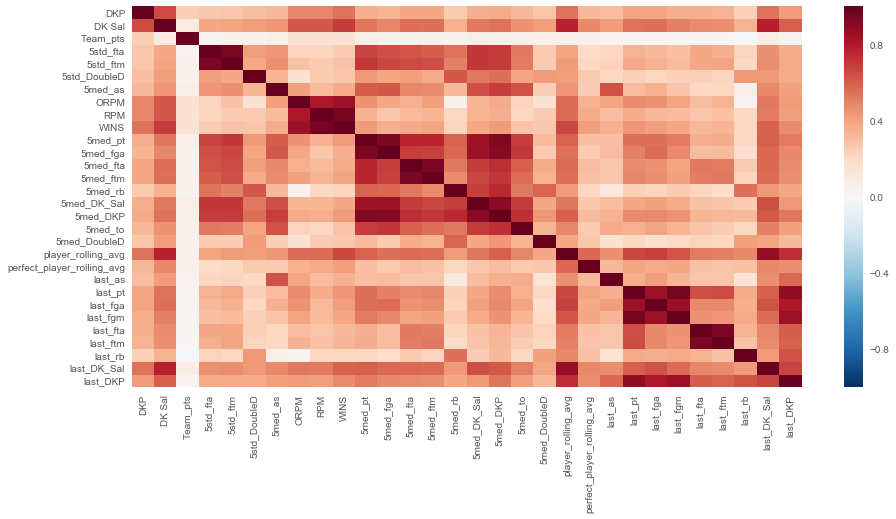

In [4035]:
# Perform a heatmap on correlation.corr()

plt.figure(figsize = (15,7))

ax = sns.heatmap(correlation.corr())

# Models  - Simple Linear Regression & Keras

## Simple Linear Regression

In [4036]:
# Assign linearRegression to variable "lm"

lm = linear_model.LinearRegression()

# highly correlated features

X = nba20171206train[[
'DK Sal',
'Team_pts',
'5std_fta',
'5std_ftm',
'5std_DoubleD',
'5med_as',
'ORPM',
'RPM',
'WINS',
'5med_pt',
'5med_fga',
'5med_fta',
'5med_ftm',
'5med_rb',
'5med_DK_Sal',
'5med_DKP',
'5med_to',
'5med_DoubleD',
'player_rolling_avg',
'perfect_player_rolling_avg',
'last_as',
'last_pt',
'last_fga',
'last_fgm',
'last_fta',
'last_ftm',
'last_rb',
'last_DK_Sal',
'last_DKP']]
y = nba20171206train['DKP'] 

model = lm.fit(X, y)

# fit = training

In [4037]:
# R^2 1 is great. 0 is the worst. Somewhere in between.

model.score(X,y)

0.48862447899059225

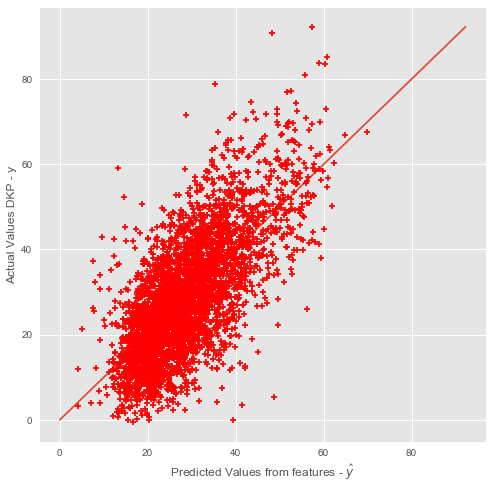

In [4038]:
# Y- Y_hat
predictions = model.predict(X)


# Plot the model
plt.figure(figsize=(8,8))
plt.scatter(predictions, y, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicted Values from features - $\hat{y}$")
plt.ylabel("Actual Values DKP - y")

plt.plot([0, np.max(y)], [0, np.max(y)])

plt.show()

## Keras 

In [4039]:
# View the tail of the training data.

nba20171206train.tail()

GID       Date               Name  DK Sal  Team  Opp  Team_pts  Start  \
9203  5111 2017-12-11       Jayson Tatum    6000    30   25      85.0      1   
9218  4079 2017-12-11  Russell Westbrook   11000     7    3     103.0      1   
9207  3621 2017-12-11       Trevor Ariza    4700     1   11     130.0      1   
9205  4515 2017-12-11       Dion Waiters    5400     2   12     107.0      1   
9211  4104 2017-12-11        Serge Ibaka    5600    26   17      91.0      1   

      H/A  Minutes     ...       5med_DK_Sal  5med_DKP  5med_bl  5med_st  \
9203    0    29.08     ...            5900.0     33.50      0.0      1.0   
9218    1    36.18     ...           11000.0     53.50      0.0      1.0   
9207    1    38.43     ...            5100.0     23.00      0.0      3.0   
9205    0    24.33     ...            6000.0     26.75      0.0      0.0   
9211    0    32.97     ...            5000.0     30.50      1.0      1.0   

      5med_to  5med_trey  5med_DoubleD  5med_TripleD  5med_minutes  \
9203      1.0        2.0           0.0           0.0         32.60   
9218      7.0        2.0           1.0           1.0         38.25   
9207      1.0        3.0           0.0           0.0         30.47   
9205      1.0        1.0           0.0           0.0         29.60   
9211      1.0        3.0           0.0           0.0         28.72   

      DKPavgper1k  
9203         4.41  
9218         4.86  
9207         4.72  
9205         4.19  
9211         3.95  

[5 rows x 135 columns]

In [4040]:
# Train, Test Split highly correlated features from nba20171206train.
# Assign 'DKP' to the target.

X_train, X_test, y_train, y_test = \
train_test_split(nba20171206train[[

'DK Sal',
'Team_pts',
'5std_fta',
'5std_ftm',
'5std_DoubleD',
'5med_as',
'ORPM',
'RPM',
'WINS',
'5med_pt',
'5med_fga',
'5med_fta',
'5med_ftm',
'5med_rb',
'5med_DK_Sal',
'5med_DKP',
'5med_to',
'5med_DoubleD',
'player_rolling_avg',
'perfect_player_rolling_avg',
'last_as',
'last_pt',
'last_fga',
'last_fgm',
'last_fta',
'last_ftm',
'last_rb',
'last_DK_Sal',
'last_DKP']],

nba20171206train['DKP']            
            )
    
ss = StandardScaler()

In [4041]:
# Fit and transform the training data.

X_train = ss.fit_transform(X_train) # only fit the train, not the test
X_test = ss.transform(X_test)

In [4042]:
# View the shape of X_train

X_train.shape

(2790, 29)

In [4043]:
# View the shape of X_test

X_test.shape

(930, 29)

In [4044]:
# Setup the Keras model.

model = Sequential()

In [4045]:
model.add(Dense(X_train.shape[1], input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(1))

In [4046]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])

In [4047]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=55)

Train on 2790 samples, validate on 930 samples
Epoch 1/55
2790/2790 [==============================] - 2s 577us/step - loss: 911.2681 - mean_absolute_error: 27.0666 - val_loss: 693.5291 - val_mean_absolute_error: 23.2325
Epoch 2/55
2790/2790 [==============================] - 0s 108us/step - loss: 510.0406 - mean_absolute_error: 19.1935 - val_loss: 339.6426 - val_mean_absolute_error: 15.0667
Epoch 3/55
2790/2790 [==============================] - 0s 126us/step - loss: 285.1316 - mean_absolute_error: 13.7757 - val_loss: 261.3225 - val_mean_absolute_error: 12.9406
Epoch 4/55
2790/2790 [==============================] - 0s 106us/step - loss: 222.8439 - mean_absolute_error: 11.9966 - val_loss: 203.9181 - val_mean_absolute_error: 11.2656
Epoch 5/55
2790/2790 [==============================] - 0s 119us/step - loss: 171.5243 - mean_absolute_error: 10.4413 - val_loss: 157.8899 - val_mean_absolute_error: 9.8374
Epoch 6/55
2790/2790 [==============================] - 0s 128us/step - loss: 140.42

In [4050]:
y_pred = model.predict(X_test)

In [4051]:
y_pred.shape

(930, 1)

In [4052]:
r2_score(y_test, y_pred)

0.42816258297222487

In [4053]:
list(zip(X_test, y_test, y_pred))[:5]

[(array([-0.69207041,  0.14089341, -0.44179657, -0.45847393, -0.64735136,
         -0.91669804, -0.87528189, -0.24372993, -0.47314334, -1.26675119,
         -1.36713938, -0.82468934, -0.76877184, -1.16828775, -0.11104911,
         -1.40130367, -1.03878723, -0.2925801 , -0.79470375, -0.63851081,
         -1.01022867, -1.48576124, -1.73554222, -1.49143292, -0.8708149 ,
         -0.81870155, -1.33292982, -0.49288704, -1.77574367]),
  26.0,
  array([ 23.48408508], dtype=float32)),
 (array([-1.23904682, -0.92417622, -1.16019734, -1.14967969, -0.64735136,
         -0.91669804, -1.18798428, -1.53274034, -1.27468091, -1.26675119,
         -1.36713938, -0.82468934, -0.76877184, -1.16828775, -1.62390997,
         -1.40130367, -1.03878723, -0.2925801 , -1.37659132, -0.63851081,
         -0.28808212, -1.03833698, -1.23720643, -1.18834472, -0.25471916,
         -0.07064937, -0.82422669, -0.97412343, -1.01938079]),
  14.0,
  array([ 15.10716534], dtype=float32)),
 (array([-0.39371964,  1.04210618, -

In [4054]:
# View the shape of y_test

y_test.shape

(930,)

In [4055]:
# Run the entire dataset

X = nba20171206train[[

'DK Sal',
'Team_pts',
'5std_fta',
'5std_ftm',
'5std_DoubleD',
'5med_as',
'ORPM',
'RPM',
'WINS',
'5med_pt',
'5med_fga',
'5med_fta',
'5med_ftm',
'5med_rb',
'5med_DK_Sal',
'5med_DKP',
'5med_to',
'5med_DoubleD',
'player_rolling_avg',
'perfect_player_rolling_avg',
'last_as',
'last_pt',
'last_fga',
'last_fgm',
'last_fta',
'last_ftm',
'last_rb',
'last_DK_Sal',
'last_DKP']]


                


In [4056]:
y = nba20171206train['DKP']

In [4057]:
ss= StandardScaler()

In [4058]:
X = ss.fit_transform(X)

In [4059]:
model = Sequential()

In [4060]:
model.add(Dense(X_train.shape[1], input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(1))

In [4061]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])

In [4062]:
history = model.fit(X, y, epochs=55)

Epoch 1/55
3720/3720 [==============================] - 2s 447us/step - loss: 714.0200 - mean_absolute_error: 23.5207
Epoch 2/55
3720/3720 [==============================] - 0s 93us/step - loss: 295.2522 - mean_absolute_error: 13.9250
Epoch 3/55
3720/3720 [==============================] - 0s 99us/step - loss: 186.2426 - mean_absolute_error: 10.9216
Epoch 4/55
3720/3720 [==============================] - 0s 93us/step - loss: 132.0673 - mean_absolute_error: 9.0824
Epoch 5/55
3720/3720 [==============================] - 0s 79us/step - loss: 115.9440 - mean_absolute_error: 8.4900
Epoch 6/55
3720/3720 [==============================] - 0s 107us/step - loss: 110.6749 - mean_absolute_error: 8.2898
Epoch 7/55
3720/3720 [==============================] - 0s 112us/step - loss: 107.6133 - mean_absolute_error: 8.1884
Epoch 8/55
3720/3720 [==============================] - 0s 94us/step - loss: 105.7141 - mean_absolute_error: 8.1053
Epoch 9/55
3720/3720 [==============================] - 0s 106us/s

In [4063]:
from sklearn.metrics import r2_score

In [4064]:
r2_score(y_test, y_pred)

0.42816258297222487

In [4065]:
nba20171206test.head() 

GID       Date                Name  DK Sal  Team  Opp  Team_pts  Start  \
62  4871 2017-12-12  Kristaps Porzingis    8500    28   16       0.0      1   
60  3314 2017-12-12       Zach Randolph    7100    14   15       0.0      1   
56  4489 2017-12-12      Andre Drummond    9400    24    9       0.0      1   
54  4167 2017-12-12          Taj Gibson    6000     8   27       0.0      1   
68  3978 2017-12-12     Wilson Chandler    4400     9   24       0.0      1   

    H/A  Minutes     ...       5med_DK_Sal  5med_DKP  5med_bl  5med_st  \
62    1      0.0     ...            8400.0     28.75      1.0      0.0   
60    1      0.0     ...            5300.0     48.00      0.0      1.0   
56    1      0.0     ...            9100.0     41.25      1.0      1.0   
54    1      0.0     ...            6100.0     27.75      0.0      0.0   
68    0      0.0     ...            4500.0     16.50      0.0      0.0   

    5med_to  5med_trey  5med_DoubleD  5med_TripleD  5med_minutes  DKPavgper1k  
62      1.0        1.0           0.0           0.0         34.10         4.01  
60      1.0        1.0           1.0           0.0         33.60         3.73  
56      1.0        0.0           1.0           0.0         34.05         4.62  
54      1.0        0.0           0.0           0.0         36.42         4.40  
68      1.0        1.0           0.0           0.0         25.67         3.78  

[5 rows x 135 columns]

In [4066]:
X_new = nba20171206test[[

'DK Sal',
'Team_pts',
'5std_fta',
'5std_ftm',
'5std_DoubleD',
'5med_as',
'ORPM',
'RPM',
'WINS',
'5med_pt',
'5med_fga',
'5med_fta',
'5med_ftm',
'5med_rb',
'5med_DK_Sal',
'5med_DKP',
'5med_to',
'5med_DoubleD',
'player_rolling_avg',
'perfect_player_rolling_avg',
'last_as',
'last_pt',
'last_fga',
'last_fgm',
'last_fta',
'last_ftm',
'last_rb',
'last_DK_Sal',
'last_DKP']]   
    



In [4067]:
X_new = ss.transform(X_new)
new_data_preds = model.predict(X_new)

In [4068]:
pred = model.predict(X_new)

In [4069]:
import pandas as pd

In [4070]:
check3 = pd.DataFrame(list(zip(nba2017test['GID'], nba2017test['DK pos'], nba2017test['Date'],nba2017test['DK Sal'], nba2017test['Name'],nba2017test['Team'],new_data_preds)))

In [4071]:
check3[6].value_counts().head()

[5.45615]    1
[6.86987]    1
[11.3316]    1
[8.62461]    1
[11.0624]    1
Name: 6, dtype: int64

In [4072]:
check4 = check3.loc[check3[6] > 0, :]
check4.sort_values([6], ascending=False).head(250
                                )

0   1           2      3                         4   5          6
18  3541  34  2017-12-12  11800              LeBron James   4  [25.3118]
0   4871  45  2017-12-12   8500        Kristaps Porzingis  28  [21.1653]
25  4925  13  2017-12-12   9800               Ben Simmons  27   [18.006]
17  3860  45  2017-12-12   8300         LaMarcus Aldridge  10  [16.5101]
2   4489   5  2017-12-12   9400            Andre Drummond  24  [14.3489]
50  3307   5  2017-12-12   4500            Tyson Chandler  15  [13.5934]
12  4193  23  2017-12-12   4900               Danny Green  10  [13.4254]
42  4203  34  2017-12-12   5500           DeMarre Carroll  29  [13.2419]
37  4110  23  2017-12-12   5700              Courtney Lee  28  [12.9819]
48  4879   5  2017-12-12   8700        Karl-Anthony Towns   8  [12.7995]
45  3756   5  2017-12-12   5200             Marcin Gortat  19  [12.2471]
44  4970  12  2017-12-12   3800              Yogi Ferrell  13  [12.2039]
15  4363   2  2017-12-12   8000              Jimmy Butler   8  [12.1918]
3   4167  45  2017-12-12   6000                Taj Gibson   8   [11.857]
53  3768  45  2017-12-12   3600              Amir Johnson  27  [11.6817]
39  4522  23  2017-12-12   7400               Will Barton   9  [11.4866]
28  5215   1  2017-12-12   6600                Lonzo Ball  16  [11.3802]
6   4595   1  2017-12-12   7600           Dennis Schroder  21  [11.3316]
23  4412  34  2017-12-12   6600             Tobias Harris  24  [11.2412]
4   3978  34  2017-12-12   4400           Wilson Chandler   9  [11.2011]
52  4561  23  2017-12-12   4400              Allen Crabbe  29  [11.0843]
11  4494   2  2017-12-12   8600              Bradley Beal  19   [11.083]
7   3857  34  2017-12-12   5800                  Rudy Gay  10  [11.0624]
32  4221   1  2017-12-12   6500               Jeff Teague   8  [11.0532]
14  4907   2  2017-12-12   3600              Brandon Paul  10  [10.8311]
8   4961  23  2017-12-12   5600               Buddy Hield  14  [10.7768]
5   4938  23  2017-12-12   5400            Taurean Prince  21   [10.618]
29  4717   1  2017-12-12   3700               Tim Frazier  19  [10.3828]
43  4616   2  2017-12-12   5500  Kentavious Caldwell-Pope  16  [10.2452]
24  4760  12  2017-12-12   6100         Spencer Dinwiddie  29  [10.2439]
..   ...  ..         ...    ...                       ...  ..        ...
57  3740   1  2017-12-12   3000             Jose Calderon   4  [9.69748]
49  3765  34  2017-12-12   5200            Ersan Ilyasova  21  [9.52085]
35  4904  45  2017-12-12   5700               Dario Saric  27  [9.42894]
58  2374  45  2017-12-12   4600             Dirk Nowitzki  13   [9.3071]
13  4516   5  2017-12-12   3500              Tyler Zeller  29  [9.25422]
59  3766   1  2017-12-12   4500              Jarrett Jack  28  [9.17392]
56  4502  34  2017-12-12   6300           Harrison Barnes  13  [9.07562]
41  4472  34  2017-12-12   3700               Jae Crowder   4  [8.96436]
16  5119  45  2017-12-12   3000                Ante Zizic   4  [8.70864]
10  4979  45  2017-12-12   3400           Skal Labissiere  14  [8.62461]
20  4507  23  2017-12-12   5300             Kent Bazemore  21  [8.55195]
21  4269  12  2017-12-12   5200             Avery Bradley  24  [8.16244]
38  4952  45  2017-12-12   4100           Marquese Chriss  15  [8.15508]
47  4453  34  2017-12-12   5100           Markieff Morris  19  [8.14947]
27  4704  34  2017-12-12   6000            Andrew Wiggins   8  [8.02606]
55  4542   5  2017-12-12   3500             Miles Plumlee  21   [7.9223]
60  4075   5  2017-12-12   4400               Brook Lopez  16  [7.73237]
22  4838  23  2017-12-12   3700           Stanley Johnson  24  [7.53499]
51  4369   1  2017-12-12   5900            Reggie Jackson  24  [7.09212]
19  4810  34  2017-12-12   5800   Rondae Hollis-Jefferson  29  [6.86987]
31  4442  45  2017-12-12   6400               Enes Kanter  28  [6.72433]
54  4950   1  2017-12-12   4200                Tyler Ulis  15  [6.38585]
40  4607  45  2017-12-12   4500             Mason Plumlee   9  [6

# Solving the Knapsack Problem with Pulp

In [4073]:
from pulp import *


In [4074]:
pulp.pulpTestAll()
         

	 Testing zero subtraction
	 Testing inconsistant lp solution
	 Testing continuous LP solution
	 Testing maximize continuous LP solution
	 Testing unbounded continuous LP solution
	 Testing Long Names
	 Testing repeated Names
	 Testing zero constraint
	 Testing zero objective
	 Testing LpVariable (not LpAffineExpression) objective
	 Testing Long lines in LP
	 Testing LpAffineExpression divide
	 Testing MIP solution
	 Testing MIP solution with floats in objective
	 Testing MIP relaxation
	 Testing feasibility problem (no objective)
	 Testing an infeasible problem
	 Testing an integer infeasible problem
	 Testing column based modelling
	 Testing dual variables and slacks reporting
	 Testing fractional constraints
	 Testing elastic constraints (no change)
	 Testing elastic constraints (freebound)
	 Testing elastic constraints (penalty unchanged)
	 Testing elastic constraints (penalty unbounded)
* Solver <class 'pulp.solvers.PULP_CBC_CMD'> passed.
Solver <class 'pulp.solvers.CPLEX_DLL'> un

In [4075]:
players = check3[[1, 4, 3, 0, 6, 5]]

# Rename 'DK Pos' column to 'Position'.
# Rename 'DK Sal' column to 'Salary'
# Rename 'GID' column to 'GameInfo'
# Rename 'new_data_preds' to 'AvgPointsPerGame'
# Rename 'Team' to teamAbbrev

players.columns = ['Position', 'Name', 'Salary', 'GameInfo', 'AvgPointsPerGame', 'teamAbbrev']

# View the head of 'players'

players.head()



Position                Name  Salary  GameInfo AvgPointsPerGame  teamAbbrev
0        45  Kristaps Porzingis    8500      4871        [21.1653]          28
1        45       Zach Randolph    7100      3314        [5.55777]          14
2         5      Andre Drummond    9400      4489        [14.3489]          24
3        45          Taj Gibson    6000      4167         [11.857]           8
4        34     Wilson Chandler    4400      3978        [11.2011]           9

In [4076]:
players.dtypes

Position             int64
Name                object
Salary               int64
GameInfo             int64
AvgPointsPerGame    object
teamAbbrev           int64
dtype: object

In [4077]:

players['GameInfo'] = players['GameInfo'].astype(str)




/Users/gilobrien/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [4078]:
# Convert Teams from numbers to uppercase Team Names

players['teamAbbrev'] = players['teamAbbrev'].map(lambda x: 'BOS' if x == 30 else 'BKN' if x == 29 else 'NYK' if x == 28 else 'PHI' if x == 27 else 'TOR' if x == 26 else 'CHI' if x == 25 else 'DET' if x == 24 else 'IND' if x == 23 else 'MIL' if x == 22 else 'ATL' if x == 21 else 'ORL' if x == 20 else 'WAS' if x == 19 else 'GSW' if x == 18 else 'LAC' if x == 17 else 'LAL' if x == 16 else 'PHO' if x == 15 else 'SAC' if x == 14 else 'DAL' if x == 13 else 'MEM' if x == 12 else 'NOR' if x == 11 else 'SAS' if x == 10 else 'DEN' if x == 9 else 'MIN' if x == 8 else 'OKC' if x == 7 else 'POR' if x == 6 else 'UTA' if x == 5 else 'CLE' if x == 4 else 'CHA' if x == 3 else 'MIA' if x == 2 else 'HOU' if x == 1 else 0) 




/Users/gilobrien/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [4079]:
# Convert 'DK Pos' to string through a lambda function.
# These are the multiple player options (1 2 3 4 5 12 13 14 15 23 24 25 34 35 45)

players['Position'] = players['Position'].map(lambda x: 'PG' if x == 1 else 'SG' if x == 2 else 'SF' if x == 3 else 'PF' if x == 4 else 'C' if x == 5 else 'PG/SG' if x == 12 else 'PG/SF' if x == 13 else 'PG/PF' if x == 14 else 'PG/C' if x == 15 else 'SG/SF' if x == 23 else 'SG/PF' if x == 24 else 'SF/PF' if x == 34 else 'SF/C' if x == 35 else 'PF/C' if x == 45 else 0)




/Users/gilobrien/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [4080]:
players['teamAbbrev'] = players['teamAbbrev'].astype(str)
players['Position'] = players['Position'].astype(str)

/Users/gilobrien/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/gilobrien/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [4081]:
players.dtypes

Position            object
Name                object
Salary               int64
GameInfo            object
AvgPointsPerGame    object
teamAbbrev          object
dtype: object

In [4082]:
players.head()

Position                Name  Salary GameInfo AvgPointsPerGame teamAbbrev
0     PF/C  Kristaps Porzingis    8500     4871        [21.1653]        NYK
1     PF/C       Zach Randolph    7100     3314        [5.55777]        SAC
2        C      Andre Drummond    9400     4489        [14.3489]        DET
3     PF/C          Taj Gibson    6000     4167         [11.857]        MIN
4    SF/PF     Wilson Chandler    4400     3978        [11.2011]        DEN

In [4083]:
players['AvgPointsPerGame'] = players['AvgPointsPerGame'].astype(float).round(decimals=3)

/Users/gilobrien/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [4084]:
players

Position                      Name  Salary GameInfo  AvgPointsPerGame  \
0      PF/C        Kristaps Porzingis    8500     4871            21.165   
1      PF/C             Zach Randolph    7100     3314             5.558   
2         C            Andre Drummond    9400     4489            14.349   
3      PF/C                Taj Gibson    6000     4167            11.857   
4     SF/PF           Wilson Chandler    4400     3978            11.201   
5     SG/SF            Taurean Prince    5400     4938            10.618   
6        PG           Dennis Schroder    7600     4595            11.332   
7     SF/PF                  Rudy Gay    5800     3857            11.062   
8     SG/SF               Buddy Hield    5600     4961            10.777   
9     PG/SG              Jamal Murray    5500     4954             4.870   
10     PF/C           Skal Labissiere    3400     4979             8.625   
11       SG              Bradley Beal    8600     4494            11.083   
12    SG/SF               Danny Green    4900     4193            13.425   
13        C              Tyler Zeller    3500     4516             9.254   
14       SG              Brandon Paul    3600     4907            10.831   
15       SG              Jimmy Butler    8000     4363            12.192   
16     PF/C                Ante Zizic    3000     5119             8.709   
17     PF/C         LaMarcus Aldridge    8300     3860            16.510   
18    SF/PF              LeBron James   11800     3541            25.312   
19    SF/PF   Rondae Hollis-Jefferson    5800     4810             6.870   
20    SG/SF             Kent Bazemore    5300     4507             8.552   
21    PG/SG             Avery Bradley    5200     4269             8.162   
22    SG/SF           Stanley Johnson    3700     4838             7.535   
23    SF/PF             Tobias Harris    6600     4412            11.241   
24    PG/SG         Spencer Dinwiddie    6100     4760            10.244   
25    PG/SF               Ben Simmons    9800     4925            18.006   
26       PG              De'Aaron Fox    4700     5132             6.329   
27    SF/PF            Andrew Wiggins    6000     4704             8.026   
28       PG                Lonzo Ball    6600     5215            11.380   
29       PG               Tim Frazier    3700     4717            10.383   
..      ...                       ...     ...      ...               ...   
31     PF/C               Enes Kanter    6400     4442             6.724   
32       PG               Jeff Teague    6500     4221            11.053   
33    SG/SF         Bogdan Bogdanovic    3800     5138             6.318   
34    SG/SF              Josh Jackson    4300     5130             3.747   
35     PF/C               Dario Saric    5700     4904             9.429   
36       SG               Gary Harris    6700     4678            10.131   
37    SG/SF              Courtney Lee    5700     4110            12.982   
38     PF/C           Marquese Chriss    4100     4952             8.155   
39    SG/SF               Will Barton    7400     4522            11.487   
40     PF/C             Mason Plumlee    4500     4607             6.372   
41    SF/PF               Jae Crowder    3700     4472             8.964   
42    SF/PF           DeMarre Carroll    5500     4203            13.242   
43       SG  Kentavious Caldwell-Pope    5500     4616            10.245   
44    PG/SG              Yogi Ferrell    3800     4970            12.204   
45        C             Marcin Gortat    5200     3756            12.247   
46    SG/SF            Brandon Ingram    6700     4965             5.456   
47    SF/PF           Markieff Morris    5100     4453             8.149   
48        C        Karl-Anthony Towns    8700     4879            12.800   
49    SF/PF            Ersan Ilyasova    5200     3765             9.521   
50        C            Tyson Chandler    4500     3307            13.593   
51       PG            Reggie Jackson    5900     4

In [4085]:
players.to_csv('DKSalaries120617.csv', index=False, quoting=2) 
# quoting = 2 is QUOTE_NONNUMERIC. Need this to be in the correct format to run the optimizer.

(array([  37.,  128.,  208.,  223.,  151.,   97.,   50.,   23.,    9.,    4.]),
 array([  0.   ,   7.875,  15.75 ,  23.625,  31.5  ,  39.375,  47.25 ,
         55.125,  63.   ,  70.875,  78.75 ]),
 <a list of 10 Patch objects>)

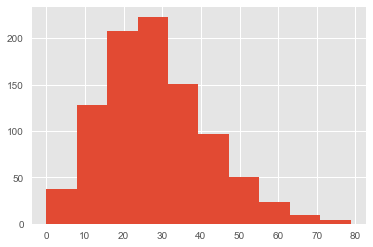

In [4086]:
plt.hist(y_test)

In [4089]:
from pydfs_lineup_optimizer import Site, Sport, get_optimizer


optimizer = get_optimizer(Site.DRAFTKINGS, Sport.BASKETBALL)
optimizer.load_players_from_CSV("DKSalaries120617.csv")
lineup_generator = optimizer.optimize(1)
for lineup in lineup_generator:
    print(lineup)

1. Kristaps Porzingis            PF/C NYK            21.165  8500.0$   
2. Danny Green                   SG/SFSAS            13.425  4900.0$   
3. LeBron James                  SF/PFCLE            25.312  11800.0$  
4. Ben Simmons                   PG/SFPHI            18.006  9800.0$   
5. Yogi Ferrell                  PG/SGDAL            12.204  3800.0$   
6. Tyson Chandler                C    PHO            13.593  4500.0$   
7. Amir Johnson                  PF/C PHI            11.682  3600.0$   
8. Jose Calderon                 PG   CLE            9.697   3000.0$   
Fantasy Points 125.084
Salary 49900.0


In [4090]:
nba20171206test.tail()

GID       Date             Name  DK Sal  Team  Opp  Team_pts  Start  \
139  4502 2017-12-12  Harrison Barnes    6300    13   10       0.0      1   
131  3740 2017-12-12    Jose Calderon    3000     4   21       0.0      1   
129  2374 2017-12-12    Dirk Nowitzki    4600    13   10       0.0      1   
126  3766 2017-12-12     Jarrett Jack    4500    28   16       0.0      1   
124  4075 2017-12-12      Brook Lopez    4400    16   28       0.0      1   

     H/A  Minutes     ...       5med_DK_Sal  5med_DKP  5med_bl  5med_st  \
139    1      0.0     ...            6600.0     32.25      0.0      0.0   
131    1      0.0     ...            3000.0     13.00      0.0      1.0   
129    1      0.0     ...            4700.0     22.75      0.0      1.0   
126    1      0.0     ...            4000.0     23.50      0.0      0.0   
124    0      0.0     ...            4600.0     22.25      1.0      1.0   

     5med_to  5med_trey  5med_DoubleD  5med_TripleD  5med_minutes  DKPavgper1k  
139      1.0        1.0           0.0           0.0         33.00         5.09  
131      1.0        1.0           0.0           0.0         22.02         1.70  
129      1.0        2.0           0.0           0.0         25.37         4.92  
126      3.0        0.0           0.0           0.0         27.10         4.01  
124      2.0        1.0           0.0           0.0         19.63         5.74  

[5 rows x 135 columns]

# Charting Performance

### We'll use the 5,000+ entrants, $3 average score of 262.67 as the DraftKings points amount that needs to be reached in order to be profitable.



<img src='Top20ByBuyInDK.png' width="80%" height="80%"/>

https://rotogrinders.com/articles/what-it-really-takes-to-win-an-nba-gpp-1210935

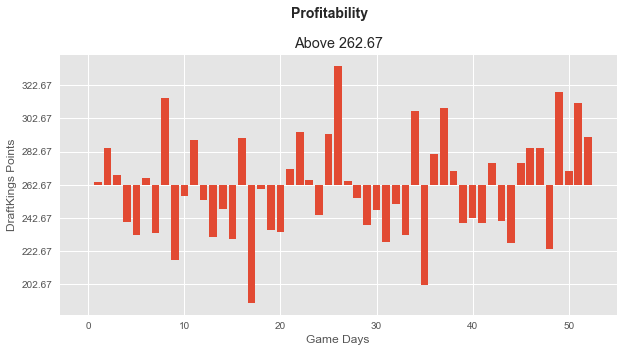

In [4091]:
# Chart Results

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
fig = plt.figure(figsize=(10,5))


fig.suptitle('Profitability', fontsize=14, fontweight='bold')

ax = fig.add_subplot(111)
fig.subplots_adjust(top=0.85)
ax.set_title('Above 262.67')

ax.set_xlabel('Game Days')
ax.set_ylabel('DraftKings Points')

baseline = 262.67
data = [262.5,
  264.25,
  285,
  268.5,
  240,
  232.5,
  266.75,
  233.75,
  314.75,
  217.25,
  256,
  289.75,
  253.25,
  231.25,
  248.25,
  230.25,
  290.75,
  191.5,
  260.25,
  235.5,
  234,
  272.25,
  294.25,
  265.5,
  244.5,
  293.5,
  334.5,
  265,
  254.75,
  238.25,
  247.5,
  228.25,
  251.25,
  232.5,
  307.25,
  202.25,
  281,
  309,
  271,
  239.75,
  242.75,
  239.5,
  276,
  241,
  227.75,
  276,
  285,
  285,
  224,
  318.5,
  271,
  312,
  291.75]


plt.bar(range(len(data)),[x-baseline for x in data])
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x,_: x+baseline))



plt.show()


# Day by Day Results

In [3867]:
# 12/12

# 1. Kristaps Porzingis            PF/C NYK            32.861  8500.0$   
# 2. Taj Gibson                    PF/C MIN            25.616  6000.0$   
# 3. Avery Bradley                 PG/SGDET            20.34   5200.0$   
# 4. Andrew Wiggins                SF/PFMIN            24.393  6000.0$   
# 5. Courtney Lee                  SG/SFNYK            21.95   5700.0$   
# 6. DeMarre Carroll               SF/PFBKN            25.202  5500.0$   
# 7. Brandon Ingram                SG/SFLAL            24.627  6700.0$   
# 8. Harrison Barnes               SF/PFDAL            24.786  6300.0$   
# Fantasy Points 199.775
# Salary 49900.0

#

In [3868]:
# 12/11

# 1. Dwight Howard                 C    CHA            42.805  7500.0$   
# 2. Omri Casspi                   SF/PFGSW            20.085  3300.0$   
# 3. Ryan Anderson                 PF/C HOU            27.973  4600.0$   
# 4. James Harden                  PG/SGHOU            64.168  11600.0$  
# 5. Jrue Holiday                  PG/SGNOR            37.941  6600.0$   
# 6. Jeremy Lamb                   SG/SFCHA            29.61   5000.0$   
# 7. Clint Capela                  C    HOU            37.495  6500.0$   
# 8. Trevor Ariza                  SG/SFHOU            29.703  4700.0$   
# Fantasy Points 289.78
# Salary 49800.0

# 291.75

In [3869]:
# 12/10

# 1. Bojan Bogdanovic              SG/SFIND            26.307  4900.0$   
# 2. Victor Oladipo                PG/SGIND            48.625  9000.0$   
# 3. Jrue Holiday                  PG/SGNOR            39.832  6900.0$   
# 4. Cory Joseph                   PG   IND            23.698  3700.0$   
# 5. Anthony Davis                 PF/C NOR            57.951  10300.0$  
# 6. Dario Saric                   PF/C PHI            33.433  5100.0$   
# 7. Yogi Ferrell                  PG/SGDAL            20.17   3800.0$   
# 8. Myles Turner                  C    IND            37.165  6300.0$   
# Fantasy Points 287.18100000000004
# Salary 50000.0

# 312 - Actual

In [3870]:
# 12/09

# 1. Damian Lillard                PG   POR            51.738  8700.0$   
# 2. Wesley Johnson                SG/SFLAC            24.911  4300.0$   
# 3. Eric Bledsoe                  PG/SGMIL            35.707  6100.0$   
# 4. Kris Dunn                     PG/SGCHI            36.485  5900.0$   
# 5. Ryan Anderson                 PF/C HOU            29.163  4700.0$   
# 6. Chris Paul                    PG/SGHOU            48.511  7900.0$   
# 7. Clint Capela                  C    HOU            42.643  6300.0$   
# 8. Jonathon Simmons              SG/SFORL            33.798  5700.0$   
# Fantasy Points 302.956
# Salary 49600.0

# 271

In [3871]:
# 12/08

# 1. Zach Randolph                 PF/C SAC            31.147  5900.0$   
# 2. Anthony Davis                 PF/C NOR            53.203  10500.0$  
# 3. Marvin Williams               SF/PFCHA            21.97   3900.0$   
# 4. Kris Dunn                     PG/SGCHI            35.104  5800.0$   
# 5. Jaylen Brown                  SG/SFBOS            29.408  5400.0$   
# 6. Lauri Markkanen               PF   CHI            34.464  5600.0$   
# 7. DeMar DeRozan                 SG/SFTOR            43.849  7800.0$   
# 8. Robin Lopez                   C    CHI            28.292  5100.0$   
# Fantasy Points 277.437
# Salary 50000.0

# 318.5

In [3872]:
# 12/07

# 1. Brook Lopez                   C    LAL            24.184  4400.0$   
# 2. Trevor Ariza                  SG/SFHOU            25.739  4900.0$   
# 3. Robert Covington              SF/PFPHI            32.741  6300.0$   
# 4. Brandon Ingram                SG/SFLAL            32.977  6400.0$   
# 5. James Harden                  PG/SGHOU            57.308  11000.0$  
# 6. Clint Capela                  C    HOU            36.444  6500.0$   
# 7. DeMarre Carroll               SF/PFBKN            26.199  5400.0$   
# 8. Ricky Rubio                   PG   UTA            24.805  5100.0$   
# Fantasy Points 260.397
# Salary 50000.0

# 224

In [3873]:
# 12/06

# 1. DeAndre Jordan                C    LAC            36.733  6900.0$   
# 2. James Johnson                 SF/PFMIA            28.651  5500.0$   
# 3. Jamal Murray                  PG/SGDEN            27.508  5100.0$   
# 4. Kristaps Porzingis            PF/C NYK            44.499  8100.0$   
# 5. Andrew Wiggins                SF/PFMIN            33.657  6700.0$   
# 6. Jrue Holiday                  PG/SGNOR            38.517  6600.0$   
# 7. Kenneth Faried                PF/C DEN            27.193  5000.0$   
# 8. Austin Rivers                 PG/SGLAC            31.934  6100.0$   
# Fantasy Points 268.692
# Salary 50000.0

# 237

In [3874]:
# 12/5

# 1. Serge Ibaka                   PF/C TOR            30.398  5000.0$   
# 2. Bradley Beal                  SG   WAS            38.302  7600.0$   
# 3. DeMar DeRozan                 SG/SFTOR            42.774  8500.0$   
# 4. OG Anunoby                    SF/PFTOR            24.615  3500.0$   
# 5. Kyle Lowry                    PG   TOR            43.929  8700.0$   
# 6. Tyler Ulis                    PG   PHO            24.824  3900.0$   
# 7. Jonas Valanciunas             C    TOR            28.995  4800.0$   
# 8. Devin Booker                  SG/SFPHO            39.764  8000.0$   
# Fantasy Points 273.601
# Salary 50000.0

# 285 - Actual


In [3875]:
# 12/4

# 1. JaVale McGee                  C    GSW            18.281  3000.0$   
# 2. DeMarcus Cousins              PF/C NOR            56.944  11000.0$  
# 3. Stephen Curry                 PG/SGGSW            51.717  9400.0$   
# 4. Michael Beasley               SF/PFNYK            25.224  3500.0$   
# 5. Darren Collison               PG   IND            34.36   5700.0$   
# 6. Jrue Holiday                  PG/SGNOR            34.33   6300.0$   
# 7. Jaylen Brown                  SG/SFBOS            33.606  6000.0$   
# 8. Joe Ingles                    SG/SFUTA            29.477  5100.0$   
# Fantasy Points 283.93899999999996
# Salary 50000.0

# 276 - Actual

In [3876]:
# 12/3

# 1. Stephen Curry                 PG/SGGSW            52.634  9400.0$   
# 2. Trevor Ariza                  SG/SFHOU            28.758  5100.0$   
# 3. DeAndre Jordan                C    LAC            38.22   6800.0$   
# 4. Zaza Pachulia                 C    GSW            20.662  3300.0$   
# 5. Jeff Teague                   PG   MIN            36.04   6600.0$   
# 6. Jamil Wilson                  SF/PFLAC            14.215  3000.0$   
# 7. Klay Thompson                 SG   GSW            35.042  6700.0$   
# 8. Kevin Durant                  SF/PFGSW            52.43   9100.0$   
# Fantasy Points 278.001
# Salary 50000.0

# 227.75 - Actual

In [3877]:
# 12/2


# 1. Damian Lillard                PG   POR            49.35   8900.0$   
# 2. Tyler Ulis                    PG   PHO            23.555  4200.0$   
# 3. Jusuf Nurkic                  C    POR            40.618  7000.0$   
# 4. Rajon Rondo                   PG   NOR            29.065  4600.0$   
# 5. Robert Covington              SF/PFPHI            36.325  5900.0$   
# 6. Ben Simmons                   PG/SFPHI            52.272  9600.0$   
# 7. Jaylen Brown                  SG/SFBOS            34.579  6300.0$   
# 8. E'Twaun Moore                 SG/SFNOR            23.715  3500.0$   
# Fantasy Points 289.479
# Salary 50000.0


# 241 - Actual

In [3878]:
# 12/1

# 1. OG Anunoby                    SF/PFTOR            23.237  3500.0$   
# 2. Stephen Curry                 PG/SGGSW            55.453  9900.0$   
# 3. Draymond Green                PF/C GSW            43.321  7400.0$   
# 4. Klay Thompson                 SG   GSW            40.473  6900.0$   
# 5. Marvin Williams               SF/PFCHA            21.904  3700.0$   
# 6. Darren Collison               PG   IND            33.268  5800.0$   
# 7. Kevin Durant                  SF/PFGSW            59.343  9600.0$   
# 8. Zaza Pachulia                 C    GSW            20.391  3200.0$   
# Fantasy Points 297.39
# Salary 50000.0

# 276 - Actual

In [3879]:
# 11/30

# 1. Lauri Markkanen               PF   CHI            33.7    6400.0$   
# 2. DeAndre Jordan                C    LAC            36.825  7100.0$   
# 3. Joe Ingles                    SG/SFUTA            33.064  4900.0$   
# 4. Luke Babbitt                  SF/PFATL            24.332  3700.0$   
# 5. Gary Harris                   SG   DEN            29.539  5600.0$   
# 6. Jamal Murray                  PG/SGDEN            28.801  5000.0$   
# 7. Kevin Love                    PF/C CLE            42.243  8000.0$   
# 8. Ben Simmons                   PG/SFPHI            64.66   9300.0$   
# Fantasy Points 293.164
# Salary 50000.0

# 239.50 - Actual


In [3880]:
# 11/29

# 1. Avery Bradley                 PG/SGDET            35.451  6100.0$   
# 2. Tobias Harris                 SF/PFDET            40.515  6500.0$   
# 3. Kevin Durant                  SF/PFGSW            61.878  9300.0$   
# 4. OG Anunoby                    SF/PFTOR            23.987  3600.0$   
# 5. Zaza Pachulia                 C    GSW            22.586  3100.0$   
# 6. Reggie Jackson                PG   DET            37.667  5900.0$   
# 7. Taj Gibson                    PF/C MIN            36.169  5900.0$   
# 8. Stephen Curry                 PG/SGGSW            61.099  9600.0$   
# Fantasy Points 319.352
# Salary 50000.0

# 242.75 - Actual


In [3881]:
# 11/28

# 1. Eric Bledsoe                  PG/SGMIL            34.155  6600.0$   
# 2. Donovan Mitchell              PG/SGUTA            32.739  6500.0$   
# 3. Taj Gibson                    PF/C MIN            30.938  5800.0$   
# 4. John Henson                   C    MIL            24.892  4700.0$   
# 5. Joe Ingles                    SG/SFUTA            26.52   4800.0$   
# 6. Giannis Antetokounmpo         SF/PFMIL            53.379  11200.0$  
# 7. Khris Middleton               SG/SFMIL            35.787  6600.0$   
# 8. Tony Snell                    SG/SFMIL            24.369  3800.0$   
# Fantasy Points 262.779
# Salary 50000.0

# 239.75 - Actual


In [3882]:
# 11/27

# 1. Tobias Harris                 SF/PFDET            33.693  6100.0$   
# 2. Blake Griffin                 PF/C LAC            47.842  9000.0$   
# 3. DeAndre Jordan                C    LAC            36.91   6700.0$   
# 4. Victor Oladipo                PG/SGIND            44.899  8000.0$   
# 5. Thaddeus Young                SF/PFIND            33.237  6000.0$   
# 6. Dennis Smith                  PG/SGDAL            29.631  5000.0$   
# 7. Austin Rivers                 PG/SGLAC            30.361  4900.0$   
# 8. Dirk Nowitzki                 PF/C DAL            24.373  4300.0$   
# Fantasy Points 280.94599999999997
# Salary 50000.0

# 271 - Actual


In [3883]:
# 11/26 

# 1. Tyus Jones                    PG/SGMIN            22.961  3600.0$   
# 2. DeMarre Carroll               SF/PFBKN            27.248  5700.0$   
# 3. Greg Monroe                   PF/C PHO            25.419  4900.0$   
# 4. Karl-Anthony Towns            C    MIN            38.599  8900.0$   
# 5. Taj Gibson                    PF/C MIN            31.011  5500.0$   
# 6. Andrew Wiggins                SF/PFMIN            33.536  6500.0$   
# 7. Goran Dragic                  PG   MIA            33.003  7300.0$   
# 8. Jimmy Butler                  SG   MIN            39.018  7500.0$   
# Fantasy Points 250.795
# Salary 49900.0

# 309 - Actual

In [3884]:
# 11/25

# 1. Jarrett Jack                  PG   NYK            25.007  3700.0$   
# 2. Jusuf Nurkic                  C    POR            41.385  6300.0$   
# 3. Eric Bledsoe                  PG/SGMIL            40.639  6900.0$   
# 4. OG Anunoby                    SF/PFTOR            21.62   3700.0$   
# 5. Robert Covington              SF/PFPHI            40.163  6200.0$   
# 6. James Harden                  PG/SGHOU            63.808  11500.0$  
# 7. John Henson                   C    MIL            29.013  4700.0$   
# 8. Al Horford                    PF/C BOS            38.165  7000.0$   
# Fantasy Points 299.8
# Salary 50000.0

# 281 - Actual


In [3885]:
# 11/24 

# 1. Stephen Curry                 PG/SGGSW            59.339  9600.0$   
# 2. Dennis Schroder               PG   ATL            40.755  6600.0$   
# 3. Al Horford                    PF/C BOS            42.354  6900.0$   
# 4. Spencer Dinwiddie             PG/SGBKN            37.852  6600.0$   
# 5. Omri Casspi                   SF/PFGSW            24.977  3600.0$   
# 6. Klay Thompson                 SG   GSW            47.387  7100.0$   
# 7. Jordan Bell                   PF/C GSW            24.759  3000.0$   
# 8. Jusuf Nurkic                  C    POR            40.641  6500.0$   
# Fantasy Points 318.064
# Salary 49900.0

# 202.25 - Actual


In [3886]:
# 11/22 


# 1. Anthony Davis                 PF/C NOR            58.986  9600.0$   
# 2. Taj Gibson                    PF/C MIN            33.278  5300.0$   
# 3. Dennis Schroder               PG   ATL            37.959  6700.0$   
# 4. Austin Rivers                 PG/SGLAC            29.85   5100.0$   
# 5. Bradley Beal                  SG   WAS            47.052  7700.0$   
# 6. Dwight Howard                 C    CHA            42.979  6700.0$   
# 7. Marvin Williams               SF/PFCHA            24.888  3800.0$   
# 8. Marcin Gortat                 C    WAS            32.375  5100.0$   
# Fantasy Points 307.36699999999996
# Salary 50000.0

# 307.25 - Actual


In [3887]:
# 11/20 

# 1. Dario Saric                   PF/C PHI            26.413  4700.0$   
# 2. Steven Adams                  C    OKC            31.075  5700.0$   
# 3. E'Twaun Moore                 SG/SFNOR            23.774  3900.0$   
# 4. Gary Harris                   SG   DEN            30.619  5300.0$   
# 5. Marvin Williams               SF/PFCHA            23.764  3800.0$   
# 6. Victor Oladipo                PG/SGIND            39.172  7600.0$   
# 7. Kemba Walker                  PG   CHA            41.624  7900.0$   
# 8. DeMarcus Cousins              PF/C NOR            56.972  10900.0$  
# Fantasy Points 273.413
# Salary 49800.0


# 232.50 - Actual

In [3888]:
# 11/19 


# 1. Zaza Pachulia                 C    GSW            18.154  3100.0$   
# 2. Jamal Murray                  PG/SGDEN            31.466  5200.0$   
# 3. Victor Oladipo                PG/SGIND            42.25   7700.0$   
# 4. Kyle Kuzma                    SF/PFLAL            41.684  6900.0$   
# 5. Stephen Curry                 PG/SGGSW            48.782  9300.0$   
# 6. Omri Casspi                   SF/PFGSW            19.324  3300.0$   
# 7. Thaddeus Young                SF/PFIND            36.86   6300.0$   
# 8. Devin Booker                  SG/SFPHO            42.821  8100.0$   
# Fantasy Points 281.341
# Salary 49900.0


# 251.25 - Actual



In [3889]:
# 11/18

# 1. Joe Ingles                    SG/SFUTA            31.787  5300.0$   
# 2. Robert Covington              SF/PFPHI            38.123  6300.0$   
# 3. Stephen Curry                 PG/SGGSW            49.586  9100.0$   
# 4. Austin Rivers                 PG/SGLAC            28.599  5400.0$   
# 5. Zaza Pachulia                 C    GSW            19.295  3100.0$   
# 6. Joel Embiid                   C    PHI            58.794  10000.0$  
# 7. Marvin Williams               SF/PFCHA            23.328  3800.0$   
# 8. Klay Thompson                 SG   GSW            38.164  6900.0$   
# Fantasy Points 287.676
# Salary 49900.0

# 228.25 - Actual

In [3890]:
# 11/17

# 1. Jamal Murray                  PG/SGDEN            30.054  4700.0$   
# 2. DeMarcus Cousins              PF/C NOR            62.746  10900.0$  
# 3. Wilson Chandler               SF/PFDEN            29.584  4400.0$   
# 4. Zach Randolph                 PF/C SAC            26.021  4900.0$   
# 5. Nikola Jokic                  C    DEN            52.267  8100.0$   
# 6. Devin Booker                  SG/SFPHO            45.618  7800.0$   
# 7. Gary Harris                   SG   DEN            38.334  5200.0$   
# 8. Marvin Williams               SF/PFCHA            23.88   3900.0$   
# Fantasy Points 308.504
# Salary 49900.0

# 247.5 - Actual

In [3891]:
# 11/16

# 1. Clint Capela                  C    HOU            40.62   7200.0$   
# 2. Chris Paul                    PG/SGHOU            46.01   7100.0$   
# 3. Devin Booker                  SG/SFPHO            45.288  7500.0$   
# 4. Zaza Pachulia                 C    GSW            14.906  3100.0$   
# 5. Ryan Anderson                 PF/C HOU            31.212  4500.0$   
# 6. Klay Thompson                 SG   GSW            27.385  6700.0$   
# 7. Stephen Curry                 PG/SGGSW            49.283  8700.0$   
# 8. Trevor Ariza                  SG/SFHOU            32.601  5200.0$   
# Fantasy Points 287.305
# Salary 50000.0

# 238.25 - Actual

In [3892]:
# 11/15

# 1. DeMar DeRozan                 SG/SFTOR            46.62   7600.0$   
# 2. Bojan Bogdanovic              SG/SFIND            24.747  4400.0$   
# 3. Victor Oladipo                PG/SGIND            41.166  7100.0$   
# 4. Kent Bazemore                 SG/SFATL            32.036  5400.0$   
# 5. Luke Babbitt                  SF/PFATL            24.948  3800.0$   
# 6. Mario Chalmers                PG   MEM            23.257  3800.0$   
# 7. Dennis Schroder               PG   ATL            41.936  6800.0$   
# 8. DeMarcus Cousins              PF/C NOR            60.128  11100.0$  
# Fantasy Points 294.838
# Salary 50000.0

# 254.75 - Actual


In [3893]:
# 11/14 

# 1. Trevor Ariza                  SG/SFHOU            28.995  5100.0$   
# 2. Serge Ibaka                   PF/C TOR            28.5    5200.0$   
# 3. Clint Capela                  C    HOU            34.71   7100.0$   
# 4. DeMar DeRozan                 SG/SFTOR            43.904  8000.0$   
# 5. Kyle Lowry                    PG   TOR            37.411  7700.0$   
# 6. Jaylen Brown                  SG/SFBOS            32.39   6700.0$   
# 7. Dirk Nowitzki                 PF/C DAL            22.801  4000.0$   
# 8. Harrison Barnes               SF/PFDAL            34.118  6100.0$   
# Fantasy Points 262.829
# Salary 49900.0

# 265 - Actual

In [3894]:
# 11/13

# 1. Bradley Beal                  SG   WAS            41.087  7300.0$   
# 2. Kent Bazemore                 SG/SFATL            28.882  5000.0$   
# 3. Ben Simmons                   PG/SFPHI            43.443  8500.0$   
# 4. Robert Covington              SF/PFPHI            35.092  5800.0$   
# 5. Jimmy Butler                  SG   MIN            37.34   6700.0$   
# 6. Taj Gibson                    PF/C MIN            30.439  4700.0$   
# 7. Joel Embiid                   C    PHI            42.211  7900.0$   
# 8. Tony Snell                    SG/SFMIL            22.63   3800.0$   
# Fantasy Points 281.124
# Salary 49700.0

# 334.5 - Actual

In [3895]:
# 11/12

# 1. Harrison Barnes               SF/PFDAL            33.96   6000.0$   
# 2. Dennis Smith                  PG/SGDAL            31.416  5500.0$   
# 3. Paul George                   SF   OKC            48.442  7900.0$   
# 4. Andre Drummond                C    DET            46.129  8700.0$   
# 5. Ryan Anderson                 PF/C HOU            26.649  4400.0$   
# 6. Avery Bradley                 PG/SGDET            30.179  5700.0$   
# 7. Clint Capela                  C    HOU            40.161  6600.0$   
# 8. Trevor Ariza                  SG/SFHOU            33.811  5100.0$   
# Fantasy Points 290.747
# Salary 49900.0

# 293.5 - Actual

In [3896]:
# 11/11


# 1. Nikola Jokic                  C    DEN            48.77   8400.0$   
# 2. Bradley Beal                  SG   WAS            44.733  7500.0$   
# 3. Shelvin Mack                  PG   ORL            23.568  3700.0$   
# 4. Ben Simmons                   PG/SFPHI            51.615  8700.0$   
# 5. Robert Covington              SF/PFPHI            34.623  5900.0$   
# 6. Trevor Ariza                  SG/SFHOU            28.369  4800.0$   
# 7. Patty Mills                   PG   SAS            25.906  4000.0$   
# 8. Klay Thompson                 SG   GSW            42.673  7000.0$   
# Fantasy Points 300.257
# Salary 50000.0

# 244.5 - Actual

In [3897]:
# 11/10

# 1. Carmelo Anthony               SF/PFOKC            37.94   6900.0$   
# 2. Taurean Prince                SG/SFATL            28.748  5500.0$   
# 3. Dakari Johnson                C    OKC            20.965  3000.0$   
# 4. Damian Lillard                PG   POR            48.648  9400.0$   
# 5. Nikola Vucevic                C    ORL            40.236  7700.0$   
# 6. Khris Middleton               SG/SFMIL            37.929  6700.0$   
# 7. Paul George                   SF   OKC            42.46   7300.0$   
# 8. Terrence Ross                 SG/SFORL            20.546  3500.0$   
# Fantasy Points 277.472
# Salary 50000.0

# 265.5 - Actual

In [3898]:
# 11/09

# 1. Trevor Ariza                  SG/SFHOU            31.904  4700.0$   
# 2. Zach Randolph                 PF/C SAC            29.433  5200.0$   
# 3. DeMar DeRozan                 SG/SFTOR            42.553  7200.0$   
# 4. Ben Simmons                   PG/SFPHI            49.665  9000.0$   
# 5. E'Twaun Moore                 SG/SFNOR            22.521  3900.0$   
# 6. Kyle Lowry                    PG   TOR            39.224  7000.0$   
# 7. Joel Embiid                   C    PHI            46.702  8000.0$   
# 8. Jonas Valanciunas             C    TOR            28.382  4900.0$   
# Fantasy Points 290.384
# Salary 49900.0

# 294.25 - Actual

In [3899]:
# 11/08

# 1. Elfrid Payton                 PG   ORL            35.934  6300.0$   
# 2. Marcus Morris                 SF/PFBOS            21.71   4000.0$   
# 3. Stephen Curry                 PG/SGGSW            48.814  9300.0$   
# 4. Avery Bradley                 PG/SGDET            30.49   5500.0$   
# 5. Goran Dragic                  PG   MIA            37.832  6800.0$   
# 6. Andre Drummond                C    DET            43.035  8400.0$   
# 7. Dion Waiters                  SG/SFMIA            31.438  5700.0$   
# 8. Terrence Ross                 SG/SFORL            22.357  3700.0$   
# Fantasy Points 271.61
# Salary 49700.0

# 272.25 - Actual

In [3900]:
# 11/07

# 1. Robert Covington              SF/PFPHI            31.206  5300.0$   
# 2. Marvin Williams               SF/PFCHA            24.153  3900.0$   
# 3. Paul Millsap                  PF/C DEN            39.297  6800.0$   
# 4. Enes Kanter                   PF/C NYK            37.047  6300.0$   
# 5. Robin Lopez                   C    CHI            32.503  5300.0$   
# 6. Tim Hardaway                  SG/SFNYK            35.396  6100.0$   
# 7. DeMar DeRozan                 SG/SFTOR            42.135  7600.0$   
# 8. Damian Lillard                PG   POR            47.14   8700.0$   
# Fantasy Points 288.87699999999995
# Salary 50000.0


# 234 - Actual

In [3901]:
# 11/06


# 1. Dewayne Dedmon                C    ATL            26.647  4000.0$   
# 2. Klay Thompson                 SG   GSW            30.167  6900.0$   
# 3. Kent Bazemore                 SG/SFATL            29.067  5500.0$   
# 4. Al Horford                    PF/C BOS            34.761  7200.0$   
# 5. Dennis Schroder               PG   ATL            35.235  7100.0$   
# 6. Tyson Chandler                C    PHO            21.566  4100.0$   
# 7. Stephen Curry                 PG/SGGSW            43.514  9600.0$   
# 8. Taurean Prince                SG/SFATL            32.829  5600.0$   
# Fantasy Points 253.78600000000003
# Salary 50000.0

# 235.50 - Actual


In [3902]:
# 11/05


# 1. Rodney Hood                   SG/SFUTA            31.051  4800.0$   
# 2. Ricky Rubio                   PG   UTA            37.283  6800.0$   
# 3. Jeff Teague                   PG   MIN            37.487  6400.0$   
# 4. Ryan Anderson                 PF/C HOU            31.817  4600.0$   
# 5. Clint Capela                  C    HOU            40.72   6700.0$   
# 6. James Harden                  PG/SGHOU            59.765  10100.0$  
# 7. Taurean Prince                SG/SFATL            34.446  5500.0$   
# 8. Trevor Ariza                  SG/SFHOU            34.289  4600.0$   
# Fantasy Points 306.85799999999995
# Salary 49500.0


# 260.25 - Actual

In [3903]:
# 11/04


# 1. Harrison Barnes               SF/PFDAL            31.907  5800.0$   
# 2. Paul Millsap                  PF/C DEN            35.434  6800.0$   
# 3. Klay Thompson                 SG   GSW            40.995  7000.0$   
# 4. Avery Bradley                 PG/SGDET            32.264  5300.0$   
# 5. Jamal Murray                  PG/SGDEN            31.748  5400.0$   
# 6. Zaza Pachulia                 C    GSW            21.306  3200.0$   
# 7. Draymond Green                PF/C GSW            41.069  7200.0$   
# 8. Nikola Jokic                  C    DEN            48.167  8500.0$   
# Fantasy Points 282.89
# Salary 49200.0

# 191.5 - Actual

In [3904]:
# 11/03

# 1. Nikola Jokic                  C    DEN            45.953  8600.0$   
# 2. DeMar DeRozan                 SG/SFTOR            41.665  7100.0$   
# 3. Kyle Kuzma                    SF/PFLAL            28.313  4700.0$   
# 4. Kevin Love                    PF/C CLE            42.998  7500.0$   
# 5. Kyle Lowry                    PG   TOR            38.897  6900.0$   
# 6. Courtney Lee                  SG/SFNYK            28.029  4300.0$   
# 7. Enes Kanter                   PF/C NYK            33.072  5800.0$   
# 8. Kentavious Caldwell-Pope      SG   LAL            31.003  5100.0$   
# Fantasy Points 289.93
# Salary 50000.0

# 290.75 - Actual

In [3905]:
# 11/02

# 1. Zaza Pachulia                 C    GSW            19.024  3200.0$   
# 2. Stephen Curry                 PG/SGGSW            51.016  9000.0$   
# 3. Draymond Green                PF/C GSW            37.648  7200.0$   
# 4. Brandon Ingram                SG/SFLAL            23.886  5800.0$   
# 5. Noah Vonleh                   PF/C POR            16.561  3500.0$   
# 6. Klay Thompson                 SG   GSW            37.781  6700.0$   
# 7. Damian Lillard                PG   POR            47.141  9300.0$   
# 8. Kentavious Caldwell-Pope      SG   LAL            27.555  5100.0$   
# Fantasy Points 260.61199999999997
# Salary 49800.0

# 230.25 - Actual

In [3906]:
# 11/01


# 1. Nikola Jokic                  C    DEN            53.019  8700.0$   
# 2. Jamal Murray                  PG/SGDEN            35.032  5200.0$   
# 3. Kevin Love                    PF/C CLE            39.957  7500.0$   
# 4. Bojan Bogdanovic              SG/SFIND            26.333  4000.0$   
# 5. Jeremy Lamb                   SG/SFCHA            34.976  6200.0$   
# 6. Eric Gordon                   SG   HOU            38.373  6700.0$   
# 7. Tyson Chandler                C    PHO            28.865  4100.0$   
# 8. Kemba Walker                  PG   CHA            43.17   7600.0$   
# Fantasy Points 299.72499999999997
# Salary 50000.0

# 248.25 - Actual

In [3907]:
# 10/31

# 1. Russell Westbrook             PG   OKC            55.028  11200.0$  
# 2. Bojan Bogdanovic              SG/SFIND            21.893  4000.0$   
# 3. Lonzo Ball                    PG   LAL            35.63   7000.0$   
# 4. DeMarre Carroll               SF/PFBKN            29.319  5300.0$   
# 5. Paul George                   SF   OKC            39.577  7500.0$   
# 6. Steven Adams                  C    OKC            29.797  5800.0$   
# 7. Caris LeVert                  PG/SFBKN            29.582  5100.0$   
# 8. Tyson Chandler                C    PHO            24.635  4100.0$   
# Fantasy Points 265.46099999999996
# Salary 50000.0

# 231.25 - Actual

In [3908]:
# 10/30

# 1. Klay Thompson                 SG   GSW            43.041  6800.0$   
# 2. DeAndre Jordan                C    LAC            45.803  7300.0$   
# 3. Zaza Pachulia                 C    GSW            24.271  3300.0$   
# 4. Goran Dragic                  PG   MIA            40.29   6500.0$   
# 5. Stephen Curry                 PG/SGGSW            56.345  9100.0$   
# 6. Taj Gibson                    PF/C MIN            27.041  4300.0$   
# 7. Dion Waiters                  SG/SFMIA            32.491  5400.0$   
# 8. Draymond Green                PF/C GSW            43.027  7300.0$   
# Fantasy Points 312.30899999999997
# Salary 50000.0

#  253.25 - Actual

In [3909]:
# 10/29

# 1. Andre Drummond                C    DET            41.142  7100.0$   
# 2. Jeremy Lamb                   SG/SFCHA            36.172  6300.0$   
# 3. Kent Bazemore                 SG/SFATL            32.094  5400.0$   
# 4. Reggie Jackson                PG   DET            34.721  5700.0$   
# 5. Bradley Beal                  SG   WAS            47.291  7300.0$   
# 6. Thaddeus Young                SF/PFIND            26.851  4800.0$   
# 7. Khris Middleton               SG/SFMIL            37.769  6000.0$   
# 8. Nikola Vucevic                C    ORL            43.98   7200.0$   
# Fantasy Points 300.02
# Salary 49800.0

# 289.75 - Actual

In [3910]:
# 10/28

# 1. Kevin Love                    PF/C CLE            41.559  7400.0$   
# 2. Marc Gasol                    C    MEM            53.112  8000.0$   
# 3. Anthony Davis                 PF/C NOR            77.626  10500.0$  
# 4. Iman Shumpert                 PG/SGCLE            18.968  3800.0$   
# 5. Harrison Barnes               SF/PFDAL            34.063  5700.0$   
# 6. Jerryd Bayless                PG/SGPHI            24.634  4100.0$   
# 7. E'Twaun Moore                 SG/SFNOR            19.493  4000.0$   
# 8. Jusuf Nurkic                  C    POR            38.776  6400.0$   
# Fantasy Points 308.231
# Salary 49900.0

# 256 - Actual

In [3911]:
# 10/27

# 1. Jeff Teague                   PG   MIN            59.361  6000.0$   
# 2. Dennis Schroder               PG   ATL            51.611  7300.0$   
# 3. Draymond Green                PF/C GSW            68.049  7400.0$   
# 4. Taj Gibson                    PF/C MIN            23.912  4000.0$   
# 5. Aaron Gordon                  SF/PFORL            44.486  6800.0$   
# 6. D'Angelo Russell              PG   BKN            53.902  7700.0$   
# 7. Caris LeVert                  PG/SFBKN            50.851  5400.0$   
# 8. Kent Bazemore                 SG/SFATL            38.5    5400.0$   
# Fantasy Points 390.672
# Salary 50000.0

# 217.25 - Actual

In [3912]:
# 10/26

# 1. Dirk Nowitzki                 PF/C DAL            9880.2564100.0$   
# 2. Harrison Barnes               SF/PFDAL            11262.0485100.0$   
# 3. Marc Gasol                    C    MEM            36.487  7500.0$   
# 4. Dennis Smith                  PG/SGDAL            13421.9265400.0$   
# 5. Nerlens Noel                  C    DAL            10475.1024400.0$   
# 6. Jrue Holiday                  PG/SGNOR            30.767  6200.0$   
# 7. Kent Bazemore                 SG/SFATL            27.195  5200.0$   
# 8. DeMarcus Cousins              PF/C NOR            64.252  11500.0$  
# Fantasy Points 45198.033
# Salary 49400.0

# 314.5 - Actual

In [3913]:
# 10/25

# 1. Stanley Johnson               SG/SFDET            23.93   3800.0$   
# 2. Kyle Lowry                    PG   TOR            41.336  7700.0$   
# 3. Stephen Curry                 PG/SGGSW            52.037  8700.0$   
# 4. Paul George                   SF   OKC            51.441  8000.0$   
# 5. Reggie Jackson                PG   DET            36.578  6000.0$   
# 6. Pau Gasol                     PF/C SAS            31.732  5000.0$   
# 7. Kemba Walker                  PG   CHA            38.298  7700.0$   
# 8. Pascal Siakam                 PF   TOR            23.814  3000.0$   
# Fantasy Points 299.166
# Salary 49900.0


# 233.75 - Actual

In [3914]:
# 10/24

# 1. Jusuf Nurkic                  C    POR            37.665  6800.0$   
# 2. Damian Lillard                PG   POR            46.689  8400.0$   
# 3. Ramon Sessions                PG   NYK            20.803  4000.0$   
# 4. DeMarcus Cousins              PF/C NOR            56.012  10500.0$  
# 5. Domantas Sabonis              PF/C IND            25.921  4600.0$   
# 6. Victor Oladipo                PG/SGIND            38.743  7200.0$   
# 7. DeMarre Carroll               SF/PFBKN            27.681  5000.0$   
# 8. Timofey Mozgov                C    BKN            18.594  3300.0$   
# Fantasy Points 272.108
# Salary 49800.0

# 266.75 - Actual

In [3915]:
# 10/23

# 1. Klay Thompson                 SG   GSW            34.147  6600.0$   
# 2. Bradley Beal                  SG   WAS            39.056  7300.0$   
# 3. Zaza Pachulia                 C    GSW            27.5    3400.0$   
# 4. Marc Gasol                    C    MEM            47.876  7900.0$   
# 5. Dwayne Bacon                  SG/SFCHA            19.146  3400.0$   
# 6. Kevin Durant                  SF/PFGSW            59.803  9600.0$   
# 7. Justin Jackson                SG/SFSAC            17.913  3000.0$   
# 8. Stephen Curry                 PG/SGGSW            59.017  8700.0$   
# Fantasy Points 304.458
# Salary 49900.0

# 232.5 - Actual

In [3916]:
# 10/22

# 1. E'Twaun Moore                 SG/SFNOR            16.974  3900.0$   
# 2. Brook Lopez                   C    LAL            36.204  6200.0$   
# 3. Andre Roberson                SG/SFOKC            16.588  3900.0$   
# 4. Anthony Davis                 PF/C NOR            63.489  10600.0$  
# 5. Lonzo Ball                    PG   LAL            51.004  6900.0$   
# 6. DeMarcus Cousins              PF/C NOR            73.722  10400.0$  
# 7. Timofey Mozgov                C    BKN            15.95   3300.0$   
# 8. Kentavious Caldwell-Pope      SG   LAL            23.901  4400.0$   
# Fantasy Points 297.832
# Salary 49600.0


# 240 - Actual

In [3917]:
# 10/21

# 1. Reggie Jackson                PG   DET            34.705  5200.0$   
# 2. Stephen Curry                 PG/SGGSW            52.693  8700.0$   
# 3. Jordan Mickey                 PF/C MIA            18.534  3000.0$   
# 4. LaMarcus Aldridge             PF/C SAS            47.359  7700.0$   
# 5. Nikola Vucevic                C    ORL            55.394  7400.0$   
# 6. Eric Gordon                   SG   HOU            38.086  5400.0$   
# 7. Evan Fournier                 SG/SFORL            36.82   5600.0$   
# 8. Devin Booker                  SG/SFPHO            46.029  7000.0$   
# Fantasy Points 329.62
# Salary 50000.0


# 268.5 - Actual

In [3918]:
# 10/20

# 1. Anthony Davis                 PF/C NOR            84.64   10600.0$  
# 2. Bradley Beal                  SG   WAS            56.707  7100.0$   
# 3. Jeremy Lamb                   SG/SFCHA            34.495  5700.0$   
# 4. Robert Covington              SF/PFPHI            43.424  5700.0$   
# 5. DeMarre Carroll               SF/PFBKN            23.572  4300.0$   
# 6. Harrison Barnes               SF/PFDAL            36.535  5700.0$   
# 7. Dante Cunningham              SF/PFNOR            20.371  3100.0$   
# 8. Kemba Walker                  PG   CHA            54.137  7800.0$   
# Fantasy Points 353.88100000000003
# Salary 50000.0

# 285 - Actual

In [3919]:
# 10/19

# 1. Russell Westbrook             PG   OKC            16.71   11000.0$  
# 2. Paul Zipser                   SF/PFCHI            10.353  4200.0$   
# 3. Luol Deng                     SF/PFLAL            7.856   3700.0$   
# 4. Robin Lopez                   C    CHI            8.03    5200.0$   
# 5. Kyle Lowry                    PG   TOR            13.879  7900.0$   
# 6. Paul George                   SF   OKC            13.169  8100.0$   
# 7. Jonas Valanciunas             C    TOR            7.615   4800.0$   
# 8. Brandon Ingram                SG/SFLAL            7.755   5100.0$   
# Fantasy Points 85.36699999999999
# Salary 50000.0

# 264.25 - Actual

In [3920]:
# 10/18

# 1. Trevor Ariza                  SF/PFHOU            612.728 4900.0$   
# 2. James Harden                  SG   HOU            1361.89210200.0$  
# 3. Kyrie Irving                  PG   BOS            1128.9678500.0$   
# 4. Ryan Anderson                 PF   HOU            556.31  4200.0$   
# 5. Clint Capela                  C    HOU            766.43  5800.0$   
# 6. Eric Gordon                   SG   HOU            623.293 4800.0$   
# 7. Al Horford                    PF/C BOS            819.54  6200.0$   
# 8. Marcus Smart                  PG/SGBOS            651.311 5000.0$   
# Fantasy Points 6520.471
# Salary 49600.0


# 262.5 - Actual

# Next Steps

## Bayes and PyMC3

In [4092]:
from pymc3 import Model, Normal, HalfNormal

In [4093]:
y = nba20171206train['DKP']

In [4094]:
basic_model = Model()

with basic_model:

    alpha = Normal('alpha', mu=0, sd=10)
    beta = Normal('beta', mu=0, sd=10, shape=3)
    sigma = HalfNormal('sigma', sd=1)

    mu = alpha + beta[0]*nba20171206train['WINS'] + beta[1]*nba20171206train['ORPM'] + beta[2]*nba20171206train['DRPM']  
    Y_obs = Normal('Y_obs', mu=mu, sd=sigma, observed=y)

In [4095]:
from pymc3 import find_MAP
map_estimate = find_MAP(model=basic_model)
print(map_estimate)

logp = -14,428, ||grad|| = 0.0098073: 100%|██████████| 52/52 [00:00<00:00, 1177.24it/s]  

{'alpha': array(15.173783248449247), 'beta': array([ 11.47895018,  -1.58205073,  -2.36797965]), 'sigma_log__': array(2.4215217638099538), 'sigma': array(11.262985884590957)}


In [4096]:
from pymc3 import NUTS, sample

with basic_model:
    trace = sample(2000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
100%|█████████▉| 2492/2500 [00:15<00:00, 157.09it/s]/Users/gilobrien/anaconda/lib/python3.6/site-packages/pymc3/step_methods/hmc/nuts.py:451: UserWarning: The acceptance probability in chain 0 does not match the target. It is 0.884578575506, but should be close to 0.8. Try to increase the number of tuning steps.
  % (self._chain_id, mean_accept, target_accept))
100%|██████████| 2500/2500 [00:15<00:00, 156.88it/s]


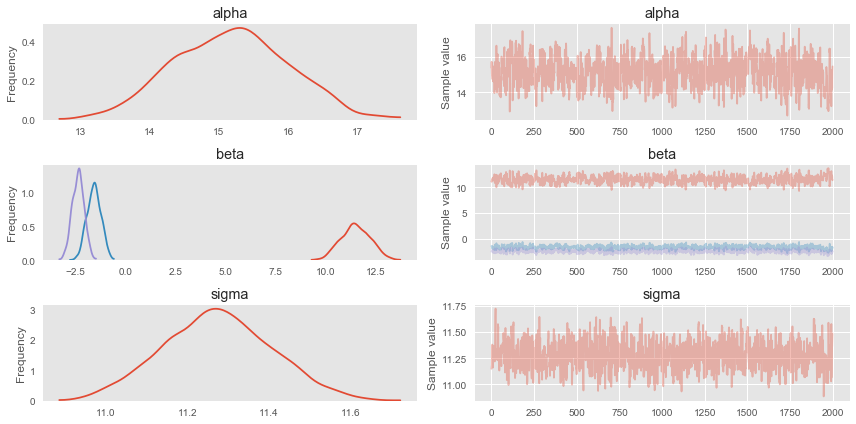

In [4097]:
from pymc3 import traceplot
traceplot(trace);